# **Projet_3 "Anticipez les besoins en consommation électrique de bâtiments"**

# **Nettoyage du Dataset:**

On travaille pour la ville de Seattle, qui vise à devenir neutre en émissions de carbone d’ici 2050. Notre équipe se concentre sur la consommation et les émissions des bâtiments non destinés à l’habitation. L’objectif principal du nettoyage des données dans ce projet est d’améliorer la qualité de la base de données des bâtiments afin de faciliter l’ajout de nouvelles informations de manière plus efficace. Plus spécifiquement, le nettoyage des données doit permettre de partir de relevés minutieux effectués en 2016, prédire les émissions de CO2 et la consommation totale d’énergie pour les bâtiments non mesurés.

Définir sa démarche de préparation et nettoyage des données:

-Identification des Variables Pertinentes\
-Gestion des Valeurs Manquantes\
-Identification et Traitement des Valeurs Aberrantes\
-Traitement des Duplicats\
-Automatisation des Traitements\
-Respect des Normes RGPD


## 1. **Importer les bibliothèques :**

In [445]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import normaltest
from scipy.stats import kurtosis, skew
import scipy.stats as stats

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler

# Faire appel aux fonctions du fonctions.py
import fonctions as fct

## 2. **Charger le jeu de donnée:**

In [446]:
data = pd.read_csv("Data/2016_Building_Energy_Benchmarking.csv")

In [447]:
fct.show_data(data)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 3376 lignes et 46 colonnes dans notre dataset.


2. Affichage de la dataframe:


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

## **3. Nettoyage et filtrage des features et lignes:**

On appelle le data frame à nettoyer df_filtred:

In [448]:
df_filtred = data.copy()

In [449]:
pd.set_option("display.max_columns", None)
df_filtred.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

### 3. 1. **Lister les variables quantitatives (numériques) et qualitatives (catégorielles):**

On va vérifier le type de chaque variable:

In [450]:
df_filtred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

On remarque que dans cette liste, certains types de variables ne sont pas corrects. Par conséquent, nous allons les corriger:

In [451]:
# Transformer le type int des colonnes 'OSEBuildingID', 'CouncilDistrictCode' en type object
df_filtred[['OSEBuildingID', 'CouncilDistrictCode', 'ZipCode']] = df_filtred[['OSEBuildingID', 'CouncilDistrictCode', 'ZipCode']].astype('str')

# Remplacer 'nan' par np.nan dans la colonne 'Zipcode'
df_filtred['ZipCode'] = df_filtred['ZipCode'].replace('nan', np.nan)


for col in ['NumberofBuildings', 'LargestPropertyUseTypeGFA']:
    df_filtred[col] = pd.to_numeric(df_filtred[col], errors='coerce').astype('Int64')

# Convertir les colonnes 'DataYear' et 'YearBuilt' en type catégorielle
for col in ['DataYear', 'YearBuilt']:
    df_filtred[col] = df_filtred[col].astype('category')

In [452]:
df_filtred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   OSEBuildingID                    3376 non-null   object  
 1   DataYear                         3376 non-null   category
 2   BuildingType                     3376 non-null   object  
 3   PrimaryPropertyType              3376 non-null   object  
 4   PropertyName                     3376 non-null   object  
 5   Address                          3376 non-null   object  
 6   City                             3376 non-null   object  
 7   State                            3376 non-null   object  
 8   ZipCode                          3360 non-null   object  
 9   TaxParcelIdentificationNumber    3376 non-null   object  
 10  CouncilDistrictCode              3376 non-null   object  
 11  Neighborhood                     3376 non-null   object  
 12  Latitu

In [453]:

print("Features quantitatives : ", fct.features_quantitatives(df_filtred)[0])
print('\n')
print('Le nombre de Features quantitatives :', fct.features_quantitatives(df_filtred)[1])

Features quantitatives :  ['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


Le nombre de Features quantitatives : 25


In [454]:
print("Features qualitatives : ", fct.features_qualitatives(df_filtred)[0])
print('\n')
print('Le nombre de Features qualitatives :', fct.features_qualitatives(df_filtred)[1])

Features qualitatives :  ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'YearsENERGYSTARCertified', 'DefaultData', 'ComplianceStatus', 'Outlier']


Le nombre de Features qualitatives : 21


### 3. 2. **Choix de la variable cible:**

2. 1. **Affichage des variables cibles :**

2. 1. 1. **La consommation totale d'énergie :**

Les variables cibles candidates susceptibles de représenter la consommation totale d'énergie sont les suivantes :

- 'SiteEnergyUse(kBtu)' : Cette variable représente la consommation totale d'énergie du site en kBtu (unité thermique britannique).
- 'SiteEnergyUseWN(kBtu)' : Cette variable représente la consommation totale d'énergie du site, normalisée météorologiquement, en kBtu.
- 'Electricity(kWh)' : Cette variable représente la consommation totale d'électricité en kWh.
- 'Electricity(kBtu)' : Cette variable représente la consommation totale d'électricité en kBtu.
- 'NaturalGas(therms)' : Cette variable représente la consommation totale de gaz naturel en therms.
- 'NaturalGas(kBtu)' : Cette variable représente la consommation totale de gaz naturel en kBtu.
- 'SteamUse(kBtu)' : Cette variable représente la consommation totale de vapeur en kBtu.

Parmi ces variables, 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)' et 'SteamUse(kBtu)' représentent la consommation totale pour chaque type d'énergie (électricité, gaz, vapeur, etc.). Cependant, pour obtenir la consommation totale de toutes les sources d'énergie confondues, nous devons nous concentrer sur 'SiteEnergyUse(kBtu)'.

Nous allons écarter 'SiteEnergyUseWN(kBtu)' car elle prend en compte les conditions météorologiques, ce qui pourrait introduire des biais dans notre analyse. Ainsi, notre variable cible finale est 'SiteEnergyUse(kBtu)'.

Il est important de noter que ‘SiteEnergyUse(kBtu)’ est la somme des trois variables ‘Electricity(kBtu)’, ‘NaturalGas(kBtu)’ et ‘SteamUse(kBtu)’. Nous pouvons le vérifier :

In [455]:
df_total_test = df_filtred[['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'SiteEnergyUse(kBtu)']]
df_total_test['Total_kBtu'] = df_total_test['Electricity(kBtu)'] + df_total_test['NaturalGas(kBtu)'] + df_total_test['SteamUse(kBtu)']

display(df_total_test[['Total_kBtu', 'SiteEnergyUse(kBtu)']])

# Calcul de la corrélation
correlation = df_total_test['Total_kBtu'].corr(df_total_test['SiteEnergyUse(kBtu)'])
print(f"La corrélation est de {correlation}")

C:\Users\bille\AppData\Local\Temp\ipykernel_42088\3875521380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_test['Total_kBtu'] = df_total_test['Electricity(kBtu)'] + df_total_test['NaturalGas(kBtu)'] + df_total_test['SteamUse(kBtu)']


Total_kBtu  SiteEnergyUse(kBtu)
0     7.226362e+06         7.226362e+06
1     8.387933e+06         8.387933e+06
2     7.258702e+07         7.258702e+07
3     6.794583e+06         6.794584e+06
4     1.417260e+07         1.417261e+07
...            ...                  ...
3371  8.497459e+05         8.497457e+05
3372  9.502760e+05         9.502762e+05
3373  5.765898e+06         5.765898e+06
3374  7.194712e+05         7.194712e+05
3375  1.152896e+06         1.152896e+06

[3376 rows x 2 columns]

La corrélation est de 0.9963138069560918


La corrélation entre la somme des trois colonnes ‘Electricity(kBtu)’, ‘NaturalGas(kBtu)’, et ‘SteamUse(kBtu)’ (que nous pouvons appeler ‘Total_kBtu’) et la colonne ‘SiteEnergyUse(kBtu)’ est de 0.99. Cela indique une forte relation entre ces variables. Par conséquent, pour éviter la redondance des informations, nous pourrions envisager de supprimer les variables ‘SiteEnergyUseWN(kBtu)’, ‘Electricity(kWh)’ et ‘NaturalGas(therms)’.

Il est important de noter que ‘Electricity(kBtu)’ et ‘Electricity(kWh)’ représentent la même quantité d’énergie, mais sont exprimées dans des unités différentes1. De même, ‘NaturalGas(kBtu)’ et ‘NaturalGas(therms)’ représentent également la même quantité d’énergie, mais dans des unités différentes. Dans notre cas, nous préférons conserver les variables qui sont dans la même unité que **notre variable cible ‘SiteEnergyUse(kBtu)’**, qui est en kBtu.

De plus, la variable ‘SiteEnergyUseWN(kBtu)’ pourrait être supprimée car elle prend en compte les conditions météorologiques, ce qui pourrait introduire des biais dans notre analyse.

Ainsi, les variables ‘Electricity(kBtu)’, ‘NaturalGas(kBtu)’ et ‘SteamUse(kBtu)’ seront conservées dans la liste des feautures car elles pourraient être très utiles pour la prédiction de ‘SiteEnergyUse(kBtu)’.

In [456]:
df_filtred = df_filtred.drop(['SiteEnergyUseWN(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)'], axis=1)

2. 1. 2. **Les émissions de CO2 :**

Les variables qui sont susceptibles de représenter les émissions de CO2 :

- 'TotalGHGEmissions' : Cette variable représente les émissions totales de gaz à effet de serre, y compris le dioxyde de carbone (CO2), mesurées en kilogrammes d'équivalent dioxyde de carbone (CO2e).
- 'GHGEmissionsIntensity' : Cette variable représente l'intensité des émissions de gaz à effet de serre, y compris le CO2, mesurée en kg CO2e par unité de surface ou de consommation d'énergie.

Nous allons écarter 'GHGEmissionsIntensity' puisqu'elle représente l'intensité en kg de CO2 par unité de surface, alors que notre besoin est de mesurer les émissions totales en CO2. Ainsi, notre variable cible finale pour les émissions de CO2 est 'TotalGHGEmissions'.

#### 3. 3. **Variables cibles finals :**

**SiteEnergyUse(kBtu)** : représente la quantité totale d’énergie consommée par un site, exprimée en kilo British Thermal Units (kBtu). Un British Thermal Unit (BTU) est une unité de mesure d’énergie utilisée principalement aux États-Unis. Elle correspond à la quantité de chaleur nécessaire pour élever la température d’une livre d’eau d’un degré Fahrenhei

**TotalGHGEmissions** : C’est une mesure des émissions totales de gaz à effet de serre (GES) exprimées en tonnes ou kilotonnes d’équivalent CO2. Cela inclut tous les gaz à effet de serre tels que le CO2, le CH4 (méthane), le N2O (protoxyde d’azote), et parfois les gaz fluorés, émis par une certaine activité ou sur une période donnée.

In [457]:
# Changer la position des deux colonnes SiteEnergyUse(kBtu) et TotalGHGEmissions en dernier
df_filtred = fct.target_last(df_filtred,['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])
df_filtred.head()

OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
0             1     2016  NonResidential               Hotel   
1             2     2016  NonResidential               Hotel   
2             3     2016  NonResidential               Hotel   
3             5     2016  NonResidential               Hotel   
4             8     2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                   7     DOWNTOWN  47.61220   
1                    0659000220                   7     DOWNTOWN  47.61317   
2                    0659000475                   7     DOWNTOWN  47.61393   
3                    0659000640                   7     DOWNTOWN  47.61412   
4                    0659000970                   7     DOWNTOWN  47.61375   

   Longitude YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799      1927                  1              12             88434   
1 -122.33393      1996                  1              11            103566   
2 -122.33810      1969                  1              41            956110   
3 -122.33664      1926                  1              10             61320   
4 -122.34047      1980                  1              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                      88434   
1                  Hotel                      83880   
2                  Hotel                     756493   
3                  Hotel                      61320   
4                  Hotel                     123445   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2           97.699997   

### 4. **Filtrage:**

#### 4. 1. **filtres sur les colonnes:**

##### 4. 1. 1. **Approche métier:**

#####  **Filtrage et traitement des types d'habitations** :

Dans le cahier des charges du projet, il est précisé que "vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments **non destinés à l’habitation**". Par conséquent, on exclut les catégories typiquement destinées à l’habitation de l’analyse. Les variables 'PrimaryPropertyType' et 'BuildingType' pourraient nous aider à effectuer ce filtre. Voici le barplot des catégories de ces deux variables :

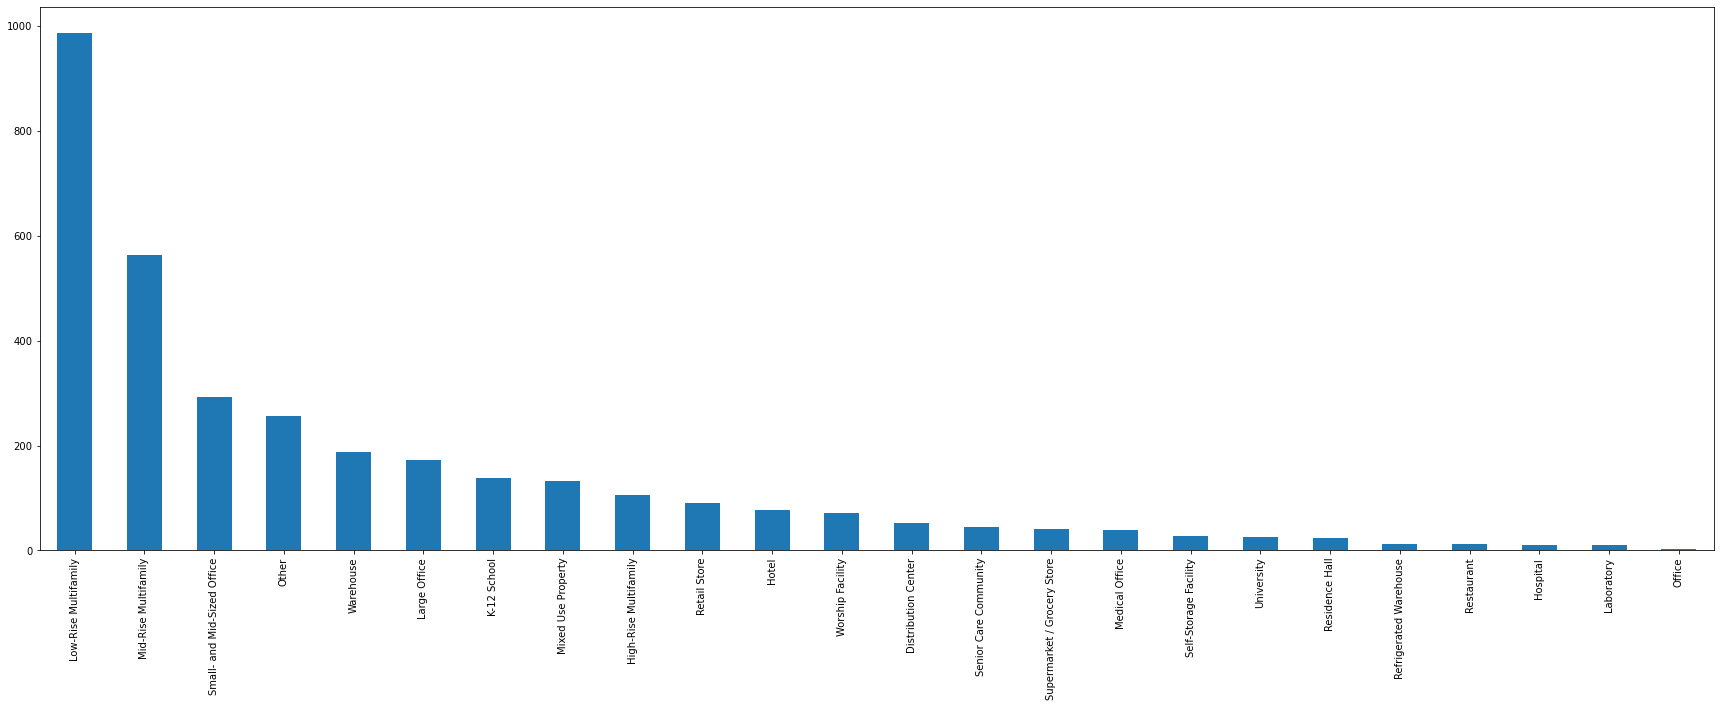

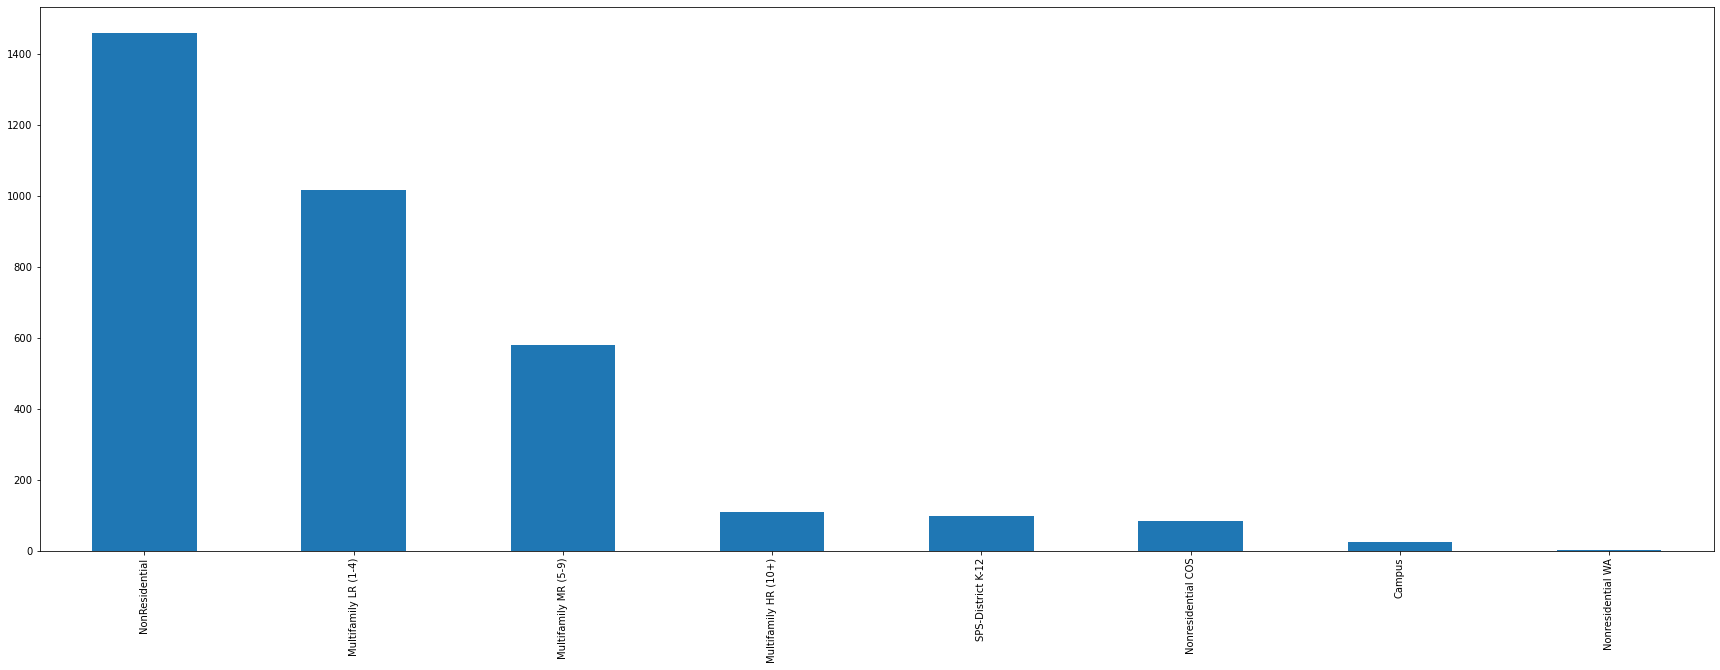

In [458]:
list_cols = ['PrimaryPropertyType', 'BuildingType']
fct.categories_box_plot(df_filtred, list_cols)

On remarque que la variable ‘BuildingType’ contient moins de catégories et est plus simple à utiliser pour effectuer un premier filtre. Par ailleurs, la variable catégorielle ‘PrimaryPropertyType’ contient de nombreuses catégories, ce qui la rend plus adaptée pour être utilisée comme deuxième filtre pour les bâtiments non destinés à l’habitation.

**Premier filtre 'BuildingType':**

Voici la liste de toutes les catégories de la variable:

In [459]:
df_filtred['BuildingType'].value_counts().index.tolist()

['NonResidential',
 'Multifamily LR (1-4)',
 'Multifamily MR (5-9)',
 'Multifamily HR (10+)',
 'SPS-District K-12',
 'Nonresidential COS',
 'Campus',
 'Nonresidential WA']

Et les catégories destinées à l’habitation à exclure se sont les variables qui contient 'Multifamily'

- 'Multifamily LR (1-4)' : Cette catégorie concerne les bâtiments multifamiliaux à faible hauteur (Low Rise) comprenant de 1 à 4 unités résidentielles. Il s'agit généralement de petites structures telles que des maisons individuelles, des duplex ou des triplex.

- 'Multifamily MR (5-9)' : Cette catégorie concerne les bâtiments multifamiliaux de hauteur moyenne (Mid Rise) comprenant de 5 à 9 unités résidentielles. Ils peuvent inclure des immeubles d'appartements de taille moyenne.

- 'Multifamily HR (10+)' : Cette catégorie concerne les bâtiments multifamiliaux de grande hauteur (High Rise) comprenant 10 unités résidentielles ou plus. Il s'agit généralement d'immeubles d'appartements à plusieurs étages.

In [460]:
# Liste des catégories à exclure
categories_to_exclude = ['Multifamily LR (1-4)', 'Multifamily MR (5-9)', 'Multifamily HR (10+)']

# Filtrer le DataFrame pour exclure les catégories
df_filtred = df_filtred[~df_filtred['BuildingType'].isin(categories_to_exclude)]


**Deuxième filtre 'PrimaryPropertyType':**

Voici la liste de toutes les catégories (restante apres le prmier filtre) de la variable:

In [461]:
df_filtred['PrimaryPropertyType'].value_counts().index.tolist()

['Small- and Mid-Sized Office',
 'Other',
 'Warehouse',
 'Large Office',
 'K-12 School',
 'Mixed Use Property',
 'Retail Store',
 'Hotel',
 'Worship Facility',
 'Distribution Center',
 'Supermarket / Grocery Store',
 'Medical Office',
 'Self-Storage Facility',
 'University',
 'Residence Hall',
 'Senior Care Community',
 'Refrigerated Warehouse',
 'Restaurant',
 'Hospital',
 'Laboratory',
 'Low-Rise Multifamily',
 'Office']

Parmi ces catégories mentionnées, les suivantes sont généralement destinées à l’habitation :

**‘Mixed Use Property’ :** Ces propriétés peuvent inclure des espaces résidentiels ainsi que des espaces commerciaux ou de bureau.\
**‘Residence Hall’ :** Il s’agit généralement de logements pour les étudiants sur un campus universitaire.\
**‘Senior Care Community’ :** Ces établissements fournissent des logements et des soins aux personnes âgées.\
**‘Low-Rise Multifamily’ :** Cette catégorie fait référence aux bâtiments résidentiels de faible hauteur qui abritent plusieurs familles.

Par conséquent, nous pouvons les exclure de notre ensemble de données:

In [462]:
# Liste des catégories à exclure
categories_to_exclude = ['Mixed Use Property', 'Residence Hall', 'Senior Care Community', 'Low-Rise Multifamily']

# Filtrer le DataFrame pour exclure les catégories
df_filtred = df_filtred[~df_filtred['PrimaryPropertyType'].isin(categories_to_exclude)]

 **Les Features qualitatives à garder :**

In [463]:
fct.features_qualitatives(df_filtred)[0]

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'YearsENERGYSTARCertified',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

Voici la définition de chacune des varaibles qualitatives:

1. **OSEBuildingID** : Identifiant unique pour chaque bâtiment dans le système de gestion des données.
2. **DataYear** : Année des données enregistrées.
3. **BuildingType** : Type de bâtiment, tel que commercial, résidentiel, industriel, etc.
4. **PrimaryPropertyType** : Type principal de propriété du bâtiment, par exemple, bureau, multifamilial, hôtel, etc.
5. **PropertyName** : Nom de la propriété ou du bâtiment.
6. **Address** : Adresse physique du bâtiment.
7. **City** : Ville où se trouve le bâtiment.
8. **State** : État où se trouve le bâtiment.
9. **ZipCode** : Code postal du lieu du bâtiment.
10. **TaxParcelIdentificationNumber** : Numéro d'identification de la parcelle fiscale du bâtiment.
11. **CouncilDistrictCode** : Code du district du conseil local où se trouve le bâtiment.
12. **Neighborhood** : Quartier où se trouve le bâtiment.
13. **YearBuilt** : Année de construction du bâtiment.
14. **ListOfAllPropertyUseTypes** : Liste de tous les types d'utilisation de la propriété.
15. **LargestPropertyUseType** : Plus grand type d'utilisation de la propriété.
16. **SecondLargestPropertyUseType** : Deuxième plus grand type d'utilisation de la propriété.
17. **ThirdLargestPropertyUseType** : Troisième plus grand type d'utilisation de la propriété.
18. **YearsENERGYSTARCertified** : Nombre d'années où la propriété a été certifiée ENERGY STAR.
19. **DefaultData** : Indique si les données sont les données par défaut ou non.
20. **ComplianceStatus** : Statut de conformité aux normes et réglementations en matière d'efficacité énergétique.
21. **Outlier** : Indique si le bâtiment est un cas aberrant ou une observation atypique.

Les trois colonnes 'TaxParcelIdentificationNumber'et 'DefaultData' peuvent être considérées comme des variables non pertinentes et susceptibles d'être supprimées pour les raisons suivantes:

- TaxParcelIdentificationNumber : Il s'agit d'un identifiant distinct pour chaque parcelle fiscale, généralement utilisé pour l'évaluation fiscale. Cependant, pour la prédiction de l'efficacité énergétique d'un bâtiment, 'TaxParcelIdentificationNumber' pourrait ne pas fournir d'informations pertinentes.
- DefaultData : Cette variable indique si les données sont les données par défaut ou non. elle ne fournit pas d'informations significatives pour la prédiction de l'efficacité énergétique.
- PropertyName:  cette colonne n'est pas pertinante.



In [464]:
df_filtred = df_filtred.drop(['TaxParcelIdentificationNumber', 'DefaultData'], axis = 1)

In [465]:
df_filtred[fct.features_qualitatives(df_filtred)[0]]

OSEBuildingID DataYear        BuildingType PrimaryPropertyType  \
0                1     2016      NonResidential               Hotel   
1                2     2016      NonResidential               Hotel   
2                3     2016      NonResidential               Hotel   
3                5     2016      NonResidential               Hotel   
4                8     2016      NonResidential               Hotel   
...            ...      ...                 ...                 ...   
3369         50220     2016  Nonresidential COS              Office   
3370         50221     2016  Nonresidential COS               Other   
3371         50222     2016  Nonresidential COS              Office   
3372         50223     2016  Nonresidential COS               Other   
3373         50224     2016  Nonresidential COS               Other   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3369                     Genesee/SC SE HQ    4420 S Genesee  Seattle    WA   
3370          High Point Community Center  6920 34th Ave SW  Seattle    WA   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   

      ZipCode CouncilDistrictCode            Neighborhood YearBuilt  \
0     98101.0                   7                DOWNTOWN      1927   
1     98101.0                   7                DOWNTOWN      1996   
2     98101.0                   7                DOWNTOWN      1969   
3     98101.0                   7                DOWNTOWN      1926   
4     98121.0                   7                DOWNTOWN      1980   
...       ...                 ...                     ...       ...   
3369      NaN                   2               SOUTHEAST      1960   
3370      NaN                   1  DELRIDGE NEIGHBORHOODS      1982   
3371      NaN                   2        GREATER DUWAMISH      1990   
3372      NaN                   2                DOWNTOWN      2004   
3373      NaN                   7   MAGNOLIA / QUEEN ANNE      1974   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                                                 Hotel   
3                                                 Hotel   
4                         Hotel, Parking, Swimming Pool   
...                                                 ...   
3369                                             Office   
3370                                 Other - Recreation   
3371                                             Office   
3372                                 Other - Recreation   
3373  Fitness Center/Health Club/Gym, Other - Recrea...   

     LargestPropertyUseType    SecondLargestPropertyUseType  \
0                     Hotel                             NaN   
1                     Hotel                         Parking   
2                     Hotel                             NaN   
3                     Hotel                             NaN   
4                     Hotel                         Parking   
...                     ...                             ...   
3369                 Office                             NaN   
3370     Other - Recreation                             NaN   
3371                 Office                             NaN   
3372     Other - Recrea

**Les Features quantitatives à garder:**

In [466]:
fct.features_quantitatives(df_filtred)[0]

['Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'Comments',
 'GHGEmissionsIntensity',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions']

Voici une explication pour chacune des variables quantitatives:

1. **Latitude** : La latitude géographique de l'emplacement du bâtiment.
2. **Longitude** : La longitude géographique de l'emplacement du bâtiment.
3. **NumberofBuildings** : Le nombre total de bâtiments dans une propriété.
4. **NumberofFloors** : Le nombre total d'étages dans le bâtiment.
5. **PropertyGFATotal** : La surface brute de plancher totale de la propriété, mesurée en pieds carrés.
6. **PropertyGFAParking** : La surface brute de plancher dédiée au stationnement dans la propriété, mesurée en pieds carrés.
7. **PropertyGFABuilding(s)** : La surface brute de plancher dédiée aux bâtiments dans la propriété, mesurée en pieds carrés.
8. **LargestPropertyUseTypeGFA** : La plus grande utilisation de la propriété par surface de plancher brute, généralement en pieds carrés.
9. **SecondLargestPropertyUseTypeGFA** : La deuxième plus grande utilisation de la propriété par surface de plancher brute, généralement en pieds carrés.
10. **ThirdLargestPropertyUseTypeGFA** : La troisième plus grande utilisation de la propriété par surface de plancher brute, généralement en pieds carrés.
11. **ENERGYSTARScore** : Le score ENERGY STAR attribué à la propriété, qui mesure son efficacité énergétique par rapport aux autres propriétés similaires.
12. **SiteEUI(kBtu/sf)** : La consommation d'énergie par unité de surface (EUI) sur site, mesurée en milliers de BTU (British Thermal Units) par pied carré.
13. **SiteEUIWN(kBtu/sf)** : La consommation d'énergie par unité de surface (EUI) sur site, normalisée par la météo, mesurée en milliers de BTU (British Thermal Units) par pied carré.
14. **SourceEUI(kBtu/sf)** : La consommation d'énergie par unité de surface (EUI) source, mesurée en milliers de BTU (British Thermal Units) par pied carré.
15. **SourceEUIWN(kBtu/sf)** : La consommation d'énergie par unité de surface (EUI) source, normalisée par la météo, mesurée en milliers de BTU (British Thermal Units) par pied carré.
16. **SteamUse(kBtu)** : La quantité d'énergie utilisée pour le chauffage et autres utilisations de la vapeur, mesurée en milliers de BTU (British Thermal Units).
17. **Electricity(kBtu)** : La quantité d'énergie électrique consommée, mesurée en milliers de BTU (British Thermal Units).
18. **NaturalGas(kBtu)** : La quantité d'énergie consommée provenant du gaz naturel, mesurée en milliers de BTU (British Thermal Units).
19. **GHGEmissionsIntensity** : L'intensité des émissions de gaz à effet de serre (GES), mesurée en kilogrammes de dioxyde de carbone équivalent par pied carré.
20. **SiteEnergyUse(kBtu)** : La consommation totale d'énergie sur site, mesurée en milliers de BTU (British Thermal Units).
21. **TotalGHGEmissions** : Le total des émissions de gaz à effet de serre (GES), mesuré en kilogrammes de dioxyde de carbone équivalent.

On décide de garder toutes ces variables pour la suite.

In [467]:
df_filtred[fct.features_quantitatives(df_filtred)[0]]

Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     47.61220 -122.33799                  1              12   
1     47.61317 -122.33393                  1              11   
2     47.61393 -122.33810                  1              41   
3     47.61412 -122.33664                  1              10   
4     47.61375 -122.34047                  1              18   
...        ...        ...                ...             ...   
3369  47.56440 -122.27813                  1               1   
3370  47.54067 -122.37441                  1               1   
3371  47.56722 -122.31154                  1               1   
3372  47.59625 -122.32283                  1               1   
3373  47.63644 -122.35784                  1               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               956110              196718                  759392   
3                61320                   0                   61320   
4               175580               62000                  113580   
...                ...                 ...                     ...   
3369             15398                   0                   15398   
3370             18261                   0                   18261   
3371             12294                   0                   12294   
3372             16000                   0                   16000   
3373             13157                   0                   13157   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                         88434                              NaN   
1                         83880                          15064.0   
2                        756493                              NaN   
3                         61320                              NaN   
4                        123445                          68009.0   
...                         ...                              ...   
3369                      15398                              NaN   
3370                      18261                              NaN   
3371                      12294                              NaN   
3372                      16000                              NaN   
3373                       7583                           5574.0   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                                NaN             60.0         81.699997   
1                             4622.0             61.0         94.800003   
2                                NaN             43.0         96.000000   
3                                NaN             56.0        110.800003   
4                                0.0             75.0        114.800003   
...                              ...              ...               ...   
3369                             NaN             93.0         25.200001   
3370                             NaN              NaN         51.000000   
3371                             NaN             46.0         69.099998   
3372                             NaN              NaN         59.400002   
3373                             0.0              NaN        438.200012   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0              84.300003          182.500000            189.000000   
1              97.900002          176.100006            179.399994   
2              97.699997          241.899994            244.100006   
3             113.300003          216.199997            224.000000   
4             118.699997          211.399994            215.600006   
...                  ...                 ...                   ...   
3369           26.900000           64.099998             66.699997   
3370           56.200001          126.000000            136.600006   
3371           76.699997          161.699997    

In [468]:
fct.show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 1510 lignes et 41 colonnes dans notre dataset.


2. Affichage de la dataframe:


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
0             1     2016  NonResidential               Hotel   
1             2     2016  NonResidential               Hotel   
2             3     2016  NonResidential               Hotel   
3             5     2016  NonResidential               Hotel   
4             8     2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  CouncilDistrictCode Neighborhood  Latitude  Longitude YearBuilt  \
0                   7     DOWNTOWN  47.61220 -122.33799      1927   
1                   7     DOWNTOWN  47.61317 -122.33393      1996   
2                   7     DOWNTOWN  47.61393 -122.33810      1969   
3                   7     DOWNTOWN  47.61412 -122.33664      1926   
4                   7     DOWNTOWN  47.61375 -122.34047      1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1              12             88434                   0   
1                  1              11            103566               15064   
2                  1              41            956110              196718   
3                  1              10             61320                   0   
4                  1              18            175580               62000   

   PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   88434                          Hotel   
1                   88502     Hotel, Parking, Restaurant   
2                  759392                          Hotel   
3                   61320                          Hotel   
4                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                      88434   
1                  Hotel                      83880   
2                  Hotel                     756493   
3                  Hotel                      61320   
4                  Hotel                     123445   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2           97.699997          241.899994            244.100006   
3          113.300003          216.199997            224.000000   
4          118.699997          211.399994            215.600006   

  

##### 4. 1. 2. **Approche technique : Taux de remplissage:**

On impose le seuil de filtrage à 15%:

In [469]:
seuil_filtrage = 0.15

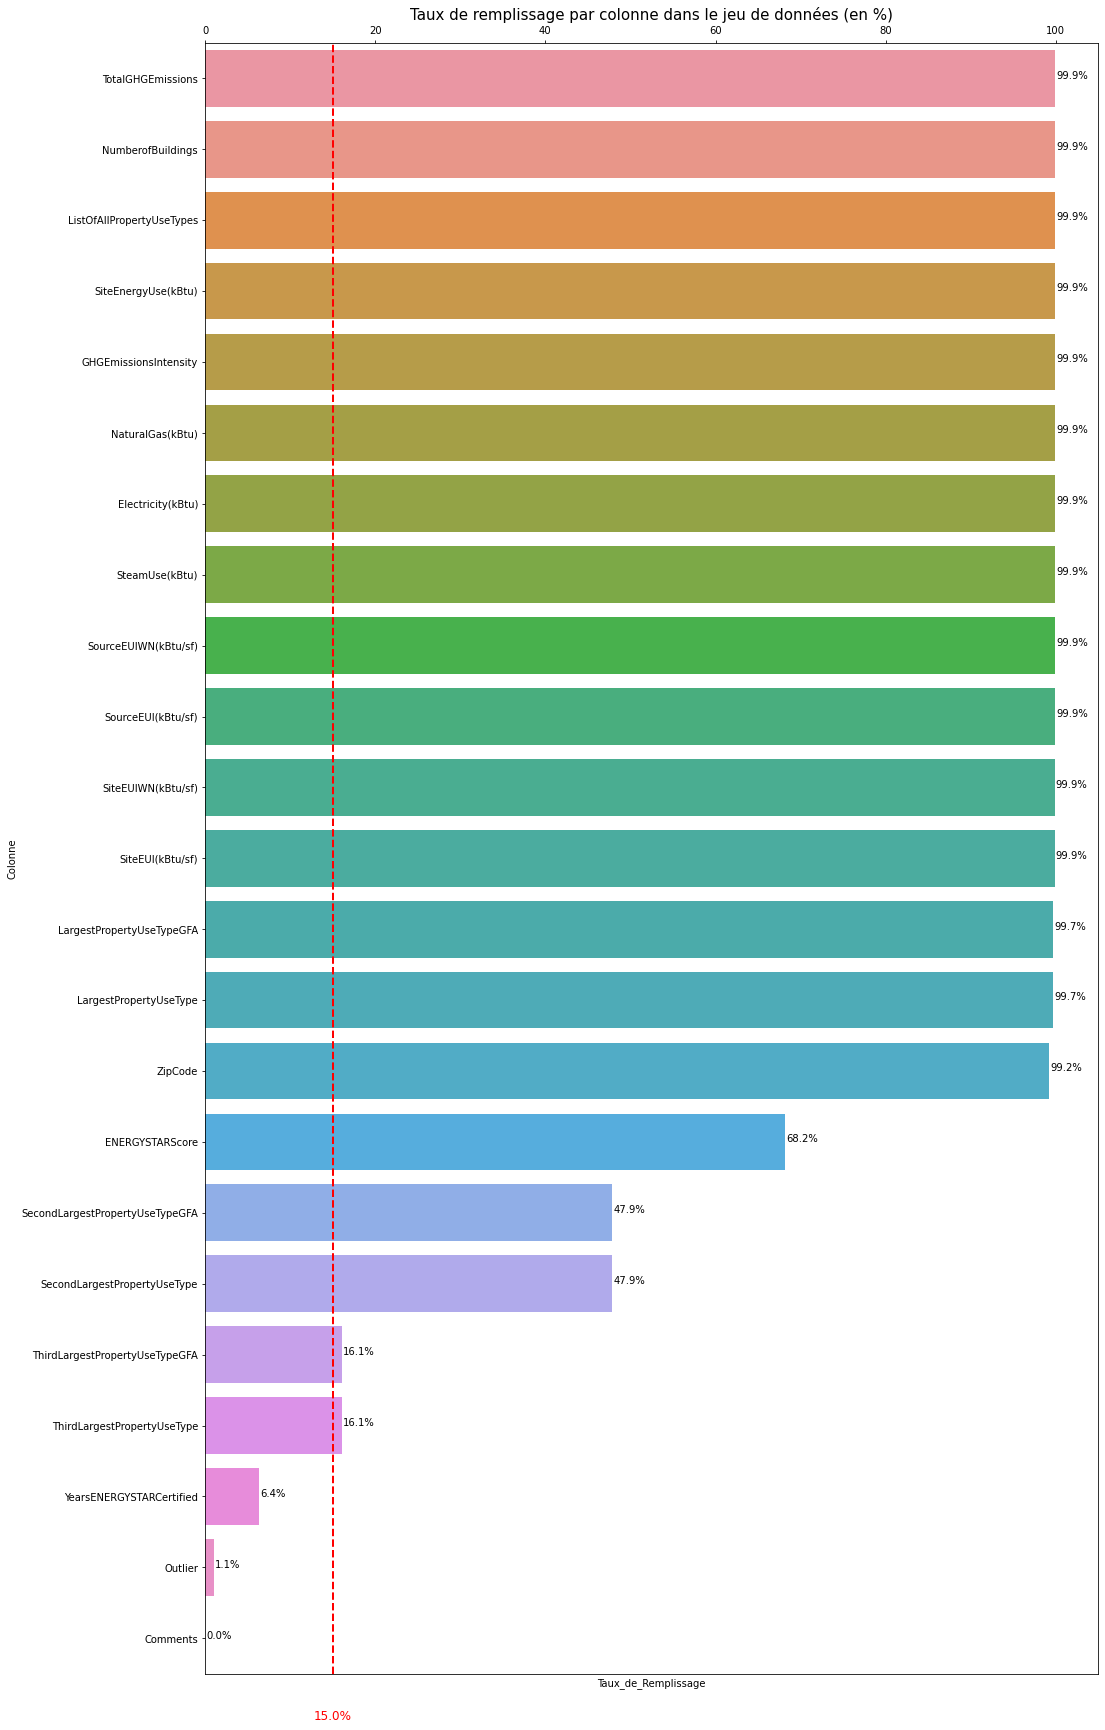

In [470]:
fct.taux_de_Remplissage_heatmap_missing(df_filtred, show_threshold_bar=True, seuil_filtrage=seuil_filtrage, affichage= 'filling_rate')

Nous allons fixer le seuil de remplissage à 15%, car les colonnes ‘ThirdLargestPropertyUseType’ et ‘ThirdLargestPropertyUseTypeGFA’ ont un taux de remplissage inférieur à 1%. Ces deux colonnes sont importantes pour les étapes suivantes.

**On utilise l'approche technique et on fixe un seuil minimum de 15% de taux de remplissage :**

In [471]:
fct.filtrage_taux_remplissage(df_filtred, seuil_filtrage=seuil_filtrage)

Avant filtrage:
---------------
Le nombre de lignes est 1510, et le nombre de colonnes est 41.


Après filtrage:
---------------
Après application du seuil minimum de 15.0%, le nombre de lignes est 1510, et le nombre de colonnes est 38.


In [472]:
df_filtred = df_filtred.reset_index(drop=True, inplace=False)

Le taux de remplissage est de 15%. Nous avons réduit le nombre de colonnes de 43 à 40. Voici le nouveau taux de remplissage avec le heatmap des valeurs maqnuantes :

Nous affichons deux graphiques : à gauche, le taux de remplissage, et à droite, la heatmap des valeurs manquantes:

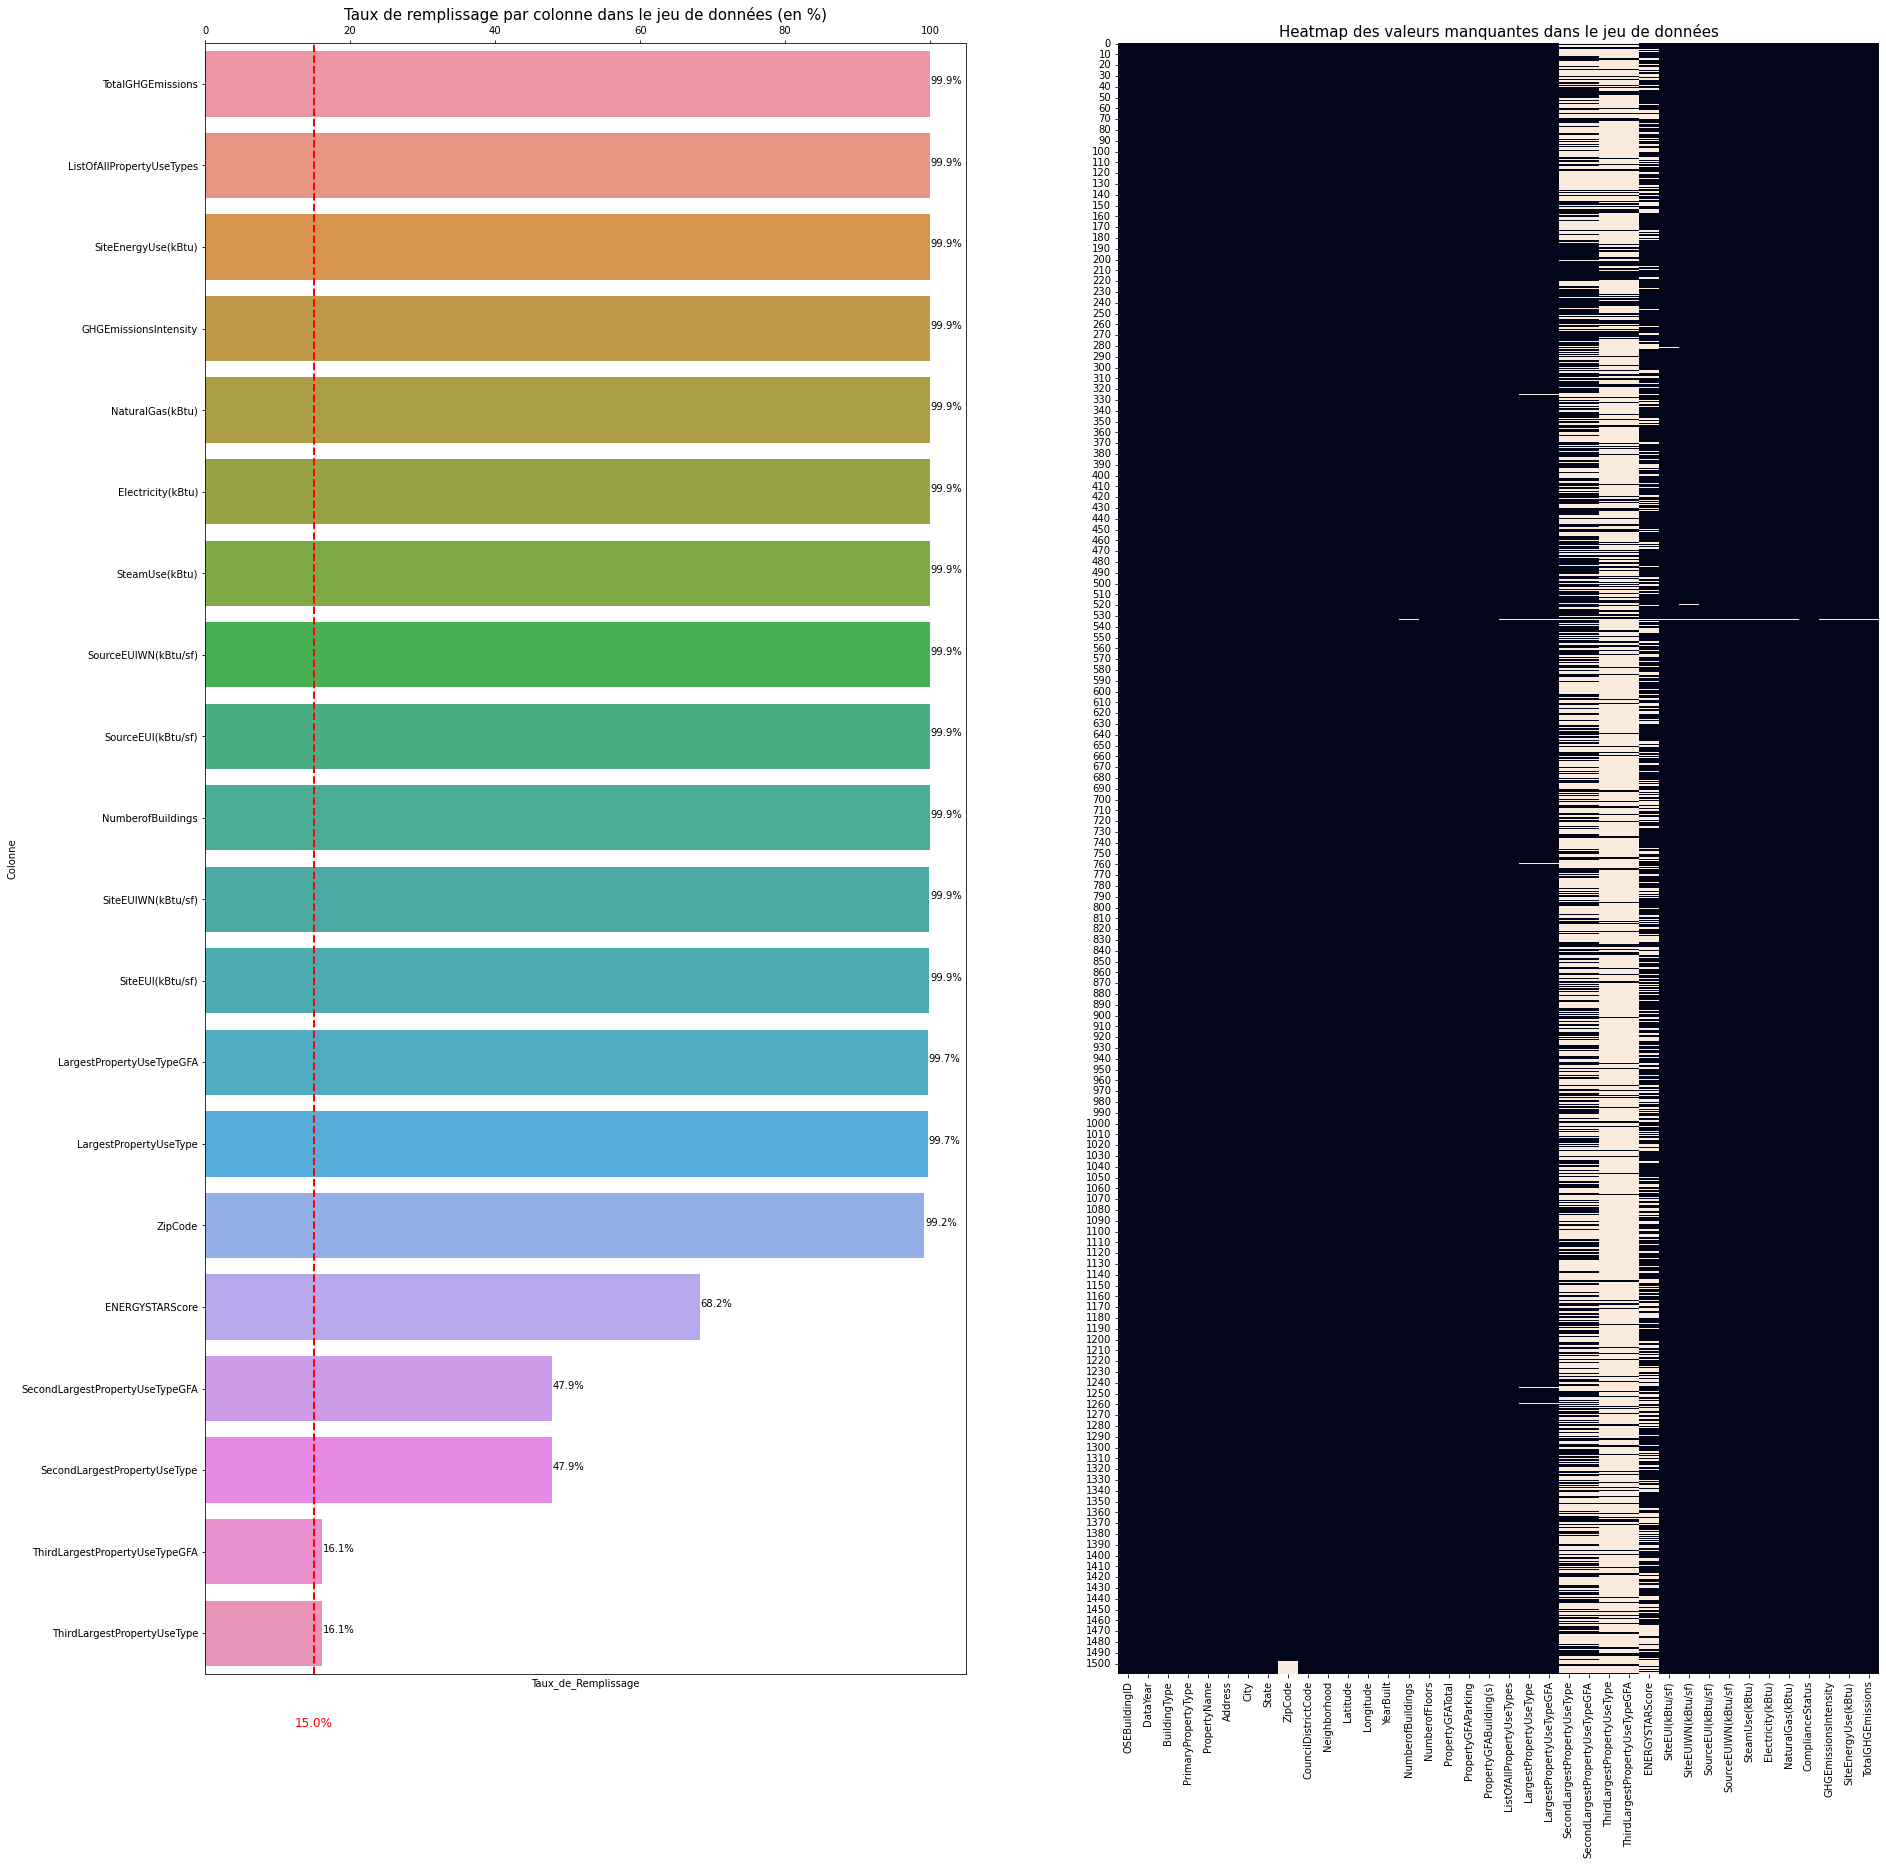

In [473]:
fct.taux_de_Remplissage_heatmap_missing(df_filtred, show_threshold_bar=True, seuil_filtrage=seuil_filtrage, affichage= 'both')

On observe dans le heatmap des valeurs manquantes deux groupements de lignes présentant des valeurs manquantes sur plusieurs colonnes :

**Groupements 1:**

In [474]:
df_filtred[df_filtred['LargestPropertyUseType'].isna() & df_filtred['LargestPropertyUseTypeGFA'].isna() & df_filtred['NumberofBuildings'].notna() & df_filtred['SiteEUI(kBtu/sf)'].notna() & df_filtred['SiteEUIWN(kBtu/sf)'].notna()].index.tolist()

[325, 759, 1244, 1259]

In [475]:
df_groupement_1 = df_filtred[df_filtred['LargestPropertyUseType'].isna() & df_filtred['LargestPropertyUseTypeGFA'].isna() & df_filtred['NumberofBuildings'].notna() & df_filtred['SiteEUI(kBtu/sf)'].notna() & df_filtred['SiteEUIWN(kBtu/sf)'].notna()]
display(df_groupement_1)
list_index_to_drop = df_groupement_1.index.tolist()
print('Voici la list des index du groupement 1:', list_index_to_drop)

OSEBuildingID DataYear    BuildingType          PrimaryPropertyType  \
325            496     2016  NonResidential        Self-Storage Facility   
759          21103     2016  NonResidential                        Hotel   
1244         25568     2016  NonResidential  Small- and Mid-Sized Office   
1259         25711     2016  NonResidential                   Restaurant   

                          PropertyName                Address     City State  \
325                   Market St Center  2811 NW Market Street  Seattle    WA   
759                    Palladian Hotel     2000 Second Avenue  Seattle    WA   
1244               Talon Northlake LLC   1341 N Northlake Way  Seattle    WA   
1259  BUSH GARDEN - RESTURANT & LOUNGE    614 S MAYNARD AVE S  Seattle    WA   

      ZipCode CouncilDistrictCode Neighborhood  Latitude  Longitude YearBuilt  \
325   98107.0                   6      BALLARD  47.66838 -122.39310      1946   
759   98121.0                   7     DOWNTOWN  47.61203 -122.34165      1910   
1244  98103.0                   4   LAKE UNION  47.64747 -122.34086      2008   
1259  98104.0                   2     DOWNTOWN  47.59697 -122.32474      1913   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
325                   2               2            111445                   0   
759                   1               8             61721                   0   
1244                  1               4             48350                   0   
1259                  1               3             28800                   0   

      PropertyGFABuilding(s)  \
325                   111445   
759                    61721   
1244                   48350   
1259                   28800   

                              ListOfAllPropertyUseTypes  \
325   Fitness Center/Health Club/Gym, Office, Other ...   
759                                               Hotel   
1244                                             Office   
1259                                         Restaurant   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
325                     NaN                       <NA>   
759                     NaN                       <NA>   
1244                    NaN                       <NA>   
1259                    NaN                       <NA>   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
325                           NaN                              NaN   
759                           NaN                              NaN   
1244                          NaN                              NaN   
1259                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
325                          NaN                             NaN   
759                          NaN                             NaN   
1244                         NaN                             NaN   
1259                         NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
325               NaN         47.799999           51.000000   
759              93.0         52.200001           53.500000   
1244             45.0         72.199997           74.699997   
1259              NaN         31.200001           32.500000   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SteamUse(kBtu)  \
325           103.000000            106.400002             0.0   
759           150.399994            154.399994             0.0   
1244          226.600006            234.600006             0.0   
1259           62.000000             62.799999             0.0   

      Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  \
325           3007514.0         2689958.0        Compliant   
759           2534592.0          362488.0        Compliant   
1244          3168131.0               0.0        Compliant   
1259           402907.0          497017.0        Compliant   

      GHGEmis

Voici la list des index du groupement 1: [325, 759, 1244, 1259]


Les variables ‘LargestPropertyUseType’ et ‘LargestPropertyUseTypeGFA’ sont essentielles pour analyser la consommation d’énergie d’un bâtiment. Elles représentent respectivement le type d’utilisation principal du bâtiment et la superficie brute de plancher associée à cette utilisation. Leur impact sur la consommation d’énergie est significatif. ces 4 lignes contenant des valeurs manquantes pour ces variables pourraient être supprimées pour une analyse précise de la consommation d’énergie:

In [476]:
df_filtred.drop(list_index_to_drop, inplace=True)

**Groupements 2:**

In [477]:
df_groupement_2 = df_filtred[df_filtred['LargestPropertyUseType'].isna() & df_filtred['LargestPropertyUseTypeGFA'].isna() & df_filtred['NumberofBuildings'].isna() & df_filtred['TotalGHGEmissions'].isna() & df_filtred['NumberofBuildings'].isna()]
display(df_groupement_2)
list_index_to_drop = df_groupement_2.index.tolist()
print('Voici la list des index du groupement 2:', list_index_to_drop)

OSEBuildingID DataYear    BuildingType          PrimaryPropertyType  \
533           773     2016  NonResidential  Small- and Mid-Sized Office   

         PropertyName          Address     City State  ZipCode  \
533  SEATTLE BUILDING  215 COLUMBIA ST  Seattle    WA  98104.0   

    CouncilDistrictCode Neighborhood  Latitude  Longitude YearBuilt  \
533                   7     DOWNTOWN   47.6038 -122.33293      1924   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
533               <NA>               4             63150                   0   

     PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
533                   63150                       NaN                    NaN   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
533                       <NA>                          NaN   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
533                              NaN                         NaN   

     ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
533                             NaN              NaN               NaN   

     SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
533                 NaN                 NaN                   NaN   

     SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  \
533             NaN                NaN               NaN    Non-Compliant   

     GHGEmissionsIntensity  SiteEnergyUse(kBtu)  TotalGHGEmissions  
533                    NaN                  NaN                NaN

Voici la list des index du groupement 2: [533]


Cette ligne de données fait référence à un bâtiment nommé “SEATTLE BUILDING” situé au “215 COLUMBIA ST, Seattle, WA, 98104”. Il s’agit d’un bâtiment non résidentiel de type “Small- and Mid-Sized Office”. Le bâtiment a été construit en 1924 et compte 4 étages. La superficie totale de la propriété est de 63150 pieds carrés, sans espace de stationnement. Cependant, les deux variables cibles ‘SiteEnergyUse(kBtu)’ et ‘TotalGHGEmissions’ ainsi que plusieurs autres caractéristiques sont manquantes. Ces variables sont importantes, donc on procède à la supression de celle-ci: 

In [478]:
df_filtred.drop(list_index_to_drop, inplace=True)


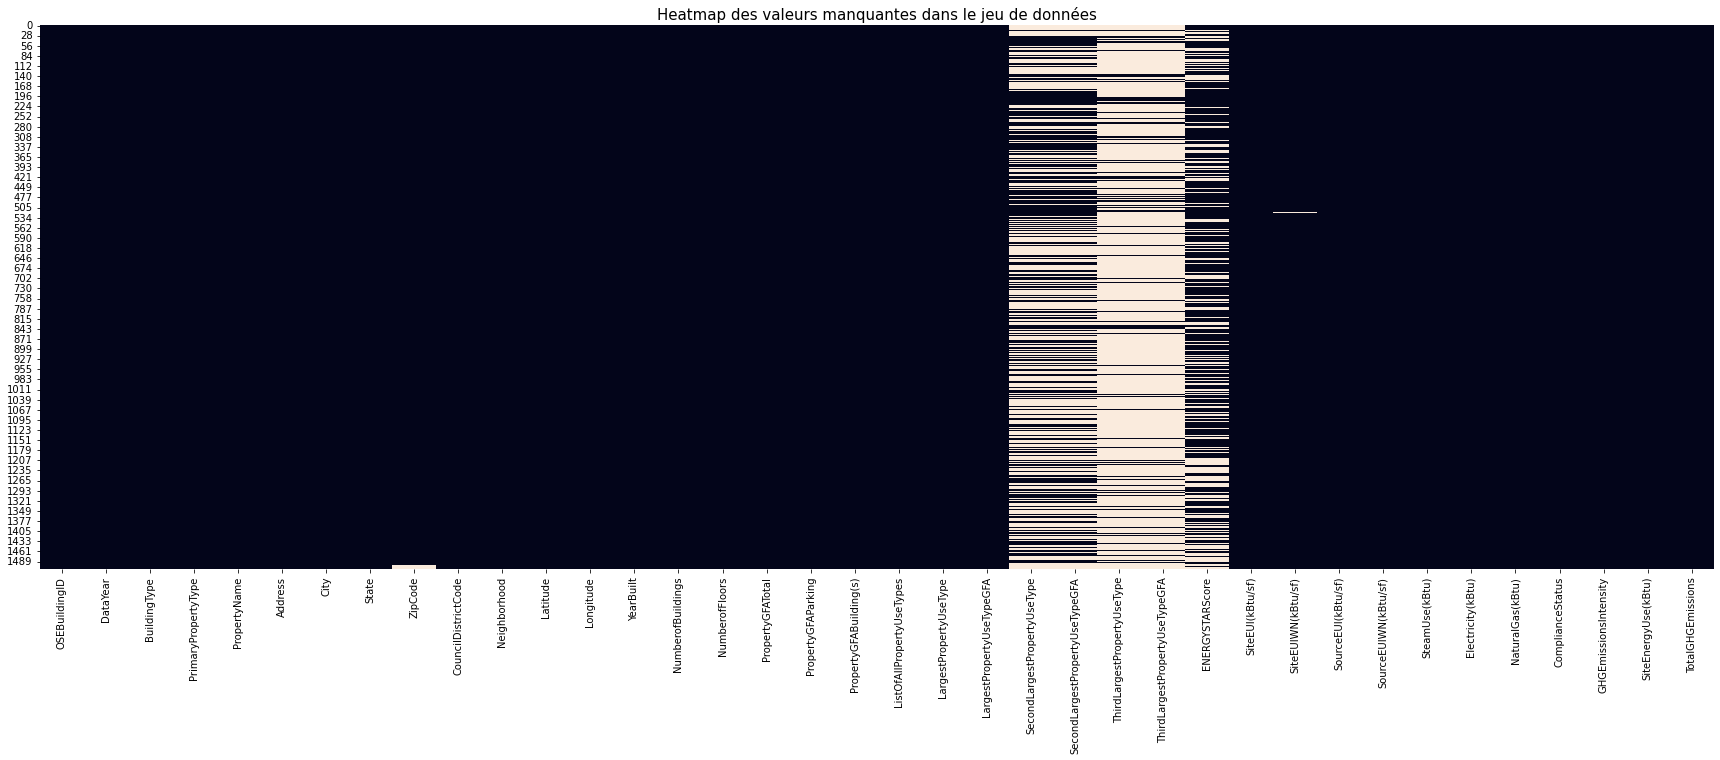

In [479]:
fct.taux_de_Remplissage_heatmap_missing(df_filtred, show_threshold_bar=True, seuil_filtrage=seuil_filtrage, affichage= 'heatmap_missing')

In [480]:
fct.show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 1505 lignes et 38 colonnes dans notre dataset.


2. Affichage de la dataframe:


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
0             1     2016  NonResidential               Hotel   
1             2     2016  NonResidential               Hotel   
2             3     2016  NonResidential               Hotel   
3             5     2016  NonResidential               Hotel   
4             8     2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  CouncilDistrictCode Neighborhood  Latitude  Longitude YearBuilt  \
0                   7     DOWNTOWN  47.61220 -122.33799      1927   
1                   7     DOWNTOWN  47.61317 -122.33393      1996   
2                   7     DOWNTOWN  47.61393 -122.33810      1969   
3                   7     DOWNTOWN  47.61412 -122.33664      1926   
4                   7     DOWNTOWN  47.61375 -122.34047      1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1              12             88434                   0   
1                  1              11            103566               15064   
2                  1              41            956110              196718   
3                  1              10             61320                   0   
4                  1              18            175580               62000   

   PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   88434                          Hotel   
1                   88502     Hotel, Parking, Restaurant   
2                  759392                          Hotel   
3                   61320                          Hotel   
4                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                      88434   
1                  Hotel                      83880   
2                  Hotel                     756493   
3                  Hotel                      61320   
4                  Hotel                     123445   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
0            189.000000      2003882.00          3946027.0         1276453.0   
1            179.399994            0.00          3242851.0         5145082.0   
2            244.100006     21566554.00         49526664.0         1493800.

**Vérification des colonnes quantitatives sans modalité :**

In [481]:
for col in fct.features_quantitatives(df_filtred)[0]:
    print('--------------')
    print(col)
    print('--------------')
    print('Nombre de valeurs unique de la variable', col,  'est:', df_filtred[col].nunique())

--------------
Latitude
--------------
Nombre de valeurs unique de la variable Latitude est: 1367
--------------
Longitude
--------------
Nombre de valeurs unique de la variable Longitude est: 1284
--------------
NumberofBuildings
--------------
Nombre de valeurs unique de la variable NumberofBuildings est: 16
--------------
NumberofFloors
--------------
Nombre de valeurs unique de la variable NumberofFloors est: 44
--------------
PropertyGFATotal
--------------
Nombre de valeurs unique de la variable PropertyGFATotal est: 1438
--------------
PropertyGFAParking
--------------
Nombre de valeurs unique de la variable PropertyGFAParking est: 284
--------------
PropertyGFABuilding(s)
--------------
Nombre de valeurs unique de la variable PropertyGFABuilding(s) est: 1436
--------------
LargestPropertyUseTypeGFA
--------------
Nombre de valeurs unique de la variable LargestPropertyUseTypeGFA est: 1423
--------------
SecondLargestPropertyUseTypeGFA
--------------
Nombre de valeurs unique de l

Cette liste de variables montre que chaque variable possède plus d’une valeur unique, donc nous conservons toutes les variables.

**Vérification des colonnes qualitatives sans modalité :**

In [482]:
for col in fct.features_qualitatives(df_filtred)[0]:
    print('--------------')
    print(col)
    print('--------------')
    print('Nombre de valeurs unique de la variable', col,  'est:', df_filtred[col].nunique())

--------------
OSEBuildingID
--------------
Nombre de valeurs unique de la variable OSEBuildingID est: 1505
--------------
DataYear
--------------
Nombre de valeurs unique de la variable DataYear est: 1
--------------
BuildingType
--------------
Nombre de valeurs unique de la variable BuildingType est: 5
--------------
PrimaryPropertyType
--------------
Nombre de valeurs unique de la variable PrimaryPropertyType est: 18
--------------
PropertyName
--------------
Nombre de valeurs unique de la variable PropertyName est: 1501
--------------
Address
--------------
Nombre de valeurs unique de la variable Address est: 1487
--------------
City
--------------
Nombre de valeurs unique de la variable City est: 1
--------------
State
--------------
Nombre de valeurs unique de la variable State est: 1
--------------
ZipCode
--------------
Nombre de valeurs unique de la variable ZipCode est: 47
--------------
CouncilDistrictCode
--------------
Nombre de valeurs unique de la variable CouncilDistric

Les colonnes ‘DataYear’, ‘City’ et ‘State’ ne présentent pas de modalités car elles n’ont qu’une seule valeur unique, donc il n’y a pas de différentes “modalités” à considérer. Cependant, nous ne supprimerons pas ces variables immédiatement du dataset. Elles peuvent rester provisoirement car elles pourraient avoir une utilité dans le cadre du feature engineering. Par conséquent, nous allons créer deux listes list_to_drop_after_FE (une pour la cible SiteEnergyUse(kBtu) et l'autre pour la cible TotalGHGEmissions) et y ajouter ces variables avec la méthode append à chaque fois. Ces variables seront supprimées après le processus de feature engineering:

In [483]:
# Création de la liste
list_to_drop_after_FE_EnergyUse=[]
list_to_drop_after_FE_GHGEmissions = []

# Ajout des variables à la liste
list_to_drop_after_FE_EnergyUse.append('DataYear')
list_to_drop_after_FE_EnergyUse.append('City')
list_to_drop_after_FE_EnergyUse.append('State')

list_to_drop_after_FE_GHGEmissions.append('DataYear')
list_to_drop_after_FE_GHGEmissions.append('City')
list_to_drop_after_FE_GHGEmissions.append('State')

# Affichage de la liste
# Affichage de la liste
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)


['DataYear', 'City', 'State']
['DataYear', 'City', 'State']


1. 1. 2. **Les variables qui contiennent ‘WN’ dans leurs noms:**

- le suffixe "WN" signifie "Weather Normalized" (normalisé par la météo)

In [484]:
# Obtenez les noms des colonnes qui contiennent 'WN'
cols_with_WN = [col for col in fct.features_quantitatives(df_filtred)[0] if 'WN' in col]
cols_with_WN

['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)']

In [485]:
# Affichez ces colonnes
df_filtred[cols_with_WN].head()

SiteEUIWN(kBtu/sf)  SourceEUIWN(kBtu/sf)
0           84.300003            189.000000
1           97.900002            179.399994
2           97.699997            244.100006
3          113.300003            224.000000
4          118.699997            215.600006

Et leurs corrélation avec les colonnes 'SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)':

In [486]:
print('La corrélation entre SiteEUI(kBtu/sf) et SiteEUIWN(kBtu/sf) est: ', round(df_filtred['SiteEUI(kBtu/sf)'].corr(df_filtred['SiteEUIWN(kBtu/sf)']),3))

print('La corrélation entre SourceEUI(kBtu/sf) et SourceEUIWN(kBtu/sf) est: ', round(df_filtred['SourceEUI(kBtu/sf)'].corr(df_filtred['SourceEUIWN(kBtu/sf)']),3))

La corrélation entre SiteEUI(kBtu/sf) et SiteEUIWN(kBtu/sf) est:  0.992
La corrélation entre SourceEUI(kBtu/sf) et SourceEUIWN(kBtu/sf) est:  0.993


Ces deux variables pourraient être supprimées difinitivement du dataset, car:
- elles prennent en compte les conditions météorologiques de la région. Dans notre analyse et prédiction, nous ne considérerons pas ces conditions
- elles sont redondantes avec les colonnes 'SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)'.

In [487]:
df_filtred = df_filtred.drop(['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'], axis=1)

1. 1. 3. **Les variables qui contiennent ‘GFA’ dans leurs noms:**

In [488]:
# Obtenez les noms des colonnes qui contiennent 'WN'
cols_with_GFA = [col for col in fct.features_quantitatives(df_filtred)[0] if 'GFA' in col]
cols_with_GFA

['PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']

In [489]:
# Affichez ces colonnes
df_GFA = df_filtred[cols_with_GFA]
df_GFA.head()

PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            956110              196718                  759392   
3             61320                   0                   61320   
4            175580               62000                  113580   

   LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                      88434                              NaN   
1                      83880                          15064.0   
2                     756493                              NaN   
3                      61320                              NaN   
4                     123445                          68009.0   

   ThirdLargestPropertyUseTypeGFA  
0                             NaN  
1                          4622.0  
2                             NaN  
3                             NaN  
4                             0.0

On remarque que:
1. la variable 'PropertyGFATotal' est la somme des deux variables 'PropertyGFAParking' et 'PropertyGFABuilding(s)'
2. la variable 'PropertyGFATotal' est la somme des trois variables 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseTypeGFA'



1. Vérifier es deux remarques: 

In [490]:
df_GFA['Total_GFA_1'] = df_GFA['PropertyGFABuilding(s)'] + df_GFA['PropertyGFAParking']
df_GFA['Total_GFA_2'] = df_GFA['LargestPropertyUseTypeGFA'] + df_GFA['SecondLargestPropertyUseTypeGFA'] + df_GFA['ThirdLargestPropertyUseTypeGFA']

C:\Users\bille\AppData\Local\Temp\ipykernel_42088\2135592043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GFA['Total_GFA_1'] = df_GFA['PropertyGFABuilding(s)'] + df_GFA['PropertyGFAParking']
C:\Users\bille\AppData\Local\Temp\ipykernel_42088\2135592043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GFA['Total_GFA_2'] = df_GFA['LargestPropertyUseTypeGFA'] + df_GFA['SecondLargestPropertyUseTypeGFA'] + df_GFA['ThirdLargestPropertyUseTypeGFA']


2. Vérification de la corrélation entre les nouvelles colonnes [‘Total_GFA_1’,‘Total_GFA_2’] et la colonne ‘PropertyGFATotal’: 

In [491]:
df_GFA[['Total_GFA_1', 'PropertyGFATotal']].corr()

Total_GFA_1  PropertyGFATotal
Total_GFA_1               1.0               1.0
PropertyGFATotal          1.0               1.0

In [492]:
df_GFA[['Total_GFA_2', 'PropertyGFATotal']].corr()

Total_GFA_2  PropertyGFATotal
Total_GFA_2          1.000000          0.982816
PropertyGFATotal     0.982816          1.000000

On a une corrélation de 100% entre les variables 'Total_GFA_1', 'PropertyGFATotal' et corrélation de 98,2% entre les variables 'Total_GFA_2', 'PropertyGFATotal'. Cela confirme donc les deux hypothèses 1 et 2.

**Donc voici les colonnes pertinantes quantitatives et qualitatives:**

In [493]:
features_quantitatives_pertinantes = fct.features_quantitatives(df_filtred)[0]
features_quantitatives_pertinantes

['Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'GHGEmissionsIntensity',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions']

In [494]:
features_qualitatives_pertinantes = fct.features_qualitatives(df_filtred)[0]
features_qualitatives_pertinantes

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'ComplianceStatus']

In [495]:
features_pertinantes=[]
features_pertinantes.extend(features_qualitatives_pertinantes)
features_pertinantes.extend(features_quantitatives_pertinantes)

In [496]:
print(features_pertinantes)

['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'ComplianceStatus', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']


In [497]:
# Mettre les variables cibles en dernière position de la liste features_pertinantes:
for col in ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']:
    features_pertinantes.remove(col)
features_pertinantes.extend(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])
print(features_pertinantes)

['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'ComplianceStatus', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']


In [498]:
df_filtred = df_filtred.loc[:,features_pertinantes]

In [499]:
fct.show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 1505 lignes et 36 colonnes dans notre dataset.


2. Affichage de la dataframe:


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
0             1     2016  NonResidential               Hotel   
1             2     2016  NonResidential               Hotel   
2             3     2016  NonResidential               Hotel   
3             5     2016  NonResidential               Hotel   
4             8     2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  CouncilDistrictCode Neighborhood YearBuilt      ListOfAllPropertyUseTypes  \
0                   7     DOWNTOWN      1927                          Hotel   
1                   7     DOWNTOWN      1996     Hotel, Parking, Restaurant   
2                   7     DOWNTOWN      1969                          Hotel   
3                   7     DOWNTOWN      1926                          Hotel   
4                   7     DOWNTOWN      1980  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType SecondLargestPropertyUseType  \
0                  Hotel                          NaN   
1                  Hotel                      Parking   
2                  Hotel                          NaN   
3                  Hotel                          NaN   
4                  Hotel                      Parking   

  ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
0                         NaN        Compliant  47.61220 -122.33799   
1                  Restaurant        Compliant  47.61317 -122.33393   
2                         NaN        Compliant  47.61393 -122.33810   
3                         NaN        Compliant  47.61412 -122.33664   
4               Swimming Pool        Compliant  47.61375 -122.34047   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1              12             88434                   0   
1                  1              11            103566               15064   
2                  1              41            956110              196718   
3                  1              10             61320                   0   
4                  1              18            175580               62000   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   88434                      88434   
1                   88502                      83880   
2                  759392                     756493   
3                   61320                      61320   
4                  113580                     123445   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              NaN                             NaN   
1                          15064.0                          4622.0   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                          68009.0                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
0             60.0         81.699997          182.500000      2003882.00   
1             61.0         94.800003          176.100006            0.00   
2             43.0         96.000000          241.899994     21566554.00   
3             56.0        110.800003          216.199997      2214446.25   
4             75.0        114.800003          211.399994            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
0          3946027.0         1276453.0                   2.83   
1          3242851.0         5145082.0                   2.86   
2         49526664.0         1493800.0    

#### 4.2 **Filtres sur les lignes:**

##### 4 .2 .1 **Supression des lignes ne présentant pas de valeurs cible:**

In [500]:
# Voici la liste des variables cibles :
variables_cibles = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

#Supprimons les valeurs 'nan':
for col in variables_cibles:
    df_filtred = df_filtred[df_filtred[col].notna()]

In [501]:
fct.show_data(df_filtred)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 1505 lignes et 36 colonnes dans notre dataset.


2. Affichage de la dataframe:


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
0             1     2016  NonResidential               Hotel   
1             2     2016  NonResidential               Hotel   
2             3     2016  NonResidential               Hotel   
3             5     2016  NonResidential               Hotel   
4             8     2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  CouncilDistrictCode Neighborhood YearBuilt      ListOfAllPropertyUseTypes  \
0                   7     DOWNTOWN      1927                          Hotel   
1                   7     DOWNTOWN      1996     Hotel, Parking, Restaurant   
2                   7     DOWNTOWN      1969                          Hotel   
3                   7     DOWNTOWN      1926                          Hotel   
4                   7     DOWNTOWN      1980  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType SecondLargestPropertyUseType  \
0                  Hotel                          NaN   
1                  Hotel                      Parking   
2                  Hotel                          NaN   
3                  Hotel                          NaN   
4                  Hotel                      Parking   

  ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
0                         NaN        Compliant  47.61220 -122.33799   
1                  Restaurant        Compliant  47.61317 -122.33393   
2                         NaN        Compliant  47.61393 -122.33810   
3                         NaN        Compliant  47.61412 -122.33664   
4               Swimming Pool        Compliant  47.61375 -122.34047   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1              12             88434                   0   
1                  1              11            103566               15064   
2                  1              41            956110              196718   
3                  1              10             61320                   0   
4                  1              18            175580               62000   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   88434                      88434   
1                   88502                      83880   
2                  759392                     756493   
3                   61320                      61320   
4                  113580                     123445   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              NaN                             NaN   
1                          15064.0                          4622.0   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                          68009.0                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
0             60.0         81.699997          182.500000      2003882.00   
1             61.0         94.800003          176.100006            0.00   
2             43.0         96.000000          241.899994     21566554.00   
3             56.0        110.800003          216.199997      2214446.25   
4             75.0        114.800003          211.399994            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
0          3946027.0         1276453.0                   2.83   
1          3242851.0         5145082.0                   2.86   
2         49526664.0         1493800.0    

##### 4. 2. 2. **Supression des lignes en double:**

In [502]:
# Affichage des doublons
doublons = df_filtred[df_filtred.duplicated('OSEBuildingID')]
print(doublons)

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, CouncilDistrictCode, Neighborhood, YearBuilt, ListOfAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType, ComplianceStatus, Latitude, Longitude, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SourceEUI(kBtu/sf), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), GHGEmissionsIntensity, SiteEnergyUse(kBtu), TotalGHGEmissions]
Index: []


Le DataFrame 'doublons' est vide, ce qui signifie qu'il n'y a aucun doublon dans les données. 

In [503]:
fct.duplicated_row(df_filtred, primary_key='OSEBuildingID')

Le nombre de lignes dupliquées par rapport à notre clé primaire est de 0 lignes.


**Conclusion :** Après avoir filtré les données sur les catégories typiquement destinées à l’habitation, nous sommes prêts à analyser les émissions de CO2 et la consommation d’énergie des bâtiments non résidentiels. En excluant les catégories de logements multifamiliaux et les résidences, nous pouvons nous concentrer sur les bâtiments commerciaux, industriels et autres types d’espaces non destinés à l’habitation. Cette approche nous permettra de mieux comprendre les tendances et les schémas énergétiques, et d’identifier des opportunités pour réduire les émissions et améliorer l’efficacité énergétique.

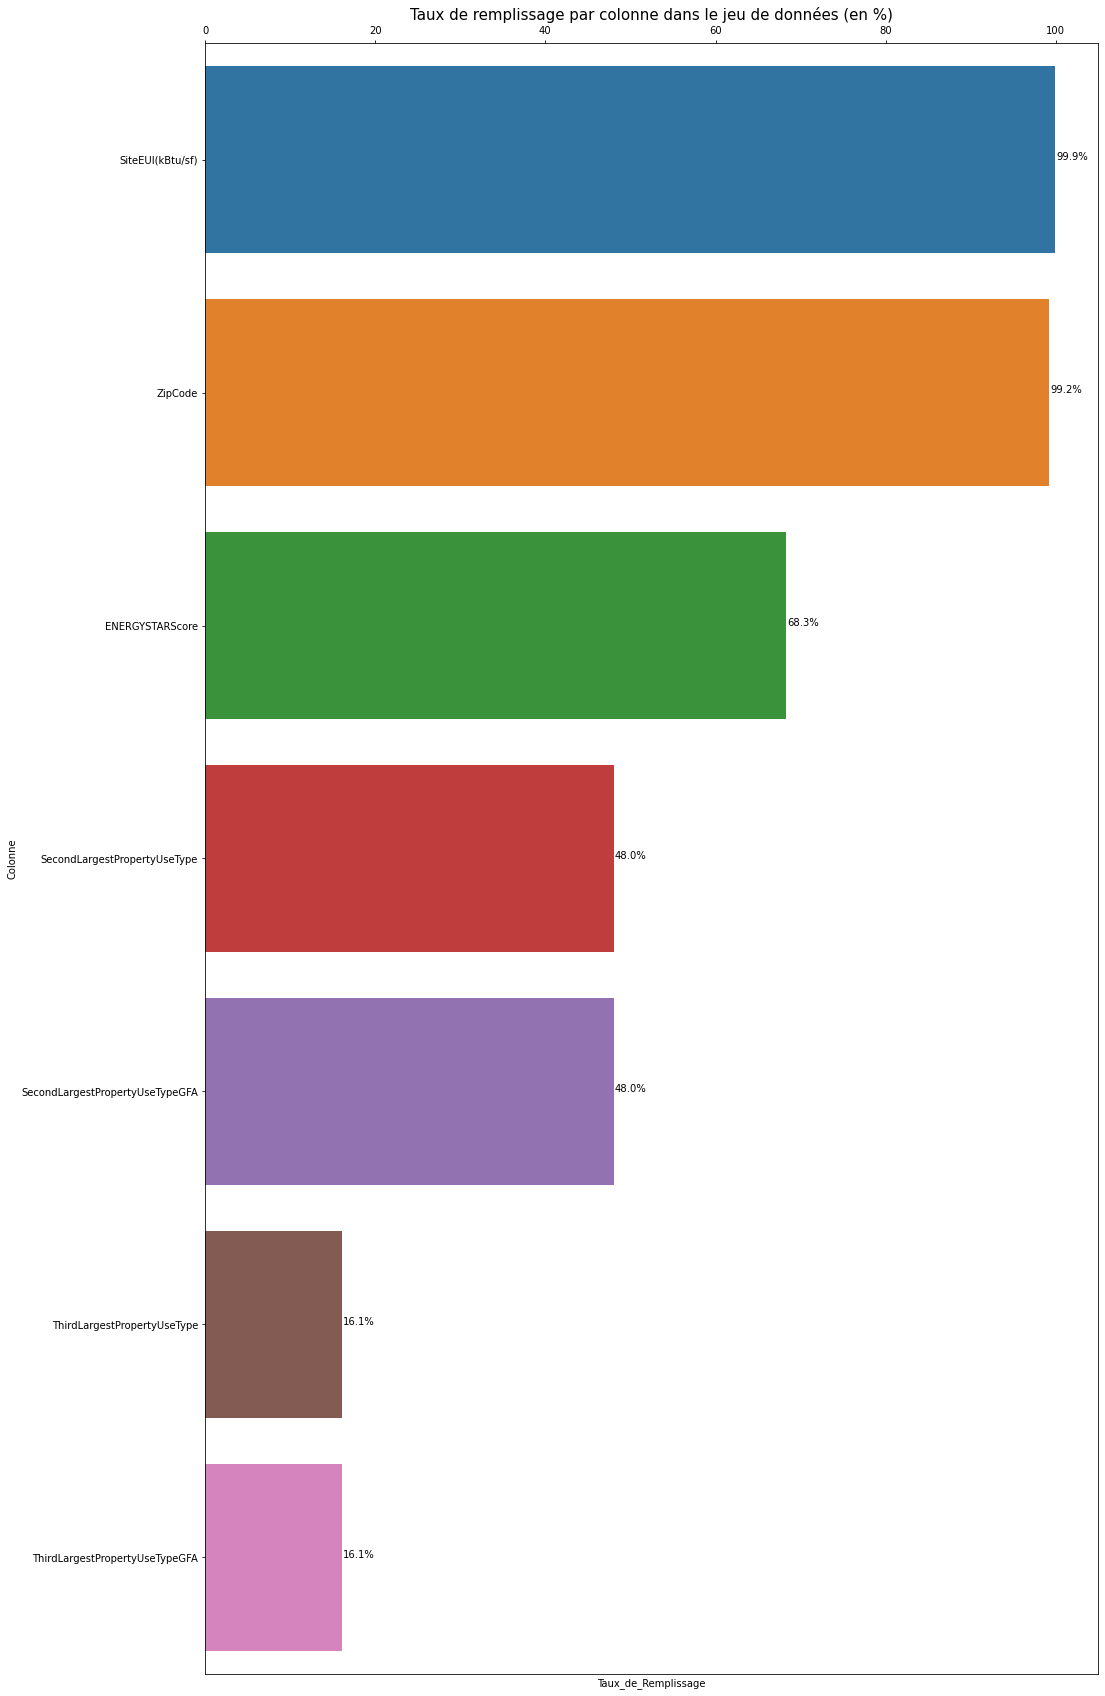

In [504]:
fct.taux_de_Remplissage_heatmap_missing(df_filtred, show_threshold_bar=False, seuil_filtrage=seuil_filtrage, affichage= 'filling_rate')

In [505]:
df = df_filtred.copy()

## **5. Identifier et traiter les valeurs aberrantes:** 

###  **Features numériques :**

**Afficher les statistiques:**

In [506]:
# Affichage les statistiques du dataframe:
df.describe()

Latitude    Longitude  NumberofBuildings  NumberofFloors  \
count  1505.000000  1505.000000        1505.000000     1505.000000   
mean     47.615177  -122.333132           1.182724        4.171429   
std       0.048915     0.024673           3.078835        6.777808   
min      47.499170  -122.411820           0.000000        0.000000   
25%      47.582900  -122.343400           1.000000        1.000000   
50%      47.611850  -122.333030           1.000000        2.000000   
75%      47.649040  -122.322140           1.000000        4.000000   
max      47.733870  -122.258640         111.000000       99.000000   

       PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count      1.505000e+03         1505.000000            1.505000e+03   
mean       1.208858e+05        12805.877741            1.080799e+05   
std        3.087493e+05        42841.364571            2.957845e+05   
min        1.128500e+04            0.000000            1.128500e+04   
25%        2.974000e+04            0.000000            2.876000e+04   
50%        4.976000e+04            0.000000            4.767300e+04   
75%        1.060410e+05            0.000000            9.625400e+04   
max        9.320156e+06       512608.000000            9.320156e+06   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count               1.505000e+03                       723.000000   
mean                1.026552e+05                     36917.896676   
std                 2.886417e+05                     69294.046009   
min                 7.583000e+03                         0.000000   
25%                 2.628200e+04                      4708.500000   
50%                 4.552200e+04                     10918.000000   
75%                 9.390500e+04                     32851.000000   
max                 9.320156e+06                    686750.000000   

       ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count                      243.000000      1028.000000       1504.000000   
mean                     11399.572840        65.802529         70.371077   
std                      27795.450693        28.238705         72.654593   
min                          0.000000         1.000000          0.000000   
25%                       1763.000000        49.000000         33.175000   
50%                       5000.000000        73.500000         50.599998   
75%                       9987.500000        89.000000         79.150000   
max                     303910.000000       100.000000        834.400024   

       SourceEUI(kBtu/sf)  SteamUse(kBtu)  Electricity(kBtu)  \
count         1505.000000    1.505000e+03       1.505000e+03   
mean           172.225847    5.451121e+05       5.808994e+06   
std            180.503711    5.779905e+06       2.129314e+07   
min              0.000000    0.000000e+00      -1.154170e+05   
25%             74.500000    0.000000e+00       7.102750e+05   
50%            128.000000    0.000000e+00       1.602084e+06   
75%            199.100006    0.000000e+00       4.897760e+06   
max           2620.000000    1.349435e+08       6.570744e+08   

       NaturalGas(kBtu)  GHGEmissionsIntensity  SiteEnergyUse(kBtu)  \
count      1.505000e+03            1505.000000         1.505000e+03   
mean       1.744053e+06               1.543674         8.218796e+06   
std        6.092067e+06               2.170456         2.944231e+07   
min        0.000000e+00              -0.020000         0.000000e+00   
25%        0.000000e+00               0.340000         1.217509e+06   
50%        4.681170e+05               0.840000         2.502081e+06   
75%        1.426840e+06               1.810000         6.858534e+06   
max        1.381912e+08              25.710000         8.739237e+08   

       TotalGHGEmissions  
count        1505.000000  
mean          175.199542  
std           657.705265  
min            -0.800000  
25%            19.560000  
50%            49.170000  
75%           134.570000  

On remarque que :

1. Plusieurs colonnes contiennent des valeurs négatives (< 0), à l’exception de la colonne ‘Longitude’ qui peut contenir des valeurs négatives. Ces valeurs devront être supprimées ultérieurement.
2. Le maximum de la colonne ‘NumberofFloors’ est de 99 étages, ce qui est incohérent car le plus grand bâtiment à Seattle, le Columbia Center achevé en 1985, compte seulement 76 étages. Les valeurs supérieures à 76 dans cette colonne devront être supprimées ou corrigé ultérieurement.
3. Le minimum de la colonne ‘NumberofFloors’ est de 0 étages (à vérifier si c'est correct ou pas)

5. 1. **Afficher la liste des variables avec des valeurs aberrantes négatives:**

In [507]:
# Selon la description (describe) du DataFrame df, certaines variables présentent des valeurs aberrantes (négative):
fct.affichage_valeurs_negatives(df, exclude= 'Longitude', affichage=True)

----------------------------------------------------------------------------------------
liste des colonnes avec des valeurs < 0 : ['Electricity(kBtu)', 'GHGEmissionsIntensity', 'TotalGHGEmissions']
----------------------------------------------------------------------------------------




OSEBuildingID DataYear    BuildingType          PrimaryPropertyType  \
1459         49784     2016  NonResidential  Small- and Mid-Sized Office   

        PropertyName              Address     City State  ZipCode  \
1459  Bullitt Center  1501 E. Madison St.  Seattle    WA  98122.0   

     CouncilDistrictCode Neighborhood YearBuilt ListOfAllPropertyUseTypes  \
1459                   3      CENTRAL      2013                    Office   

     LargestPropertyUseType SecondLargestPropertyUseType  \
1459                 Office                          NaN   

     ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
1459                         NaN        Compliant  47.61432 -122.31257   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1459                  1               6             52000                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
1459                   52000                      48159   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
1459                              NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
1459            100.0               7.1                 2.0             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
1459          -115417.0               0.0                  -0.02   

      SiteEnergyUse(kBtu)  TotalGHGEmissions  
1459          342726.0938               -0.8

['Electricity(kBtu)', 'GHGEmissionsIntensity', 'TotalGHGEmissions']

5. 2. **Suppression des valeurs négatives:**

In [508]:
list_col_negative = fct.affichage_valeurs_negatives(df, exclude= 'Longitude')

In [509]:
# Supprimer les valeurs négatives :
fct.drop_valeurs_negatives(df, list_col_negative)

5. 3. **Afficher la liste des variables avec des valeurs aberrantes > 76:**

In [510]:
df[df.NumberofFloors > 76]

OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
865         21611     2016  NonResidential    Worship Facility   

                       PropertyName                   Address     City State  \
865  Seattle Chinese Baptist Church  5801 Beacon Avenue South  Seattle    WA   

     ZipCode CouncilDistrictCode      Neighborhood YearBuilt  \
865  98108.0                   2  GREATER DUWAMISH      1977   

    ListOfAllPropertyUseTypes LargestPropertyUseType  \
865          Worship Facility       Worship Facility   

    SecondLargestPropertyUseType ThirdLargestPropertyUseType ComplianceStatus  \
865                          NaN                         NaN        Compliant   

     Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
865  47.55072 -122.30265                  1              99             21948   

     PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
865                   0                   21948                      21948   

     SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
865                              NaN                             NaN   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
865             80.0              14.9           46.599998             0.0   

     Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
865           326001.0               0.0                    0.1   

     SiteEnergyUse(kBtu)  TotalGHGEmissions  
865          326001.1875               2.27

Le bâtiment Seattle Chinese Baptist Church ne contient pas 99 étages. Selon les informations disponibles, il s’agit d’une église historique située à Seattle. Il n’y a aucune mention du nombre d’étages, mais étant donné qu’il s’agit d’une église, il est très improbable qu’elle ait 99 étages. Il semble donc qu’il y ait une erreur dans les données. Après avoir consulté des sources en ligne, il apparaît que cette église contient un seul étage. Par conséquent, nous corrigeons le nombre d’étages dans les données:

[Lien vers l'église BHC](https://www.beaconhillchurch.com/), d’après la photo sur la page d’accueil de leur site web officiel, on peut confirmer que l’église Beacon Hill Church à Seattle a un seul étage. 

5. 4. **Correction de la ligne:**

In [511]:
df.loc[df['PropertyName'] == 'Seattle Chinese Baptist Church', 'NumberofFloors'] = 1

5. 5. **Afficher la liste des variables avec des valeurs aberrantes = 0 étage:**

In [512]:
df[df.NumberofFloors == 0]

OSEBuildingID DataYear        BuildingType          PrimaryPropertyType  \
156            267     2016      NonResidential                        Hotel   
449            656     2016      NonResidential               Medical Office   
520            758     2016      NonResidential                        Other   
991          23311     2016      NonResidential               Medical Office   
1071         24086     2016              Campus                        Other   
1432         40028     2016      NonResidential                    Warehouse   
1433         40031     2016      NonResidential               Medical Office   
1434         40034     2016      NonResidential  Small- and Mid-Sized Office   
1446         49705     2016  Nonresidential COS                        Other   
1478         49966     2016      NonResidential                        Other   
1479         49967     2016              Campus                   University   

                                           PropertyName  \
156                                 Grand Hyatt Seattle   
449                                     Arnold Pavilion   
520                                       Pacific Place   
991                                 HART First Hill LLC   
1071  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...   
1432                                       Sandpoint #5   
1433                                      Sandpoint #25   
1434                                      Sandpoint #29   
1446                                           Magnuson   
1478             Smilow Rainier Vista Boys & Girls Club   
1479          University of Washington - Seattle Campus   

                                Address     City State  ZipCode  \
156                         721 Pine St  Seattle    WA  98101.0   
449                 1221 Madison Street  Seattle    WA  98104.0   
520                     600 Pine Street  Seattle    WA  98101.0   
991                1124 Columbia Street  Seattle    WA  98104.0   
1071                 1333 AIRPORT WAY S  Seattle    WA  98134.0   
1432                   7561 63rd Ave NE  Seattle    WA  98115.0   
1433                    6222 NE 74th St  Seattle    WA  98115.0   
1434                    6200 NE 74th ST  Seattle    WA  98115.0   
1446             7400 Sand Point Way NE  Seattle    WA  98115.0   
1478  4520 Martin Luther King Jr. Way S  Seattle    WA  98108.0   
1479          NE 45th St & Brooklyn Ave  Seattle    WA  98105.0   

     CouncilDistrictCode      Neighborhood YearBuilt  \
156                    7          DOWNTOWN      1999   
449                    3              EAST      2004   
520                    7          DOWNTOWN      1999   
991                    3              EAST      1945   
1071                   2  GREATER DUWAMISH      1991   
1432                   4         NORTHEAST      1940   
1433                   4         NORTHEAST      1960   
1434                   4         NORTHEAST      1960   
1446                   4         NORTHEAST      1929   
1478                   2         SOUTHEAST      2009   
1479                   4         NORTHEAST      1900   

                              ListOfAllPropertyUseTypes  \
156     Hotel, Other, Parking, Restaurant, Retail Store   
449                                      Medical Office   
520   Office, Other - Entertainment/Public Assembly,...   
991                             Medical Office, Parking   
1071                                     Other, Parking   
1432                 Non-Refrigerated Warehouse, Office   
1433                                     Medical Office   
1434                                             Office   
1446                                 Other - Recreation   
1478                                 Pre-school/Daycare   
1479                                 College/University   

          LargestPropertyUseType           SecondLargestPropertyUseType  \
156                        Hotel                                Parking  

Le nombre d'étages (`NumberofFloors`) est égal à 0 pour certains bâtiments, ce qui indique que ces bâtiments sont de plain-pied. Voici les résultats de ma recherche sur Internet pour ces bâtiments :

1. **Grand Hyatt Seattle** : Le Grand Hyatt Seattle est un hôtel de luxe situé à Seattle. Le nombre exact d'étages n'est pas mentionné dans les sources disponibles. Cependant, il est indiqué que toutes les chambres sont situées à partir du 10ème étage.
2. **Arnold Pavilion** : Je n'ai pas trouvé d'informations précises sur le nombre d'étages de l'Arnold Pavilion.
3. **Pacific Place** : Le Pacific Place est un centre commercial situé à Seattle. Selon une source, ce centre commercial compte 4 ou 5 étages.
4. **HART First Hill LLC** : Je n'ai pas trouvé d'informations précises sur le nombre d'étages du bâtiment HART First Hill LLC.
5. **Sandpoint #5** : Je n'ai pas trouvé d'informations précises sur le nombre d'étages du bâtiment Sandpoint #5.
6. **Sandpoint #25** : Je n'ai pas trouvé d'informations précises sur le nombre d'étages du bâtiment Sandpoint #25.
7. **Sandpoint #29** : Je n'ai pas trouvé d'informations précises sur le nombre d'étages du bâtiment Sandpoint #29.
8. **Magnuson** : Je n'ai pas trouvé d'informations précises sur le nombre d'étages du bâtiment Magnuson.
9. **Smilow Rainier Vista Boys & Girls Club** : Je n'ai pas trouvé d'informations précises sur le nombre d'étages du bâtiment Smilow Rainier Vista Boys & Girls Club.
10. **University of Washington - Seattle Campus** : L'Université de Washington à Seattle est une grande université publique de recherche. Le campus principal est situé à Seattle et s'étend sur une belle superficie de 700 acres. Cependant, le nombre exact d'étages n'est pas mentionné dans les sources disponibles.

Nous avons donc décidé de conserver ces bâtiments dans notre base de données car il ne s'agit pas d'une erreur. Le `NumberofFloors` représente le nombre de niveaux où se trouvent ces bâtiments.

5. 6. **Afficher les statistiques:**

In [513]:
# Affichage les statistiques du dataframe:
df.describe()

Latitude    Longitude  NumberofBuildings  NumberofFloors  \
count  1504.000000  1504.000000        1504.000000     1504.000000   
mean     47.615178  -122.333146           1.182846        4.105053   
std       0.048931     0.024676           3.079855        6.323472   
min      47.499170  -122.411820           0.000000        0.000000   
25%      47.582900  -122.343428           1.000000        1.000000   
50%      47.611820  -122.333035           1.000000        2.000000   
75%      47.649043  -122.322178           1.000000        4.000000   
max      47.733870  -122.258640         111.000000       76.000000   

       PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count      1.504000e+03         1504.000000            1.504000e+03   
mean       1.209316e+05        12814.392287            1.081172e+05   
std        3.088468e+05        42854.340306            2.958794e+05   
min        1.128500e+04            0.000000            1.128500e+04   
25%        2.971400e+04            0.000000            2.871650e+04   
50%        4.975200e+04            0.000000            4.763750e+04   
75%        1.062458e+05            0.000000            9.626550e+04   
max        9.320156e+06       512608.000000            9.320156e+06   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count               1.504000e+03                       723.000000   
mean                1.026915e+05                     36917.896676   
std                 2.887343e+05                     69294.046009   
min                 7.583000e+03                         0.000000   
25%                 2.628025e+04                      4708.500000   
50%                 4.551100e+04                     10918.000000   
75%                 9.404625e+04                     32851.000000   
max                 9.320156e+06                    686750.000000   

       ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count                      243.000000      1027.000000       1503.000000   
mean                     11399.572840        65.769231         70.413174   
std                      27795.450693        28.232264         72.660424   
min                          0.000000         1.000000          0.000000   
25%                       1763.000000        49.000000         33.200001   
50%                       5000.000000        73.000000         50.599998   
75%                       9987.500000        89.000000         79.200001   
max                     303910.000000       100.000000        834.400024   

       SourceEUI(kBtu/sf)  SteamUse(kBtu)  Electricity(kBtu)  \
count         1504.000000    1.504000e+03       1.504000e+03   
mean           172.339029    5.454746e+05       5.812933e+06   
std            180.510319    5.781810e+06       2.129967e+07   
min              0.000000    0.000000e+00       0.000000e+00   
25%             74.574999    0.000000e+00       7.104272e+05   
50%            128.250000    0.000000e+00       1.603396e+06   
75%            199.100006    0.000000e+00       4.899381e+06   
max           2620.000000    1.349435e+08       6.570744e+08   

       NaturalGas(kBtu)  GHGEmissionsIntensity  SiteEnergyUse(kBtu)  \
count      1.504000e+03            1504.000000         1.504000e+03   
mean       1.745212e+06               1.544714         8.224033e+06   
std        6.093927e+06               2.170803         2.945140e+07   
min        0.000000e+00               0.000000         0.000000e+00   
25%        0.000000e+00               0.340000         1.217961e+06   
50%        4.691260e+05               0.840000         2.502106e+06   
75%        1.429443e+06               1.810000         6.858700e+06   
max        1.381912e+08              25.710000         8.739237e+08   

       TotalGHGEmissions  
count        1504.000000  
mean          175.316563  
std           657.908353  
min             0.000000  
25%            19.597500  
50%            49.175000  
75%           134.600000  

In [514]:
df.describe()[['NumberofFloors', 'Electricity(kBtu)', 'GHGEmissionsIntensity', 'TotalGHGEmissions']]

NumberofFloors  Electricity(kBtu)  GHGEmissionsIntensity  \
count     1504.000000       1.504000e+03            1504.000000   
mean         4.105053       5.812933e+06               1.544714   
std          6.323472       2.129967e+07               2.170803   
min          0.000000       0.000000e+00               0.000000   
25%          1.000000       7.104272e+05               0.340000   
50%          2.000000       1.603396e+06               0.840000   
75%          4.000000       4.899381e+06               1.810000   
max         76.000000       6.570744e+08              25.710000   

       TotalGHGEmissions  
count        1504.000000  
mean          175.316563  
std           657.908353  
min             0.000000  
25%            19.597500  
50%            49.175000  
75%           134.600000  
max         12307.160000

On remarque qu’il ne reste plus de valeurs aberrantes.

In [515]:
fct.show_data(df)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 1504 lignes et 36 colonnes dans notre dataset.


2. Affichage de la dataframe:


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
0             1     2016  NonResidential               Hotel   
1             2     2016  NonResidential               Hotel   
2             3     2016  NonResidential               Hotel   
3             5     2016  NonResidential               Hotel   
4             8     2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  CouncilDistrictCode Neighborhood YearBuilt      ListOfAllPropertyUseTypes  \
0                   7     DOWNTOWN      1927                          Hotel   
1                   7     DOWNTOWN      1996     Hotel, Parking, Restaurant   
2                   7     DOWNTOWN      1969                          Hotel   
3                   7     DOWNTOWN      1926                          Hotel   
4                   7     DOWNTOWN      1980  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType SecondLargestPropertyUseType  \
0                  Hotel                          NaN   
1                  Hotel                      Parking   
2                  Hotel                          NaN   
3                  Hotel                          NaN   
4                  Hotel                      Parking   

  ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
0                         NaN        Compliant  47.61220 -122.33799   
1                  Restaurant        Compliant  47.61317 -122.33393   
2                         NaN        Compliant  47.61393 -122.33810   
3                         NaN        Compliant  47.61412 -122.33664   
4               Swimming Pool        Compliant  47.61375 -122.34047   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1              12             88434                   0   
1                  1              11            103566               15064   
2                  1              41            956110              196718   
3                  1              10             61320                   0   
4                  1              18            175580               62000   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   88434                      88434   
1                   88502                      83880   
2                  759392                     756493   
3                   61320                      61320   
4                  113580                     123445   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              NaN                             NaN   
1                          15064.0                          4622.0   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                          68009.0                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
0             60.0         81.699997          182.500000      2003882.00   
1             61.0         94.800003          176.100006            0.00   
2             43.0         96.000000          241.899994     21566554.00   
3             56.0        110.800003          216.199997      2214446.25   
4             75.0        114.800003          211.399994            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
0          3946027.0         1276453.0                   2.83   
1          3242851.0         5145082.0                   2.86   
2         49526664.0         1493800.0    

### 6. **Identification de la méthode interquartile pour les valeurs extrêmes:** 

#### 6. 1. **Afficher la distribution des colonnes numériques:**

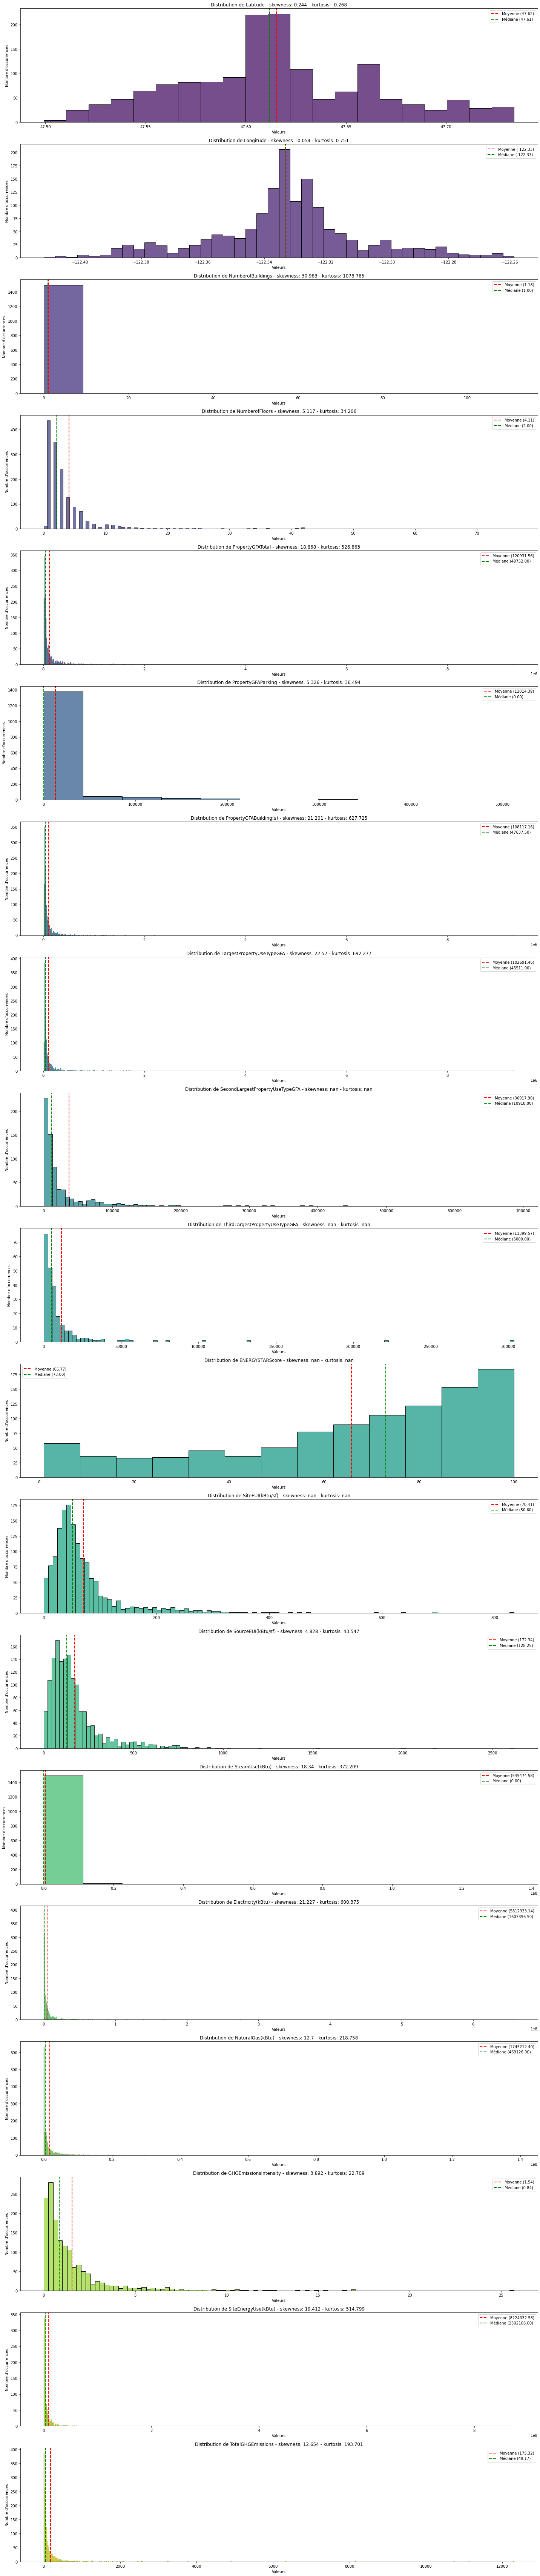

In [516]:
fct.distribution_histplot(df, show_skeness_kurtosis= True)

L'analyse des distributions des variables montre que la majorité des variables présentent une distribution asymétrique, souvent fortement biaisée à droite, indiquant que la plupart des bâtiments ont de faibles valeurs pour ces variables, avec quelques valeurs très élevées. Les variables telles que la consommation d'énergie et les émissions de GES sont particulièrement concentrées autour de faibles valeurs, avec une longue traîne de bâtiments consommant beaucoup plus d'énergie ou produisant plus d'émissions. D’après la visualisation des distributions, on observe que la moyenne est supérieure à la médiane pour chaque variable, ce qui confirme une distribution asymétrique positive (skewness). Cela signifie que la queue de la distribution s’étend davantage vers les valeurs élevées (à droite) et que quelques valeurs extrêmes peuvent tirer la moyenne vers le haut.

In [517]:
# Voici les variables énergitique:
cols_with_kBut = df.filter(like='(kBtu)').columns.tolist()
cols_with_kBut

['SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'SiteEnergyUse(kBtu)']

D’après la visualisation des distributions, on remarque que les variables énergétiques ‘SteamUse(kBtu)’, ‘Electricity(kBtu)’, ‘NaturalGas(kBtu)’ et ‘SiteEnergyUse(kBtu)’  et d'autres variables présentent des graphiques de distribution similaires. Cela suggère que ces variables pourraient bénéficier d’une transformation logarithmique pour normaliser leur distribution et potentiellement améliorer la performance de nos modèles prédictifs. Nous allons effectuer cette transformation dans la partie ‘Feature Engineering’ de notre analyse.

#### 6. 2. **Calcule des quartiles:**

Voici les deux bornes du calcul des quartiles :

Borne inférieure : Q1 - 1.5 x écart interquartile.

Borne supérieure : Q3 + 1.5 x écart interquartile.

Nous allons enrichir le DataFrame généré par la fonction describe:

In [518]:
describe_quartile = df.describe()
describe_quartile

Latitude    Longitude  NumberofBuildings  NumberofFloors  \
count  1504.000000  1504.000000        1504.000000     1504.000000   
mean     47.615178  -122.333146           1.182846        4.105053   
std       0.048931     0.024676           3.079855        6.323472   
min      47.499170  -122.411820           0.000000        0.000000   
25%      47.582900  -122.343428           1.000000        1.000000   
50%      47.611820  -122.333035           1.000000        2.000000   
75%      47.649043  -122.322178           1.000000        4.000000   
max      47.733870  -122.258640         111.000000       76.000000   

       PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count      1.504000e+03         1504.000000            1.504000e+03   
mean       1.209316e+05        12814.392287            1.081172e+05   
std        3.088468e+05        42854.340306            2.958794e+05   
min        1.128500e+04            0.000000            1.128500e+04   
25%        2.971400e+04            0.000000            2.871650e+04   
50%        4.975200e+04            0.000000            4.763750e+04   
75%        1.062458e+05            0.000000            9.626550e+04   
max        9.320156e+06       512608.000000            9.320156e+06   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count               1.504000e+03                       723.000000   
mean                1.026915e+05                     36917.896676   
std                 2.887343e+05                     69294.046009   
min                 7.583000e+03                         0.000000   
25%                 2.628025e+04                      4708.500000   
50%                 4.551100e+04                     10918.000000   
75%                 9.404625e+04                     32851.000000   
max                 9.320156e+06                    686750.000000   

       ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count                      243.000000      1027.000000       1503.000000   
mean                     11399.572840        65.769231         70.413174   
std                      27795.450693        28.232264         72.660424   
min                          0.000000         1.000000          0.000000   
25%                       1763.000000        49.000000         33.200001   
50%                       5000.000000        73.000000         50.599998   
75%                       9987.500000        89.000000         79.200001   
max                     303910.000000       100.000000        834.400024   

       SourceEUI(kBtu/sf)  SteamUse(kBtu)  Electricity(kBtu)  \
count         1504.000000    1.504000e+03       1.504000e+03   
mean           172.339029    5.454746e+05       5.812933e+06   
std            180.510319    5.781810e+06       2.129967e+07   
min              0.000000    0.000000e+00       0.000000e+00   
25%             74.574999    0.000000e+00       7.104272e+05   
50%            128.250000    0.000000e+00       1.603396e+06   
75%            199.100006    0.000000e+00       4.899381e+06   
max           2620.000000    1.349435e+08       6.570744e+08   

       NaturalGas(kBtu)  GHGEmissionsIntensity  SiteEnergyUse(kBtu)  \
count      1.504000e+03            1504.000000         1.504000e+03   
mean       1.745212e+06               1.544714         8.224033e+06   
std        6.093927e+06               2.170803         2.945140e+07   
min        0.000000e+00               0.000000         0.000000e+00   
25%        0.000000e+00               0.340000         1.217961e+06   
50%        4.691260e+05               0.840000         2.502106e+06   
75%        1.429443e+06               1.810000         6.858700e+06   
max        1.381912e+08              25.710000         8.739237e+08   

       TotalGHGEmissions  
count        1504.000000  
mean          175.316563  
std           657.908353  
min             0.000000  
25%            19.597500  
50%            49.175000  
75%           134.600000  

In [519]:
# Ajoutant les calculs des quartiles:
describe_quartile = fct.describe_quartile(df)
describe_quartile

Latitude    Longitude  NumberofBuildings  NumberofFloors  \
count             1504.000000  1504.000000        1504.000000     1504.000000   
mean                47.615178  -122.333146           1.182846        4.105053   
std                  0.048931     0.024676           3.079855        6.323472   
min                 47.499170  -122.411820           0.000000        0.000000   
25%                 47.582900  -122.343428           1.000000        1.000000   
50%                 47.611820  -122.333035           1.000000        2.000000   
75%                 47.649043  -122.322178           1.000000        4.000000   
max                 47.733870  -122.258640         111.000000       76.000000   
Q1                  47.582900  -122.343428           1.000000        1.000000   
Q3                  47.649043  -122.322178           1.000000        4.000000   
Borne_inferieure    47.483686  -122.375303           1.000000       -3.500000   
Borne_superieure    47.748256  -122.290303           1.000000        8.500000   

                  PropertyGFATotal  PropertyGFAParking  \
count                 1.504000e+03         1504.000000   
mean                  1.209316e+05        12814.392287   
std                   3.088468e+05        42854.340306   
min                   1.128500e+04            0.000000   
25%                   2.971400e+04            0.000000   
50%                   4.975200e+04            0.000000   
75%                   1.062458e+05            0.000000   
max                   9.320156e+06       512608.000000   
Q1                    2.971400e+04            0.000000   
Q3                    1.062458e+05            0.000000   
Borne_inferieure     -8.508362e+04            0.000000   
Borne_superieure      2.210434e+05            0.000000   

                  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count                       1.504000e+03               1.504000e+03   
mean                        1.081172e+05               1.026915e+05   
std                         2.958794e+05               2.887343e+05   
min                         1.128500e+04               7.583000e+03   
25%                         2.871650e+04               2.628025e+04   
50%                         4.763750e+04               4.551100e+04   
75%                         9.626550e+04               9.404625e+04   
max                         9.320156e+06               9.320156e+06   
Q1                          2.871650e+04               2.628025e+04   
Q3                          9.626550e+04               9.404625e+04   
Borne_inferieure           -7.260700e+04              -7.536875e+04   
Borne_superieure            1.975890e+05               1.956952e+05   

                  SecondLargestPropertyUseTypeGFA  \
count                                  723.000000   
mean                                 36917.896676   
std                                  69294.046009   
min                                      0.000000   
25%                                   4708.500000   
50%                                  10918.000000   
75%                                  32851.000000   
max                                 686750.000000   
Q1                                    4708.500000   
Q3                                   32851.000000   
Borne_inferieure                    -37505.250000   
Borne_superieure                     75064.750000   

                  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  \
count                                 243.000000      1027.000000   
mean                                11399.572840        65.769231   
std                                 27795.450693        28.232264   
min                                     0.000000         1.000000   
25%                                  1763.000000        49.000000   
50%                                  5000.000000        73.000000   
75%                                  9987.500000        89.000000   
max                                303910.0000

Nous remarquons que les valeurs de la borne inférieure sont inférieures à 0, alors que le minimum (min) est de 0 pour toutes les colonnes. Par conséquent, cette ligne n'est pas nécessaire pour notre analyse et peut être supprimée.

Pour la borne supérieure, un nombre considérable de produits dépassent cette limite. Nous pouvons compter le nombre de produits situés au-dessus de la borne supérieure interquartile pour chaque colonne.

In [520]:
# Suppression de la ligne 'Borne_inferieure'
describe_quartile = describe_quartile.drop('Borne_inferieure', axis = 0)

In [521]:
# Calculer le nombre de produits au-dessus de la borne supérieure interquartile pour chaque colonne
describe_quartile = fct.nombres_produits_sup_Borne_superieure(df, describe_quartile)
describe_quartile

Latitude    Longitude  NumberofBuildings  \
count                             1504.000000  1504.000000        1504.000000   
mean                                47.615178  -122.333146           1.182846   
std                                  0.048931     0.024676           3.079855   
min                                 47.499170  -122.411820           0.000000   
25%                                 47.582900  -122.343428           1.000000   
50%                                 47.611820  -122.333035           1.000000   
75%                                 47.649043  -122.322178           1.000000   
max                                 47.733870  -122.258640         111.000000   
Q1                                  47.582900  -122.343428           1.000000   
Q3                                  47.649043  -122.322178           1.000000   
Borne_superieure                    47.748256  -122.290303           1.000000   
Nb_produits_sup_Borne_superieure     0.000000    87.000000          48.000000   

                                  NumberofFloors  PropertyGFATotal  \
count                                1504.000000      1.504000e+03   
mean                                    4.105053      1.209316e+05   
std                                     6.323472      3.088468e+05   
min                                     0.000000      1.128500e+04   
25%                                     1.000000      2.971400e+04   
50%                                     2.000000      4.975200e+04   
75%                                     4.000000      1.062458e+05   
max                                    76.000000      9.320156e+06   
Q1                                      1.000000      2.971400e+04   
Q3                                      4.000000      1.062458e+05   
Borne_superieure                        8.500000      2.210434e+05   
Nb_produits_sup_Borne_superieure      127.000000      1.860000e+02   

                                  PropertyGFAParking  PropertyGFABuilding(s)  \
count                                    1504.000000            1.504000e+03   
mean                                    12814.392287            1.081172e+05   
std                                     42854.340306            2.958794e+05   
min                                         0.000000            1.128500e+04   
25%                                         0.000000            2.871650e+04   
50%                                         0.000000            4.763750e+04   
75%                                         0.000000            9.626550e+04   
max                                    512608.000000            9.320156e+06   
Q1                                          0.000000            2.871650e+04   
Q3                                          0.000000            9.626550e+04   
Borne_superieure                            0.000000            1.975890e+05   
Nb_produits_sup_Borne_superieure          290.000000            1.670000e+02   

                                  LargestPropertyUseTypeGFA  \
count                                          1.504000e+03   
mean                                           1.026915e+05   
std                                            2.887343e+05   
min                                            7.583000e+03   
25%                                            2.628025e+04   
50%                                            4.551100e+04   
75%                                            9.404625e+04   
max                                            9.320156e+06   
Q1                                             2.628025e+04   
Q3                                             9.404625e+04   
Borne_superieure                               1.956952e+05   
Nb_produits_sup_Borne_superieure               1.580000e+02   

                                  SecondLargestPropertyUseTypeGFA  \
count                                                  723.000000   
mean                                                 36917.896676   
std 

In [522]:
# Observer les valeurs extrêmes de chaque variable:
for col in describe_quartile.columns.tolist():
    print('----------------------')
    print(col, ':')
    print('----------------------')
    display(df.loc[df[col] > describe_quartile.loc['Borne_superieure', col],:].sort_values(col,ascending=False).head())
    print('---------------------------'*5)

----------------------
Latitude :
----------------------


Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, CouncilDistrictCode, Neighborhood, YearBuilt, ListOfAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType, ComplianceStatus, Latitude, Longitude, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SourceEUI(kBtu/sf), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), GHGEmissionsIntensity, SiteEnergyUse(kBtu), TotalGHGEmissions]
Index: []

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
Longitude :
----------------------


OSEBuildingID DataYear       BuildingType PrimaryPropertyType  \
102            176     2016  SPS-District K-12         K-12 School   
1495         50070     2016     NonResidential               Other   
1433         40031     2016     NonResidential      Medical Office   
1432         40028     2016     NonResidential           Warehouse   
741          20928     2016     NonResidential    Worship Facility   

                  PropertyName                    Address     City State  \
102         Emerson Elementary          9709 60th Ave. S.  Seattle    WA   
1495  Tennis Center Sand Point  7135 Sportsfield Drive NE  Seattle    WA   
1433             Sandpoint #25            6222 NE 74th St  Seattle    WA   
1432              Sandpoint #5           7561 63rd Ave NE  Seattle    WA   
741   St. Paul Church & School          10001 57th Ave. S  Seattle    WA   

      ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
102   98118.0                   2    SOUTHEAST      2001   
1495  98155.0                   4    NORTHEAST      2013   
1433  98115.0                   4    NORTHEAST      1960   
1432  98115.0                   4    NORTHEAST      1940   
741   98178.0                   2    SOUTHEAST      1954   

               ListOfAllPropertyUseTypes      LargestPropertyUseType  \
102                          K-12 School                 K-12 School   
1495                  Other - Recreation          Other - Recreation   
1433                      Medical Office              Medical Office   
1432  Non-Refrigerated Warehouse, Office  Non-Refrigerated Warehouse   
741                     Worship Facility            Worship Facility   

     SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
102                           NaN                         NaN   
1495                          NaN                         NaN   
1433                          NaN                         NaN   
1432                       Office                         NaN   
741                           NaN                         NaN   

                  ComplianceStatus  Latitude  Longitude  NumberofBuildings  \
102   Error - Correct Default Data  47.51482 -122.25864                  1   
1495                     Compliant  47.68109 -122.26180                  1   
1433                     Compliant  47.68240 -122.26223                  1   
1432                     Compliant  47.68454 -122.26235                  1   
741                      Compliant  47.51042 -122.26277                  1   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
102                3             78804                   0   
1495               1             72000                   0   
1433               0             30287                   0   
1432               0            384772                   0   
741                2             27876                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
102                    78804                      78804   
1495                   72000                      72000   
1433                   30287                      28050   
1432                  384772                     349953   
741                    27876                      44816   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
102                               NaN                             NaN   
1495                              NaN                             NaN   
1433                              NaN                             NaN   
1432                          63872.0                             NaN   
741                               NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
102              92.0         31.700001           76.900002             0.0   
1495              NaN         40.599998           97.900002             0.0   
1433             32.0         78.199997          217.399994          

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
NumberofBuildings :
----------------------


OSEBuildingID DataYear BuildingType PrimaryPropertyType  \
1479         49967     2016       Campus          University   
98             172     2016       Campus          University   
1011         23622     2016       Campus               Other   
154            261     2016       Campus        Large Office   
1216         25251     2016       Campus          University   

                                   PropertyName                     Address  \
1479  University of Washington - Seattle Campus   NE 45th St & Brooklyn Ave   
98                             SSCC MAIN CAMPUS            6000 16th Ave SW   
1011                  FT C15 Fishermen's Center  1900 West Nickerson Street   
154                                  South Park              1420 S Trenton   
1216                    5th Avenue Master Meter             3307 3rd Ave. W   

         City State  ZipCode CouncilDistrictCode           Neighborhood  \
1479  Seattle    WA  98105.0                   4              NORTHEAST   
98    Seattle    WA  98106.0                   1               DELRIDGE   
1011  Seattle    WA  98119.0                   7  MAGNOLIA / QUEEN ANNE   
154   Seattle    WA  98108.0                   1       GREATER DUWAMISH   
1216  Seattle    WA  98119.0                   7  MAGNOLIA / QUEEN ANNE   

     YearBuilt                          ListOfAllPropertyUseTypes  \
1479      1900                                 College/University   
98        1970                                 College/University   
1011      1955                                              Other   
154       1980  Laboratory, Non-Refrigerated Warehouse, Office...   
1216      1945                                 College/University   

     LargestPropertyUseType SecondLargestPropertyUseType  \
1479     College/University                          NaN   
98       College/University                          NaN   
1011                  Other                          NaN   
154                  Office                   Laboratory   
1216     College/University                          NaN   

     ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
1479                         NaN        Compliant  47.65644 -122.31041   
98                           NaN        Compliant  47.54700 -122.35307   
1011                         NaN        Compliant  47.65561 -122.38063   
154              Other - Utility        Compliant  47.52429 -122.31234   
1216                         NaN        Compliant  47.65019 -122.36173   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1479                111               0           9320156                   0   
98                   27               2            441071                   0   
1011                 23               1            260241                   0   
154                  14               2            334368               31874   
1216                 14               2            537000                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
1479                 9320156                    9320156   
98                    441071                     483000   
1011                  260241                     260241   
154                   302494                     240984   
1216                  537000                     533826   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
1479                              NaN                             NaN   
98                                NaN                             NaN   
1011                              NaN                             NaN   
154                           72963.0                         16766.0   
1216                              NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
1479              NaN         93.800003          246.600006      84985240.0   
98                NaN         79.3

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
NumberofFloors :
----------------------


OSEBuildingID DataYear        BuildingType PrimaryPropertyType  \
515           775     2016      NonResidential        Large Office   
216           357     2016  Nonresidential COS        Large Office   
270           422     2016      NonResidential        Large Office   
251           399     2016      NonResidential        Large Office   
212           353     2016      NonResidential        Large Office   

                       PropertyName             Address     City State  \
515          Columbia Center - 2015      701 5th Avenue  Seattle    WA   
216  Seattle Municipal Tower (2030)    700 Fifth Avenue  Seattle    WA   
270                Two Union Square       601 Union St.  Seattle    WA   
251               1201 Third Avenue        1201 3rd ave  Seattle    WA   
212                    Safeco Plaza  1001 Fourth Avenue  Seattle    WA   

     ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
515  98104.0                   7     DOWNTOWN      1985   
216  98104.0                   3     DOWNTOWN      1990   
270  98101.0                   7     DOWNTOWN      1989   
251  98101.0                   7     DOWNTOWN      1988   
212  98154.0                   7     DOWNTOWN      1969   

                             ListOfAllPropertyUseTypes LargestPropertyUseType  \
515                                    Office, Parking                 Office   
216                                    Office, Parking                 Office   
270                             Office, Other, Parking                 Office   
251                 Office, Other, Parking, Restaurant                 Office   
212  Financial Office, Food Sales, Office, Other, P...                 Office   

    SecondLargestPropertyUseType ThirdLargestPropertyUseType ComplianceStatus  \
515                      Parking                         NaN        Compliant   
216                      Parking                       Other        Compliant   
270                      Parking                       Other        Compliant   
251                      Parking                       Other        Compliant   
212                      Parking                       Other        Compliant   

     Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
515  47.60454 -122.33072                  1              76           1952220   
216  47.60501 -122.32988                  1              63           1354987   
270  47.61043 -122.33206                  1              56           1605578   
251  47.60723 -122.33611                  1              55           1400000   
212  47.60615 -122.33388                  1              49           1123435   

     PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
515              319400                 1632820                    1680937   
216              159600                 1195387                    1191115   
270              389860                 1215718                    1314475   
251              285000                 1115000                     994116   
212              368980                  754455                     808980   

     SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
515                         319368.0                             NaN   
216                         159599.0                         18656.0   
270                         389860.0                         30744.0   
251                         264481.0                        133598.0   
212                         232248.0                         30329.0   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
515             86.0         55.299999          167.300003           0.000   
216             89.0         50.400002          158.100006           0.000   
270             97.0         36.799999          110.300003      915654.875   
251             92.0         46.700001          140.199997     2179487.750   
212             89.0         5

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
PropertyGFATotal :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
1479         49967     2016          Campus          University   
905          22062     2016          Campus          University   
515            775     2016  NonResidential        Large Office   
571            828     2016  NonResidential            Hospital   
270            422     2016  NonResidential        Large Office   

                                   PropertyName                    Address  \
1479  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
905                               Entire Campus            901 12th Avenue   
515                      Columbia Center - 2015             701 5th Avenue   
571                          Swedish First Hill               747 Broadway   
270                            Two Union Square              601 Union St.   

         City State  ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
1479  Seattle    WA  98105.0                   4    NORTHEAST      1900   
905   Seattle    WA  98122.0                   3         EAST      1939   
515   Seattle    WA  98104.0                   7     DOWNTOWN      1985   
571   Seattle    WA  98122.0                   3         EAST      1994   
270   Seattle    WA  98101.0                   7     DOWNTOWN      1989   

                           ListOfAllPropertyUseTypes  \
1479                              College/University   
905                      College/University, Parking   
515                                  Office, Parking   
571   Hospital (General Medical & Surgical), Parking   
270                           Office, Other, Parking   

                     LargestPropertyUseType SecondLargestPropertyUseType  \
1479                     College/University                          NaN   
905                      College/University                      Parking   
515                                  Office                      Parking   
571   Hospital (General Medical & Surgical)                      Parking   
270                                  Office                      Parking   

     ThirdLargestPropertyUseType ComplianceStatus   Latitude   Longitude  \
1479                         NaN        Compliant  47.656440 -122.310410   
905                          NaN        Compliant  47.610650 -122.317110   
515                          NaN        Compliant  47.604540 -122.330720   
571                          NaN        Compliant  47.608951 -122.322402   
270                        Other        Compliant  47.610430 -122.332060   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1479                111               0           9320156                   0   
905                   1               2           2200000                   0   
515                   1              76           1952220              319400   
571                   7              14           1765970                   0   
270                   1              56           1605578              389860   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
1479                 9320156                    9320156   
905                  2200000                    1719643   
515                  1632820                    1680937   
571                  1765970                    1639334   
270                  1215718                    1314475   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
1479                              NaN                             NaN   
905                          318960.0                             NaN   
515                          319368.0                             NaN   
571                          441551.0                             NaN   
270                          389860.0                         30744.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
1479              NaN         93.800003          246.600006    8.498524

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
PropertyGFAParking :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
253           402     2016  NonResidential        Large Office   
284           438     2016  NonResidential      Medical Office   
270           422     2016  NonResidential        Large Office   
212           353     2016  NonResidential        Large Office   
155           263     2016  NonResidential               Other   

           PropertyName                Address     City State  ZipCode  \
253      US Bank Centre        1420 5th Avenue  Seattle    WA  98101.0   
284  1101 Madison Tower           1101 Madison  Seattle    WA  98104.0   
270    Two Union Square          601 Union St.  Seattle    WA  98101.0   
212        Safeco Plaza     1001 Fourth Avenue  Seattle    WA  98154.0   
155          Building 1  316 NE Thornton Place  Seattle    WA  98125.0   

    CouncilDistrictCode Neighborhood YearBuilt  \
253                   7     DOWNTOWN      1989   
284                   3         EAST      1992   
270                   7     DOWNTOWN      1989   
212                   7     DOWNTOWN      1969   
155                   5        NORTH      2008   

                             ListOfAllPropertyUseTypes LargestPropertyUseType  \
253  Financial Office, Office, Other, Parking, Rest...                 Office   
284                            Medical Office, Parking         Medical Office   
270                             Office, Other, Parking                 Office   
212  Financial Office, Food Sales, Office, Other, P...                 Office   
155  Fast Food Restaurant, Medical Office, Movie Th...                Parking   

    SecondLargestPropertyUseType ThirdLargestPropertyUseType ComplianceStatus  \
253                      Parking                       Other        Compliant   
284                      Parking                         NaN        Compliant   
270                      Parking                       Other        Compliant   
212                      Parking                       Other        Compliant   
155                Movie Theater              Medical Office        Compliant   

     Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
253  47.61054 -122.33466                  1              46           1536606   
284  47.60921 -122.32425                  1              14            690158   
270  47.61043 -122.33206                  1              56           1605578   
212  47.60615 -122.33388                  1              49           1123435   
155  47.70281 -122.32532                  1               6            419848   

     PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
253              512608                 1023998                    1002403   
284              407795                  282363                     270384   
270              389860                 1215718                    1314475   
212              368980                  754455                     808980   
155              335109                   84739                     335109   

     SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
253                         377046.0                         53116.0   
284                         270383.0                             NaN   
270                         389860.0                         30744.0   
212                         232248.0                         30329.0   
155                          65000.0                         13567.0   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
253             89.0         51.900002          157.300003           0.000   
284             58.0         78.199997          245.699997           0.000   
270             97.0         36.799999          110.300003      915654.875   
212             89.0         52.700001          149.000000           0.000   
155              NaN        107.800003          285.700012           0.000   

     Electricity(kBtu)  Natur

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
PropertyGFABuilding(s) :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
1479         49967     2016          Campus          University   
905          22062     2016          Campus          University   
571            828     2016  NonResidential            Hospital   
515            775     2016  NonResidential        Large Office   
451            659     2016  NonResidential        Large Office   

                                   PropertyName                    Address  \
1479  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
905                               Entire Campus            901 12th Avenue   
571                          Swedish First Hill               747 Broadway   
515                      Columbia Center - 2015             701 5th Avenue   
451                  Russell Investments Center               1301 2nd Ave   

         City State  ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
1479  Seattle    WA  98105.0                   4    NORTHEAST      1900   
905   Seattle    WA  98122.0                   3         EAST      1939   
571   Seattle    WA  98122.0                   3         EAST      1994   
515   Seattle    WA  98104.0                   7     DOWNTOWN      1985   
451   Seattle    WA  98101.0                   7     DOWNTOWN      2005   

                              ListOfAllPropertyUseTypes  \
1479                                 College/University   
905                         College/University, Parking   
571      Hospital (General Medical & Surgical), Parking   
515                                     Office, Parking   
451   Data Center, Financial Office, Office, Parking...   

                     LargestPropertyUseType SecondLargestPropertyUseType  \
1479                     College/University                          NaN   
905                      College/University                      Parking   
571   Hospital (General Medical & Surgical)                      Parking   
515                                  Office                      Parking   
451                                  Office                      Parking   

     ThirdLargestPropertyUseType ComplianceStatus   Latitude   Longitude  \
1479                         NaN        Compliant  47.656440 -122.310410   
905                          NaN        Compliant  47.610650 -122.317110   
571                          NaN        Compliant  47.608951 -122.322402   
515                          NaN        Compliant  47.604540 -122.330720   
451             Financial Office        Compliant  47.607400 -122.337770   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1479                111               0           9320156                   0   
905                   1               2           2200000                   0   
571                   7              14           1765970                   0   
515                   1              76           1952220              319400   
451                   1              42           1592914                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
1479                 9320156                    9320156   
905                  2200000                    1719643   
571                  1765970                    1639334   
515                  1632820                    1680937   
451                  1592914                     914832   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
1479                              NaN                             NaN   
905                          318960.0                             NaN   
571                          441551.0                             NaN   
515                          319368.0                             NaN   
451                          348788.0                        303910.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
1479              NaN         93.800003          246.

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
LargestPropertyUseTypeGFA :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
1479         49967     2016          Campus          University   
905          22062     2016          Campus          University   
515            775     2016  NonResidential        Large Office   
571            828     2016  NonResidential            Hospital   
147            245     2016  NonResidential               Other   

                                   PropertyName                    Address  \
1479  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
905                               Entire Campus            901 12th Avenue   
515                      Columbia Center - 2015             701 5th Avenue   
571                          Swedish First Hill               747 Broadway   
147                                 CenturyLink  800 Occidental Ave. South   

         City State  ZipCode CouncilDistrictCode      Neighborhood YearBuilt  \
1479  Seattle    WA  98105.0                   4         NORTHEAST      1900   
905   Seattle    WA  98122.0                   3              EAST      1939   
515   Seattle    WA  98104.0                   7          DOWNTOWN      1985   
571   Seattle    WA  98122.0                   3              EAST      1994   
147   Seattle    WA  98134.0                   2  GREATER DUWAMISH      1999   

                           ListOfAllPropertyUseTypes  \
1479                              College/University   
905                      College/University, Parking   
515                                  Office, Parking   
571   Hospital (General Medical & Surgical), Parking   
147   Other - Entertainment/Public Assembly, Parking   

                     LargestPropertyUseType SecondLargestPropertyUseType  \
1479                     College/University                          NaN   
905                      College/University                      Parking   
515                                  Office                      Parking   
571   Hospital (General Medical & Surgical)                      Parking   
147   Other - Entertainment/Public Assembly                      Parking   

     ThirdLargestPropertyUseType ComplianceStatus   Latitude   Longitude  \
1479                         NaN        Compliant  47.656440 -122.310410   
905                          NaN        Compliant  47.610650 -122.317110   
515                          NaN        Compliant  47.604540 -122.330720   
571                          NaN        Compliant  47.608951 -122.322402   
147                          NaN        Compliant  47.595440 -122.331590   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1479                111               0           9320156                   0   
905                   1               2           2200000                   0   
515                   1              76           1952220              319400   
571                   7              14           1765970                   0   
147                   1               6           1585960              327680   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
1479                 9320156                    9320156   
905                  2200000                    1719643   
515                  1632820                    1680937   
571                  1765970                    1639334   
147                  1258280                    1585960   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
1479                              NaN                             NaN   
905                          318960.0                             NaN   
515                          319368.0                             NaN   
571                          441551.0                             NaN   
147                               0.0                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
1479              NaN         93.800003  

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
SecondLargestPropertyUseTypeGFA :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
281           435     2016  NonResidential               Other   
571           828     2016  NonResidential            Hospital   
156           267     2016  NonResidential               Hotel   
270           422     2016  NonResidential        Large Office   
160           276     2016  NonResidential            Hospital   

                           PropertyName        Address     City State  \
281  Washington State Convention Center    705 Pike St  Seattle    WA   
571                  Swedish First Hill   747 Broadway  Seattle    WA   
156                 Grand Hyatt Seattle    721 Pine St  Seattle    WA   
270                    Two Union Square  601 Union St.  Seattle    WA   
160           Harborview Medical Center   325 9th Ave.  Seattle    WA   

     ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
281  98101.0                   7     DOWNTOWN      1990   
571  98122.0                   3         EAST      1994   
156  98101.0                   7     DOWNTOWN      1999   
270  98101.0                   7     DOWNTOWN      1989   
160  98104.0                   3         EAST      2000   

                           ListOfAllPropertyUseTypes  \
281                       Convention Center, Parking   
571   Hospital (General Medical & Surgical), Parking   
156  Hotel, Other, Parking, Restaurant, Retail Store   
270                           Office, Other, Parking   
160   Hospital (General Medical & Surgical), Parking   

                    LargestPropertyUseType SecondLargestPropertyUseType  \
281                      Convention Center                      Parking   
571  Hospital (General Medical & Surgical)                      Parking   
156                                  Hotel                      Parking   
270                                 Office                      Parking   
160  Hospital (General Medical & Surgical)                      Parking   

    ThirdLargestPropertyUseType ComplianceStatus   Latitude   Longitude  \
281                         NaN    Non-Compliant  47.611950 -122.331670   
571                         NaN        Compliant  47.608951 -122.322402   
156                  Restaurant        Compliant  47.612750 -122.333300   
270                       Other        Compliant  47.610430 -122.332060   
160                         NaN        Compliant  47.603990 -122.323770   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
281                  1               6           1400000                   0   
571                  7              14           1765970                   0   
156                  1               0            934292                   0   
270                  1              56           1605578              389860   
160                  9               8           1158691                   0   

     PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
281                 1400000                    1072000   
571                 1765970                    1639334   
156                  934292                     495536   
270                 1215718                    1314475   
160                 1158691                    1350182   

     SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
281                         686750.0                             NaN   
571                         441551.0                             NaN   
156                         438756.0                         49700.0   
270                         389860.0                         30744.0   
160                         387651.0                             NaN   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
281              NaN               NaN            0.000000    0.000000e+00   
571             54.0        177.899994          377.000000    1.349435e+08   
156              NaN        117.900002          272.899994    0.000000e+00   

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
ThirdLargestPropertyUseTypeGFA :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
451           659     2016  NonResidential        Large Office   
440           640     2016  NonResidential        Large Office   
251           399     2016  NonResidential        Large Office   
213           354     2016  NonResidential        Large Office   
520           758     2016  NonResidential               Other   

                   PropertyName              Address     City State  ZipCode  \
451  Russell Investments Center         1301 2nd Ave  Seattle    WA  98101.0   
440            Starbucks Center  2401 Utah Ave South  Seattle    WA  98134.0   
251           1201 Third Avenue         1201 3rd ave  Seattle    WA  98101.0   
213            Fourth & Madison    925 Fourth Avenue  Seattle    WA  98104.0   
520               Pacific Place      600 Pine Street  Seattle    WA  98101.0   

    CouncilDistrictCode      Neighborhood YearBuilt  \
451                   7          DOWNTOWN      2005   
440                   2  GREATER DUWAMISH      1912   
251                   7          DOWNTOWN      1988   
213                   7          DOWNTOWN      2002   
520                   7          DOWNTOWN      1999   

                             ListOfAllPropertyUseTypes LargestPropertyUseType  \
451  Data Center, Financial Office, Office, Parking...                 Office   
440   Non-Refrigerated Warehouse, Office, Retail Store                 Office   
251                 Office, Other, Parking, Restaurant                 Office   
213  Convenience Store without Gas Station, Data Ce...                 Office   
520  Office, Other - Entertainment/Public Assembly,...           Other - Mall   

              SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
451                                Parking            Financial Office   
440                           Retail Store  Non-Refrigerated Warehouse   
251                                Parking                       Other   
213                                Parking            Financial Office   
520  Other - Entertainment/Public Assembly                  Restaurant   

    ComplianceStatus  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
451        Compliant  47.60740 -122.33777                  1              42   
440        Compliant  47.58181 -122.33534                  0               6   
251        Compliant  47.60723 -122.33611                  1              55   
213        Compliant  47.60549 -122.33319                  1              37   
520        Compliant  47.61289 -122.33531                  1               0   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
451           1592914                   0                 1592914   
440           1380959                   0                 1380959   
251           1400000              285000                 1115000   
213           1052469              164420                  888049   
520            947987                   0                  947987   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
451                     914832                         348788.0   
440                    1000730                         281296.0   
251                     994116                         264481.0   
213                     765351                         185581.0   
520                     561684                         100000.0   

     ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
451                        303910.0             97.0         45.299999   
440                        220303.0             79.0         49.299999   
251                        133598.0             92.0         46.700001   
213                        103478.0             93.0         46.299999   
520                         80000.0              NaN         62.299999   

     SourceEUI(kBtu/sf)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
451          140.000000    9.864032e+05

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
ENERGYSTARScore :
----------------------


Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, CouncilDistrictCode, Neighborhood, YearBuilt, ListOfAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType, ComplianceStatus, Latitude, Longitude, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SourceEUI(kBtu/sf), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), GHGEmissionsIntensity, SiteEnergyUse(kBtu), TotalGHGEmissions]
Index: []

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
SiteEUI(kBtu/sf) :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
223            365     2016  NonResidential               Other   
647          19900     2016  NonResidential          Laboratory   
1457         49780     2016  NonResidential               Other   
514            753     2016  NonResidential               Other   
1447         49709     2016  NonResidential               Other   

                          PropertyName                  Address     City  \
223               UW Tower Data Center     4333 BROOKLYN AVE NE  Seattle   
647                  3000/3018 Western        3018 Western Ave.  Seattle   
1457      2020 Fifth Avenue Dat Center        2020 Fifth Avenue  Seattle   
514                     WestinBuilding             2001 6th Ave  Seattle   
1447  Seattle ProCure Management, LLC.  1570 North 115th Street  Seattle   

     State  ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
223     WA  98185.0                   4    NORTHEAST      1969   
647     WA  98121.0                   7     DOWNTOWN      1926   
1457    WA  98121.0                   7     DOWNTOWN      1975   
514     WA  98121.0                   7     DOWNTOWN      1981   
1447    WA  98013.0                   5    NORTHWEST      2012   

                ListOfAllPropertyUseTypes  \
223                           Data Center   
647                    Laboratory, Office   
1457                 Data Center, Parking   
514                   Data Center, Office   
1447  Urgent Care/Clinic/Other Outpatient   

                   LargestPropertyUseType SecondLargestPropertyUseType  \
223                           Data Center                          NaN   
647                            Laboratory                       Office   
1457                          Data Center                      Parking   
514                           Data Center                       Office   
1447  Urgent Care/Clinic/Other Outpatient                          NaN   

     ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
223                          NaN        Compliant  47.66060 -122.31512   
647                          NaN        Compliant  47.61763 -122.35507   
1457                         NaN        Compliant  47.61449 -122.33956   
514                          NaN        Compliant  47.61438 -122.33871   
1447                         NaN        Compliant  47.71286 -122.33635   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
223                   1               5             36000                   0   
647                   0               4             49249                   0   
1457                  1               7             90679               35120   
514                   1              33            429405                   0   
1447                  1               2             53575                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
223                    36000                      36000   
647                    49249                      40584   
1457                   55559                      60000   
514                   429405                     218997   
1447                   53575                      53575   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
223                               NaN                             NaN   
647                            7165.0                             NaN   
1457                          30700.0                             NaN   
514                          210409.0                             NaN   
1447                              NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
223              96.0        834.400024         2620.000000             0.0   
647               NaN        696.700012         1206.699951             0.0   
1457            100.0        694.700012         2181.300049          

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
SourceEUI(kBtu/sf) :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
223            365     2016  NonResidential               Other   
1457         49780     2016  NonResidential               Other   
514            753     2016  NonResidential               Other   
1447         49709     2016  NonResidential               Other   
647          19900     2016  NonResidential          Laboratory   

                          PropertyName                  Address     City  \
223               UW Tower Data Center     4333 BROOKLYN AVE NE  Seattle   
1457      2020 Fifth Avenue Dat Center        2020 Fifth Avenue  Seattle   
514                     WestinBuilding             2001 6th Ave  Seattle   
1447  Seattle ProCure Management, LLC.  1570 North 115th Street  Seattle   
647                  3000/3018 Western        3018 Western Ave.  Seattle   

     State  ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
223     WA  98185.0                   4    NORTHEAST      1969   
1457    WA  98121.0                   7     DOWNTOWN      1975   
514     WA  98121.0                   7     DOWNTOWN      1981   
1447    WA  98013.0                   5    NORTHWEST      2012   
647     WA  98121.0                   7     DOWNTOWN      1926   

                ListOfAllPropertyUseTypes  \
223                           Data Center   
1457                 Data Center, Parking   
514                   Data Center, Office   
1447  Urgent Care/Clinic/Other Outpatient   
647                    Laboratory, Office   

                   LargestPropertyUseType SecondLargestPropertyUseType  \
223                           Data Center                          NaN   
1457                          Data Center                      Parking   
514                           Data Center                       Office   
1447  Urgent Care/Clinic/Other Outpatient                          NaN   
647                            Laboratory                       Office   

     ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
223                          NaN        Compliant  47.66060 -122.31512   
1457                         NaN        Compliant  47.61449 -122.33956   
514                          NaN        Compliant  47.61438 -122.33871   
1447                         NaN        Compliant  47.71286 -122.33635   
647                          NaN        Compliant  47.61763 -122.35507   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
223                   1               5             36000                   0   
1457                  1               7             90679               35120   
514                   1              33            429405                   0   
1447                  1               2             53575                   0   
647                   0               4             49249                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
223                    36000                      36000   
1457                   55559                      60000   
514                   429405                     218997   
1447                   53575                      53575   
647                    49249                      40584   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
223                               NaN                             NaN   
1457                          30700.0                             NaN   
514                          210409.0                             NaN   
1447                              NaN                             NaN   
647                            7165.0                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
223              96.0        834.400024         2620.000000             0.0   
1457            100.0        694.700012         2181.300049             0.0   
514              98.0        639.700012         2007.900024          

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
SteamUse(kBtu) :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
571            828     2016  NonResidential            Hospital   
160            276     2016  NonResidential            Hospital   
1479         49967     2016          Campus          University   
1475         49940     2016  NonResidential            Hospital   
1440         45927     2016  NonResidential          Laboratory   

                                   PropertyName                    Address  \
571                          Swedish First Hill               747 Broadway   
160                   Harborview Medical Center               325 9th Ave.   
1479  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
1475       Virginia Mason Medical Center - 2149             925 Seneca St.   
1440            Reasearch and Training Building           300 Ninth Avenue   

         City State  ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
571   Seattle    WA  98122.0                   3         EAST      1994   
160   Seattle    WA  98104.0                   3         EAST      2000   
1479  Seattle    WA  98105.0                   4    NORTHEAST      1900   
1475  Seattle    WA  98101.0                   3         EAST      1920   
1440  Seattle    WA  98104.0                   3         EAST      2000   

                           ListOfAllPropertyUseTypes  \
571   Hospital (General Medical & Surgical), Parking   
160   Hospital (General Medical & Surgical), Parking   
1479                              College/University   
1475           Hospital (General Medical & Surgical)   
1440                                      Laboratory   

                     LargestPropertyUseType SecondLargestPropertyUseType  \
571   Hospital (General Medical & Surgical)                      Parking   
160   Hospital (General Medical & Surgical)                      Parking   
1479                     College/University                          NaN   
1475  Hospital (General Medical & Surgical)                          NaN   
1440                             Laboratory                          NaN   

     ThirdLargestPropertyUseType ComplianceStatus   Latitude   Longitude  \
571                          NaN        Compliant  47.608951 -122.322402   
160                          NaN        Compliant  47.603990 -122.323770   
1479                         NaN        Compliant  47.656440 -122.310410   
1475                         NaN        Compliant  47.609860 -122.327740   
1440                         NaN        Compliant  47.604270 -122.323110   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
571                   7              14           1765970                   0   
160                   9               8           1158691                   0   
1479                111               0           9320156                   0   
1475                  1               8            374466                   0   
1440                  1               8            178000                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
571                  1765970                    1639334   
160                  1158691                    1350182   
1479                 9320156                    9320156   
1475                  374466                    1010135   
1440                  178000                     181930   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
571                          441551.0                             NaN   
160                          387651.0                             NaN   
1479                              NaN                             NaN   
1475                              NaN                             NaN   
1440                              NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
571              54.0        177.899994          377.000000     1349434

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
Electricity(kBtu) :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
1479         49967     2016          Campus          University   
514            753     2016  NonResidential               Other   
160            276     2016  NonResidential            Hospital   
571            828     2016  NonResidential            Hospital   
116            198     2016  NonResidential            Hospital   

                                   PropertyName                    Address  \
1479  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
514                              WestinBuilding               2001 6th Ave   
160                   Harborview Medical Center               325 9th Ave.   
571                          Swedish First Hill               747 Broadway   
116     Seattle Children's Hospital Main Campus     4800 Sand Point Way NE   

         City State  ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
1479  Seattle    WA  98105.0                   4    NORTHEAST      1900   
514   Seattle    WA  98121.0                   7     DOWNTOWN      1981   
160   Seattle    WA  98104.0                   3         EAST      2000   
571   Seattle    WA  98122.0                   3         EAST      1994   
116   Seattle    WA  98105.0                   4    NORTHEAST      1953   

                           ListOfAllPropertyUseTypes  \
1479                              College/University   
514                              Data Center, Office   
160   Hospital (General Medical & Surgical), Parking   
571   Hospital (General Medical & Surgical), Parking   
116            Hospital (General Medical & Surgical)   

                     LargestPropertyUseType SecondLargestPropertyUseType  \
1479                     College/University                          NaN   
514                             Data Center                       Office   
160   Hospital (General Medical & Surgical)                      Parking   
571   Hospital (General Medical & Surgical)                      Parking   
116   Hospital (General Medical & Surgical)                          NaN   

     ThirdLargestPropertyUseType ComplianceStatus   Latitude   Longitude  \
1479                         NaN        Compliant  47.656440 -122.310410   
514                          NaN        Compliant  47.614380 -122.338710   
160                          NaN        Compliant  47.603990 -122.323770   
571                          NaN        Compliant  47.608951 -122.322402   
116                          NaN        Compliant  47.662310 -122.281460   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1479                111               0           9320156                   0   
514                   1              33            429405                   0   
160                   9               8           1158691                   0   
571                   7              14           1765970                   0   
116                   6              10            879000                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
1479                 9320156                    9320156   
514                   429405                     218997   
160                  1158691                    1350182   
571                  1765970                    1639334   
116                   879000                     879000   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
1479                              NaN                             NaN   
514                          210409.0                             NaN   
160                          387651.0                             NaN   
571                          441551.0                             NaN   
116                               NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
1479              NaN         93.800003          246.600006      849852

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
NaturalGas(kBtu) :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
116            198     2016  NonResidential            Hospital   
157            268     2016  NonResidential            Hospital   
1216         25251     2016          Campus          University   
315            477     2016          Campus               Other   
973          23071     2016  NonResidential            Hospital   

                                 PropertyName  \
116   Seattle Children's Hospital Main Campus   
157                       Swedish Cherry Hill   
1216                  5th Avenue Master Meter   
315               Weintraub/Hutchinson/Thomas   
973                 Main Hospital - All Wings   

                              Address     City State  ZipCode  \
116            4800 Sand Point Way NE  Seattle    WA  98105.0   
157                      500 17th Ave  Seattle    WA  98122.0   
1216                  3307 3rd Ave. W  Seattle    WA  98119.0   
315               1100 Fairview Ave N  Seattle    WA  98109.0   
973   Facilities Management MS: B-120  Seattle    WA  98133.0   

     CouncilDistrictCode           Neighborhood YearBuilt  \
116                    4              NORTHEAST      1953   
157                    3                CENTRAL      1990   
1216                   7  MAGNOLIA / QUEEN ANNE      1945   
315                    3             LAKE UNION      1997   
973                    5              NORTHWEST      1966   

                           ListOfAllPropertyUseTypes  \
116            Hospital (General Medical & Surgical)   
157   Hospital (General Medical & Surgical), Parking   
1216                              College/University   
315                                   Other, Parking   
973   Hospital (General Medical & Surgical), Parking   

                     LargestPropertyUseType SecondLargestPropertyUseType  \
116   Hospital (General Medical & Surgical)                          NaN   
157   Hospital (General Medical & Surgical)                      Parking   
1216                     College/University                          NaN   
315                                   Other                      Parking   
973   Hospital (General Medical & Surgical)                      Parking   

     ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
116                          NaN        Compliant  47.66231 -122.28146   
157                          NaN        Compliant  47.60705 -122.30966   
1216                         NaN        Compliant  47.65019 -122.36173   
315                          NaN        Compliant  47.62855 -122.33035   
973                          NaN        Compliant  47.71425 -122.33689   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
116                   6              10            879000                   0   
157                   6               5            597519                   0   
1216                 14               2            537000                   0   
315                   1               5            535947                   0   
973                   8               1            415632                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
116                   879000                     879000   
157                   597519                     601615   
1216                  537000                     533826   
315                   535947                     535947   
973                   415632                     483520   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
116                               NaN                             NaN   
157                           48607.0                             NaN   
1216                              NaN                             NaN   
315                          103983.0                             NaN   
973                          266833.0                             NaN   

      ENERGYSTARScore  SiteEU

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
GHGEmissionsIntensity :
----------------------


OSEBuildingID DataYear        BuildingType PrimaryPropertyType  \
647          19900     2016      NonResidential          Laboratory   
1509         50224     2016  Nonresidential COS               Other   
1502         50208     2016  Nonresidential COS               Other   
1475         49940     2016      NonResidential            Hospital   
1007         23503     2016      NonResidential          Restaurant   

                              PropertyName             Address     City State  \
647                      3000/3018 Western   3018 Western Ave.  Seattle    WA   
1509                       Queen Anne Pool      1920 1st Ave W  Seattle    WA   
1502                          Ballard Pool     1471 NW 67th St  Seattle    WA   
1475  Virginia Mason Medical Center - 2149      925 Seneca St.  Seattle    WA   
1007      Salty's Waterfront Seafood Grill  1936 Harbor Ave SW  Seattle    WA   

      ZipCode CouncilDistrictCode           Neighborhood YearBuilt  \
647   98121.0                   7               DOWNTOWN      1926   
1509      NaN                   7  MAGNOLIA / QUEEN ANNE      1974   
1502      NaN                   6                BALLARD      1972   
1475  98101.0                   3                   EAST      1920   
1007  98126.0                   1              SOUTHWEST      1902   

                              ListOfAllPropertyUseTypes  \
647                                  Laboratory, Office   
1509  Fitness Center/Health Club/Gym, Other - Recrea...   
1502  Fitness Center/Health Club/Gym, Office, Other ...   
1475              Hospital (General Medical & Surgical)   
1007                                 Office, Restaurant   

                     LargestPropertyUseType    SecondLargestPropertyUseType  \
647                              Laboratory                          Office   
1509                     Other - Recreation  Fitness Center/Health Club/Gym   
1502                     Other - Recreation  Fitness Center/Health Club/Gym   
1475  Hospital (General Medical & Surgical)                             NaN   
1007                             Restaurant                          Office   

     ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
647                          NaN        Compliant  47.61763 -122.35507   
1509               Swimming Pool        Compliant  47.63644 -122.35784   
1502                      Office        Compliant  47.67734 -122.37624   
1475                         NaN        Compliant  47.60986 -122.32774   
1007                         NaN        Compliant  47.58654 -122.37644   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
647                   0               4             49249                   0   
1509                  1               1             13157                   0   
1502                  1               1             12769                   0   
1475                  1               8            374466                   0   
1007                  1               2             20398                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
647                    49249                      40584   
1509                   13157                       7583   
1502                   12769                      10912   
1475                  374466                    1010135   
1007                   20398                      19232   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
647                            7165.0                             NaN   
1509                           5574.0                             0.0   
1502                           1670.0                           187.0   
1475                              NaN                             NaN   
1007                           1166.0                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
647               NaN        696.70

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
SiteEnergyUse(kBtu) :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
1479         49967     2016          Campus          University   
160            276     2016  NonResidential            Hospital   
571            828     2016  NonResidential            Hospital   
514            753     2016  NonResidential               Other   
116            198     2016  NonResidential            Hospital   

                                   PropertyName                    Address  \
1479  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
160                   Harborview Medical Center               325 9th Ave.   
571                          Swedish First Hill               747 Broadway   
514                              WestinBuilding               2001 6th Ave   
116     Seattle Children's Hospital Main Campus     4800 Sand Point Way NE   

         City State  ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
1479  Seattle    WA  98105.0                   4    NORTHEAST      1900   
160   Seattle    WA  98104.0                   3         EAST      2000   
571   Seattle    WA  98122.0                   3         EAST      1994   
514   Seattle    WA  98121.0                   7     DOWNTOWN      1981   
116   Seattle    WA  98105.0                   4    NORTHEAST      1953   

                           ListOfAllPropertyUseTypes  \
1479                              College/University   
160   Hospital (General Medical & Surgical), Parking   
571   Hospital (General Medical & Surgical), Parking   
514                              Data Center, Office   
116            Hospital (General Medical & Surgical)   

                     LargestPropertyUseType SecondLargestPropertyUseType  \
1479                     College/University                          NaN   
160   Hospital (General Medical & Surgical)                      Parking   
571   Hospital (General Medical & Surgical)                      Parking   
514                             Data Center                       Office   
116   Hospital (General Medical & Surgical)                          NaN   

     ThirdLargestPropertyUseType ComplianceStatus   Latitude   Longitude  \
1479                         NaN        Compliant  47.656440 -122.310410   
160                          NaN        Compliant  47.603990 -122.323770   
571                          NaN        Compliant  47.608951 -122.322402   
514                          NaN        Compliant  47.614380 -122.338710   
116                          NaN        Compliant  47.662310 -122.281460   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1479                111               0           9320156                   0   
160                   9               8           1158691                   0   
571                   7              14           1765970                   0   
514                   1              33            429405                   0   
116                   6              10            879000                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
1479                 9320156                    9320156   
160                  1158691                    1350182   
571                  1765970                    1639334   
514                   429405                     218997   
116                   879000                     879000   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
1479                              NaN                             NaN   
160                          387651.0                             NaN   
571                          441551.0                             NaN   
514                          210409.0                             NaN   
116                               NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
1479              NaN         93.800003          246.600006      849852

---------------------------------------------------------------------------------------------------------------------------------------
----------------------
TotalGHGEmissions :
----------------------


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
571            828     2016  NonResidential            Hospital   
1479         49967     2016          Campus          University   
160            276     2016  NonResidential            Hospital   
116            198     2016  NonResidential            Hospital   
1475         49940     2016  NonResidential            Hospital   

                                   PropertyName                    Address  \
571                          Swedish First Hill               747 Broadway   
1479  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
160                   Harborview Medical Center               325 9th Ave.   
116     Seattle Children's Hospital Main Campus     4800 Sand Point Way NE   
1475       Virginia Mason Medical Center - 2149             925 Seneca St.   

         City State  ZipCode CouncilDistrictCode Neighborhood YearBuilt  \
571   Seattle    WA  98122.0                   3         EAST      1994   
1479  Seattle    WA  98105.0                   4    NORTHEAST      1900   
160   Seattle    WA  98104.0                   3         EAST      2000   
116   Seattle    WA  98105.0                   4    NORTHEAST      1953   
1475  Seattle    WA  98101.0                   3         EAST      1920   

                           ListOfAllPropertyUseTypes  \
571   Hospital (General Medical & Surgical), Parking   
1479                              College/University   
160   Hospital (General Medical & Surgical), Parking   
116            Hospital (General Medical & Surgical)   
1475           Hospital (General Medical & Surgical)   

                     LargestPropertyUseType SecondLargestPropertyUseType  \
571   Hospital (General Medical & Surgical)                      Parking   
1479                     College/University                          NaN   
160   Hospital (General Medical & Surgical)                      Parking   
116   Hospital (General Medical & Surgical)                          NaN   
1475  Hospital (General Medical & Surgical)                          NaN   

     ThirdLargestPropertyUseType ComplianceStatus   Latitude   Longitude  \
571                          NaN        Compliant  47.608951 -122.322402   
1479                         NaN        Compliant  47.656440 -122.310410   
160                          NaN        Compliant  47.603990 -122.323770   
116                          NaN        Compliant  47.662310 -122.281460   
1475                         NaN        Compliant  47.609860 -122.327740   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
571                   7              14           1765970                   0   
1479                111               0           9320156                   0   
160                   9               8           1158691                   0   
116                   6              10            879000                   0   
1475                  1               8            374466                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
571                  1765970                    1639334   
1479                 9320156                    9320156   
160                  1158691                    1350182   
116                   879000                     879000   
1475                  374466                    1010135   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
571                          441551.0                             NaN   
1479                              NaN                             NaN   
160                          387651.0                             NaN   
116                               NaN                             NaN   
1475                              NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
571              54.0        177.899994          377.000000     1349434

---------------------------------------------------------------------------------------------------------------------------------------


Coclusions: Apres avoir identifier ces valeurs extremes, pour mon analyse nous décédons de les concerver dans la suite.

## **7. identifier les valeurs manquantes:**

7. 1. **Afficher le taux de remplissage en forme de tableau:**

In [523]:
fct.taux_de_Remplissage_tableau(df, affichage_all = True)

Colonne  Taux_de_Remplissage
0                     OSEBuildingID             100.0000
1                  ComplianceStatus             100.0000
2               SiteEnergyUse(kBtu)             100.0000
3             GHGEmissionsIntensity             100.0000
4                  NaturalGas(kBtu)             100.0000
5                 Electricity(kBtu)             100.0000
6                    SteamUse(kBtu)             100.0000
7                SourceEUI(kBtu/sf)             100.0000
8         LargestPropertyUseTypeGFA             100.0000
9            PropertyGFABuilding(s)             100.0000
10               PropertyGFAParking             100.0000
11                 PropertyGFATotal             100.0000
12                   NumberofFloors             100.0000
13                NumberofBuildings             100.0000
14                         DataYear             100.0000
15                         Latitude             100.0000
16                        Longitude             100.0000
17                TotalGHGEmissions             100.0000
18                     BuildingType             100.0000
19                     PropertyName             100.0000
20                          Address             100.0000
21                             City             100.0000
22                            State             100.0000
23              PrimaryPropertyType             100.0000
24              CouncilDistrictCode             100.0000
25                     Neighborhood             100.0000
26                        YearBuilt             100.0000
27        ListOfAllPropertyUseTypes             100.0000
28           LargestPropertyUseType             100.0000
29                 SiteEUI(kBtu/sf)              99.9335
30                          ZipCode              99.2021
31                  ENERGYSTARScore              68.2846
32     SecondLargestPropertyUseType              48.0718
33  SecondLargestPropertyUseTypeGFA              48.0718
34      ThirdLargestPropertyUseType              16.1569
35   ThirdLargestPropertyUseTypeGFA              16.1569

Voici les colonnes avec le taux de remplissage < 100%:

In [524]:
filling_rate = (1 - df.isnull().mean()) * 100
filling_rate = filling_rate[filling_rate < 100]
list_colonne_missing = filling_rate.index.tolist()
list_colonne_missing

['ZipCode',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)']

7. 2. **Choix de méthode de traitement:**

- **Visualisation de la distribution du dataframe 'df' avant imputation:**

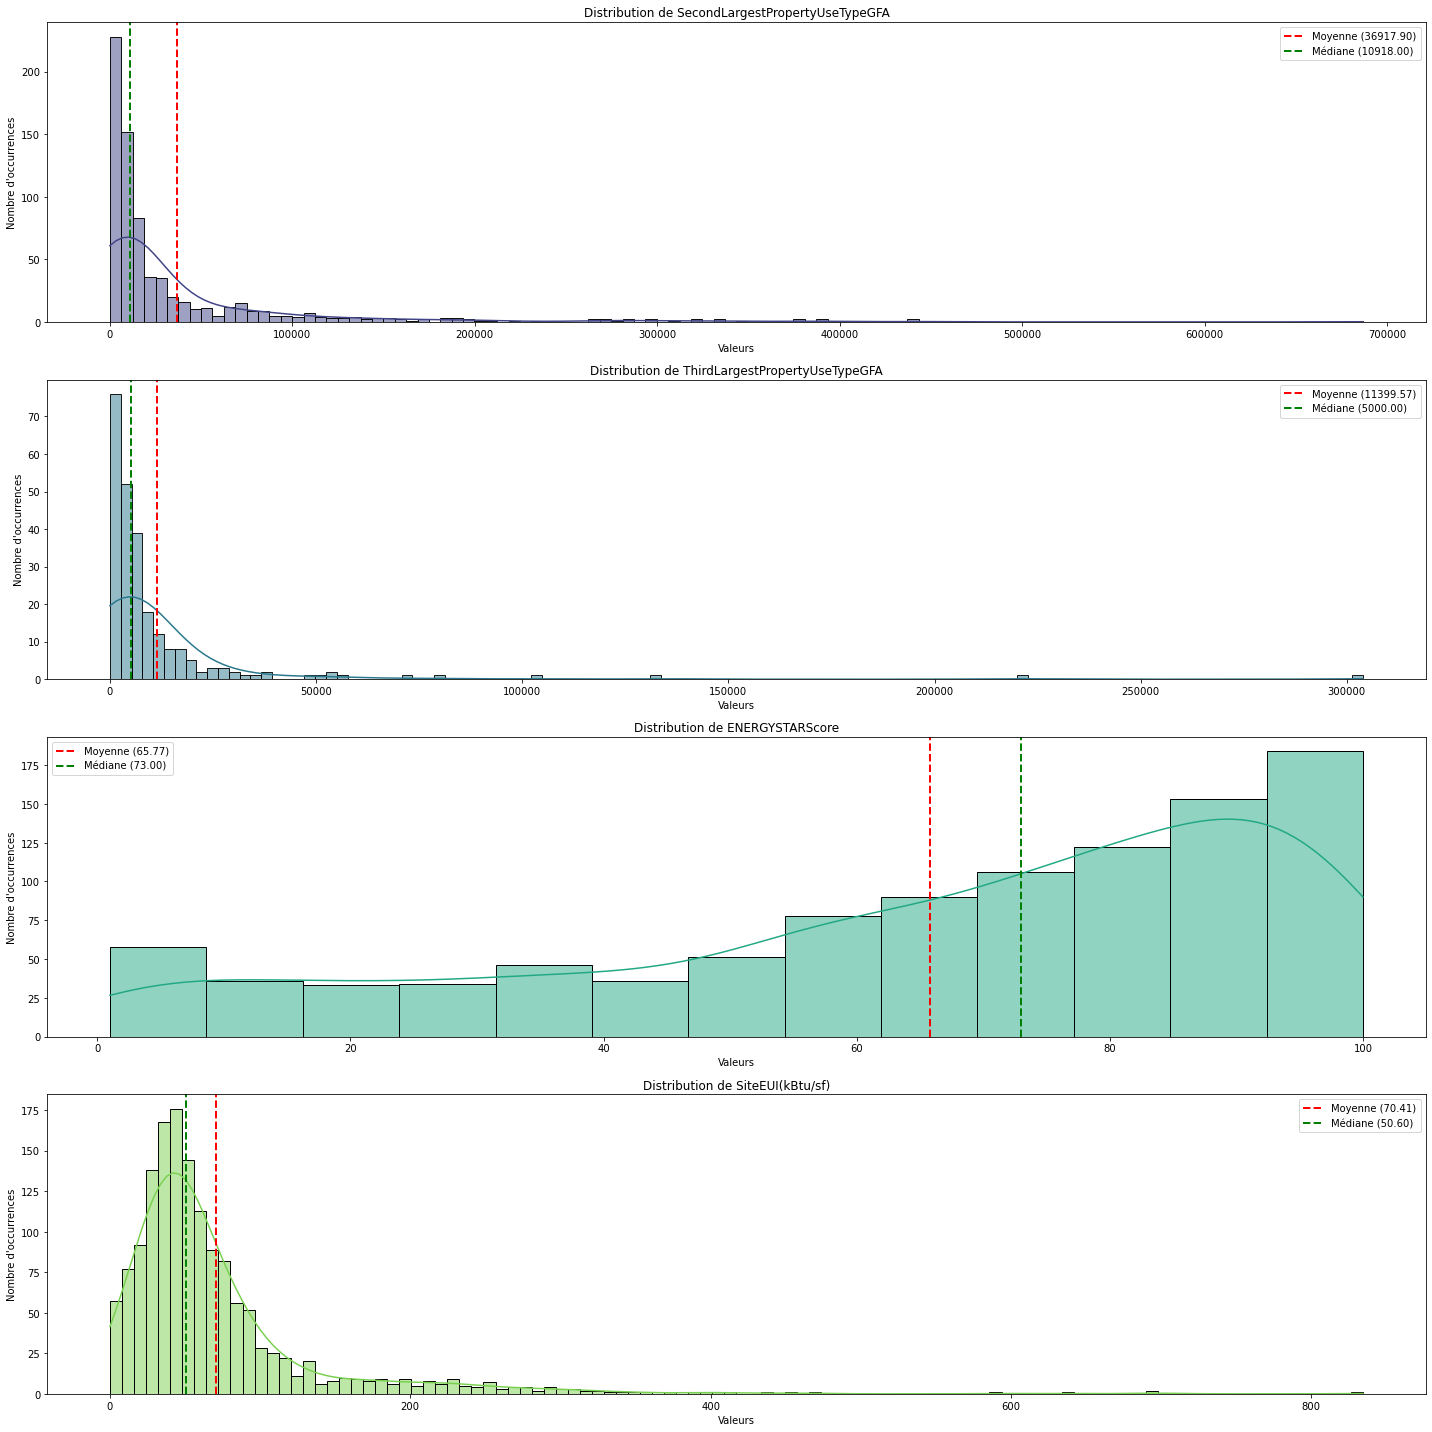

In [525]:
fct.distribution_histplot(df[list_colonne_missing], kde=True)

7. 2. 1. **Approche métier:**

Affichage des valeurs manquantes de la colonne ‘ZipCode’, nous allons utiliser la colonne ‘Address’ pour les compléter:

In [526]:
df[['Address', 'ZipCode']]
df[df['ZipCode'].isna()][['Address', 'ZipCode']]

Address ZipCode
1498  405 MLK Jr Way S     NaN
1499  8729 15th Ave NW     NaN
1500  2806 NE 127th St     NaN
1501  6020 28th ave NW     NaN
1502   1471 NW 67th St     NaN
1503       1403 w howe     NaN
1504   1400 E Galer St     NaN
1505    4420 S Genesee     NaN
1506  6920 34th Ave SW     NaN
1507  1600 S Dakota St     NaN
1508     719 8th Ave S     NaN
1509    1920 1st Ave W     NaN

En vérifiant sur internet, voici ce que j'ai pu trouver grâce aux données de la colonne 'Address' :

| Address | ZipCode |
| --- | --- |
| 405 MLK Jr Way S | 981781 |
| 8729 15th Ave NW | Information non disponible |
| 2806 NE 127th St | 981252 |
| 6020 28th ave NW | 981073 |
| 1471 NW 67th St | 981174 |
| 1403 w howe | Information non disponible |
| 1400 E Galer St | 981125 |
| 4420 S Genesee | 981186 |
| 6920 34th Ave SW | 981267 |
| 1600 S Dakota St | 981087 |
| 719 8th Ave S | Information non disponible |
| 1920 1st Ave W | Information non disponible |

Nous allons imputer les valeurs du ZipCode trouvées, et supprimer les lignes où il est marqué 'Information non disponible':

In [527]:
# Vos valeurs de remplacement
replacement_values = {
    'Address': ['405 MLK Jr Way S', '8729 15th Ave NW', '2806 NE 127th St', '6020 28th ave NW', '1471 NW 67th St', '1403 w howe', '1400 E Galer St', '4420 S Genesee', '6920 34th Ave SW', '1600 S Dakota St', '719 8th Ave S', '1920 1st Ave W'],
    'ZipCode': ['981781', '000000', '981252', '981073', '981174', '000000', '981125', '981186', '981267', '981087', '000000', '000000']
}

# Transformer le dictionnaire en un autre format de dictionnaire
replacement_dict = dict(zip(replacement_values['Address'], replacement_values['ZipCode']))

# Utiliser le dictionnaire pour remplacer les valeurs NaN dans df['ZipCode']
df['ZipCode'] = df['ZipCode'].fillna(df['Address'].map(replacement_dict))

# # Supprimer les lignes restantes avec des valeurs NaN dans la colonne 'ZipCode'
# df.dropna(subset=['ZipCode'], inplace=True)

Après l’imputation de la colonne ZipCode, la variable ‘Address’ n’a pas d’importance, donc on pourrait l’ajouter à la liste list_to_drop_after_FE:

In [528]:
list_to_drop_after_FE_EnergyUse.append('Address')
list_to_drop_after_FE_GHGEmissions.append('Address')
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)


['DataYear', 'City', 'State', 'Address']
['DataYear', 'City', 'State', 'Address']


Voici les variables restantes à traiter:

In [529]:
fct.taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                 SiteEUI(kBtu/sf)              99.9335
1                  ENERGYSTARScore              68.2846
2     SecondLargestPropertyUseType              48.0718
3  SecondLargestPropertyUseTypeGFA              48.0718
4      ThirdLargestPropertyUseType              16.1569
5   ThirdLargestPropertyUseTypeGFA              16.1569

Nous avions confirmé précédemment cette relation :
’PropertyGFATotal’=’LargestPropertyUseTypeGFA’+’SecondLargestPropertyUseTypeGFA’+’ThirdLargestPropertyUseTypeGFA’

Donc, ces 3 colonnes numériques ‘LargestPropertyUseTypeGFA’, ‘SecondLargestPropertyUseTypeGFA’ et ‘ThirdLargestPropertyUseTypeGFA’ sont liées, les colonnes catégorielles ‘LargestPropertyUseType’, ‘SecondLargestPropertyUseType’ et ‘ThirdLargestPropertyUseType’ sont également liées.

La colonne ‘ListOfAllPropertyUseTypes’ contient toutes les informations concernant ces 3 colonnes catégorielles ‘LargestPropertyUseType’, ‘SecondLargestPropertyUseType’ et ‘ThirdLargestPropertyUseType’.
Étant donné que la colonne ‘LargestPropertyUseType’ est complète, nous allons utiliser la colonne ‘ListOfAllPropertyUseTypes’ pour compléter ‘SecondLargestPropertyUseType’ et ‘ThirdLargestPropertyUseType’. Pour ce faire, nous pouvons extraire les types de propriété de ‘ListOfAllPropertyUseTypes’ et les utiliser pour remplir les valeurs manquantes dans ‘SecondLargestPropertyUseType’ et ‘ThirdLargestPropertyUseType’.
La valeur non_manquante’ sera utilisé pour remplir la valeur manquante dans ‘SecondLargestPropertyUseType’ ou ‘ThirdLargestPropertyUseType’:

In [530]:
# Convertir la colonne 'ListOfAllPropertyUseTypes' en une liste de types de propriété
df['ListOfAllPropertyUseTypes'] = df['ListOfAllPropertyUseTypes'].str.split(',')

# Définir une fonction pour extraire le deuxième et le troisième type de propriété
def extract_property_types(types_list, position):
    try:
        return types_list[position]
    except IndexError:
        return 'non_manquante'

# Utiliser la fonction pour remplir les valeurs manquantes dans 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseType'
df['SecondLargestPropertyUseType'].fillna(df['ListOfAllPropertyUseTypes'].apply(lambda x: extract_property_types(x, 1)), inplace=True)
df['ThirdLargestPropertyUseType'].fillna(df['ListOfAllPropertyUseTypes'].apply(lambda x: extract_property_types(x, 2)), inplace=True)


À partir de la colonne ‘ListOfAllPropertyUseTypes’, nous pourrions créer une nouvelle variable qui donne le nombre total d’usages du bâtiment. Nous pourrions appeler cette nouvelle variable ‘TotalUseTypeNumber’:

In [531]:
# Appliquer la fonction len à chaque élément de la colonne 'ListOfAllPropertyUseTypes'
df['TotalUseTypeNumber'] = df['ListOfAllPropertyUseTypes'].apply(len)


In [532]:
df[['TotalUseTypeNumber', 'ListOfAllPropertyUseTypes']]

TotalUseTypeNumber                          ListOfAllPropertyUseTypes
0                      1                                            [Hotel]
1                      3                     [Hotel,  Parking,  Restaurant]
2                      1                                            [Hotel]
3                      1                                            [Hotel]
4                      3                  [Hotel,  Parking,  Swimming Pool]
...                  ...                                                ...
1505                   1                                           [Office]
1506                   1                               [Other - Recreation]
1507                   1                                           [Office]
1508                   1                               [Other - Recreation]
1509                   3  [Fitness Center/Health Club/Gym,  Other - Recr...

[1504 rows x 2 columns]

Étant donné que les informations de la colonne ‘ListOfAllPropertyUseTypes’ sont contenues dans les trois colonnes catégorielles ‘LargestPropertyUseType’, ‘SecondLargestPropertyUseType’ et ‘ThirdLargestPropertyUseType’, nous pourrions rajouter cette colonne ‘ListOfAllPropertyUseTypes’ à la liste list_to_drop_after_FE

In [533]:
list_to_drop_after_FE_EnergyUse.append('ListOfAllPropertyUseTypes')
list_to_drop_after_FE_GHGEmissions.append('ListOfAllPropertyUseTypes')
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)

['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes']
['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes']


In [534]:
fct.taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                 SiteEUI(kBtu/sf)              99.9335
1                  ENERGYSTARScore              68.2846
2  SecondLargestPropertyUseTypeGFA              48.0718
3   ThirdLargestPropertyUseTypeGFA              16.1569

Nous savons que lorsque la valeur est ‘non_manquante’ pour les colonnes ‘SecondLargestPropertyUseType’ ou ‘ThirdLargestPropertyUseType’, les colonnes ‘SecondLargestPropertyUseTypeGFA’ et ‘ThirdLargestPropertyUseTypeGFA’ devraient avoir la valeur 0:

In [535]:
# Remplacement par 0 pour la colonne 'SecondLargestPropertyUseTypeGFA':
df.loc[df['SecondLargestPropertyUseType'] == 'non_manquante', 'SecondLargestPropertyUseTypeGFA'] = df.loc[df['SecondLargestPropertyUseType'] == 'non_manquante', 'SecondLargestPropertyUseTypeGFA'].fillna(0)

# Remplacement par 0 pour la colonne 'ThirdLargestPropertyUseType':
df.loc[df['ThirdLargestPropertyUseType'] == 'non_manquante', 'ThirdLargestPropertyUseTypeGFA'] = df.loc[df['ThirdLargestPropertyUseType'] == 'non_manquante', 'ThirdLargestPropertyUseTypeGFA'].fillna(0)

In [536]:
fct.taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0                 SiteEUI(kBtu/sf)              99.9335
1  SecondLargestPropertyUseTypeGFA              99.6676
2   ThirdLargestPropertyUseTypeGFA              99.4681
3                  ENERGYSTARScore              68.2846

**Affichage des valeurs de la colonne SecondLargestPropertyUseTypeGFA manquantes:**

In [537]:
df[df.SecondLargestPropertyUseTypeGFA.isna()]

OSEBuildingID DataYear        BuildingType PrimaryPropertyType  \
100            174     2016  Nonresidential COS               Other   
1070         24085     2016      NonResidential               Other   
1210         25124     2016      NonResidential               Other   
1385         27825     2016      NonResidential               Other   
1477         49958     2016  Nonresidential COS               Other   

                                PropertyName             Address     City  \
100              CSC Vehicle Maintenance (E)    805 S Charles St  Seattle   
1070                    Performance Radiator  1101 AIRPORT WAY S  Seattle   
1210                          4H Investments   12001 31st AVE NE  Seattle   
1385   AKER'S VOLKS-PORSCHE REPAIR (ID27825)       1414 BROADWAY  Seattle   
1477  First Hill Street Car Maintenance Shop       848 7th Ave S  Seattle   

     State  ZipCode CouncilDistrictCode      Neighborhood YearBuilt  \
100     WA  98134.0                   2  GREATER DUWAMISH      1950   
1070    WA  98134.0                   2  GREATER DUWAMISH      1920   
1210    WA  98125.0                   5             NORTH      1960   
1385    WA  98122.0                   3              EAST      1907   
1477    WA  98124.0                   2  GREATER DUWAMISH      2014   

                              ListOfAllPropertyUseTypes  \
100   [Repair Services (Vehicle,  Shoe,  Locksmith, ...   
1070  [Repair Services (Vehicle,  Shoe,  Locksmith, ...   
1210  [Personal Services (Health/Beauty,  Dry Cleani...   
1385  [Repair Services (Vehicle,  Shoe,  Locksmith, ...   
1477  [Repair Services (Vehicle,  Shoe,  Locksmith, ...   

                                 LargestPropertyUseType  \
100     Repair Services (Vehicle, Shoe, Locksmith, etc)   
1070    Repair Services (Vehicle, Shoe, Locksmith, etc)   
1210  Personal Services (Health/Beauty, Dry Cleaning...   
1385    Repair Services (Vehicle, Shoe, Locksmith, etc)   
1477    Repair Services (Vehicle, Shoe, Locksmith, etc)   

     SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
100                          Shoe                   Locksmith   
1070                         Shoe                   Locksmith   
1210                 Dry Cleaning                        etc)   
1385                         Shoe                   Locksmith   
1477                         Shoe                   Locksmith   

     ComplianceStatus   Latitude   Longitude  NumberofBuildings  \
100         Compliant  47.595450 -122.321460                  1   
1070        Compliant  47.593220 -122.324910                  1   
1210        Compliant  47.716200 -122.295600                  1   
1385        Compliant  47.613403 -122.320351                  1   
1477        Compliant  47.595230 -122.323340                  1   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
100                1             67356                   0   
1070               4             20600                   0   
1210               1             25406                   0   
1385               2             22320                   0   
1477               1             20993                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
100                    67356                      68359   
1070                   20600                      20600   
1210                   25406                      25406   
1385                   22320                      22320   
1477                   20993                      20983   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
100                               NaN                             NaN   
1070                              NaN                             NaN   
1210                              NaN                             NaN   
1385                              NaN                             NaN   
1477                              NaN                             NaN   

      ENERGYSTARS

Nous remarquons que pour ces lignes, la surface ‘PropertyGFATotal’ est égale à la surface ‘PropertyGFABuilding(s)’, qui est elle-même égale à la surface ‘LargestPropertyUseTypeGFA’. De plus, la surface du parking ‘PropertyGFAParking’ est égale à 0. Par conséquent, les surfaces des deux colonnes ‘SecondLargestPropertyUseTypeGFA’ et ‘ThirdLargestPropertyUseTypeGFA’ seront égales à 0:

In [538]:
# Remplacer les valeurs NaN par 0 dans 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseType'
df['SecondLargestPropertyUseTypeGFA'].replace(np.nan, 0, inplace=True)

# Remplacer les valeurs NaN par 0 dans 'ThirdLargestPropertyUseType' lorsque 'SecondLargestPropertyUseTypeGFA' est égal à 0
df.loc[df['SecondLargestPropertyUseTypeGFA'] == 0, 'ThirdLargestPropertyUseTypeGFA'] = df.loc[df['SecondLargestPropertyUseTypeGFA'] == 0, 'ThirdLargestPropertyUseTypeGFA'].replace(np.nan, 0)


**Affichage des valeurs de la colonne ThirdLargestPropertyUseTypeGFA manquantes:**

In [539]:
df[df.ThirdLargestPropertyUseTypeGFA.isna()]

OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
42             58     2016  NonResidential               Other   
246           393     2016  NonResidential               Other   
968         23049     2016  NonResidential               Other   

        PropertyName            Address     City State  ZipCode  \
42   1525 4th Avenue       1525 4th Ave  Seattle    WA  98101.0   
246         500 Yale     500 Yale Ave N  Seattle    WA  98109.0   
968          Laidlaw  7739 1st Avenue S  Seattle    WA  98108.0   

    CouncilDistrictCode Neighborhood YearBuilt  \
42                    7     DOWNTOWN      1920   
246                   7   LAKE UNION      2009   
968                   1     DELRIDGE      1963   

                             ListOfAllPropertyUseTypes  \
42   [Other - Mall,  Personal Services (Health/Beau...   
246  [Office,  Parking,  Personal Services (Health/...   
968  [Office,  Repair Services (Vehicle,  Shoe,  Lo...   

                              LargestPropertyUseType  \
42                                      Other - Mall   
246                                          Parking   
968  Repair Services (Vehicle, Shoe, Locksmith, etc)   

                          SecondLargestPropertyUseType  \
42   Personal Services (Health/Beauty, Dry Cleaning...   
246                                             Office   
968                                             Office   

           ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
42                        Dry Cleaning        Compliant  47.61076 -122.33765   
246   Personal Services (Health/Beauty        Compliant  47.62323 -122.33028   
968                               Shoe        Compliant  47.53366 -122.33733   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
42                   1               2             57428                   0   
246                  1               5            141131               69710   
968                  1               1             23260                   0   

     PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
42                    57428                      51747   
246                   71421                      74831   
968                   23260                      13075   

     SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
42                            5681.0                             NaN   
246                          71643.0                             NaN   
968                          10185.0                             NaN   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
42               NaN         21.700001           48.799999             0.0   
246              NaN         43.099998          135.199997             0.0   
968              NaN         69.300003          137.399994             0.0   

     Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
42            714939.0          532423.0                   0.58   
246          3085813.0               0.0                   0.15   
968           719779.0          892327.0                   2.25   

     SiteEnergyUse(kBtu)  TotalGHGEmissions  TotalUseTypeNumber  
42            1247362.00              33.26                   4  
246           3085814.00              21.51                   5  
968           1612105.75              52.41                   5

Selon cette formule : ’PropertyGFATotal’=’LargestPropertyUseTypeGFA’+’SecondLargestPropertyUseTypeGFA’+’ThirdLargestPropertyUseTypeGFA’, nous pourrions extraire les valeurs manquantes restantes de la colonne ‘ThirdLargestPropertyUseTypeGFA’:

In [540]:
# Calculer les valeurs manquantes dans 'ThirdLargestPropertyUseTypeGFA' en utilisant la formule
df['ThirdLargestPropertyUseTypeGFA'] = df['ThirdLargestPropertyUseTypeGFA'].fillna(df['PropertyGFATotal'] - df['LargestPropertyUseTypeGFA'] - df['SecondLargestPropertyUseTypeGFA'])
df.loc[df['ThirdLargestPropertyUseTypeGFA'] < 0, 'ThirdLargestPropertyUseTypeGFA'] = 0


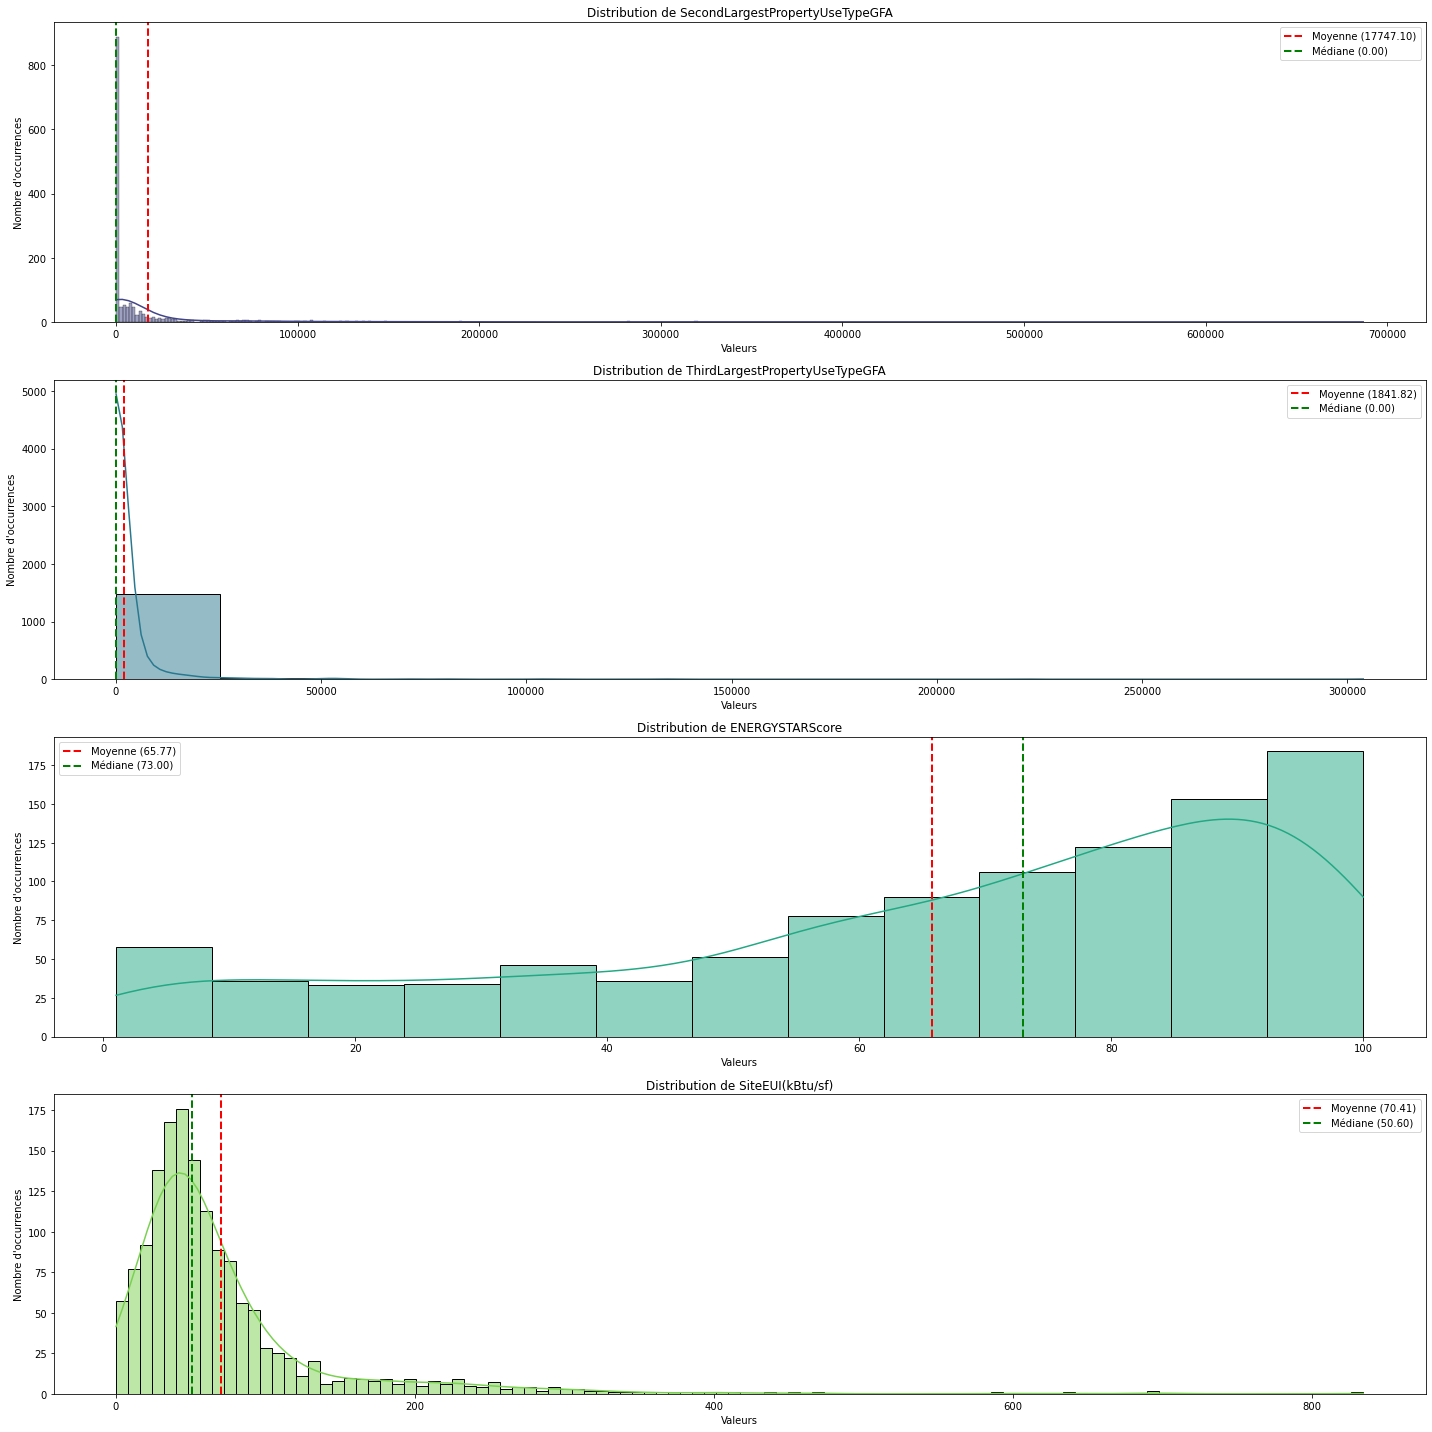

In [541]:
fct.distribution_histplot(df[list_colonne_missing], kde=True)

En comparant les courbes KDE de la distribution en histogramme pour les variables de la liste:\
 ['ZipCode',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)']
 
  On constate qu’elles restent similaires, avec des variations minimes de la moyenne et de la médiane. Cela suggère que la forme de la distribution n’a pas beaucoup changé après l’imputation par 0. Dans l’ensemble, l’imputation semble s’être bien passée

In [542]:
fct.taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0  SiteEUI(kBtu/sf)              99.9335
1   ENERGYSTARScore              68.2846

Il ne nous restera que deux colonnes :

- La colonne ‘ENERGYSTARScore’ : nous ne devons pas imputer cette colonne ; nous la laisserons telle quelle pour la suite.
- La colonne ‘SiteEUI(kBtu/sf)’ : nous devons l’imputer en utilisant une méthode technique appropriée

7. 2. 2. **Approche technique:**

<!-- On peut utiliser trois approches techniques pour traiter les valeurs manquantes (NA) :

- **Remplacement par la méthode statistique IterativeImputer() :** Cette méthode itère sur les variables pour estimer les valeurs manquantes en utilisant un modèle de régression. Elle est utile lorsque les données ont des relations complexes entre elles.
- **Remplacement par la médiane par catégorie :** Au lieu d’utiliser la moyenne, nous utilisons la médiane pour remplacer les valeurs manquantes. Cette approche est préférable lorsque le dataset contient des valeurs extrêmes susceptibles d’introduire des biais dans la moyenne.
- **Remplacement par la méthode statistique KNNImputer() :** Cette méthode utilise l’algorithme des k-plus proches voisins pour estimer les valeurs manquantes en se basant sur les valeurs des voisins les plus proches. -->

- **Imputation par la méthode iterativeimputer():**

La condition pour utiliser la méthode iterativeimputer() est que chaque paire de variables devrait avoir une corrélation d'au moins 55%.

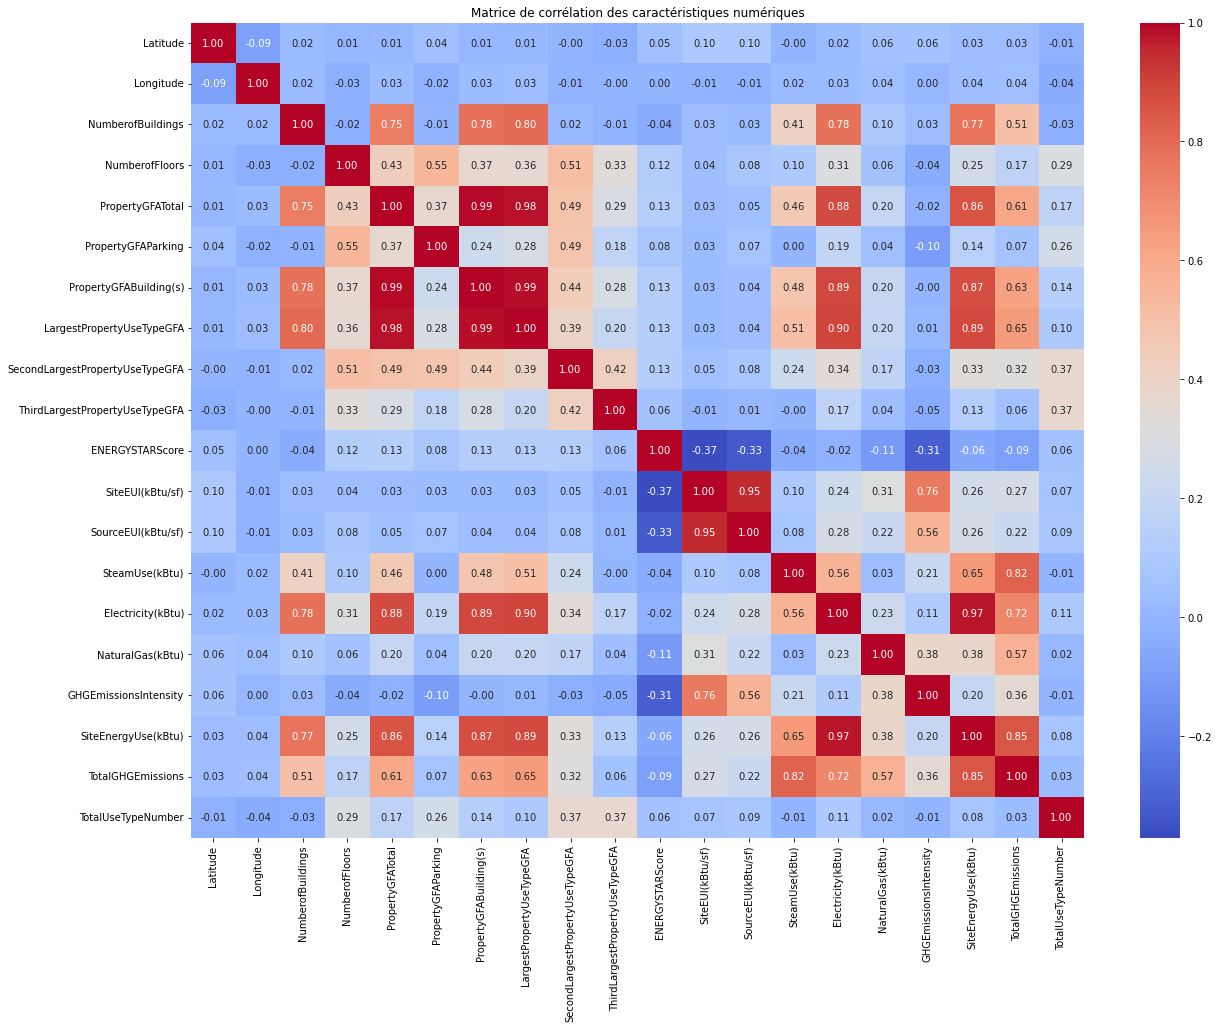

In [543]:
fct.correlation_matrix(df)

In [544]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Sélectionner les colonnes qui sont corrélées avec 'SiteEUI(kBtu/sf)' avec un pourcentage supérieur à 70%
high_corr = corr_matrix[abs(corr_matrix['SiteEUI(kBtu/sf)']) > 0.7]['SiteEUI(kBtu/sf)']

print(high_corr)


SiteEUI(kBtu/sf)         1.000000
SourceEUI(kBtu/sf)       0.947955
GHGEmissionsIntensity    0.756244
Name: SiteEUI(kBtu/sf), dtype: float64


Donc, les deux colonnes qui sont corrélées à plus de 70% avec la colonne ‘SiteEUI(kBtu/sf)’ sont : ‘SourceEUI(kBtu/sf)’ et ‘GHGEmissionsIntensity’.

In [545]:
# Affichage des 3 variables avant imputation
df[['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity']]

SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  GHGEmissionsIntensity
0            81.699997          182.500000                   2.83
1            94.800003          176.100006                   2.86
2            96.000000          241.899994                   2.19
3           110.800003          216.199997                   4.67
4           114.800003          211.399994                   2.88
...                ...                 ...                    ...
1505         25.200001           64.099998                   0.51
1506         51.000000          126.000000                   1.11
1507         69.099998          161.699997                   1.70
1508         59.400002          114.199997                   2.01
1509        438.200012          744.799988                  16.99

[1504 rows x 3 columns]

In [546]:
# Initialisez l'itérateur d'imputation
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0) # L'estimateur RandomForestRegressor() est un bon choix pour des variables corrélées.

# Appliquez l'imputation aux données spécifiques
df[['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity']] = imputer.fit_transform(df[['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity']])

# Affichez les données imputées
df[['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity']]


SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  GHGEmissionsIntensity
0            81.699997          182.500000                   2.83
1            94.800003          176.100006                   2.86
2            96.000000          241.899994                   2.19
3           110.800003          216.199997                   4.67
4           114.800003          211.399994                   2.88
...                ...                 ...                    ...
1505         25.200001           64.099998                   0.51
1506         51.000000          126.000000                   1.11
1507         69.099998          161.699997                   1.70
1508         59.400002          114.199997                   2.01
1509        438.200012          744.799988                  16.99

[1504 rows x 3 columns]

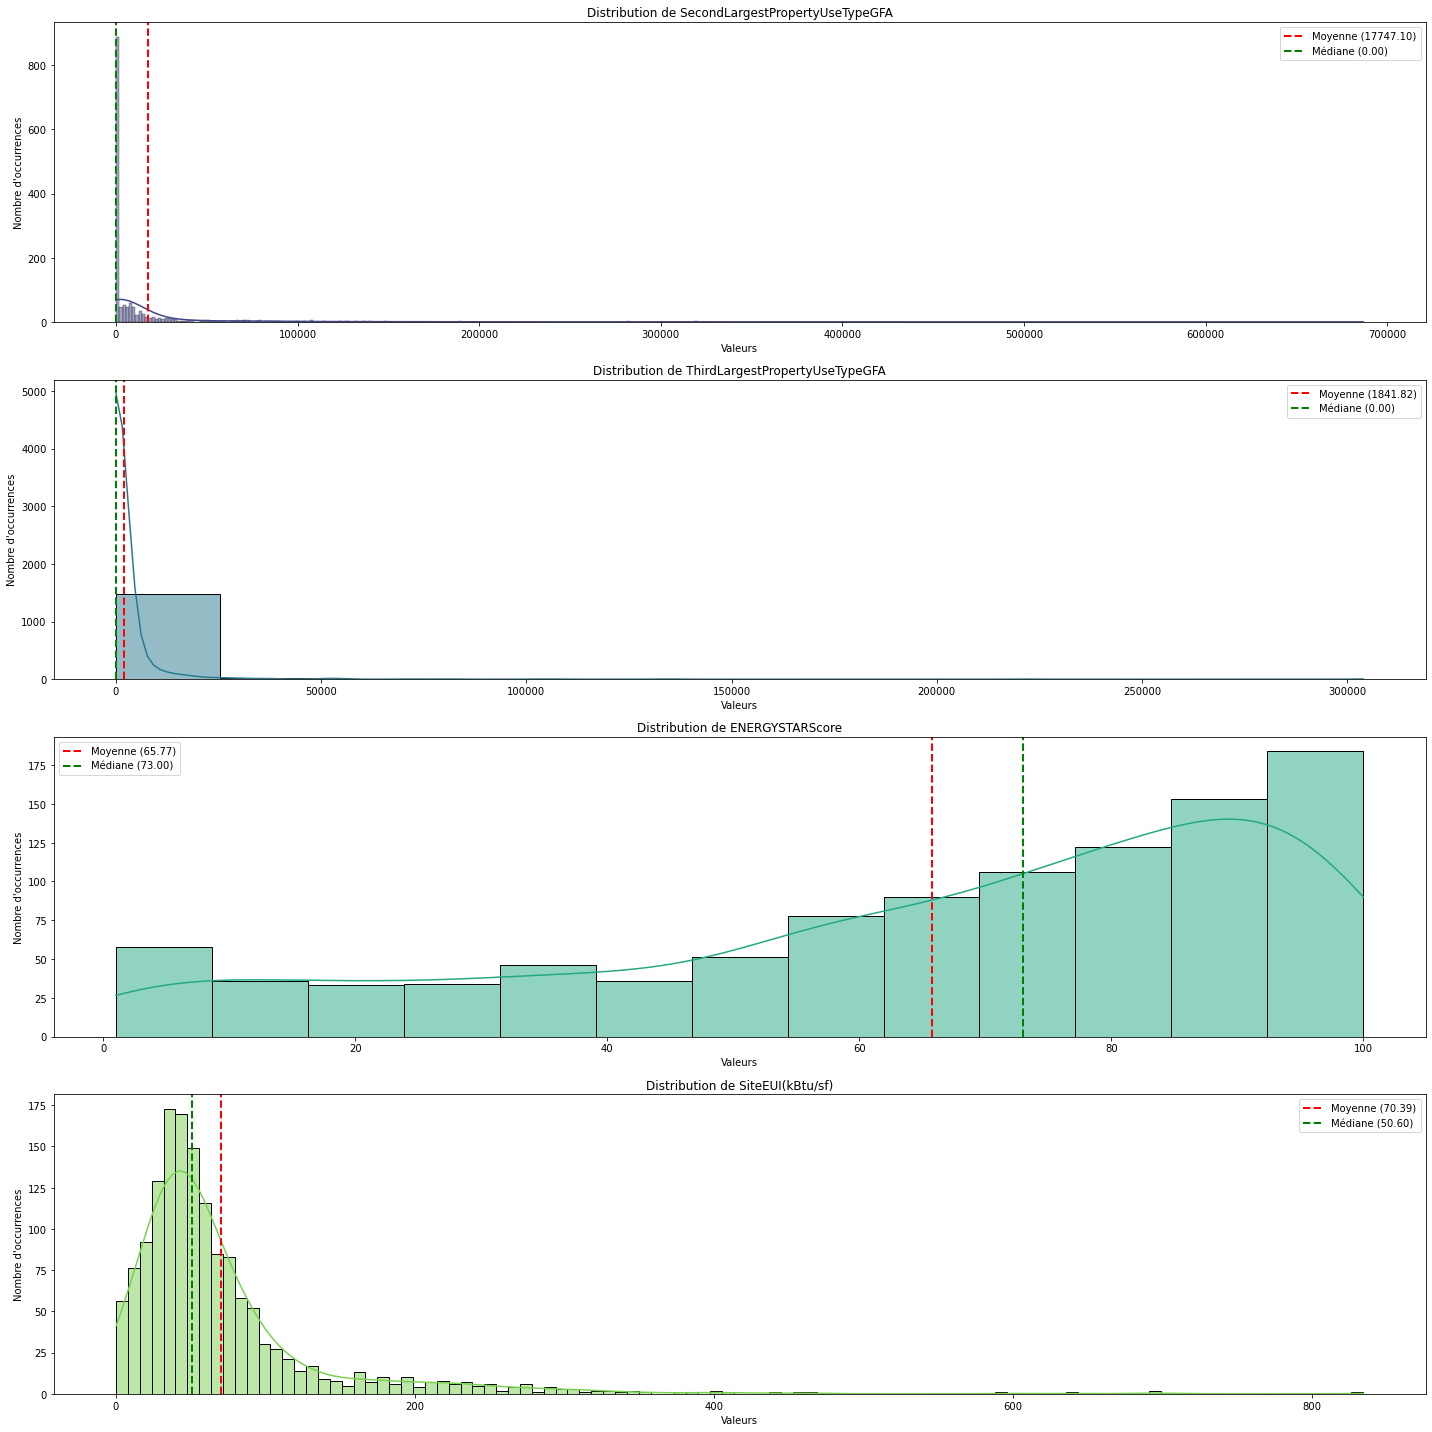

In [547]:
fct.distribution_histplot(df[list_colonne_missing], kde=True)

En comparant les courbes KDE de la distribution en histogramme pour la variable , on constate qu’elles restent similaires, avec des variations minimes de la moyenne et de la médiane. Cela suggère que la forme de la distribution n’a pas beaucoup changé après l’imputation par IterativeImputer. Dans l’ensemble, l’imputation semble s’être bien passée

In [548]:
fct.taux_de_Remplissage_tableau(df)

Colonne  Taux_de_Remplissage
0  ENERGYSTARScore              68.2846

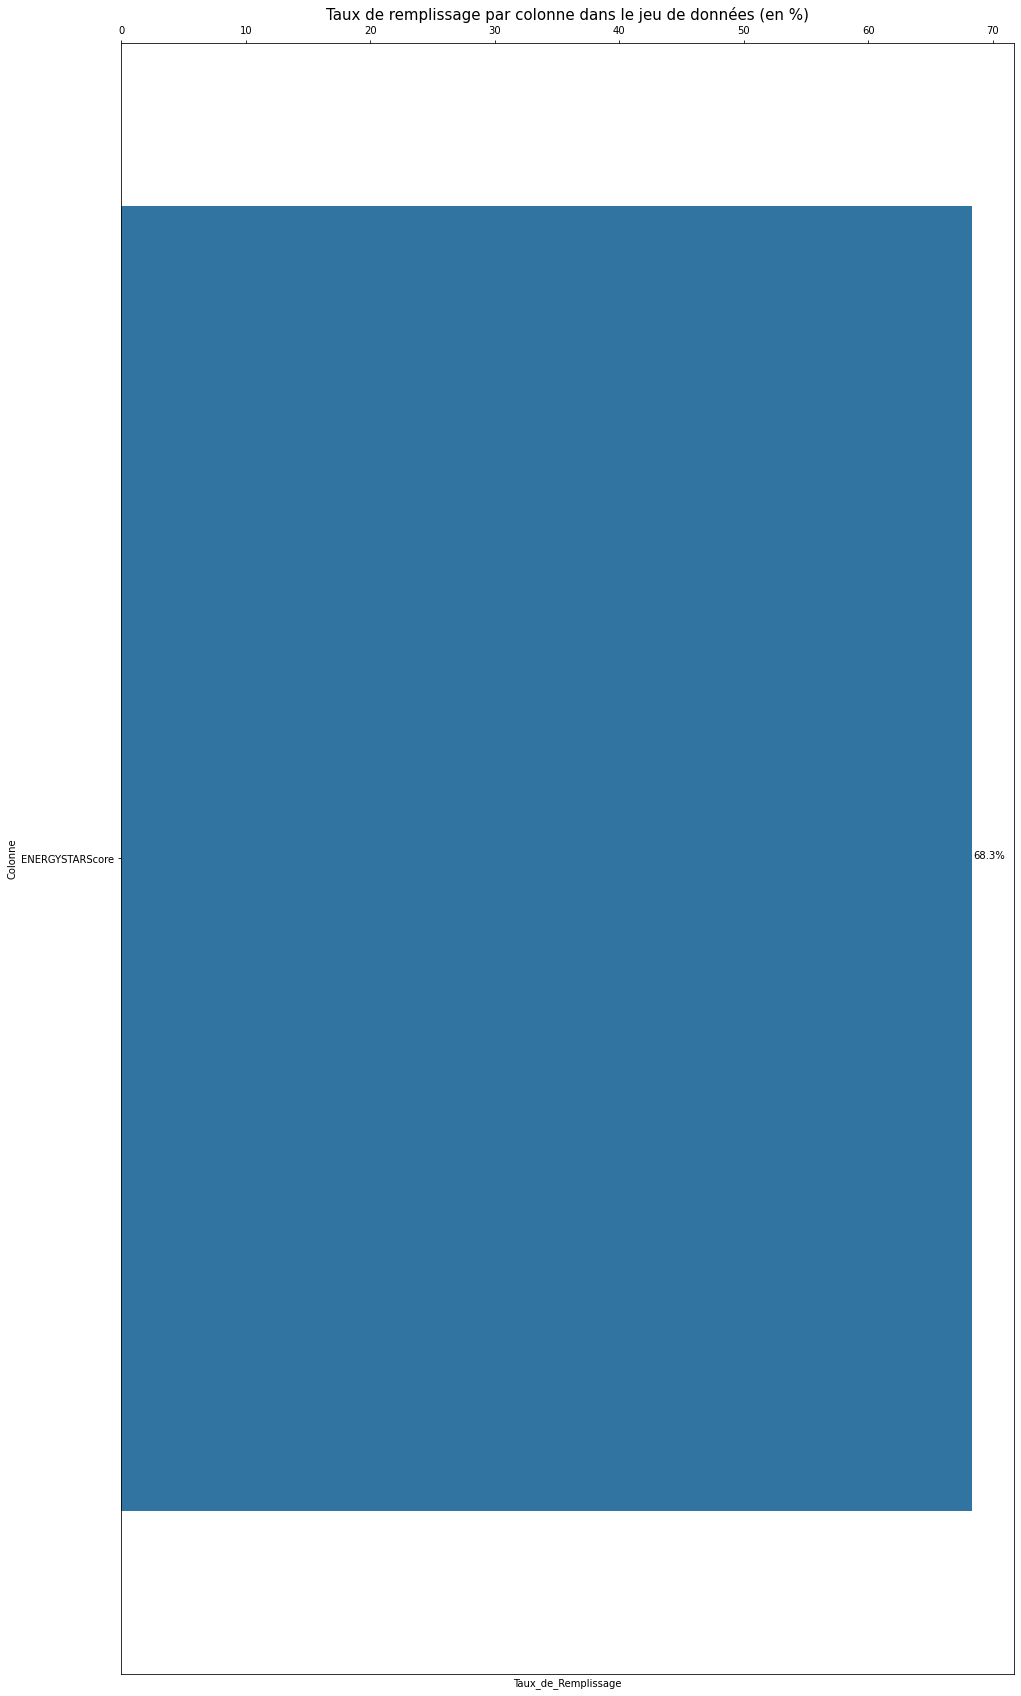

In [549]:
fct.taux_de_Remplissage_heatmap_missing(df, show_threshold_bar=False, seuil_filtrage=seuil_filtrage, affichage= 'filling_rate')

Conclusion: toutes les variables ont un taux de remplissage à 100 %, donc on peut passer à l'étape analyse.

In [550]:
fct.show_data(df)

---------------------
Détails du dataset :
---------------------
1.La taille du dataset:
Il y a 1504 lignes et 37 colonnes dans notre dataset.


2. Affichage de la dataframe:


OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
0             1     2016  NonResidential               Hotel   
1             2     2016  NonResidential               Hotel   
2             3     2016  NonResidential               Hotel   
3             5     2016  NonResidential               Hotel   
4             8     2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  CouncilDistrictCode Neighborhood YearBuilt  \
0                   7     DOWNTOWN      1927   
1                   7     DOWNTOWN      1996   
2                   7     DOWNTOWN      1969   
3                   7     DOWNTOWN      1926   
4                   7     DOWNTOWN      1980   

           ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                            [Hotel]                  Hotel   
1     [Hotel,  Parking,  Restaurant]                  Hotel   
2                            [Hotel]                  Hotel   
3                            [Hotel]                  Hotel   
4  [Hotel,  Parking,  Swimming Pool]                  Hotel   

  SecondLargestPropertyUseType ThirdLargestPropertyUseType ComplianceStatus  \
0                non_manquante               non_manquante        Compliant   
1                      Parking                  Restaurant        Compliant   
2                non_manquante               non_manquante        Compliant   
3                non_manquante               non_manquante        Compliant   
4                      Parking               Swimming Pool        Compliant   

   Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0  47.61220 -122.33799                  1              12             88434   
1  47.61317 -122.33393                  1              11            103566   
2  47.61393 -122.33810                  1              41            956110   
3  47.61412 -122.33664                  1              10             61320   
4  47.61375 -122.34047                  1              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   0                   88434                      88434   
1               15064                   88502                      83880   
2              196718                  759392                     756493   
3                   0                   61320                      61320   
4               62000                  113580                     123445   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              0.0                             0.0   
1                          15064.0                          4622.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                          68009.0                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
0             60.0         81.699997          182.500000      2003882.00   
1             61.0         94.800003          176.100006            0.00   
2             43.0         96.000000          241.899994     21566554.00   
3             56.0        110.800003          216.199997      2214446.25   
4             75.0        114.800003          211.399994            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
0          3946027.0         1276453.0                   2.83   
1          3242851.0         5145082.0                   2.86   
2         49526664

## **8. Feature engineering simple:**

**8. 1. BuildingType:**

In [551]:
df.BuildingType.value_counts()

NonResidential        1309
SPS-District K-12       98
Nonresidential COS      77
Campus                  19
Nonresidential WA        1
Name: BuildingType, dtype: int64

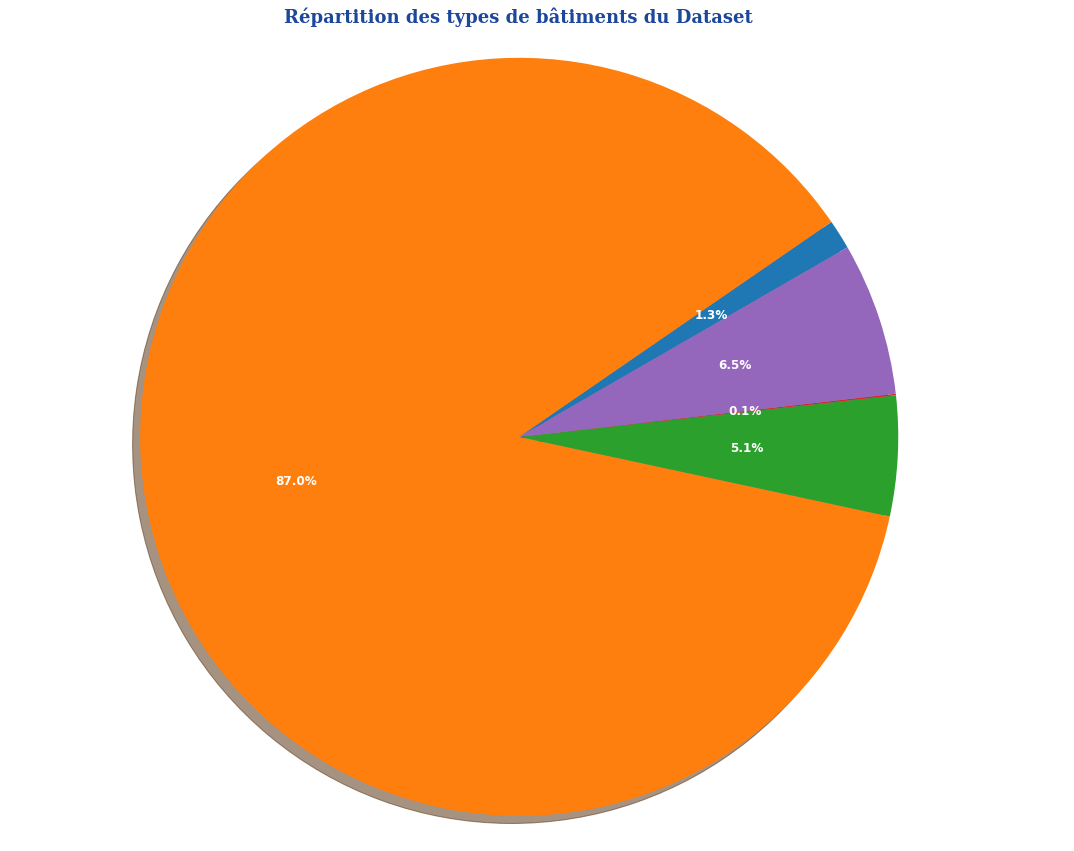

In [552]:
building_type = df.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(15,15))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="white",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du Dataset", fontdict=font_title)
plt.show()

In [553]:
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    285
Other                          185
Warehouse                      180
Large Office                   168
Retail Store                    91
Hotel                           75
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Self-Storage Facility           27
University                      17
Refrigerated Warehouse          12
Hospital                        10
Laboratory                      10
Restaurant                      10
Name: PrimaryPropertyType, dtype: int64

Les bureaux de petite et moyenne taille représentent la plus grande part des bâtiments non résidentiels.

**8. 2. Les années de construction:**

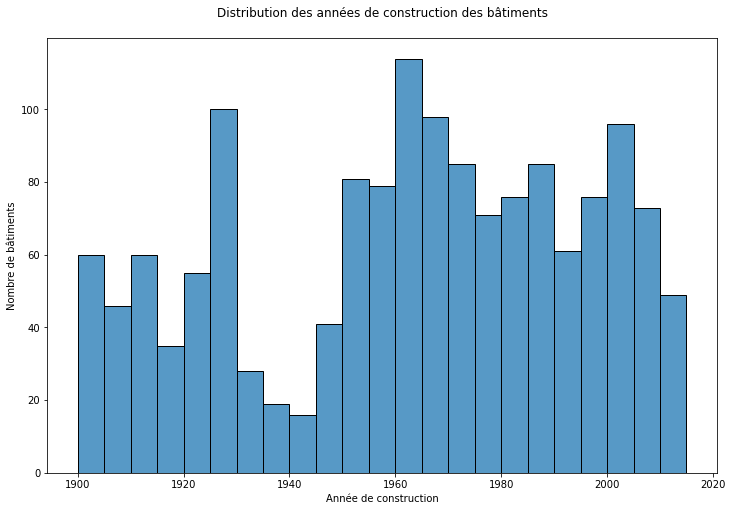

In [554]:
fct.diagramme_histplot(df, "Année de construction", "Nombre de bâtiments", "Distribution des années de construction des bâtiments", ['YearBuilt'])

Plus que l'année de construction, il serait intéressant de traiter l'age des bâtiments pour réduire la dispersion des données et lier l'année des relevés. Nous allons donc créer cette nouvelle variable et ajouter l'année de construction à liste  list_to_drop_after_FE :

In [555]:
# Calcul de l'âge du bâtiment pour chaque ligne en soustrayant l'année de construction de l'année des données
df['BuildingAge'] = df['DataYear'].astype(int) - df['YearBuilt'].astype(int)
list_to_drop_after_FE_EnergyUse.append('YearBuilt')
list_to_drop_after_FE_GHGEmissions.append('YearBuilt')
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)


['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt']
['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt']


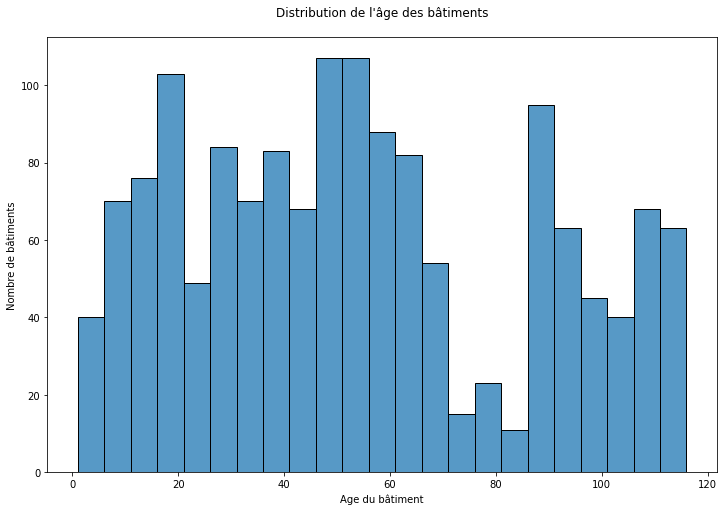

In [556]:
fct.diagramme_histplot(df, "Age du bâtiment", "Nombre de bâtiments", "Distribution de l'âge des bâtiments", ['BuildingAge'])

In [557]:
df.head()

OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
0             1     2016  NonResidential               Hotel   
1             2     2016  NonResidential               Hotel   
2             3     2016  NonResidential               Hotel   
3             5     2016  NonResidential               Hotel   
4             8     2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  CouncilDistrictCode Neighborhood  YearBuilt  \
0                   7     DOWNTOWN       1927   
1                   7     DOWNTOWN       1996   
2                   7     DOWNTOWN       1969   
3                   7     DOWNTOWN       1926   
4                   7     DOWNTOWN       1980   

           ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                            [Hotel]                  Hotel   
1     [Hotel,  Parking,  Restaurant]                  Hotel   
2                            [Hotel]                  Hotel   
3                            [Hotel]                  Hotel   
4  [Hotel,  Parking,  Swimming Pool]                  Hotel   

  SecondLargestPropertyUseType ThirdLargestPropertyUseType ComplianceStatus  \
0                non_manquante               non_manquante        Compliant   
1                      Parking                  Restaurant        Compliant   
2                non_manquante               non_manquante        Compliant   
3                non_manquante               non_manquante        Compliant   
4                      Parking               Swimming Pool        Compliant   

   Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0  47.61220 -122.33799                  1              12             88434   
1  47.61317 -122.33393                  1              11            103566   
2  47.61393 -122.33810                  1              41            956110   
3  47.61412 -122.33664                  1              10             61320   
4  47.61375 -122.34047                  1              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   0                   88434                      88434   
1               15064                   88502                      83880   
2              196718                  759392                     756493   
3                   0                   61320                      61320   
4               62000                  113580                     123445   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              0.0                             0.0   
1                          15064.0                          4622.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                          68009.0                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
0             60.0         81.699997          182.500000      2003882.00   
1             61.0         94.800003          176.100006            0.00   
2             43.0         96.000000          241.899994     21566554.00   
3             56.0        110.800003          216.199997      2214446.25   
4             75.0        114.800003          211.399994            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
0          3946027.0         1276453.0                   2.83   
1          3242851.0         5145082.0                   2.86   
2         49

**8. 3. Les variables énergitiques ‘SteamUse(kBtu)’, ‘Electricity(kBtu)’, ‘NaturalGas(kBtu)’ et ‘SiteEnergyUse(kBtu)’:**

Nous avons confirmé précédemment que la consommation totale d’énergie du site, SiteEnergyUse(kBtu), qui est la variable cible, est égale à la somme de la consommation d’électricité (Electricity(kBtu)), de gaz naturel (NaturalGas(kBtu)), et de vapeur (SteamUse(kBtu)). Par conséquent, ces trois variables explicatives peuvent créer un data leakage par rapport à la variable cible. Pour éviter ce problème, nous pourrions ajouter les colonnes de consommation d’électricité (Electricity(kBtu)), de gaz naturel (NaturalGas(kBtu)), et de vapeur (SteamUse(kBtu)) à la liste list_to_drop_after_FE.

In [558]:
list_to_drop_after_FE_EnergyUse.extend(['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)'])
list_to_drop_after_FE_GHGEmissions.extend(['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)'])
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)


['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']
['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']


**8. 4. Transformation logarithmique:**

Nous avons vérifié précédemment qu’on pourrait faire la transformation logarithmique de ces variables énergétiques ‘SteamUse(kBtu)’, ‘Electricity(kBtu)’et ‘NaturalGas(kBtu)’. Voici la visualisation de ces variables avant transformation :

In [559]:
# Calculer la skewness des features numériques
skewed_features = df.select_dtypes(include=['int32','int64','float64']).skew().sort_values(ascending=False)
skewed_features

NumberofBuildings                  31.014007
LargestPropertyUseTypeGFA          22.592648
Electricity(kBtu)                  21.248667
PropertyGFABuilding(s)             21.221718
SiteEnergyUse(kBtu)                19.431237
PropertyGFATotal                   18.887258
SteamUse(kBtu)                     18.358334
ThirdLargestPropertyUseTypeGFA     17.000241
NaturalGas(kBtu)                   12.712195
TotalGHGEmissions                  12.666924
SecondLargestPropertyUseTypeGFA     5.506128
PropertyGFAParking                  5.330860
NumberofFloors                      5.122140
SourceEUI(kBtu/sf)                  4.832595
GHGEmissionsIntensity               3.895425
SiteEUI(kBtu/sf)                    3.774547
TotalUseTypeNumber                  2.138532
BuildingAge                         0.312740
Latitude                            0.244263
Longitude                          -0.054517
YearBuilt                          -0.312740
ENERGYSTARScore                    -0.797323
dtype: flo

In [560]:
# Sélectionner les features à transformer (celles avec une skewness > 5.5)
cols_to_transform = list(skewed_features[skewed_features > 5.5].index)
cols_to_transform 

['NumberofBuildings',
 'LargestPropertyUseTypeGFA',
 'Electricity(kBtu)',
 'PropertyGFABuilding(s)',
 'SiteEnergyUse(kBtu)',
 'PropertyGFATotal',
 'SteamUse(kBtu)',
 'ThirdLargestPropertyUseTypeGFA',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'SecondLargestPropertyUseTypeGFA']

On transforme ces colonnes:

In [561]:
# Boucle sur chaque colonne à transformer
for col in cols_to_transform:
    # Ajouter 1 à chaque valeur de la colonne avant de prendre le logarithme
    # Cela évite les erreurs lorsque la valeur de la colonne est 0, car log(0) est indéfini
    df[col + '_log'] = np.log1p(df[col])

In [562]:
# Liste des colonnes après transformation
cols_after_transform_log = [col for col in df.columns if col.endswith('_log')]
cols_after_transform_log

['NumberofBuildings_log',
 'LargestPropertyUseTypeGFA_log',
 'Electricity(kBtu)_log',
 'PropertyGFABuilding(s)_log',
 'SiteEnergyUse(kBtu)_log',
 'PropertyGFATotal_log',
 'SteamUse(kBtu)_log',
 'ThirdLargestPropertyUseTypeGFA_log',
 'NaturalGas(kBtu)_log',
 'TotalGHGEmissions_log',
 'SecondLargestPropertyUseTypeGFA_log']

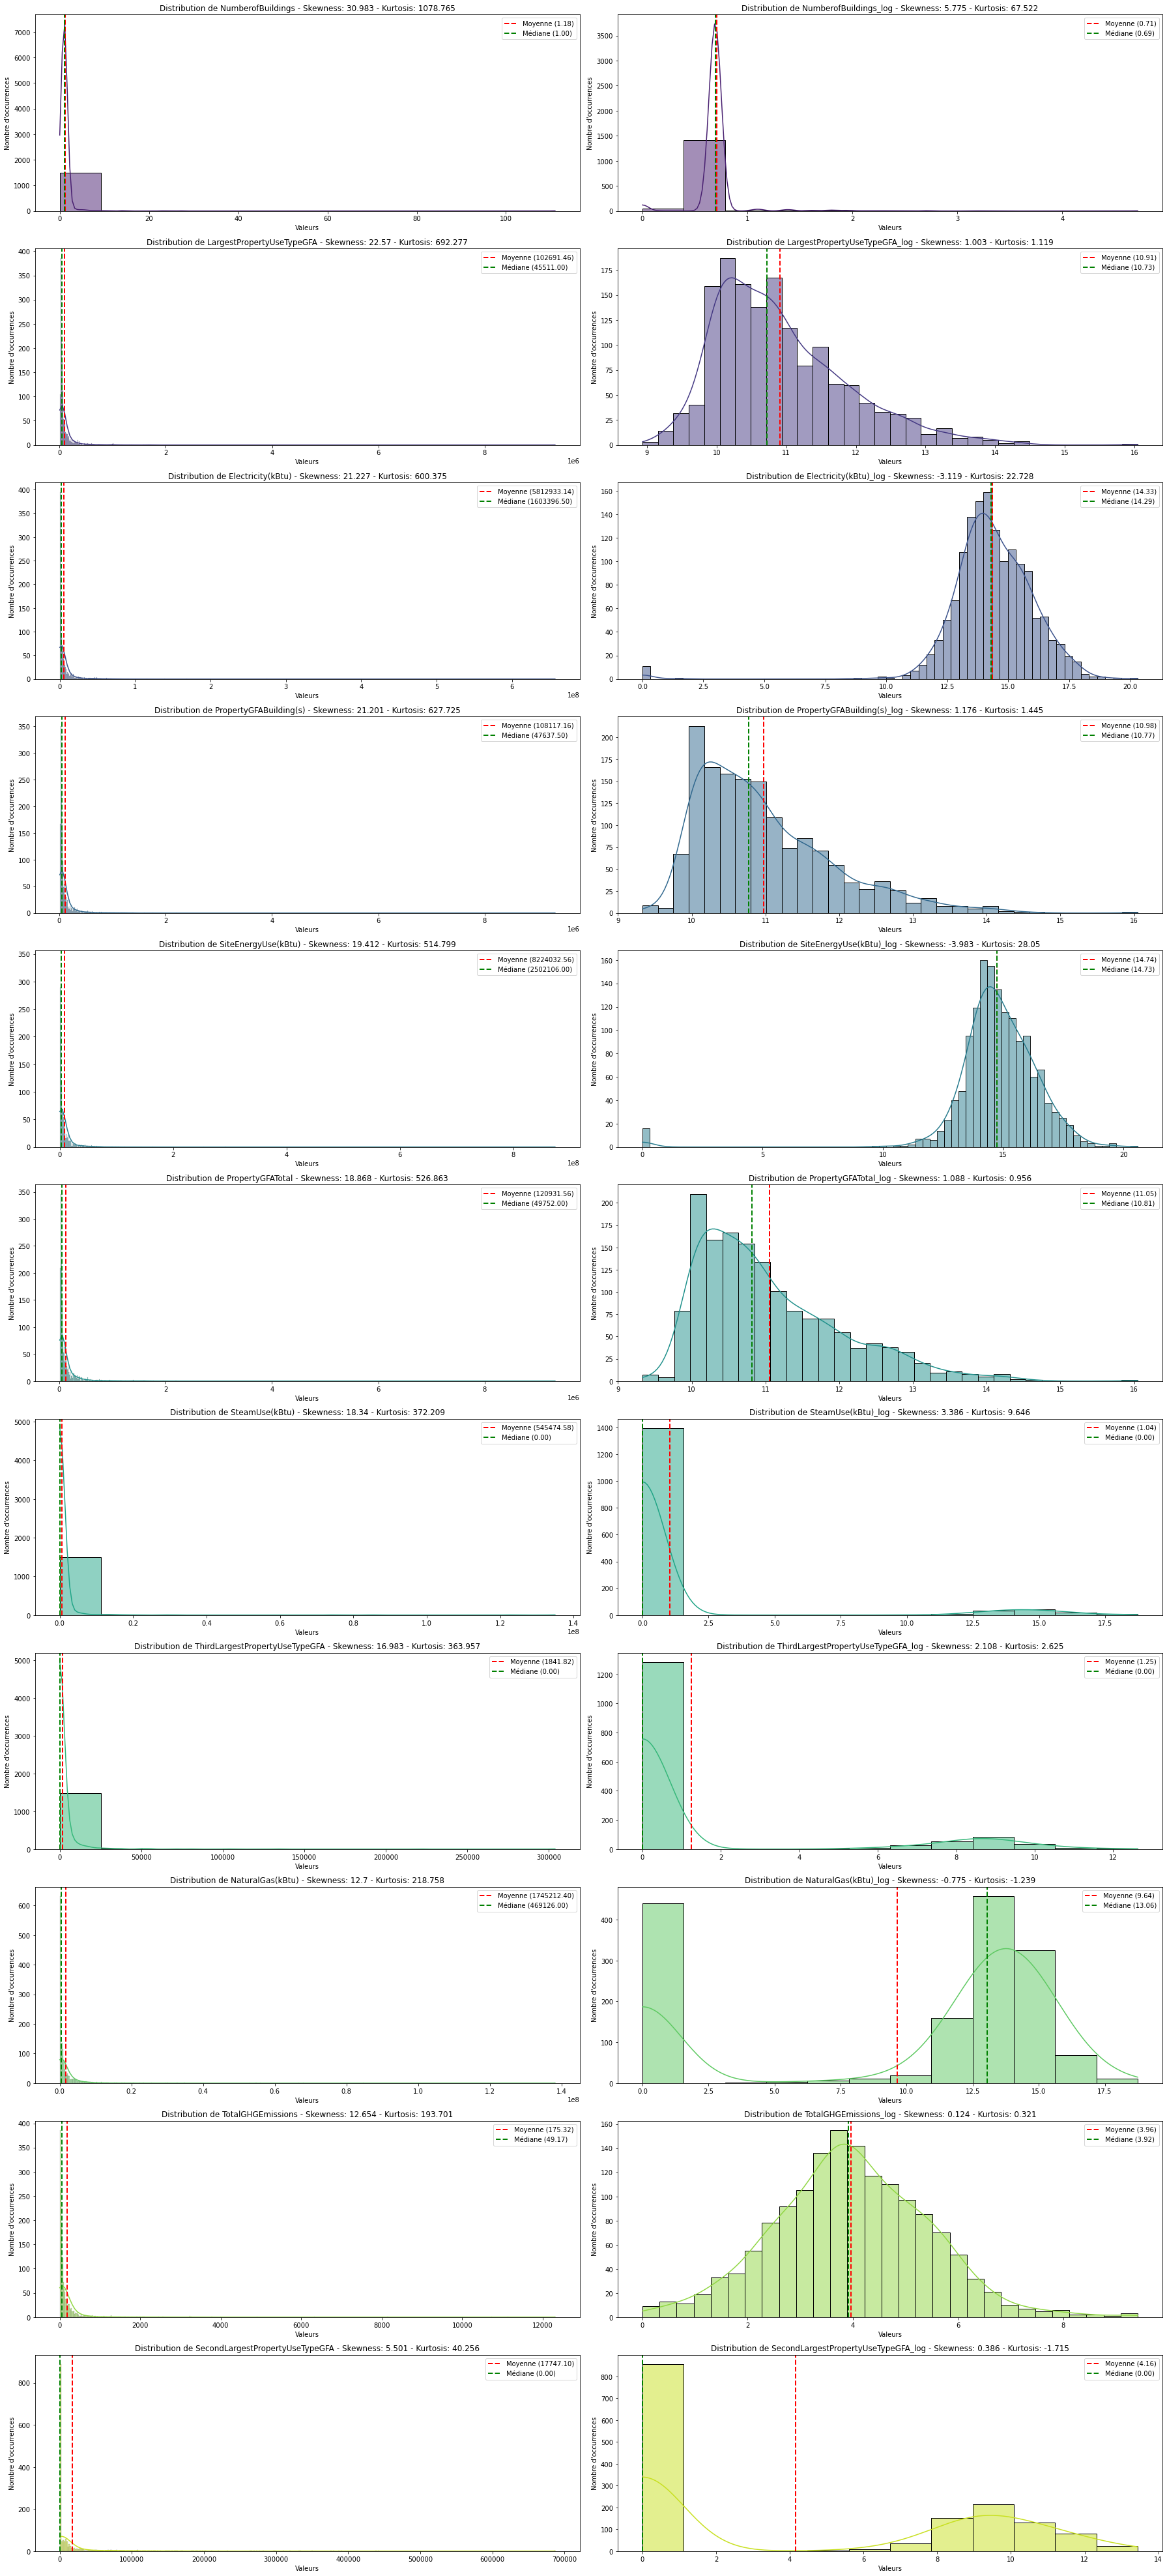

In [563]:
fct.distribution_histplot_side_by_side(df, cols_to_transform, cols_after_transform_log, kde=True, show_skeness_kurtosis=True)

D'après la comparaison graphique de ces variables avant et après transformation logarithmique, il est apparu que la transformation de la variable NumberofBuildings n'était pas nécessaire. En effet, la distribution de cette variable est restée inchangée après la transformation. Par conséquent, nous pourrions l'exclure de la transformation:

In [564]:
cols_to_transform.remove('NumberofBuildings')
cols_after_transform_log.remove('NumberofBuildings_log')

list_to_drop_after_FE_EnergyUse.append('NumberofBuildings_log')
list_to_drop_after_FE_GHGEmissions.append('NumberofBuildings_log')
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)


['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log']
['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log']


Grâce à cette transformation logarithmique, nous avons pu éviter les erreurs liées aux zéros dans les données. Cette méthode est particulièrement utile pour gérer les distributions asymétriques, car elle peut aider à normaliser la distribution des données et rendre nos modèles prédictifs plus robustes et précis.

Les deux variables ‘SiteEnergyUse(kBtu)_log’ et	'TotalGHGEmissions_log'	 sont notre nouvelles variables cibles qui vont remplacer les deux variables ‘SiteEnergyUse(kBtu)’ et	'TotalGHGEmissions', on pourrait les rajouter à la liste 	 

In [565]:
cols_after_transform_log 

['LargestPropertyUseTypeGFA_log',
 'Electricity(kBtu)_log',
 'PropertyGFABuilding(s)_log',
 'SiteEnergyUse(kBtu)_log',
 'PropertyGFATotal_log',
 'SteamUse(kBtu)_log',
 'ThirdLargestPropertyUseTypeGFA_log',
 'NaturalGas(kBtu)_log',
 'TotalGHGEmissions_log',
 'SecondLargestPropertyUseTypeGFA_log']

In [566]:
cols_to_transform

['LargestPropertyUseTypeGFA',
 'Electricity(kBtu)',
 'PropertyGFABuilding(s)',
 'SiteEnergyUse(kBtu)',
 'PropertyGFATotal',
 'SteamUse(kBtu)',
 'ThirdLargestPropertyUseTypeGFA',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'SecondLargestPropertyUseTypeGFA']

In [567]:
list_to_drop_after_FE_EnergyUse.extend(cols_to_transform)
list_to_drop_after_FE_GHGEmissions.extend(cols_to_transform)
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)

['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA']
['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA']


### 8. 4.  **Vérification du data leakage avec les variables cibles:**

On vérifie les corrélations supérieures à 0.7 avec les variables cibles pour éviter le data leakage :

Les deux variables ‘SiteEnergyUse(kBtu)_log’ et	'TotalGHGEmissions_log'	 sont notre nouvelles variables cibles, donc on vérifie la corrélation > 0.7 avec les variables cibles pour éviter le data Leakage:

8. 4. 1. **Par rapport à la variable 'SiteEnergyUse(kBtu)':**

In [568]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Sélectionner les colonnes qui sont corrélées avec ‘SiteEnergyUse(kBtu)’ avec un pourcentage supérieur à 70%
high_corr = corr_matrix[abs(corr_matrix['SiteEnergyUse(kBtu)']) > 0.7]['SiteEnergyUse(kBtu)']

print(high_corr)

NumberofBuildings            0.772778
PropertyGFATotal             0.855561
PropertyGFABuilding(s)       0.872057
LargestPropertyUseTypeGFA    0.886035
Electricity(kBtu)            0.973427
SiteEnergyUse(kBtu)          1.000000
TotalGHGEmissions            0.850117
Name: SiteEnergyUse(kBtu), dtype: float64


Ces variables ont déjà été ajoutées à la liste list_to_drop_after_FE suite à la transformation logarithmique. Il ne faut pas oublier de supprimer également les variables logarithmiques PropertyGFABuilding(s)_log, LargestPropertyUseTypeGFA_log, SecondLargestPropertyUseTypeGFA_log, ThirdLargestPropertyUseTypeGFA_log, qui peuvent créer du data leakage pour la variable cible 'SiteEnergyUse(kBtu)':

In [569]:
list_to_drop_after_FE_EnergyUse.extend(['PropertyGFATotal_log','PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log', 'SecondLargestPropertyUseTypeGFA_log', 'ThirdLargestPropertyUseTypeGFA_log', 'TotalGHGEmissions_log' ])
print(list_to_drop_after_FE_EnergyUse)

['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFATotal_log', 'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log', 'SecondLargestPropertyUseTypeGFA_log', 'ThirdLargestPropertyUseTypeGFA_log', 'TotalGHGEmissions_log']


8. 4. 2. **Par rapport à la variable 'TotalGHGEmissions':**

In [570]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Sélectionner les colonnes qui sont corrélées avec ‘TotalGHGEmissions’ avec un pourcentage supérieur à 70%
high_corr = corr_matrix[abs(corr_matrix['TotalGHGEmissions']) > 0.7]['TotalGHGEmissions']

print(high_corr)

SteamUse(kBtu)         0.822410
Electricity(kBtu)      0.720972
SiteEnergyUse(kBtu)    0.850117
TotalGHGEmissions      1.000000
Name: TotalGHGEmissions, dtype: float64


Ces variables ont déjà été ajoutées à la liste list_to_drop_after_FE suite à la transformation logarithmique. Il ne faut pas oublier de supprimer également la variable logarithmique 'SiteEnergyUse(kBtu)_log', qui peut créer du data leakage:

In [571]:
list_to_drop_after_FE_GHGEmissions.append('SiteEnergyUse(kBtu)_log')
print(list_to_drop_after_FE_GHGEmissions)


['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)_log']


Les deux variables ‘SiteEnergyUse(kBtu)_log’ et	'TotalGHGEmissions_log'	 sont notre nouvelles variables cibles. Les variables, ‘SteamUse(kBtu)_log’, ‘Electricity(kBtu)_log’, et ‘NaturalGas(kBtu)_log’, sont des variables explicatives qui ont une relation directe avec la variable cible. Pour éviter le data leakage, nous avons décidé d’ajouter ces trois variables explicatives à la liste list_to_drop_after_FE:

In [572]:
list_to_drop_after_FE_GHGEmissions.extend(['SteamUse(kBtu)_log', 'Electricity(kBtu)_log', 'NaturalGas(kBtu)_log'])
list_to_drop_after_FE_EnergyUse.extend(['SteamUse(kBtu)_log', 'Electricity(kBtu)_log', 'NaturalGas(kBtu)_log'])

In [573]:
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)

['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFATotal_log', 'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log', 'SecondLargestPropertyUseTypeGFA_log', 'ThirdLargestPropertyUseTypeGFA_log', 'TotalGHGEmissions_log', 'SteamUse(kBtu)_log', 'Electricity(kBtu)_log', 'NaturalGas(kBtu)_log']
['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyU

8. 5. **La variable 'PropertyGFATotal' avec les deux variables 'PropertyGFABuilding(s)' et 'PropertyGFAParking':**

Nous avons confirmé précédemment la relation suivante : ’PropertyGFATotal’=’PropertyGFABuilding(s)’+’PropertyGFAParking’

In [574]:
# Prendre en compte la proportion de surface de Building(s)
df['Building(s)_Proportion'] = df['PropertyGFABuilding(s)'] / df['PropertyGFATotal']

# Prendre en compte la proportion de surface de parking
df['Parking_Proportion'] = df['PropertyGFAParking'] / df['PropertyGFATotal']

On pourrait rajouter ces colonnes 'PropertyGFABuilding(s)' et 'PropertyGFAParking' à la liste list_to_drop_after_FE:

In [575]:
list_to_drop_after_FE_EnergyUse.extend(['PropertyGFABuilding(s)', 'PropertyGFAParking'])
list_to_drop_after_FE_GHGEmissions.extend(['PropertyGFABuilding(s)', 'PropertyGFAParking'])
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)

['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFATotal_log', 'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log', 'SecondLargestPropertyUseTypeGFA_log', 'ThirdLargestPropertyUseTypeGFA_log', 'TotalGHGEmissions_log', 'SteamUse(kBtu)_log', 'Electricity(kBtu)_log', 'NaturalGas(kBtu)_log', 'PropertyGFABuilding(s)', 'PropertyGFAParking']
['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFA

8. 6. **La variable 'PropertyGFATotal' avec les deux variables 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseTypeGFA' :**

In [576]:
# Prendre en compte la proportion de surface de LargestPropertyUseTypeGFA
df['LargestPropertyUse_Proportion'] = df['LargestPropertyUseTypeGFA'] / df['PropertyGFATotal']
df.LargestPropertyUse_Proportion = df.LargestPropertyUse_Proportion.astype('float64')

# Prendre en compte la proportion de surface de SecondLargestPropertyUseTypeGFA
df['SecondLargestPropertyUse_Proportion'] = df['SecondLargestPropertyUseTypeGFA'] / df['PropertyGFATotal']

# Prendre en compte la proportion de surface de ThirdLargestPropertyUseTypeGFA
df['ThirdLargestPropertyUse_Proportion'] = df['ThirdLargestPropertyUseTypeGFA'] / df['PropertyGFATotal']

In [577]:
df.head()

OSEBuildingID DataYear    BuildingType PrimaryPropertyType  \
0             1     2016  NonResidential               Hotel   
1             2     2016  NonResidential               Hotel   
2             3     2016  NonResidential               Hotel   
3             5     2016  NonResidential               Hotel   
4             8     2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  CouncilDistrictCode Neighborhood  YearBuilt  \
0                   7     DOWNTOWN       1927   
1                   7     DOWNTOWN       1996   
2                   7     DOWNTOWN       1969   
3                   7     DOWNTOWN       1926   
4                   7     DOWNTOWN       1980   

           ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                            [Hotel]                  Hotel   
1     [Hotel,  Parking,  Restaurant]                  Hotel   
2                            [Hotel]                  Hotel   
3                            [Hotel]                  Hotel   
4  [Hotel,  Parking,  Swimming Pool]                  Hotel   

  SecondLargestPropertyUseType ThirdLargestPropertyUseType ComplianceStatus  \
0                non_manquante               non_manquante        Compliant   
1                      Parking                  Restaurant        Compliant   
2                non_manquante               non_manquante        Compliant   
3                non_manquante               non_manquante        Compliant   
4                      Parking               Swimming Pool        Compliant   

   Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0  47.61220 -122.33799                  1              12             88434   
1  47.61317 -122.33393                  1              11            103566   
2  47.61393 -122.33810                  1              41            956110   
3  47.61412 -122.33664                  1              10             61320   
4  47.61375 -122.34047                  1              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   0                   88434                      88434   
1               15064                   88502                      83880   
2              196718                  759392                     756493   
3                   0                   61320                      61320   
4               62000                  113580                     123445   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              0.0                             0.0   
1                          15064.0                          4622.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                          68009.0                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
0             60.0         81.699997          182.500000      2003882.00   
1             61.0         94.800003          176.100006            0.00   
2             43.0         96.000000          241.899994     21566554.00   
3             56.0        110.800003          216.199997      2214446.25   
4             75.0        114.800003          211.399994            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
0          3946027.0         1276453.0                   2.83   
1          3242851.0         5145082.0                   2.86   
2         49

On pourrait rajouter ces colonnes 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseTypeGFA' à la liste list_to_drop_after_FE:

In [578]:
list_to_drop_after_FE_EnergyUse.extend(['PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'])
list_to_drop_after_FE_GHGEmissions.extend(['PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'])
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)

['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFATotal_log', 'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log', 'SecondLargestPropertyUseTypeGFA_log', 'ThirdLargestPropertyUseTypeGFA_log', 'TotalGHGEmissions_log', 'SteamUse(kBtu)_log', 'Electricity(kBtu)_log', 'NaturalGas(kBtu)_log', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings

8. 7. **Nous pouvons également calculer la surface moyenne par bâtiment et par étage :**

In [579]:
df['GFAPerBuilding'] = round((df['PropertyGFATotal'] / df['NumberofBuildings']),3)
df['GFAPerFloor'] = round((df['PropertyGFATotal'] / df['NumberofFloors']),3)

On vérifie le describe:

In [580]:
df.describe()

YearBuilt     Latitude    Longitude  NumberofBuildings  \
count  1504.000000  1504.000000  1504.000000        1504.000000   
mean   1962.063830    47.615178  -122.333146           1.182846   
std      32.130492     0.048931     0.024676           3.079855   
min    1900.000000    47.499170  -122.411820           0.000000   
25%    1931.000000    47.582900  -122.343428           1.000000   
50%    1965.000000    47.611820  -122.333035           1.000000   
75%    1988.000000    47.649043  -122.322178           1.000000   
max    2015.000000    47.733870  -122.258640         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1504.000000      1.504000e+03         1504.000000   
mean         4.105053      1.209316e+05        12814.392287   
std          6.323472      3.088468e+05        42854.340306   
min          0.000000      1.128500e+04            0.000000   
25%          1.000000      2.971400e+04            0.000000   
50%          2.000000      4.975200e+04            0.000000   
75%          4.000000      1.062458e+05            0.000000   
max         76.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            1.504000e+03               1.504000e+03   
mean             1.081172e+05               1.026915e+05   
std              2.958794e+05               2.887343e+05   
min              1.128500e+04               7.583000e+03   
25%              2.871650e+04               2.628025e+04   
50%              4.763750e+04               4.551100e+04   
75%              9.626550e+04               9.404625e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1504.000000                     1504.000000   
mean                      17747.100596                     1841.819282   
std                       51449.398097                    11916.821112   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       10206.500000                        0.000000   
max                      686750.000000                   303910.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
count      1027.000000       1504.000000         1504.000000    1.504000e+03   
mean         65.769231         70.389622          172.339029    5.454746e+05   
std          28.232264         72.641991          180.510319    5.781810e+06   
min           1.000000          0.000000            0.000000    0.000000e+00   
25%          49.000000         33.200001           74.574999    0.000000e+00   
50%          73.000000         50.599998          128.250000    0.000000e+00   
75%          89.000000         79.150000          199.100006    0.000000e+00   
max         100.000000        834.400024         2620.000000    1.349435e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
count       1.504000e+03      1.504000e+03            1504.000000   
mean        5.812933e+06      1.745212e+06               1.544714   
std         2.129967e+07      6.093927e+06               2.170803   
min         0.000000e+00      0.000000e+00               0.000000   
25%         7.104272e+05      0.000000e+00               0.340000   
50%         1.603396e+06      4.691260e+05               0.840000   
75%         4.899381e+06      1.429443e+06               1.810000   
max         6.570744e+08      1.381912e+08              25.710000   

       SiteEnergyUse(kBtu)  TotalGHGEmissions  TotalUseTypeNumber  \
count         1.504000e+03        1504.000000         1504.000000   
mean          8.224033e+06         175.316563            1.739362   
std           2.945140e+07         657.908353            1.012178   
min       

Dans cette description, on remarque des données avec des **valeurs infinies** . Nous allons regarder de plus prêt ces données et les corriger :

In [581]:
df[(df.GFAPerBuilding == np.inf) | (df.GFAPerFloor == np.inf)].head()

OSEBuildingID DataYear    BuildingType          PrimaryPropertyType  \
57             89     2016  NonResidential               Medical Office   
69            113     2016  NonResidential  Small- and Mid-Sized Office   
152           257     2016  NonResidential                    Warehouse   
156           267     2016  NonResidential                        Hotel   
184           322     2016  NonResidential                 Large Office   

                              PropertyName           Address     City State  \
57               Polyclinic North && South  1200 Harvard Ave  Seattle    WA   
69                                   KCTS9     401 Mercer St  Seattle    WA   
152  Harbor Island: Warehouse E - DNRP-SWD  3235 16TH AVE SW  Seattle    WA   
156                    Grand Hyatt Seattle       721 Pine St  Seattle    WA   
184  Cox Media Group Seattle KIRO TV (322)      2801 3rd Ave  Seattle    WA   

     ZipCode CouncilDistrictCode           Neighborhood  YearBuilt  \
57   98122.0                   3                   EAST       1965   
69   98109.0                   7  MAGNOLIA / QUEEN ANNE       1986   
152  98134.0                   1       GREATER DUWAMISH       1916   
156  98101.0                   7               DOWNTOWN       1999   
184  98121.0                   7               DOWNTOWN       1968   

                             ListOfAllPropertyUseTypes  \
57                                    [Medical Office]   
69   [Data Center,  Distribution Center,  Office,  ...   
152                       [Non-Refrigerated Warehouse]   
156  [Hotel,  Other,  Parking,  Restaurant,  Retail...   
184                                           [Office]   

         LargestPropertyUseType SecondLargestPropertyUseType  \
57               Medical Office                non_manquante   
69                       Office                  Data Center   
152  Non-Refrigerated Warehouse                non_manquante   
156                       Hotel                      Parking   
184                      Office                non_manquante   

    ThirdLargestPropertyUseType ComplianceStatus  Latitude  Longitude  \
57                non_manquante        Compliant  47.61244 -122.32140   
69          Distribution Center        Compliant  47.62391 -122.34837   
152               non_manquante        Compliant  47.57507 -122.35747   
156                  Restaurant        Compliant  47.61275 -122.33330   
184               non_manquante        Compliant  47.61757 -122.35122   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
57                   0               3            179014                   0   
69                   0               2             66240                2352   
152                  0               4             79600                   0   
156                  1               0            934292                   0   
184                  0               3            100734               26731   

     PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
57                   179014                     179014   
69                    63888                      45900   
152                   79600                      79600   
156                  934292                     495536   
184                   74003                     100734   

     SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
57                               0.0                             0.0   
69                            5181.0                          4551.0   
152                              0.0                             0.0   
156                         438756.0                         49700.0   
184                              0.0                             0.0   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SteamUse(kBtu)  \
57              48.0         93.300003          213.399994             0.0   
69               NaN         74.900002          235.199997       

On les corrige:

In [582]:
df['GFAPerBuilding'] = np.where(((df.GFAPerBuilding == np.inf) & (df.NumberofBuildings == 0)),0, df.GFAPerBuilding)
df['GFAPerFloor'] = np.where(((df.GFAPerFloor == np.inf) & (df.NumberofFloors == 0)),0, df.GFAPerFloor)

In [583]:
df.GFAPerBuilding = df.GFAPerBuilding.astype('float64')

#####

In [584]:
liste_buildings_floors =['NumberofBuildings', 'NumberofFloors']
list_to_drop_after_FE_EnergyUse.extend(liste_buildings_floors)
list_to_drop_after_FE_GHGEmissions.extend(liste_buildings_floors)
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)


['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFATotal_log', 'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log', 'SecondLargestPropertyUseTypeGFA_log', 'ThirdLargestPropertyUseTypeGFA_log', 'TotalGHGEmissions_log', 'SteamUse(kBtu)_log', 'Electricity(kBtu)_log', 'NaturalGas(kBtu)_log', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors']
['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)

**8. 8. Les features suffixées EUI(kBtu/sf) et la variable GHGEmissionsIntensity :**  On crée le DataFrame data avec les colonnes suivantes : ['SiteEUI(kBtu/sf)', 'PropertyGFABuilding(s)', 'GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'PropertyGFATotal', 'SourceEUI(kBtu/sf)']. Ensuite, on calcule Calculated_SiteEnergyUse(kBtu) et Calculated_TotalGHGEmissions en utilisant les formules suivantes :

In [585]:
# Vérification des calculs de SiteEnergyUse(kBtu) et TotalGHGEmissions
data = df[['SiteEUI(kBtu/sf)', 'PropertyGFABuilding(s)', 'GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'PropertyGFATotal', 'SourceEUI(kBtu/sf)']]
data['Calculated_SiteEnergyUse(kBtu)'] = (data['SiteEUI(kBtu/sf)'] * data['PropertyGFABuilding(s)']) / 1000
data['Calculated_TotalGHGEmissions'] = (data['GHGEmissionsIntensity'] * data['PropertyGFATotal']) / 1000

# Comparaison avec les valeurs existantes
display(data[['SiteEnergyUse(kBtu)', 'Calculated_SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'Calculated_TotalGHGEmissions']].head())

C:\Users\bille\AppData\Local\Temp\ipykernel_42088\3496445207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Calculated_SiteEnergyUse(kBtu)'] = (data['SiteEUI(kBtu/sf)'] * data['PropertyGFABuilding(s)']) / 1000
C:\Users\bille\AppData\Local\Temp\ipykernel_42088\3496445207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Calculated_TotalGHGEmissions'] = (data['GHGEmissionsIntensity'] * data['PropertyGFATotal']) / 1000


SiteEnergyUse(kBtu)  Calculated_SiteEnergyUse(kBtu)  TotalGHGEmissions  \
0            7226362.5                     7225.057530             249.98   
1            8387933.0                     8389.989870             295.86   
2           72587024.0                    72901.632000            2089.28   
3            6794584.0                     6794.256190             286.43   
4           14172606.0                    13038.984352             505.01   

   Calculated_TotalGHGEmissions  
0                     250.26822  
1                     296.19876  
2                    2093.88090  
3                     286.36440  
4                     505.67040

Nous avons:

In [586]:
Eui_features = [col for col in df.columns.tolist() if 'EUI(kBtu/sf)' in col] + ['GHGEmissionsIntensity']
Eui_features 

['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity']

#### 8. 9. **On calcule ces corrélations :**

In [587]:
# Calcul des corrélations
correlation_matrix_1 = data[['SiteEnergyUse(kBtu)', 'Calculated_SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'Calculated_TotalGHGEmissions']].corr()
correlation_matrix_2 = data[['SourceEUI(kBtu/sf)', 'SiteEUI(kBtu/sf)']].corr()

display(correlation_matrix_1)
display(correlation_matrix_2)


SiteEnergyUse(kBtu)  \
SiteEnergyUse(kBtu)                        1.000000   
Calculated_SiteEnergyUse(kBtu)             0.990470   
TotalGHGEmissions                          0.850117   
Calculated_TotalGHGEmissions               0.850792   

                                Calculated_SiteEnergyUse(kBtu)  \
SiteEnergyUse(kBtu)                                   0.990470   
Calculated_SiteEnergyUse(kBtu)                        1.000000   
TotalGHGEmissions                                     0.829219   
Calculated_TotalGHGEmissions                          0.829901   

                                TotalGHGEmissions  \
SiteEnergyUse(kBtu)                      0.850117   
Calculated_SiteEnergyUse(kBtu)           0.829219   
TotalGHGEmissions                        1.000000   
Calculated_TotalGHGEmissions             0.999998   

                                Calculated_TotalGHGEmissions  
SiteEnergyUse(kBtu)                                 0.850792  
Calculated_SiteEnergyUse(kBtu)                      0.829901  
TotalGHGEmissions                                   0.999998  
Calculated_TotalGHGEmissions                        1.000000

SourceEUI(kBtu/sf)  SiteEUI(kBtu/sf)
SourceEUI(kBtu/sf)            1.000000          0.947902
SiteEUI(kBtu/sf)              0.947902          1.000000

**Conclusion:** On remarque que les corrélations sont très fortes entre :

- Calculated_SiteEnergyUse(kBtu) et SiteEnergyUse(kBtu) : 0.990470, ce qui confirme que la variable SiteEUI(kBtu/sf) rentre bien dans la formule de calcul de SiteEnergyUse(kBtu).
- Calculated_TotalGHGEmissions et TotalGHGEmissions : 0.999998, ce qui confirme que la variable GHGEmissionsIntensity rentre bien dans la formule de calcul de TotalGHGEmissions.
- SiteEUI(kBtu/sf) et SourceEUI(kBtu/sf) : 0.947902.

Donc, pour éviter le data leakage avec les variables cibles, on supprime les variables Eui_features (['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity']). On les ajoute à la liste list_to_drop_after_FE :


In [588]:
list_to_drop_after_FE_EnergyUse.extend(Eui_features)
list_to_drop_after_FE_GHGEmissions.extend(Eui_features)
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)


['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFATotal_log', 'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log', 'SecondLargestPropertyUseTypeGFA_log', 'ThirdLargestPropertyUseTypeGFA_log', 'TotalGHGEmissions_log', 'SteamUse(kBtu)_log', 'Electricity(kBtu)_log', 'NaturalGas(kBtu)_log', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity']
['DataYear', 'City', 'State', 'Address', 'ListOfAllPro

## **9. Feature engineering complexe:**

9. 1. **L'effet du type de propriété et du type du building sur la consomation d'énergie:**

In [589]:
list_energie = ['Electricity(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)']

list_energie_log = ['Electricity(kBtu)_log', 'SteamUse(kBtu)_log', 'NaturalGas(kBtu)_log']

9. 1. 1. **Par rapport à la variable 'PrimaryPropertyType':**

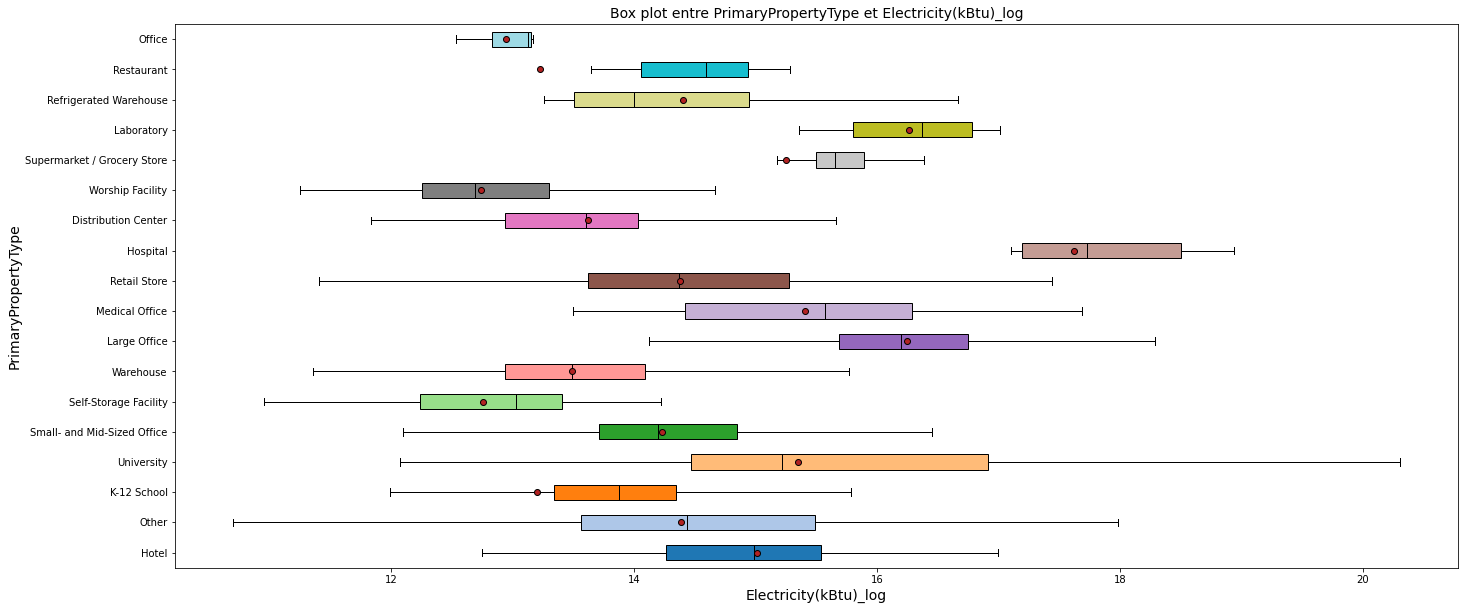

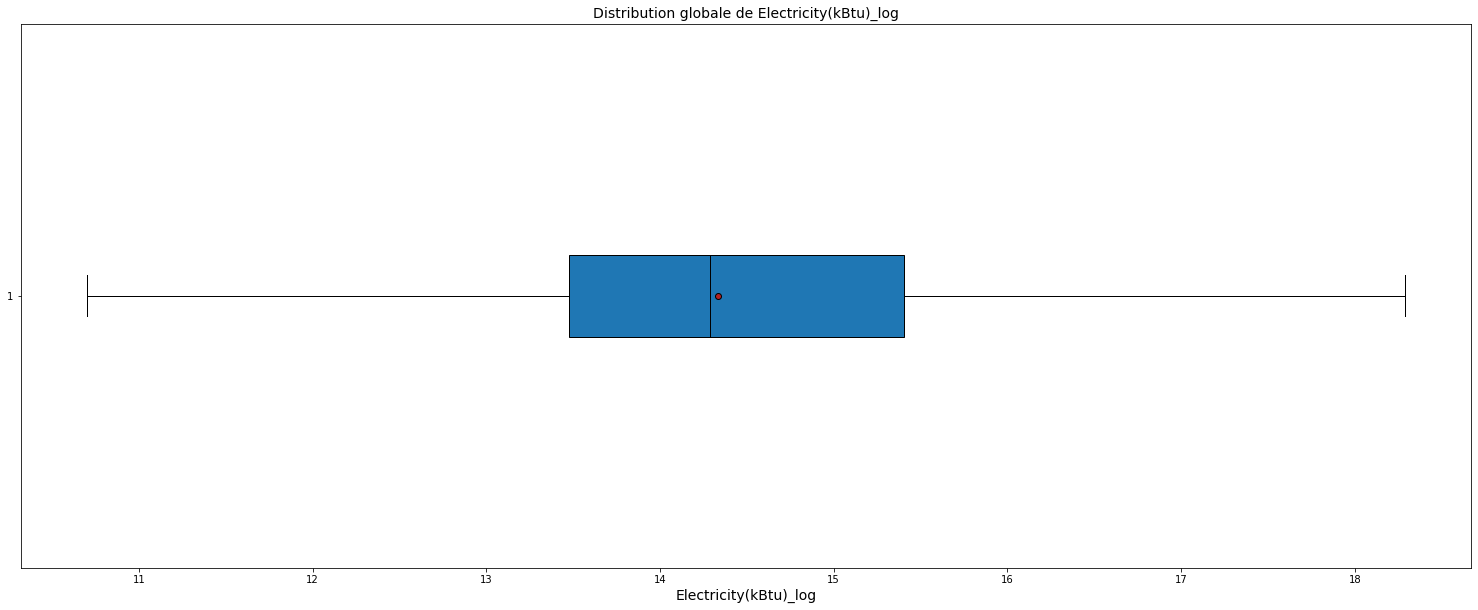

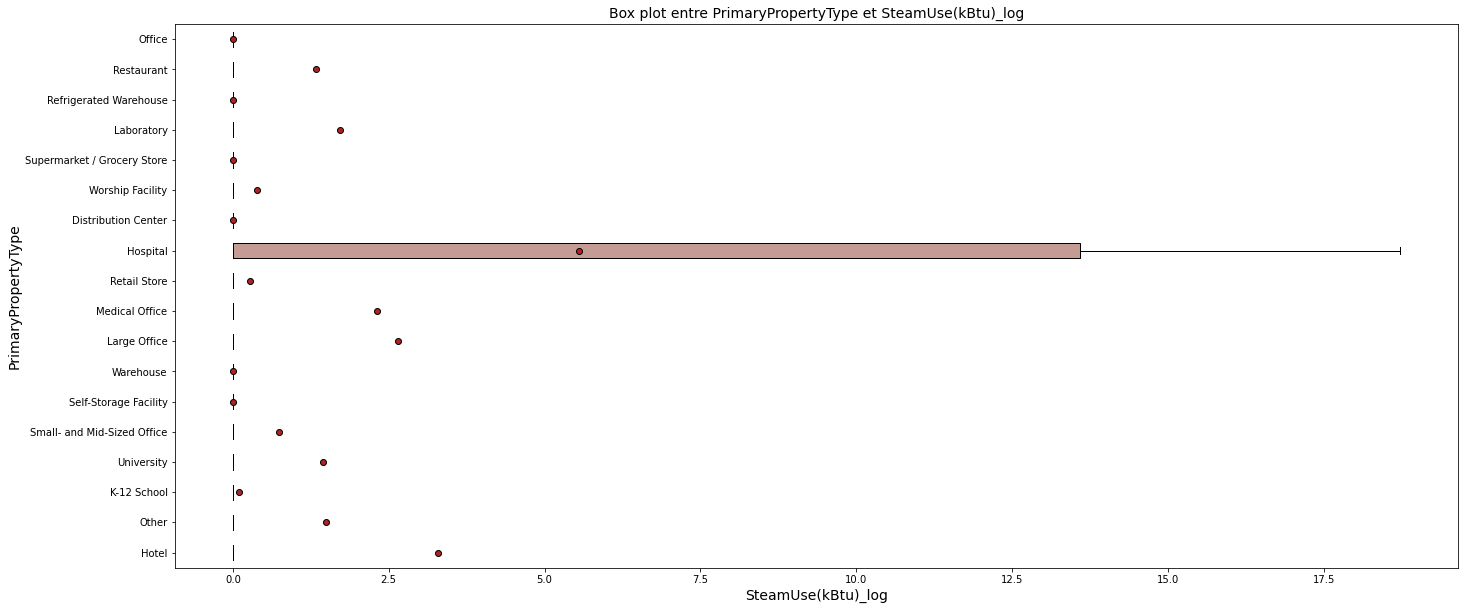

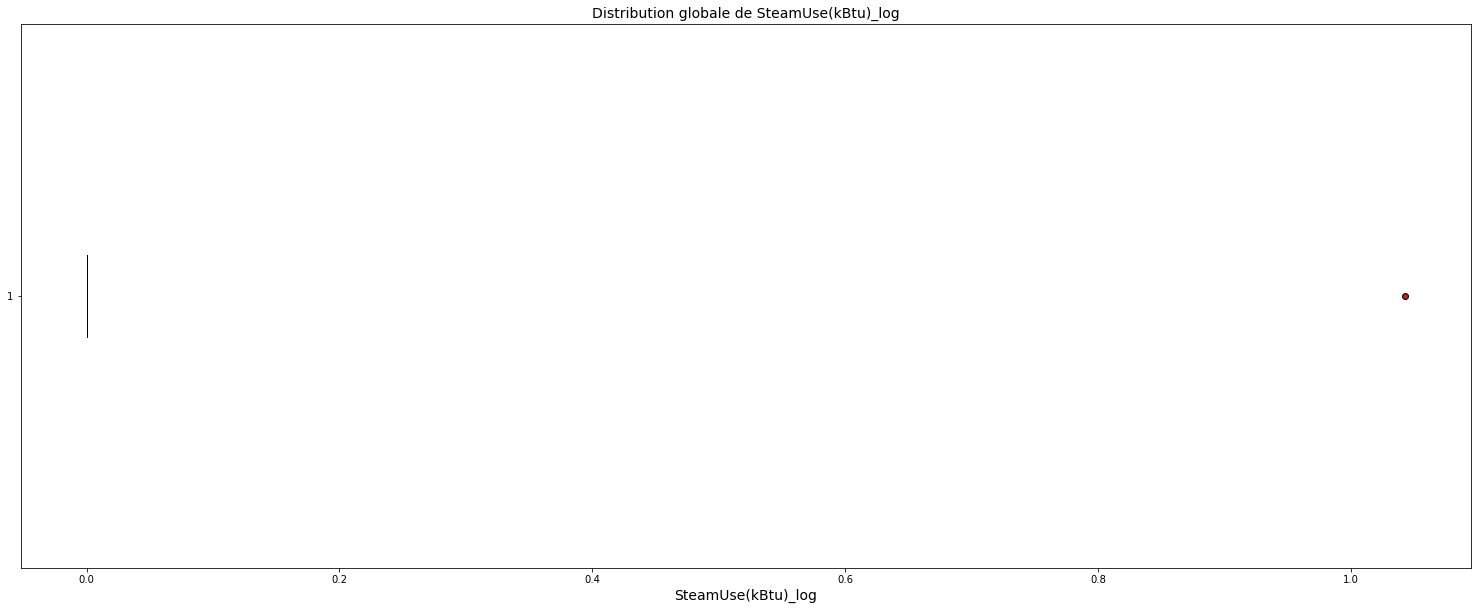

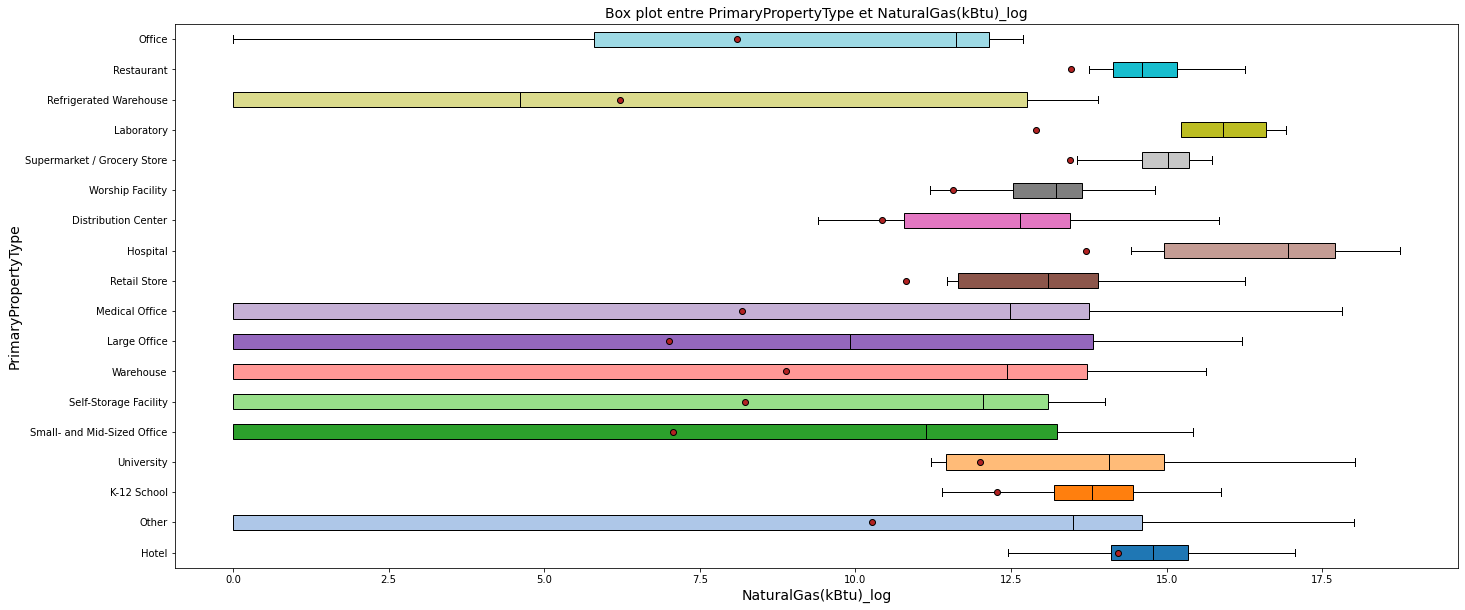

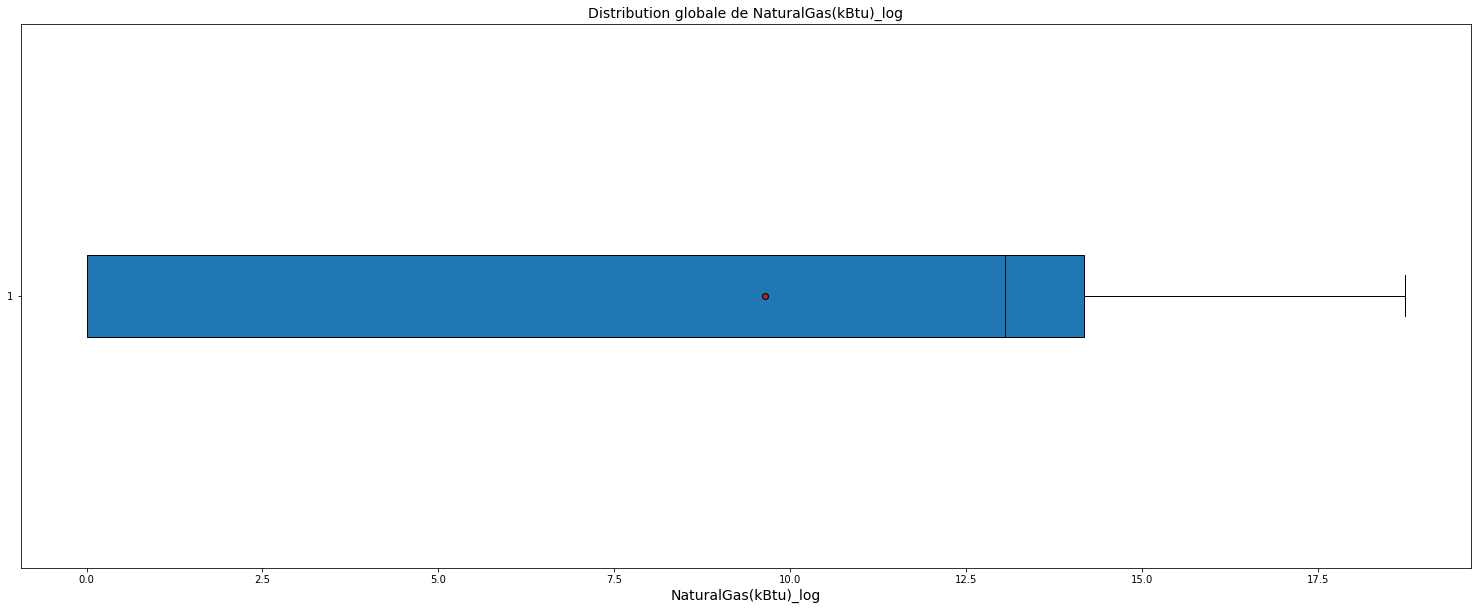

In [590]:
for col in list_energie_log:
    fct.boxplot(df, 'PrimaryPropertyType' , col)

### Observations:

On pourrait utiliser la moyenne de la distribution pour chaque variable de la liste ['Electricity(kBtu)_log', 'SteamUse(kBtu)_log', 'NaturalGas(kBtu)_log'] selon chaque catégorie de `PrimaryPropertyType` et les comparer aux quantiles de la distribution globale de chaque variable de la liste pour extraire une nouvelle variable catégorielle. Cette nouvelle variable catégorielle pourrait contenir les valeurs `High`, `Medium`, et `Low`, en fonction des seuils suivants :

- **High :** Si la moyenne de la variable de la liste pour un type de propriété est supérieure au 66ème percentile de la distribution globale.
- **Low :** Si la moyenne de la variable de la liste pour un type de propriété est inférieure au 33ème percentile de la distribution globale.
- **Medium :** Si la moyenne de la variable de la liste pour un type de propriété se situe entre le 33ème et le 66ème percentiles de la distribution globale.

9. 1. 2. **Pour le graphique Electricity(kBtu)_log en fonction du PrimaryPropertyType:**

In [591]:
df['Electricity(kBtu)_log'].value_counts().head(30)

0.000000     11
13.611568     2
14.505901     1
14.739962     1
14.286816     1
14.110695     1
17.107437     1
12.903774     1
13.408253     1
13.868831     1
15.062128     1
14.240995     1
15.188220     1
13.410157     1
13.669450     1
14.243023     1
13.313228     1
13.317751     1
14.929518     1
13.733472     1
12.407371     1
11.182030     1
12.922888     1
13.617711     1
14.506139     1
15.147256     1
13.671787     1
13.879580     1
14.029147     1
14.346128     1
Name: Electricity(kBtu)_log, dtype: int64

On affiche le histplot de la variable 'Electricity(kBtu)_log' :

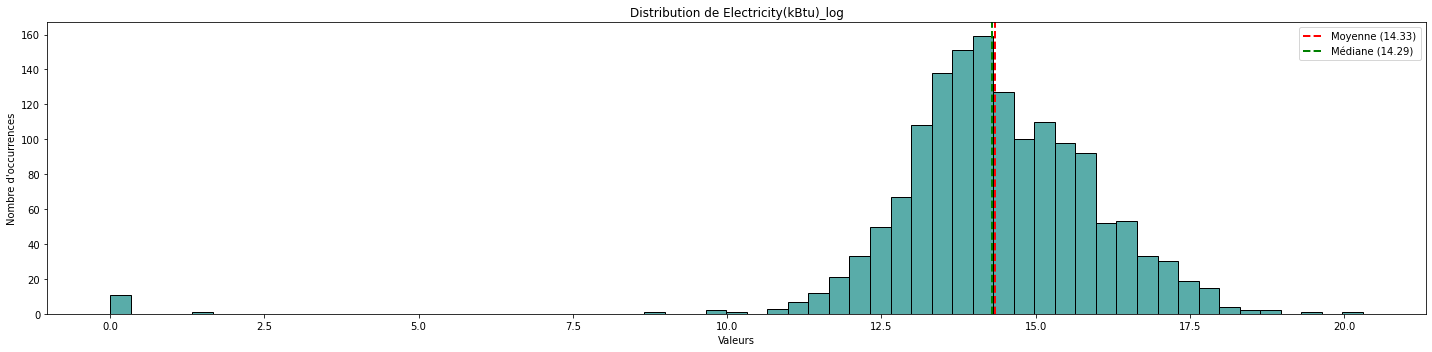

In [592]:
fct.distribution_histplot(df, cols='Electricity(kBtu)_log')

On remarque pas mal de valeurs 0 à prendre en compte lors de la création de la variable catégorielle.

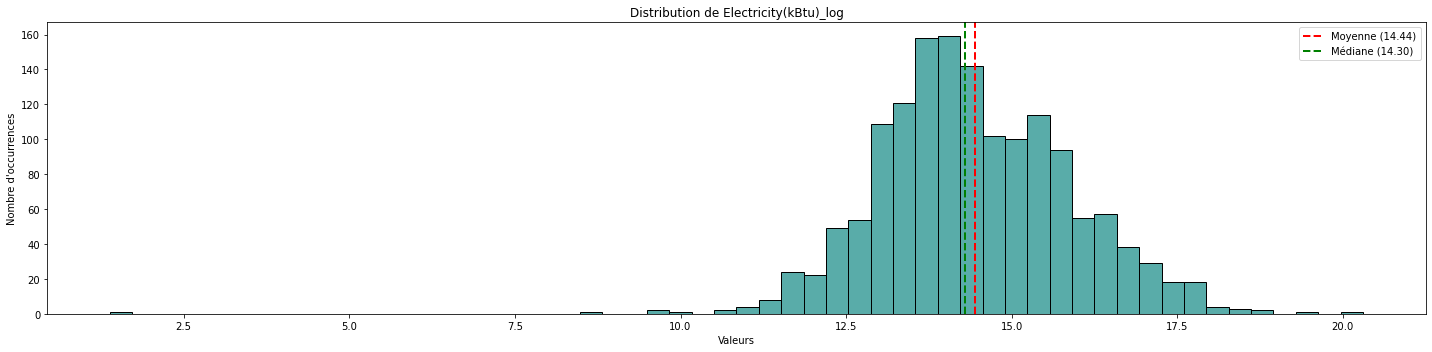

In [593]:
fct.distribution_histplot(df[df['Electricity(kBtu)_log'] > 0], cols='Electricity(kBtu)_log')

On affiche le boxplot de la variable 'Electricity(kBtu)_log' en fonction de chaque catégorie de la variable 'PrimaryPropertyType':

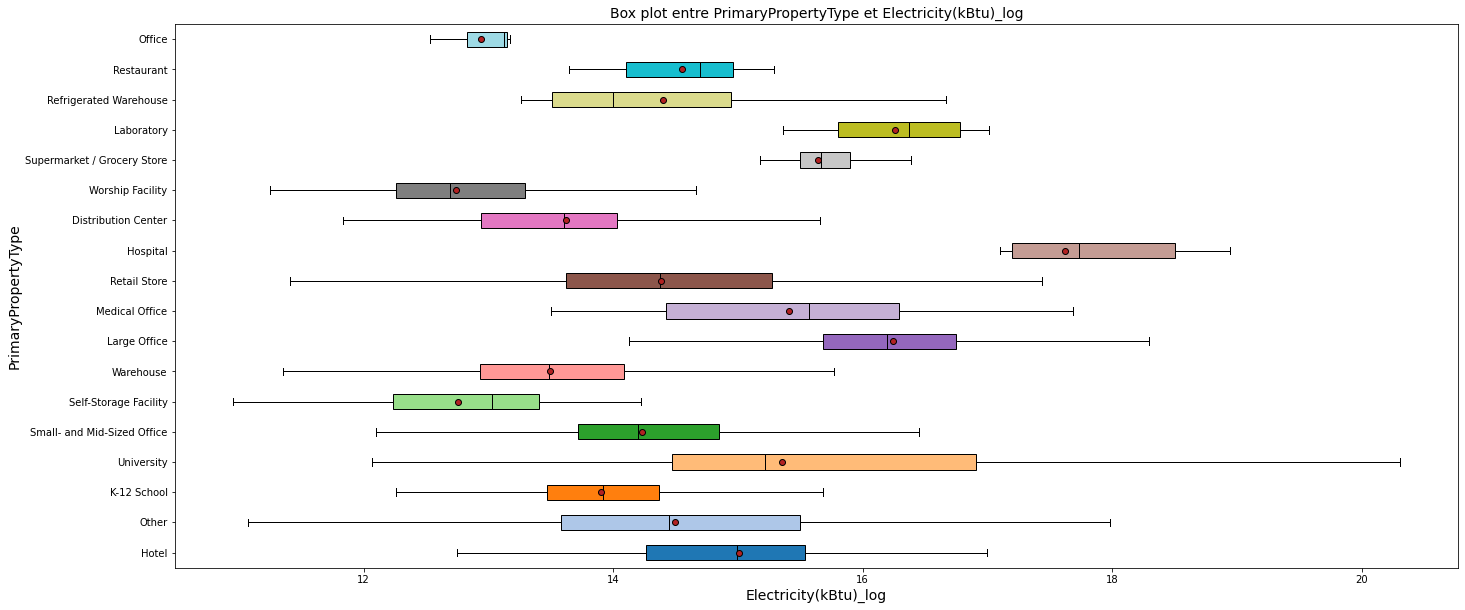

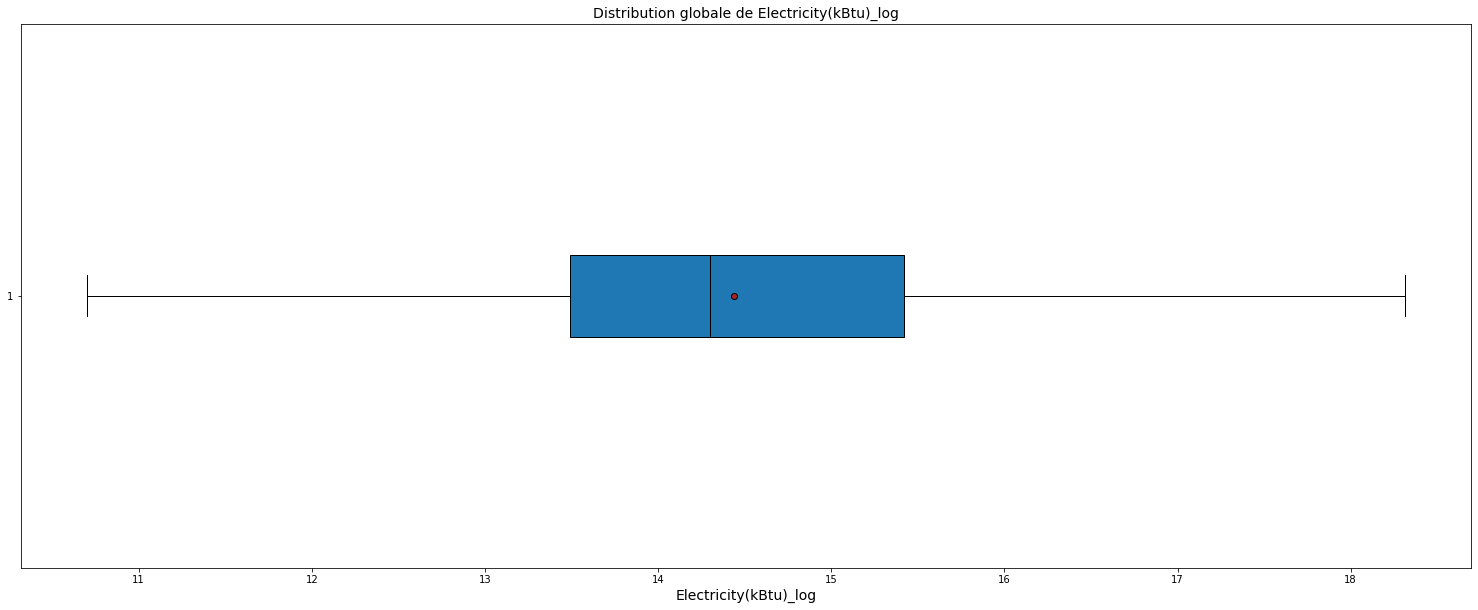

In [594]:
fct.boxplot(df[df['Electricity(kBtu)_log'] > 0], 'PrimaryPropertyType' , 'Electricity(kBtu)_log')

  PrimaryPropertyType  Electricity(kBtu)_log  \
0               Hotel              15.188220   
1               Hotel              14.991964   
2               Hotel              17.718022   
3               Hotel              14.833970   
4               Hotel              15.496079   

  ElectricityUseCategory_PrimaryPropertyType  
0                                  High_elec  
1                                  High_elec  
2                                  High_elec  
3                                  High_elec  
4                                  High_elec  

High_elec Category:
Hotel
University
Large Office
Medical Office
Hospital
Supermarket / Grocery Store
Laboratory

Medium_elec Category:
Other
K-12 School
Small- and Mid-Sized Office
Retail Store
Refrigerated Warehouse
Restaurant

Low_elec Category:
Self-Storage Facility
Warehouse
Distribution Center
Worship Facility
Office

Zero_elec Category:


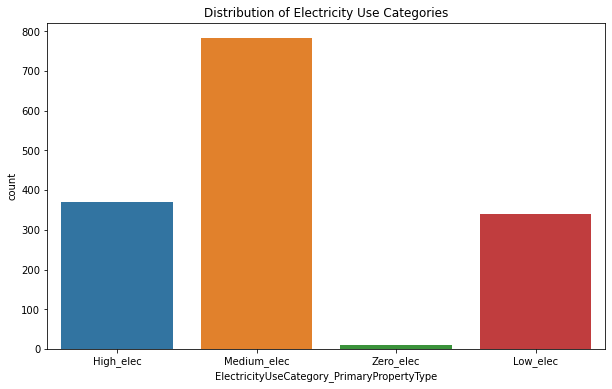

In [595]:
# Filtrer les valeurs nulles ou très faibles
df_filtered = df[df['Electricity(kBtu)_log'] > 0]

# Calculer la moyenne de 'Electricity(kBtu)_log' pour chaque 'PrimaryPropertyType'
average_electricity = df_filtered.groupby('PrimaryPropertyType')['Electricity(kBtu)_log'].mean()

# Définir les seuils basés sur les quantiles de la distribution de 'Electricity(kBtu)_log'
low_threshold = np.percentile(df_filtered['Electricity(kBtu)_log'], 33)
high_threshold = np.percentile(df_filtered['Electricity(kBtu)_log'], 66)

# Dictionnaires pour stocker les types de propriétés par catégorie
category_properties = {'High_elec': [], 'Medium_elec': [], 'Low_elec': [], 'Zero_elec': []}

# Fonction pour catégoriser en fonction de la moyenne de 'Electricity(kBtu)_log' par 'PrimaryPropertyType'
def categorize_property_type_electricity(row):
        
    avg_electricity = average_electricity[row['PrimaryPropertyType']]
    if avg_electricity > high_threshold:
        category = 'High_elec'
    elif avg_electricity < low_threshold:
        category = 'Low_elec'
    else:
        category = 'Medium_elec'
        
    if row['Electricity(kBtu)_log'] == 0:
        return 'Zero_elec'
    
    # Ajouter le type de propriété à la catégorie correspondante
    if row['PrimaryPropertyType'] not in category_properties[category]:
        category_properties[category].append(row['PrimaryPropertyType'])

    return category

# Appliquer la fonction pour créer la nouvelle colonne
df['ElectricityUseCategory_PrimaryPropertyType'] = df.apply(categorize_property_type_electricity, axis=1)

# Vérification des nouvelles données
print(df[['PrimaryPropertyType', 'Electricity(kBtu)_log', 'ElectricityUseCategory_PrimaryPropertyType']].head())

# Affichage des catégories de 'PrimaryPropertyType' par groupe de consommation d'électricité
for category in category_properties:
    print(f"\n{category} Category:")
    for property_type in category_properties[category]:
        print(f"{property_type}")

# Visualisation de la nouvelle variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(x='ElectricityUseCategory_PrimaryPropertyType', data=df)
plt.title('Distribution of Electricity Use Categories')
plt.show()




9. 1. 3. **Pour le graphique SteamUse(kBtu)_log en fonction du PrimaryPropertyType:**

In [596]:
df['SteamUse(kBtu)_log'].value_counts().head(30)

0.000000     1396
14.241224       1
14.369178       1
13.968521       1
13.962308       1
15.090468       1
13.690663       1
13.018165       1
11.929947       1
18.720366       1
15.213606       1
14.367469       1
15.818865       1
15.622190       1
14.309806       1
14.875925       1
12.492240       1
14.542415       1
15.094760       1
13.809649       1
13.801821       1
15.871640       1
12.757682       1
12.898067       1
13.555555       1
15.547227       1
12.350131       1
14.510597       1
13.074732       1
13.214570       1
Name: SteamUse(kBtu)_log, dtype: int64

On affiche le histplot de la variable 'SteamUse(kBtu)_log' :

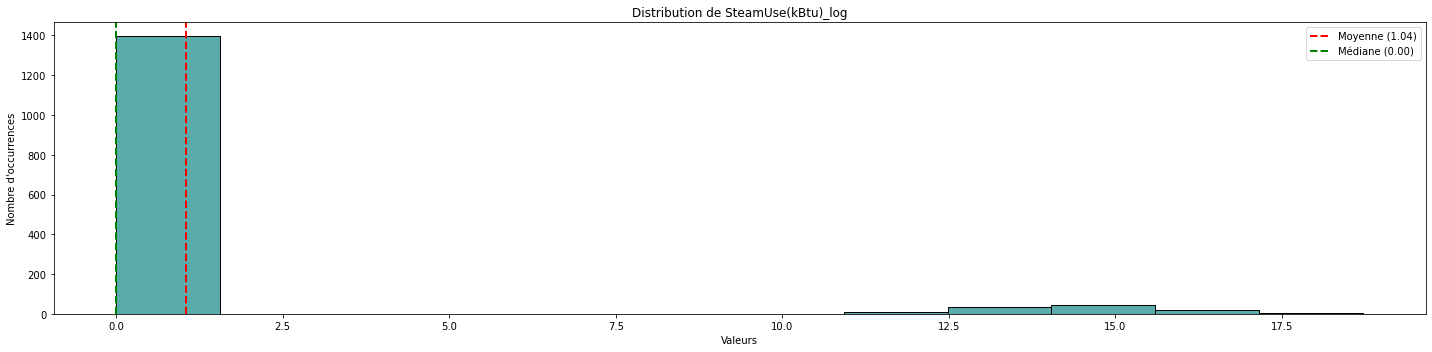

In [597]:
fct.distribution_histplot(df, cols='SteamUse(kBtu)_log')

On remarque pas mal de valeurs 0 à prendre en compte lors de la création de la variable catégorielle.

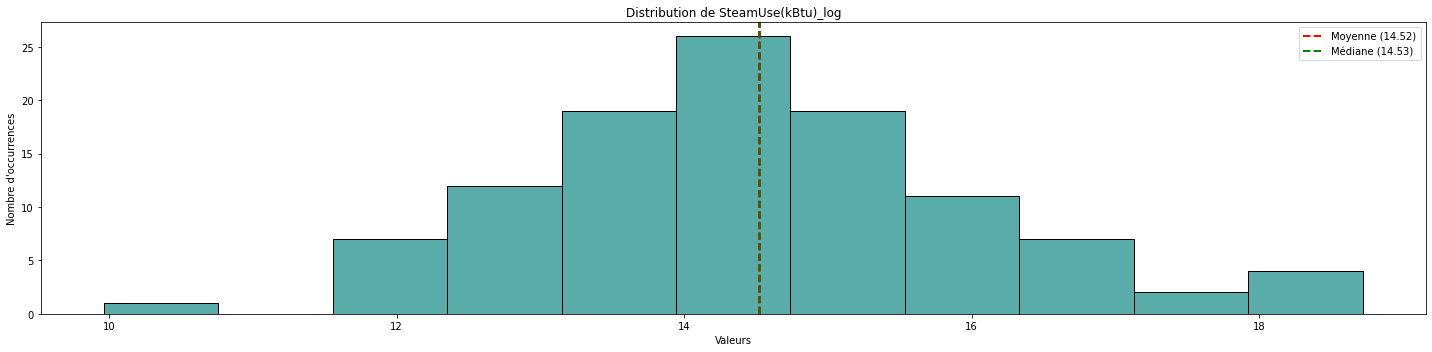

In [598]:
fct.distribution_histplot(df[df['SteamUse(kBtu)_log'] > 0], cols='SteamUse(kBtu)_log')

On affiche le boxplot de la variable 'SteamUse(kBtu)_log' en fonction de chaque catégorie de la variable 'PrimaryPropertyType':

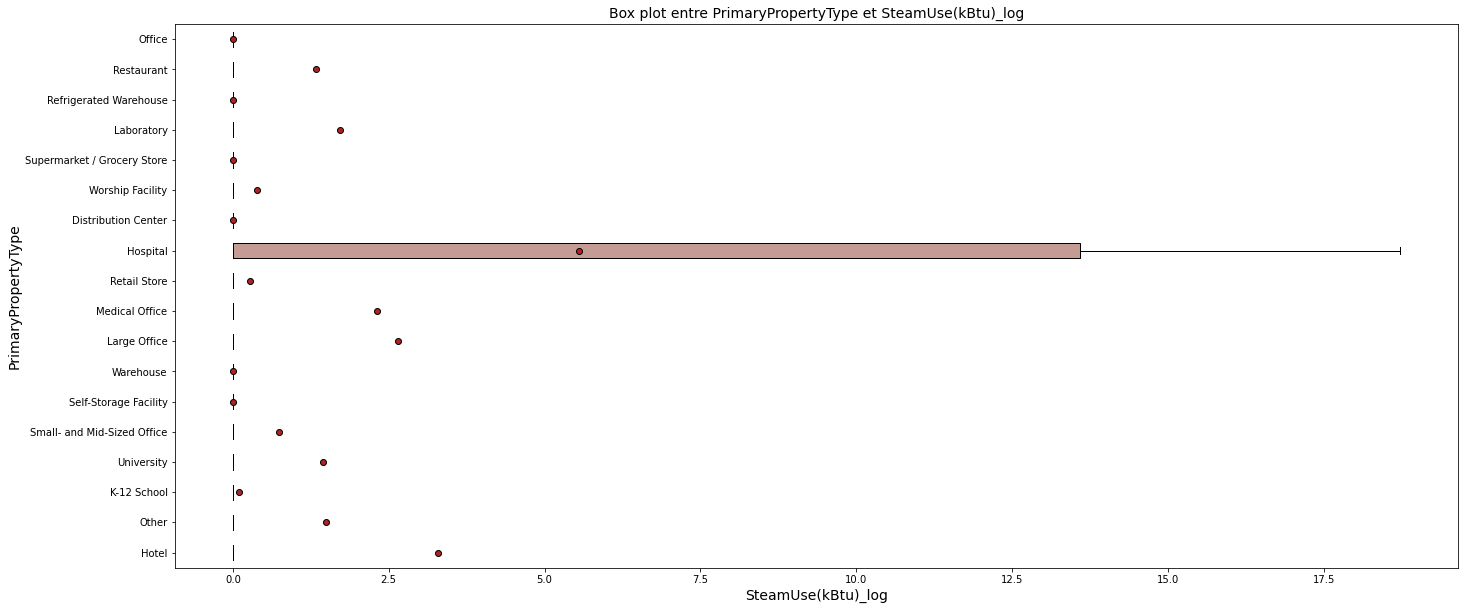

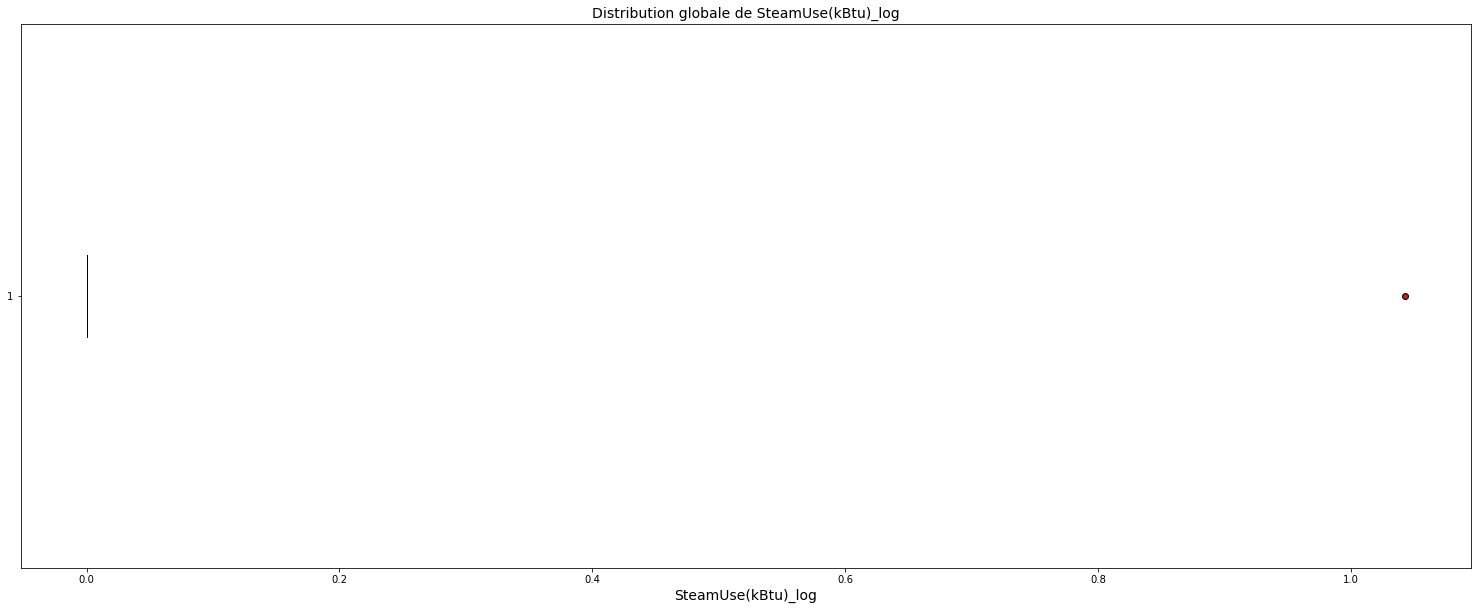

In [599]:
fct.boxplot(df, 'PrimaryPropertyType' , 'SteamUse(kBtu)_log')

On remarque que la consommation de vapeur très élevée observée dans les hôpitaux peut être due à leurs besoins en chauffage et en stérilisation. On peut également écarter cette catégorie de la distribution ainsi les valeurs 0:

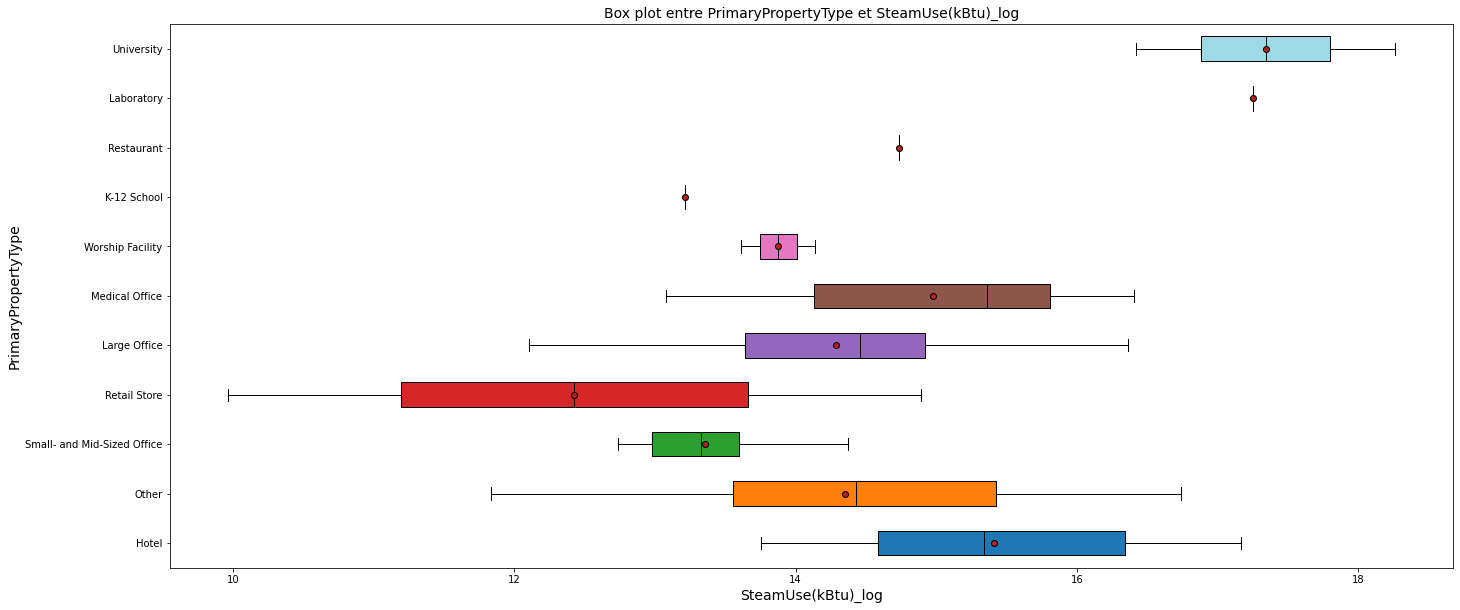

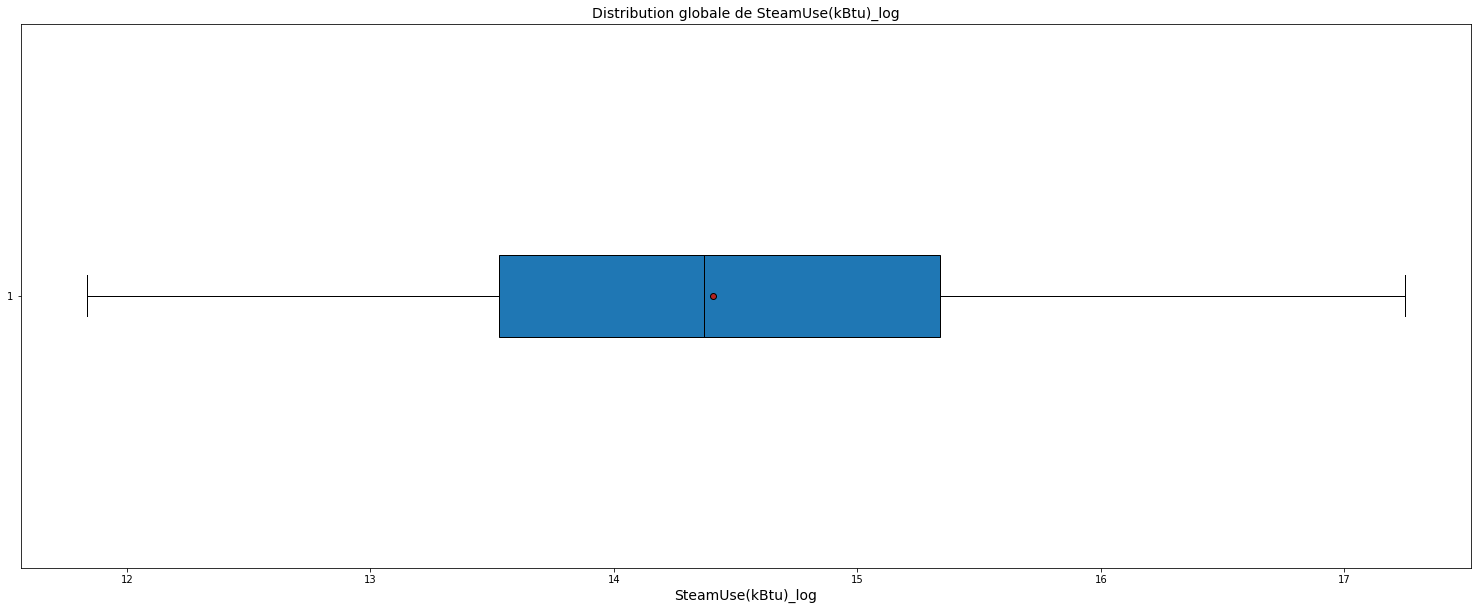

In [600]:
fct.boxplot(df[(df['PrimaryPropertyType'] != 'Hospital') & (df['SteamUse(kBtu)_log'] > 0)], 'PrimaryPropertyType', 'SteamUse(kBtu)_log')


  PrimaryPropertyType  SteamUse(kBtu)_log SteamUseCategory_PrimaryPropertyType
0               Hotel           14.510597                           High_steam
1               Hotel            0.000000                           Zero_Steam
2               Hotel           16.886654                           High_steam
3               Hotel           14.610513                           High_steam
4               Hotel            0.000000                           Zero_Steam

High_steam Category:
Hotel
Laboratory
University

Medium_steam Category:
Other
Large Office
Medical Office
Worship Facility
Restaurant

Low_steam Category:
Small- and Mid-Sized Office
Retail Store
K-12 School


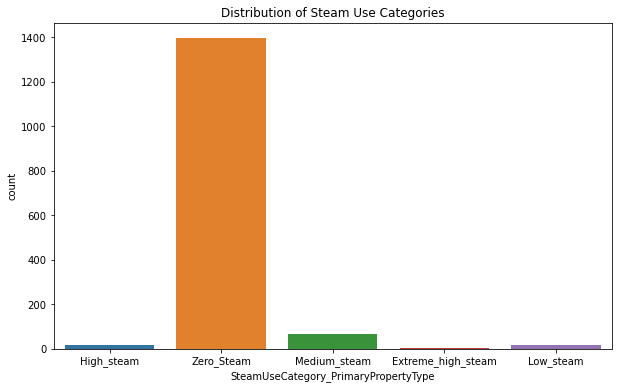

In [601]:
# Filtrer les valeurs nulles ou très faibles
df_filtered = df[(df['PrimaryPropertyType'] != 'Hospital') & (df['SteamUse(kBtu)_log'] > 0)]

# Calculer la moyenne de 'SteamUse(kBtu)_log' pour chaque 'PrimaryPropertyType'
average_steam = df_filtered.groupby('PrimaryPropertyType')['SteamUse(kBtu)_log'].mean()

# Définir les seuils basés sur les quantiles de la distribution de 'SteamUse(kBtu)_log'
low_threshold = np.percentile(df_filtered['SteamUse(kBtu)_log'], 33)
high_threshold = np.percentile(df_filtered['SteamUse(kBtu)_log'], 66)

# Dictionnaires pour stocker les types de propriétés par catégorie
category_properties = {'High_steam': [], 'Medium_steam': [], 'Low_steam': []}

# Fonction pour catégoriser en fonction de la moyenne de 'SteamUse(kBtu)_log' par 'PrimaryPropertyType'
def categorize_property_type_steam(row):
    if row['PrimaryPropertyType'] == 'Hospital' and row['SteamUse(kBtu)_log'] != 0:
        return 'Extreme_high_steam'
    
    if row['PrimaryPropertyType'] == 'Hospital' and row['SteamUse(kBtu)_log'] == 0:
        return 'Zero_Steam'
    
    if row['SteamUse(kBtu)_log'] == 0:
        return 'Zero_Steam'
    
    avg_steam = average_steam[row['PrimaryPropertyType']]
    if avg_steam > high_threshold:
        category = 'High_steam'
    elif avg_steam < low_threshold:
        category = 'Low_steam'
    else:
        category = 'Medium_steam'
    
    # Ajouter le type de propriété à la catégorie correspondante
    if row['PrimaryPropertyType'] not in category_properties[category]:
        category_properties[category].append(row['PrimaryPropertyType'])

    return category

# Appliquer la fonction pour créer la nouvelle colonne
df['SteamUseCategory_PrimaryPropertyType'] = df.apply(categorize_property_type_steam, axis=1)

# Vérification des nouvelles données
print(df[['PrimaryPropertyType', 'SteamUse(kBtu)_log', 'SteamUseCategory_PrimaryPropertyType']].head())

# Affichage des catégories de 'PrimaryPropertyType' par groupe de consommation de vapeur
for category in category_properties:
    print(f"\n{category} Category:")
    for property_type in category_properties[category]:
        print(f"{property_type}")

# Visualisation de la nouvelle variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(x='SteamUseCategory_PrimaryPropertyType', data=df)
plt.title('Distribution of Steam Use Categories')
plt.show()

9. 1. 4. **Pour le graphique NaturalGas(kBtu)_log en fonction du PrimaryPropertyType:**

In [602]:
df['NaturalGas(kBtu)_log'].value_counts().head(30)

0.000000     441
12.332031      2
14.059596      1
11.991083      1
13.496032      1
13.508684      1
13.567326      1
14.425410      1
14.594327      1
12.370213      1
12.615281      1
12.994955      1
13.934425      1
12.160416      1
13.759509      1
13.568415      1
13.773848      1
13.198480      1
15.008584      1
11.871117      1
12.156945      1
14.944076      1
14.003853      1
12.694459      1
13.718328      1
12.505136      1
14.239825      1
12.766959      1
14.910248      1
12.671287      1
Name: NaturalGas(kBtu)_log, dtype: int64

On affiche le histplot de la variable 'NaturalGas(kBtu)_log' :

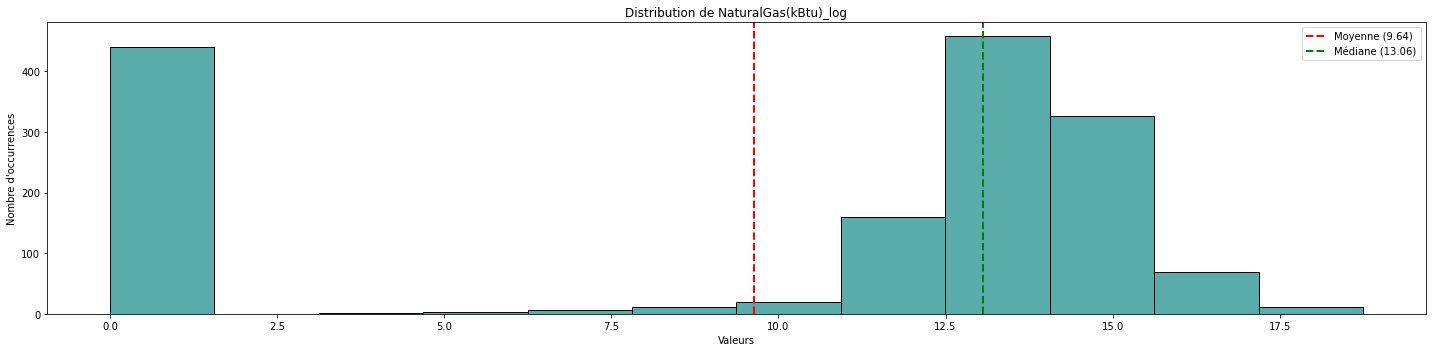

In [603]:
fct.distribution_histplot(df, cols='NaturalGas(kBtu)_log')

On remarque pas mal de valeurs 0 à prendre en compte lors de la création de la variable catégorielle.

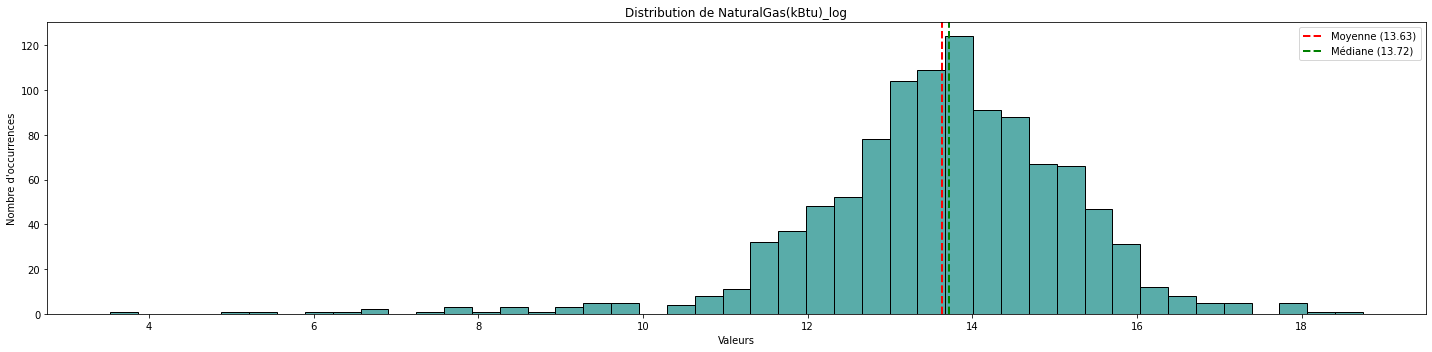

In [604]:
fct.distribution_histplot(df[df['NaturalGas(kBtu)_log'] > 0], cols='NaturalGas(kBtu)_log')

On affiche le boxplot de la variable 'NaturalGas(kBtu)_log' en fonction de chaque catégorie de la variable 'PrimaryPropertyType':

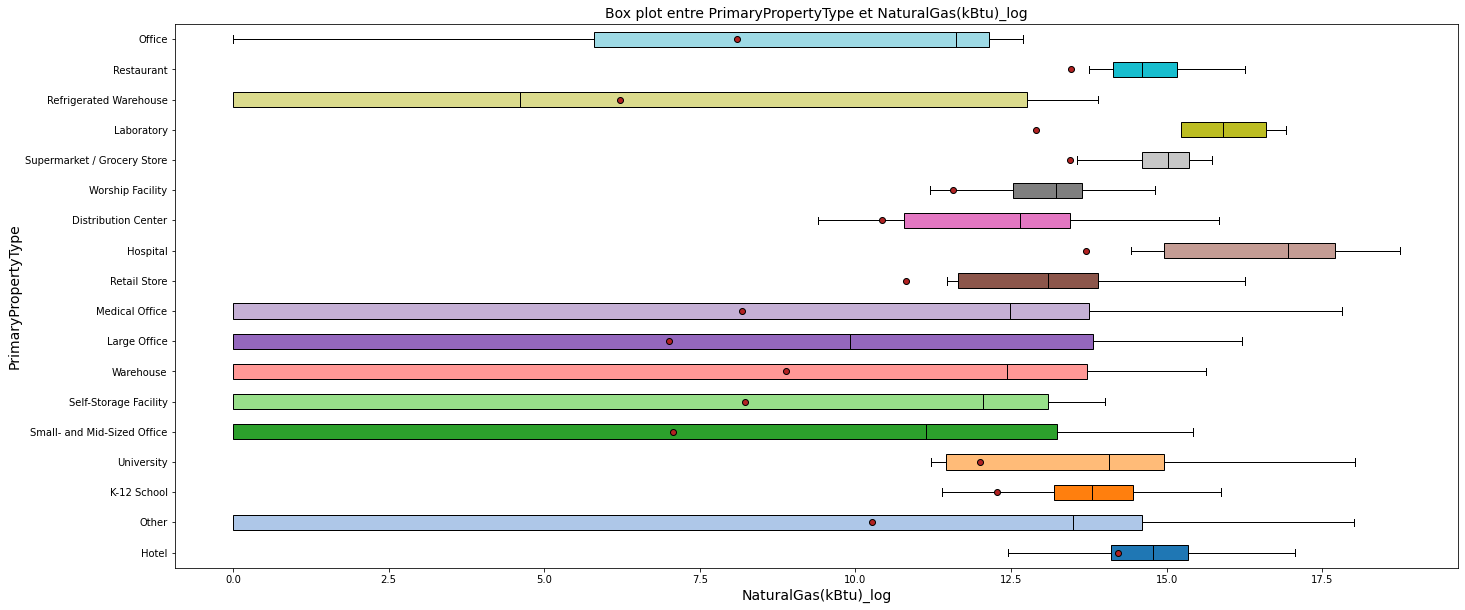

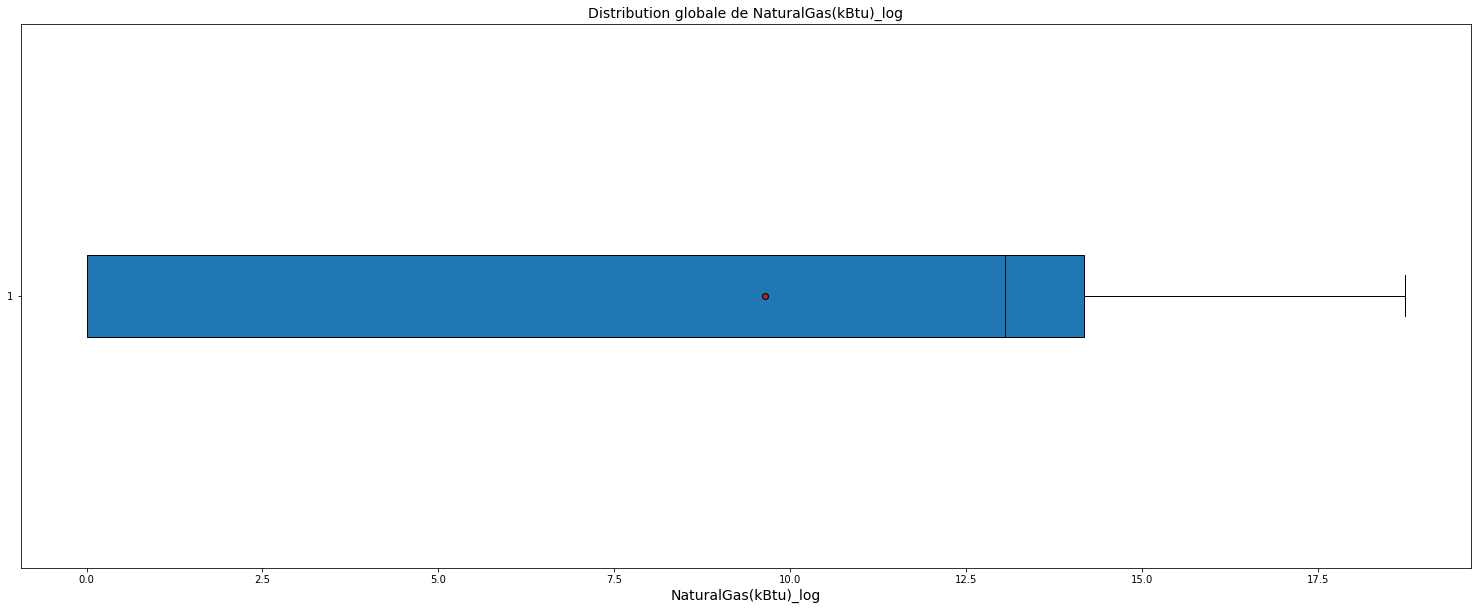

In [605]:
fct.boxplot(df, 'PrimaryPropertyType' , 'NaturalGas(kBtu)_log')

On peut écarter les valeurs 0 de la distribution:

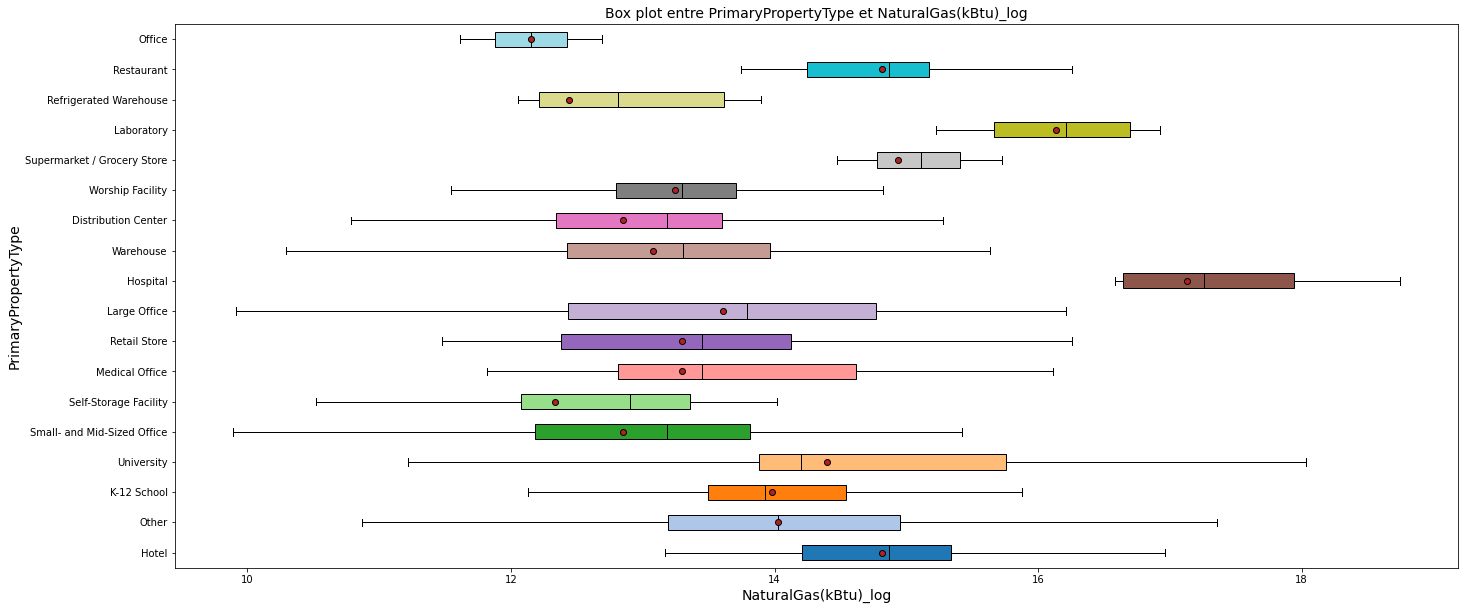

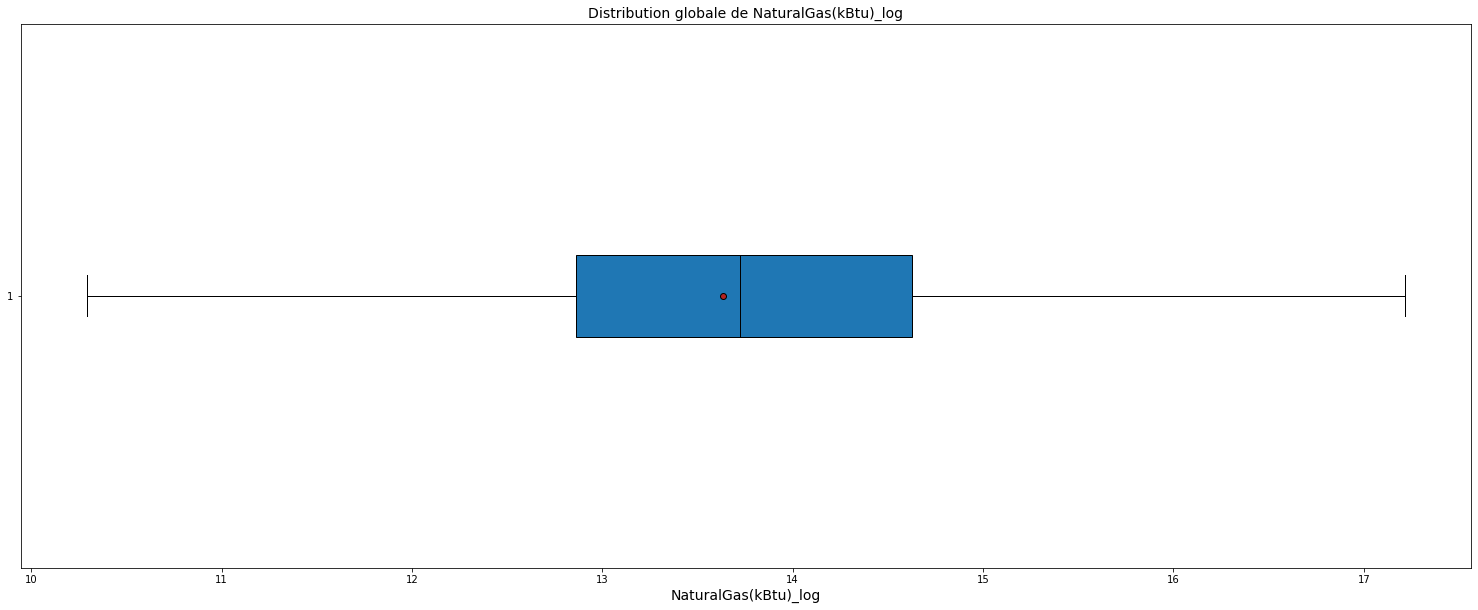

In [606]:
fct.boxplot(df[df['NaturalGas(kBtu)_log'] > 0], 'PrimaryPropertyType', 'NaturalGas(kBtu)_log')


  PrimaryPropertyType  NaturalGas(kBtu)_log  \
0               Hotel             14.059596   
1               Hotel             15.453552   
2               Hotel             14.216834   
3               Hotel             14.409508   
4               Hotel             15.990717   

  NaturalGasUseCategory_PrimaryPropertyType  
0                                  High_gas  
1                                  High_gas  
2                                  High_gas  
3                                  High_gas  
4                                  High_gas  

High_gas Category:
Hotel
University
Hospital
Supermarket / Grocery Store
Laboratory
Restaurant

Medium_gas Category:
Other
K-12 School
Medical Office
Retail Store
Large Office
Worship Facility

Low_gas Category:
Small- and Mid-Sized Office
Self-Storage Facility
Warehouse
Distribution Center
Refrigerated Warehouse
Office

Zero_gas Category:


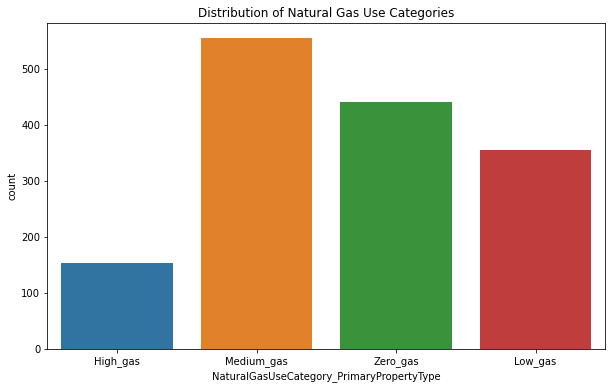

In [607]:
# Filtrer les valeurs nulles ou très faibles
df_filtered = df[df['NaturalGas(kBtu)_log'] > 0]

# Calculer la moyenne de 'NaturalGas(kBtu)_log' pour chaque 'PrimaryPropertyType'
average_natural_gas = df_filtered.groupby('PrimaryPropertyType')['NaturalGas(kBtu)_log'].mean()

# Définir les seuils basés sur les quantiles de la distribution de 'NaturalGas(kBtu)_log'
low_threshold = np.percentile(df_filtered['NaturalGas(kBtu)_log'], 33)
high_threshold = np.percentile(df_filtered['NaturalGas(kBtu)_log'], 66)

# Dictionnaires pour stocker les types de propriétés par catégorie
category_properties = {'High_gas': [], 'Medium_gas': [], 'Low_gas': [], 'Zero_gas': []}

# Fonction pour catégoriser en fonction de la moyenne de 'NaturalGas(kBtu)_log' par 'PrimaryPropertyType'
def categorize_property_type_natural_gas(row):
        
    avg_natural_gas = average_natural_gas[row['PrimaryPropertyType']]
    if avg_natural_gas > high_threshold:
        category = 'High_gas'
    elif avg_natural_gas < low_threshold:
        category = 'Low_gas'
    else:
        category = 'Medium_gas'
    
    if row['NaturalGas(kBtu)_log'] == 0:
        return 'Zero_gas'
    
    # Ajouter le type de propriété à la catégorie correspondante
    if row['PrimaryPropertyType'] not in category_properties[category]:
        category_properties[category].append(row['PrimaryPropertyType'])

    return category

# Appliquer la fonction pour créer la nouvelle colonne
df['NaturalGasUseCategory_PrimaryPropertyType'] = df.apply(categorize_property_type_natural_gas, axis=1)

# Vérification des nouvelles données
print(df[['PrimaryPropertyType', 'NaturalGas(kBtu)_log', 'NaturalGasUseCategory_PrimaryPropertyType']].head())

# Affichage des catégories de 'PrimaryPropertyType' par groupe de consommation de gaz naturel
for category in category_properties:
    print(f"\n{category} Category:")
    for property_type in category_properties[category]:
        print(f"{property_type}")

# Visualisation de la nouvelle variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(x='NaturalGasUseCategory_PrimaryPropertyType', data=df)
plt.title('Distribution of Natural Gas Use Categories')
plt.show()



9. 2. 1.**Par rapport à la variable 'BuildingType':**

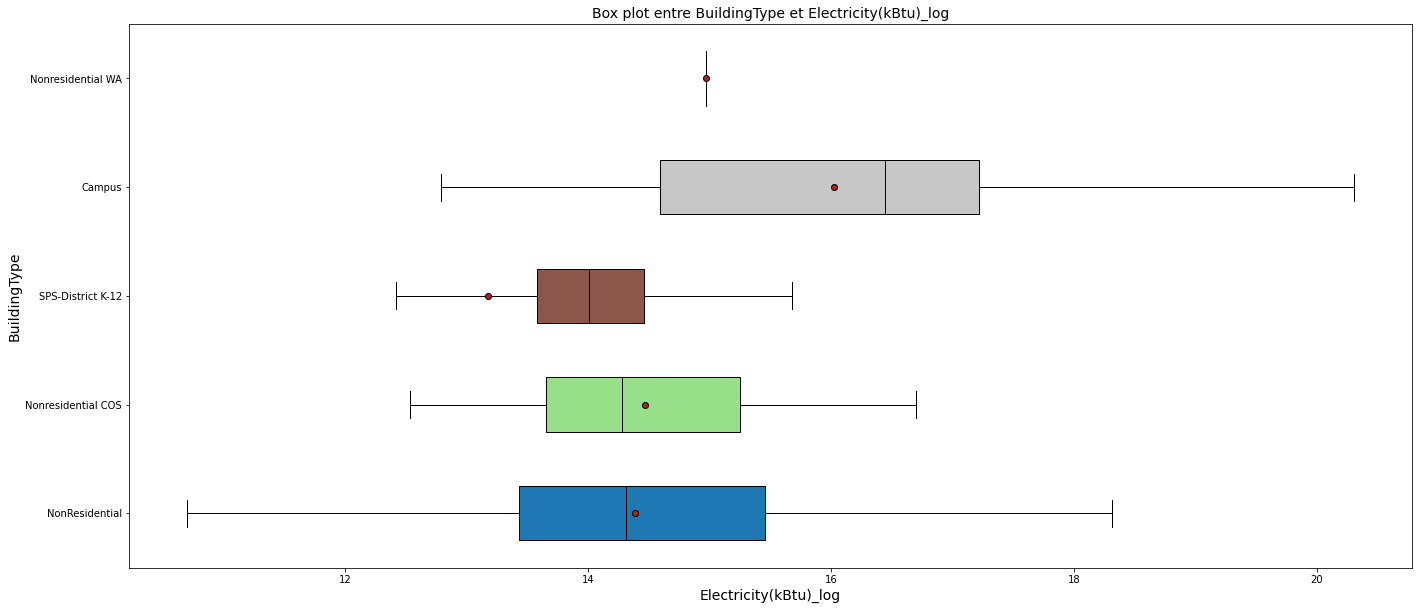

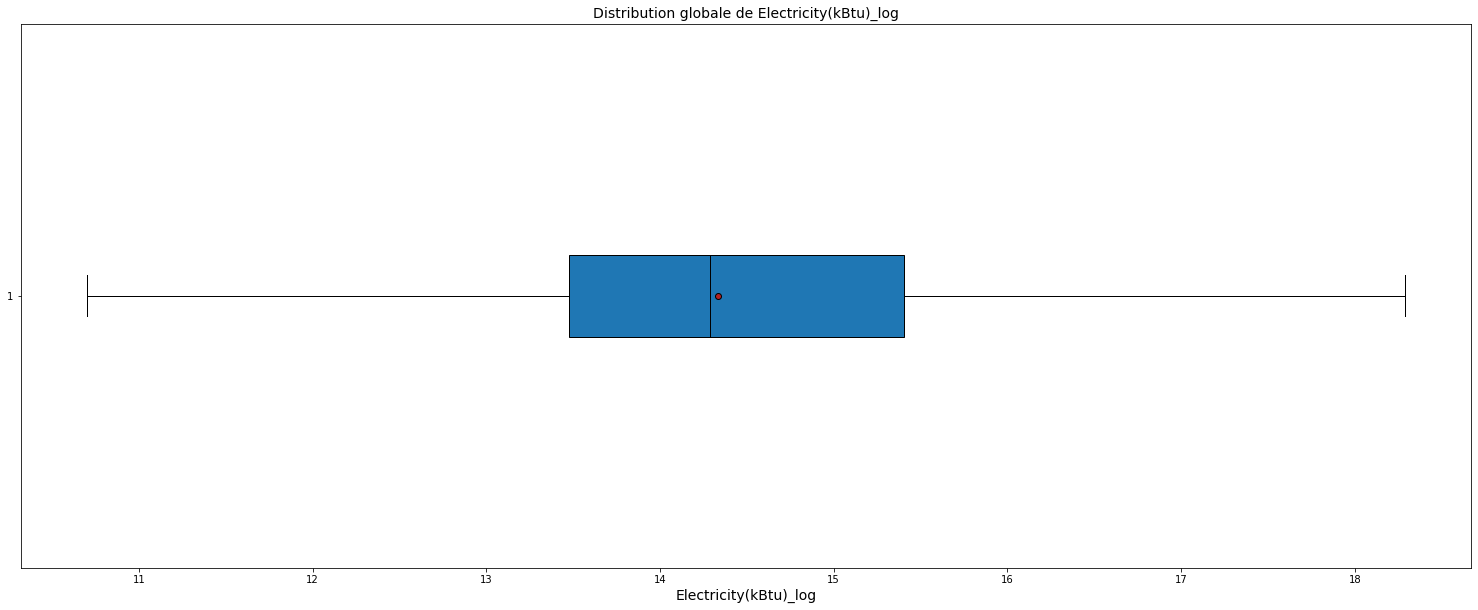

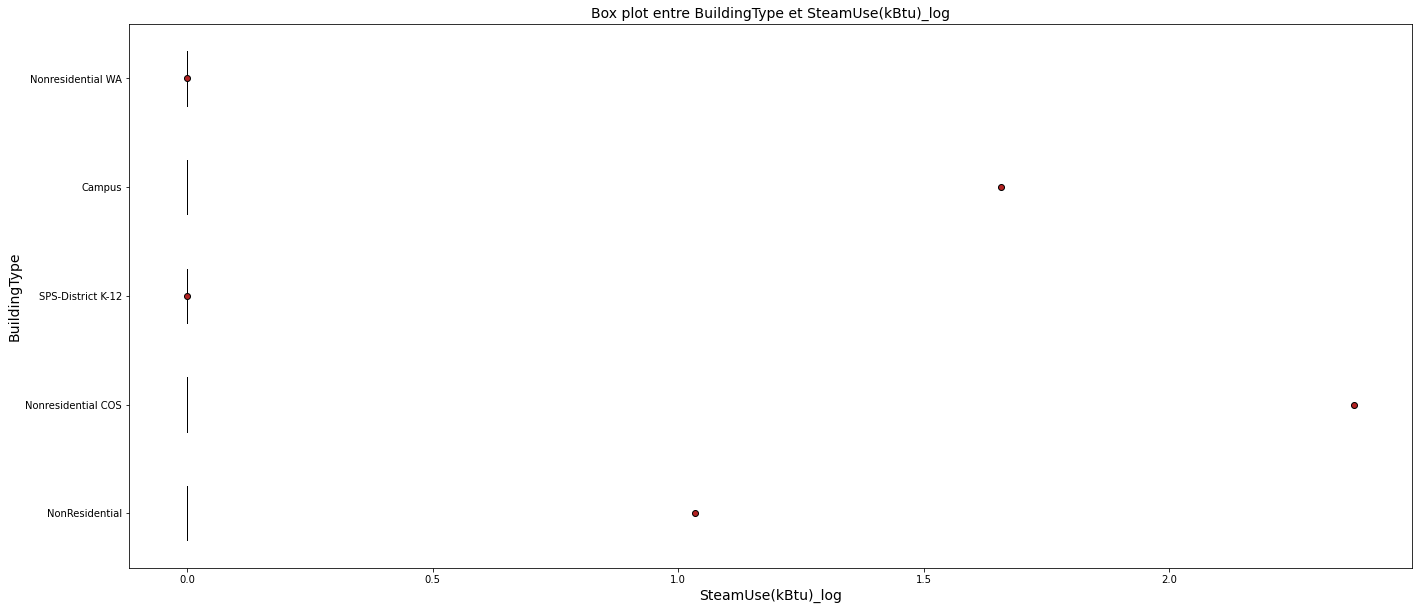

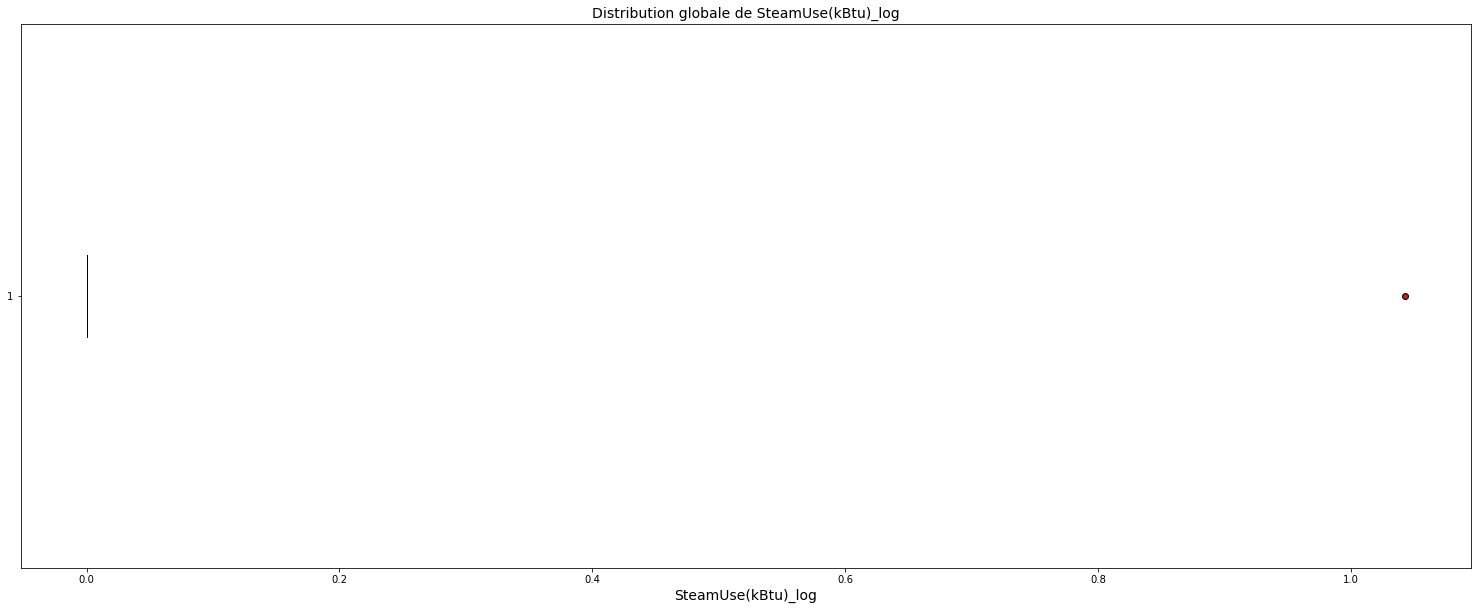

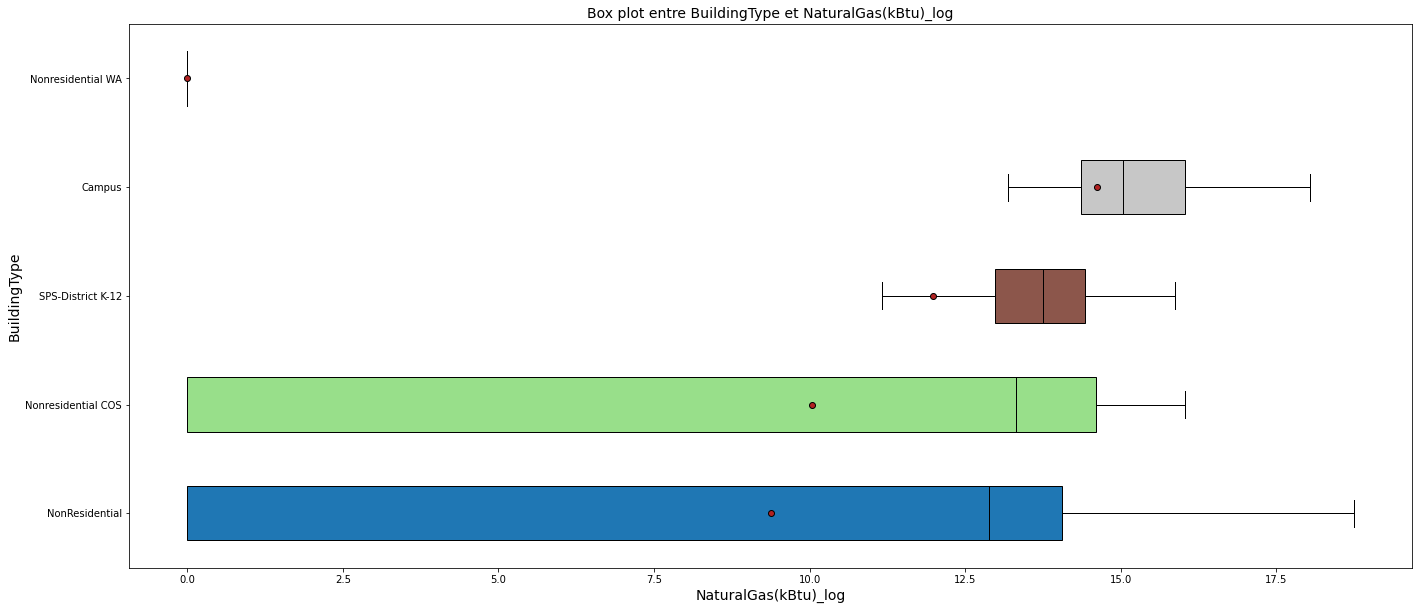

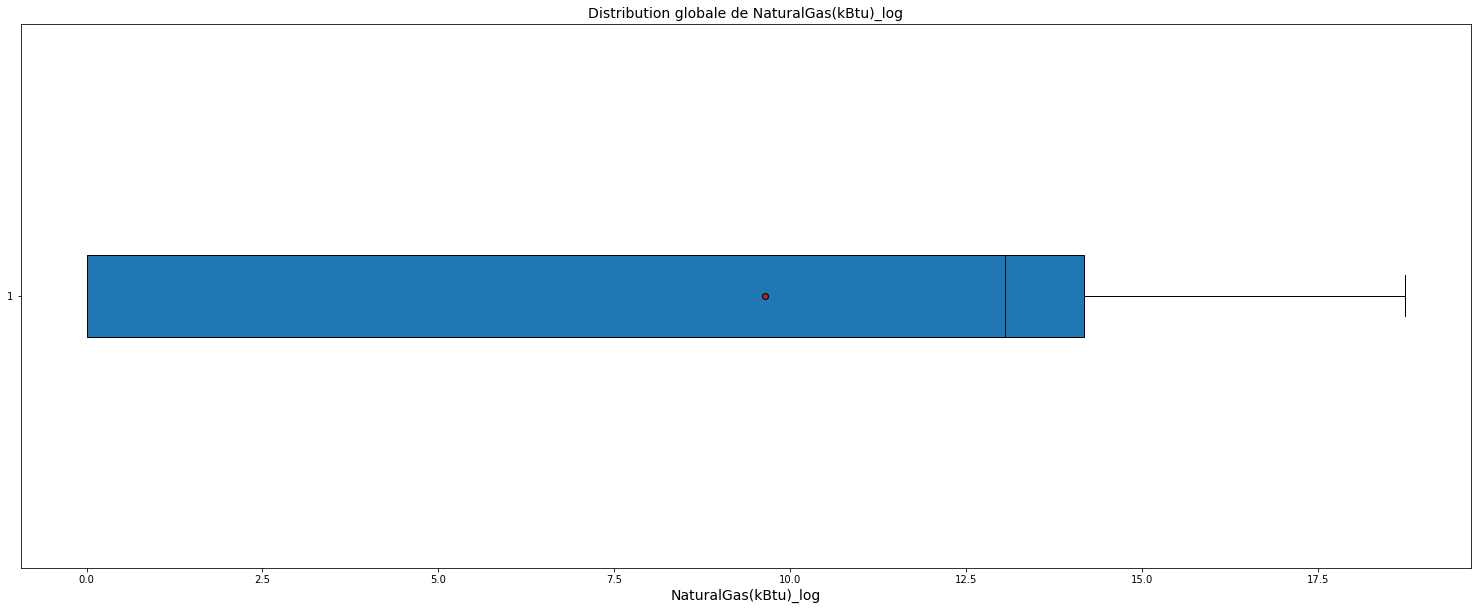

In [608]:
for col in list_energie_log:
    fct.boxplot(df, 'BuildingType', col)

### Observations:

On pourrait utiliser la moyenne de la distribution pour chaque variable de la liste ['Electricity(kBtu)_log', 'SteamUse(kBtu)_log', 'NaturalGas(kBtu)_log'] selon chaque catégorie de `BuildingType` et les comparer aux quantiles de la distribution globale de chaque variable de la liste pour extraire une nouvelle variable catégorielle. Cette nouvelle variable catégorielle pourrait contenir les valeurs `High`, `Medium`, et `Low`, en fonction des seuils suivants :

- **High :** Si la moyenne de la variable de la liste pour un type de bâtiment est supérieure au 66ème percentile de la distribution globale.
- **Low :** Si la moyenne de la variable de la liste pour un type de bâtiment est inférieure au 33ème percentile de la distribution globale.
- **Medium :** Si la moyenne de la variable de la liste pour un type de bâtiment se situe entre le 33ème et le 66ème percentiles de la distribution globale.

9. 2. 2. **Pour le graphique Electricity(kBtu)_log en fonction du BuildingType:**

In [609]:
df['Electricity(kBtu)_log'].value_counts().head(30)

0.000000     11
13.611568     2
14.505901     1
14.739962     1
14.286816     1
14.110695     1
17.107437     1
12.903774     1
13.408253     1
13.868831     1
15.062128     1
14.240995     1
15.188220     1
13.410157     1
13.669450     1
14.243023     1
13.313228     1
13.317751     1
14.929518     1
13.733472     1
12.407371     1
11.182030     1
12.922888     1
13.617711     1
14.506139     1
15.147256     1
13.671787     1
13.879580     1
14.029147     1
14.346128     1
Name: Electricity(kBtu)_log, dtype: int64

On affiche le histplot de la variable 'Electricity(kBtu)_log' :

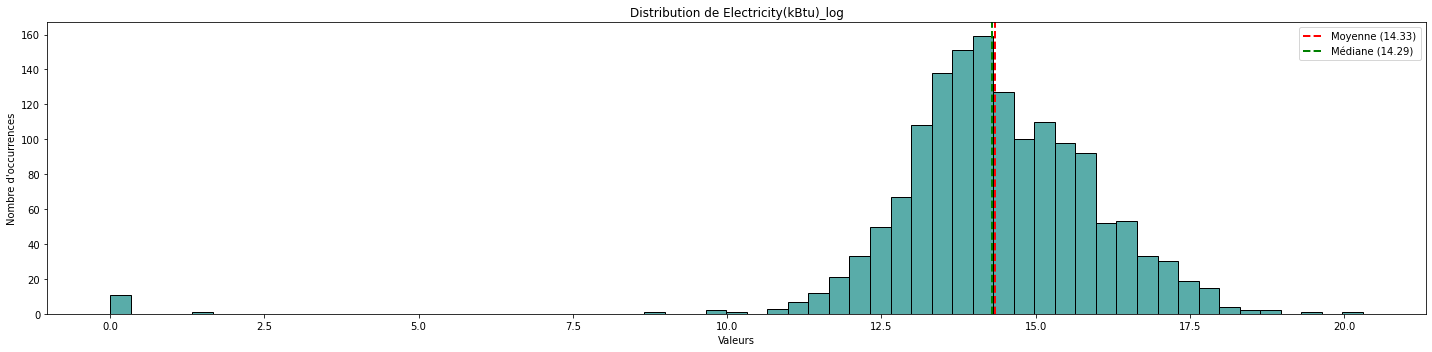

In [610]:
fct.distribution_histplot(df, cols='Electricity(kBtu)_log')

On remarque pas mal de valeurs 0 à prendre en compte lors de la création de la variable catégorielle.

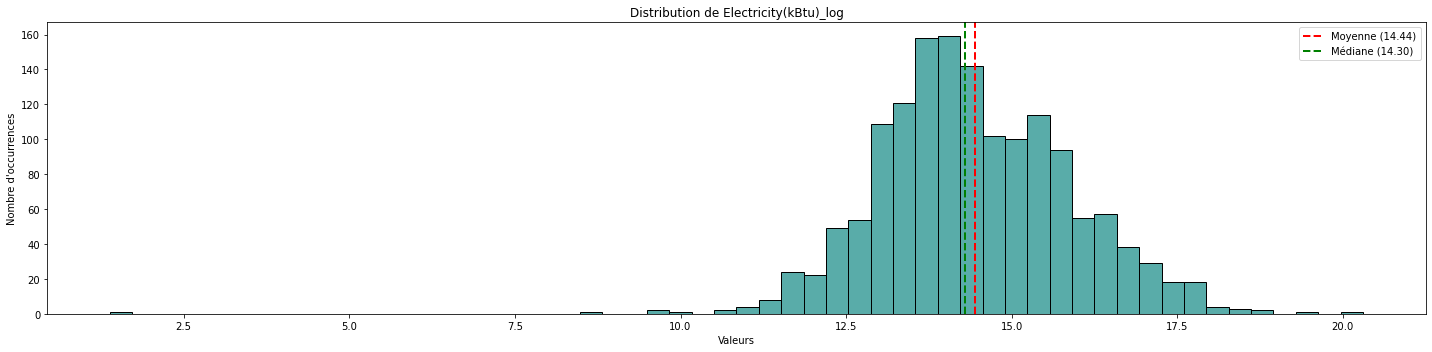

In [611]:
fct.distribution_histplot(df[df['Electricity(kBtu)_log'] > 0], cols='Electricity(kBtu)_log')

On affiche le boxplot de la variable 'Electricity(kBtu)_log' en fonction de chaque catégorie de la variable 'PrimaryPropertyType':

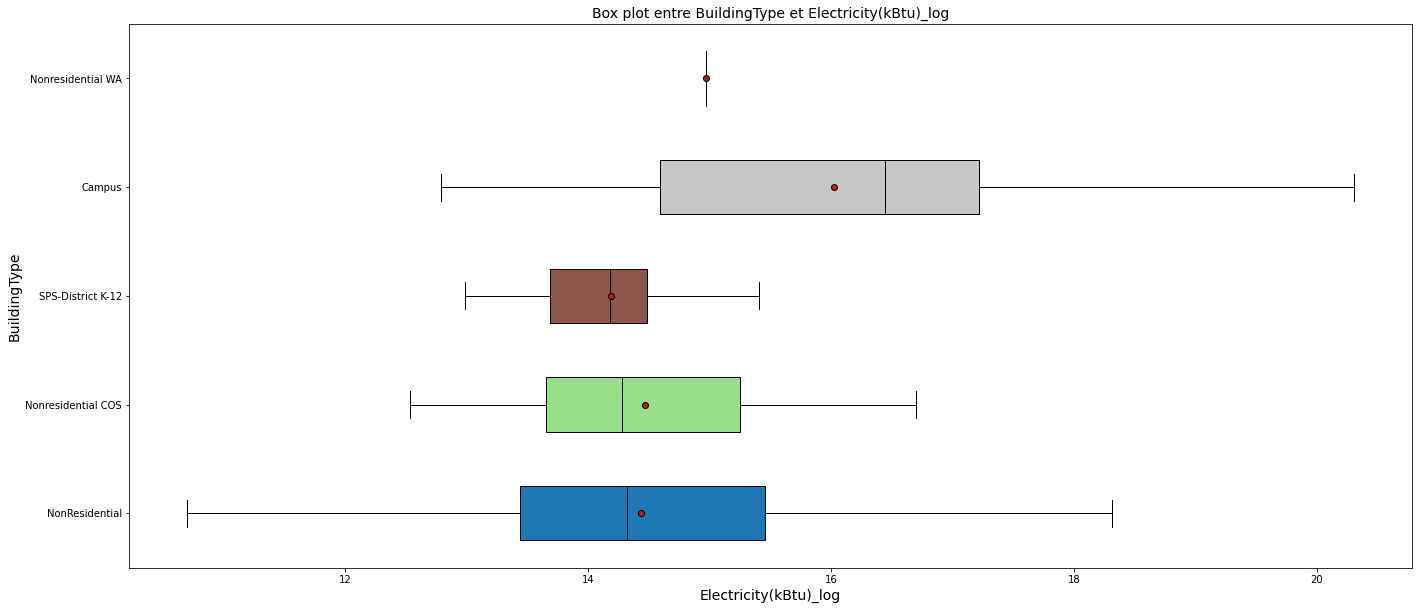

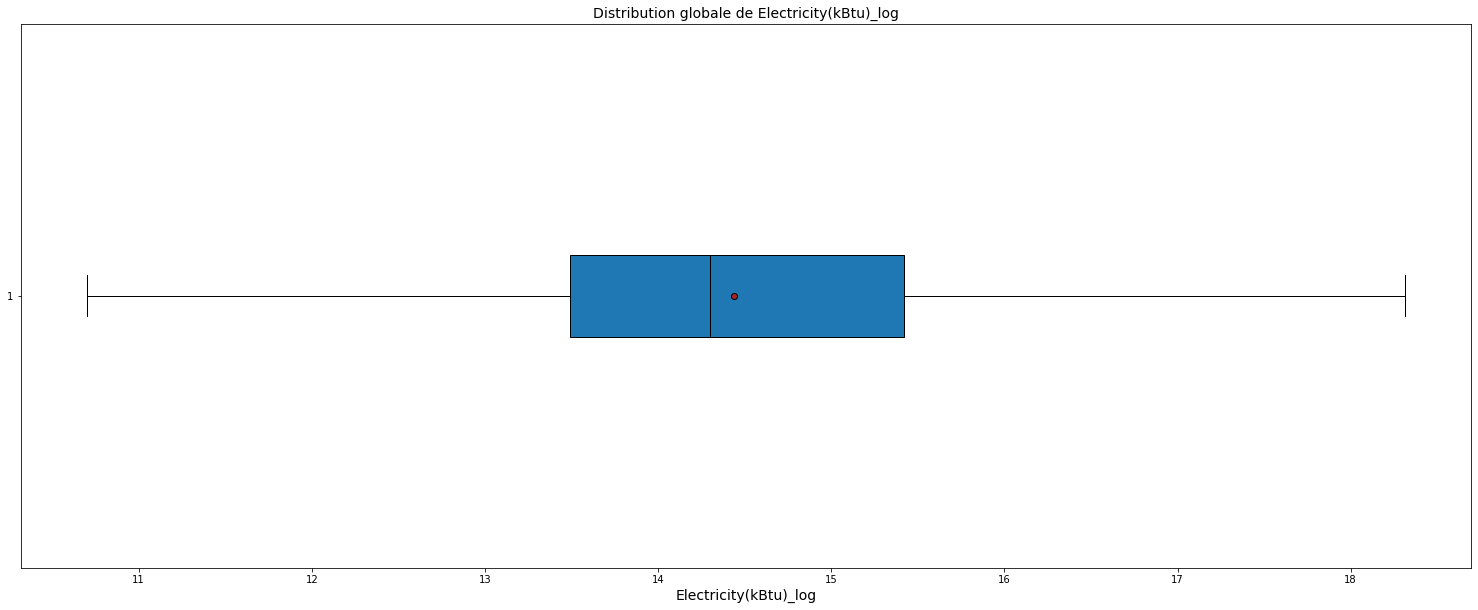

In [612]:
fct.boxplot(df[df['Electricity(kBtu)_log'] > 0], 'BuildingType' , 'Electricity(kBtu)_log')

     BuildingType  Electricity(kBtu)_log ElectricityUseCategory_BuildingType
0  NonResidential              15.188220                         Medium_elec
1  NonResidential              14.991964                         Medium_elec
2  NonResidential              17.718022                         Medium_elec
3  NonResidential              14.833970                         Medium_elec
4  NonResidential              15.496079                         Medium_elec

High_elec Category:
Campus

Medium_elec Category:
NonResidential
Nonresidential COS
Nonresidential WA

Low_elec Category:
SPS-District K-12

Zero_elec Category:


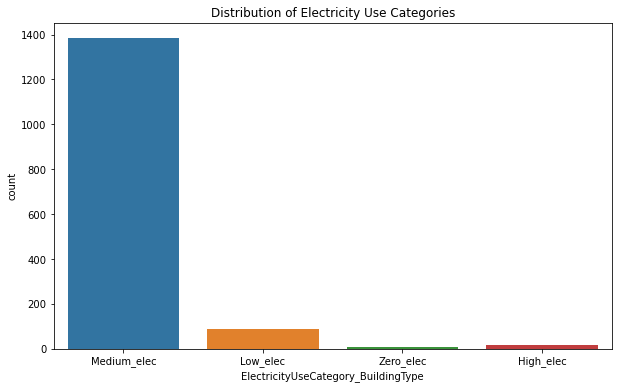

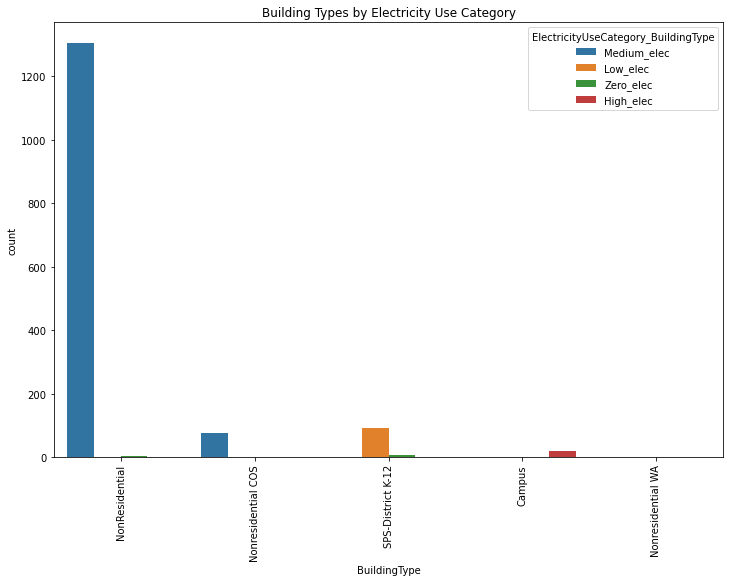

In [613]:
# Filtrer les valeurs nulles ou très faibles
df_filtered = df[df['Electricity(kBtu)_log'] > 0]

# Calculer la moyenne de 'Electricity(kBtu)_log' pour chaque 'BuildingType'
average_electricity = df_filtered.groupby('BuildingType')['Electricity(kBtu)_log'].mean()

# Définir les seuils basés sur les quantiles de la distribution de 'Electricity(kBtu)_log'
low_threshold = np.percentile(df_filtered['Electricity(kBtu)_log'], 50)
high_threshold = np.percentile(df_filtered['Electricity(kBtu)_log'], 80)

# Dictionnaires pour stocker les types de bâtiments par catégorie
category_properties = {'High_elec': [], 'Medium_elec': [], 'Low_elec': [], 'Zero_elec': []}

# Fonction pour catégoriser en fonction de la moyenne de 'Electricity(kBtu)_log' par 'BuildingType'
def categorize_building_type_electricity(row):
        
    avg_electricity = average_electricity[row['BuildingType']]
    if avg_electricity > high_threshold:
        category = 'High_elec'
    elif avg_electricity < low_threshold:
        category = 'Low_elec'
    else:
        category = 'Medium_elec'
        
    if row['Electricity(kBtu)_log'] == 0:
        return 'Zero_elec'
    
    # Ajouter le type de bâtiment à la catégorie correspondante
    if row['BuildingType'] not in category_properties[category]:
        category_properties[category].append(row['BuildingType'])

    return category

# Appliquer la fonction pour créer la nouvelle colonne
df['ElectricityUseCategory_BuildingType'] = df.apply(categorize_building_type_electricity, axis=1)

# Vérification des nouvelles données
print(df[['BuildingType', 'Electricity(kBtu)_log', 'ElectricityUseCategory_BuildingType']].head())

# Affichage des catégories de 'BuildingType' par groupe de consommation d'électricité
for category in category_properties:
    print(f"\n{category} Category:")
    for building_type in category_properties[category]:
        print(f"{building_type}")

# Visualisation de la nouvelle variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(x='ElectricityUseCategory_BuildingType', data=df)
plt.title('Distribution of Electricity Use Categories')
plt.show()

# Visualiser la nouvelle variable en fonction des types de bâtiments
plt.figure(figsize=(12, 8))
sns.countplot(x='BuildingType', hue='ElectricityUseCategory_BuildingType', data=df)
plt.title('Building Types by Electricity Use Category')
plt.xticks(rotation=90)
plt.show()




9. 2. 3. **Pour le graphique SteamUse(kBtu)_log en fonction du BuildingType:**

In [614]:
df['SteamUse(kBtu)_log'].value_counts().head(30)

0.000000     1396
14.241224       1
14.369178       1
13.968521       1
13.962308       1
15.090468       1
13.690663       1
13.018165       1
11.929947       1
18.720366       1
15.213606       1
14.367469       1
15.818865       1
15.622190       1
14.309806       1
14.875925       1
12.492240       1
14.542415       1
15.094760       1
13.809649       1
13.801821       1
15.871640       1
12.757682       1
12.898067       1
13.555555       1
15.547227       1
12.350131       1
14.510597       1
13.074732       1
13.214570       1
Name: SteamUse(kBtu)_log, dtype: int64

On affiche le histplot de la variable 'SteamUse(kBtu)_log' :

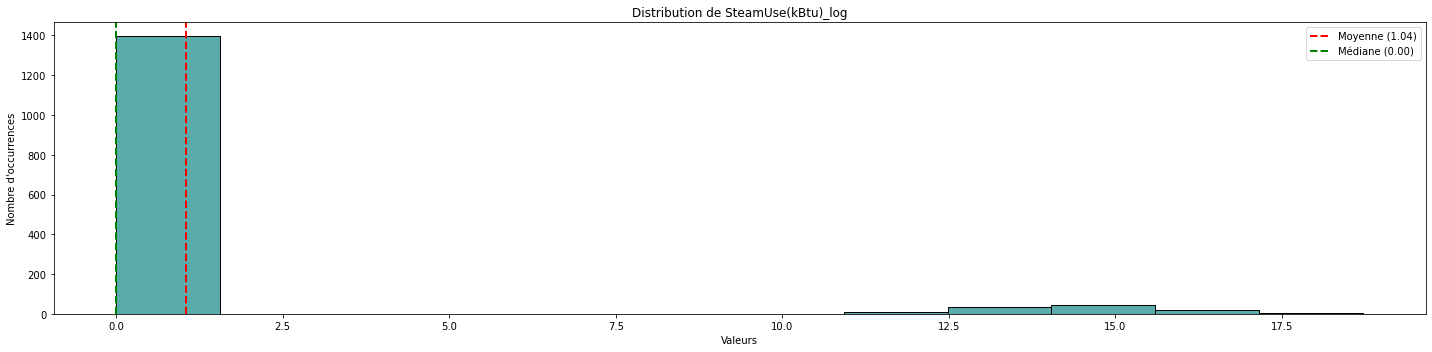

In [615]:
fct.distribution_histplot(df, cols='SteamUse(kBtu)_log')

On remarque pas mal de valeurs 0 à prendre en compte lors de la création de la variable catégorielle.

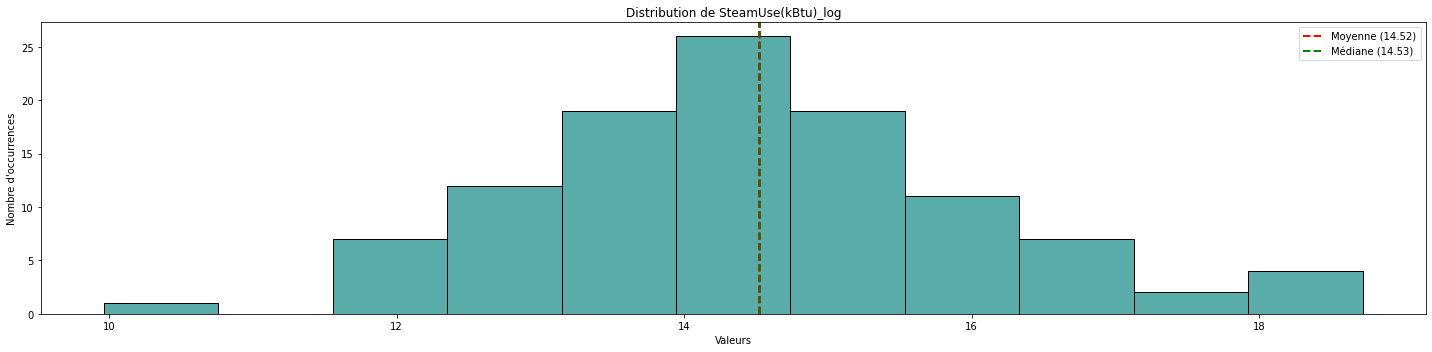

In [616]:
fct.distribution_histplot(df[df['SteamUse(kBtu)_log'] > 0], cols='SteamUse(kBtu)_log')

On affiche le boxplot de la variable 'SteamUse(kBtu)_log' en fonction de chaque catégorie de la variable 'PrimaryPropertyType':

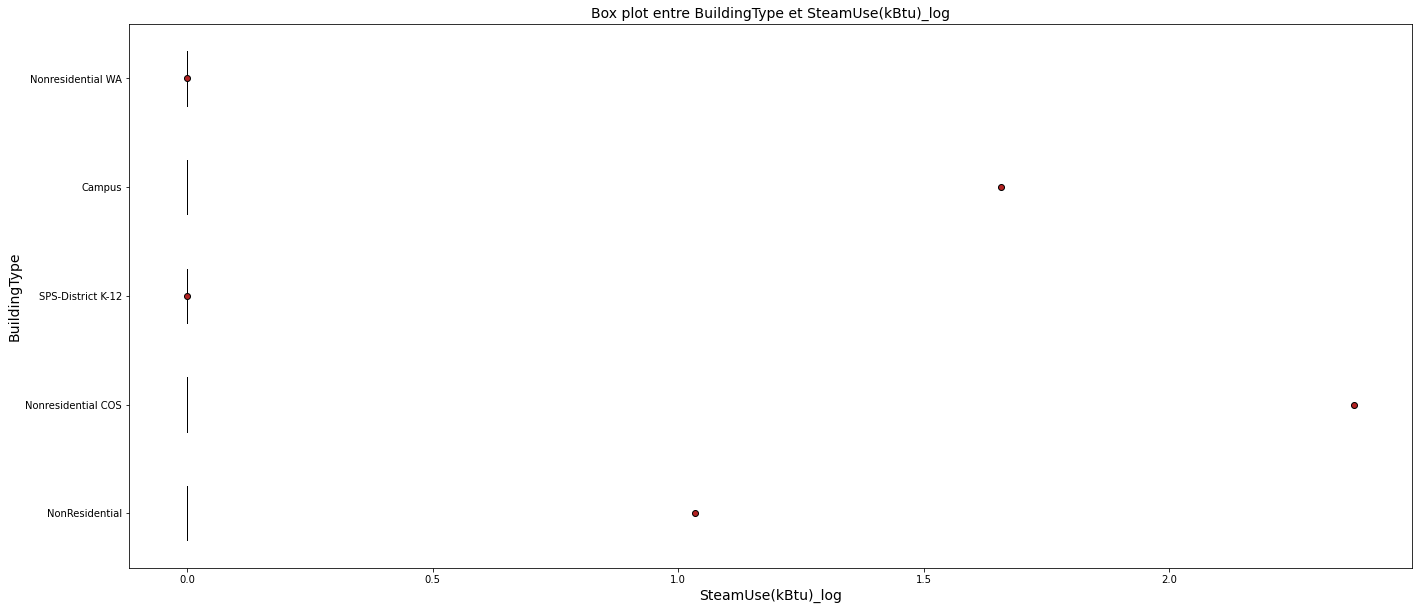

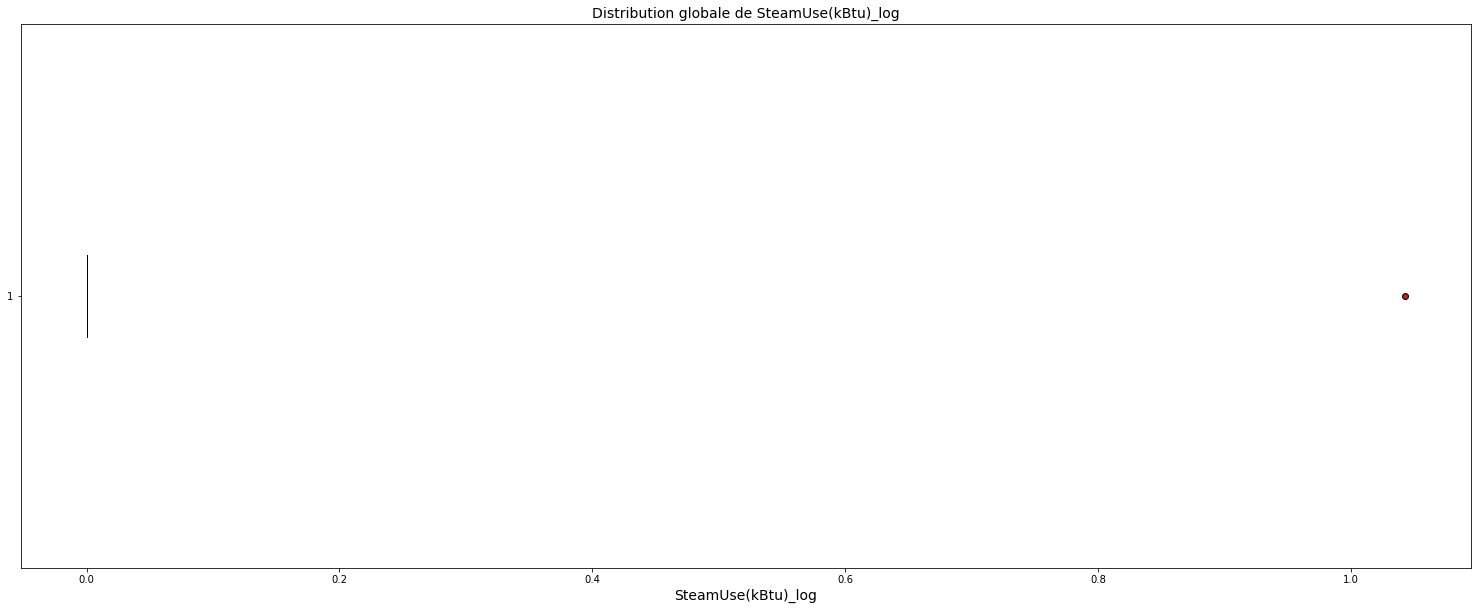

In [617]:
fct.boxplot(df, 'BuildingType' , 'SteamUse(kBtu)_log')

On remarque que la consommation de vapeur très élevée observée dans les hôpitaux peut être due à leurs besoins en chauffage et en stérilisation. On peut également écarter cette catégorie de la distribution ainsi les valeurs 0:

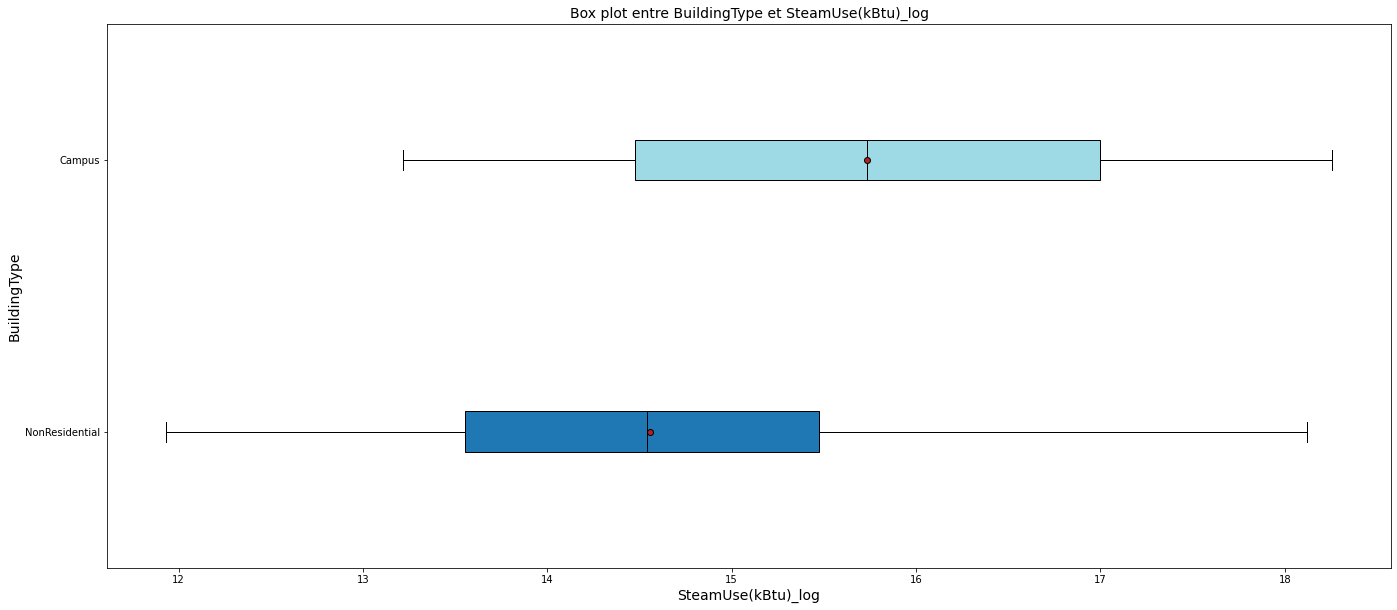

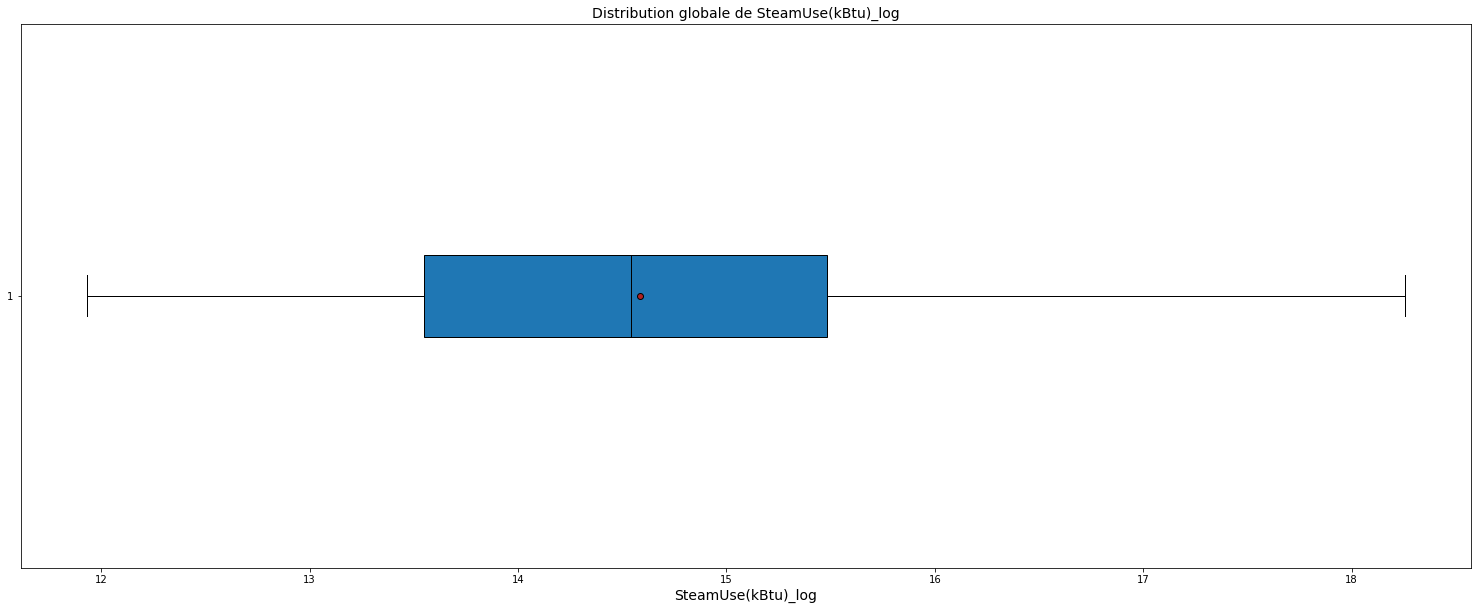

In [618]:
fct.boxplot(df[(df['BuildingType'] != 'Nonresidential COS') & (df['SteamUse(kBtu)_log'] > 0)], 'BuildingType', 'SteamUse(kBtu)_log')


In [619]:
df['SteamUse(kBtu)_log'].value_counts().sort_index(ascending=True).head(20)


0.000000     1396
9.963255        1
11.834291       1
11.929947       1
12.022687       1
12.076994       1
12.104775       1
12.229061       1
12.350131       1
12.492240       1
12.701525       1
12.738513       1
12.757682       1
12.761072       1
12.853388       1
12.898067       1
13.018165       1
13.074732       1
13.083175       1
13.107783       1
Name: SteamUse(kBtu)_log, dtype: int64

In [620]:
df[(df['BuildingType'] == 'Nonresidential COS') & (df['SteamUse(kBtu)_log'] != 0)]['SteamUse(kBtu)_log'].value_counts()





13.511103    1
15.622676    1
15.231396    1
16.094181    1
13.999814    1
15.452023    1
15.276712    1
14.556395    1
12.076994    1
11.834291    1
14.171597    1
12.229061    1
12.853388    1
Name: SteamUse(kBtu)_log, dtype: int64

     BuildingType  SteamUse(kBtu)_log SteamUseCategory_BuildingType
0  NonResidential           14.510597                  Medium_steam
1  NonResidential            0.000000                    Zero_steam
2  NonResidential           16.886654                  Medium_steam
3  NonResidential           14.610513                  Medium_steam
4  NonResidential            0.000000                    Zero_steam

High_steam Category:
Campus

Medium_steam Category:
NonResidential

Low_steam Category:

Zero_steam Category:


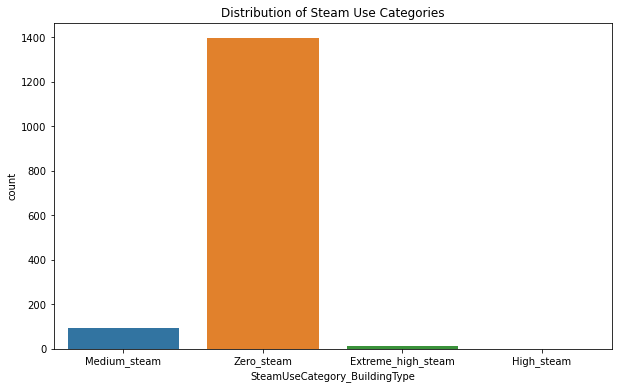

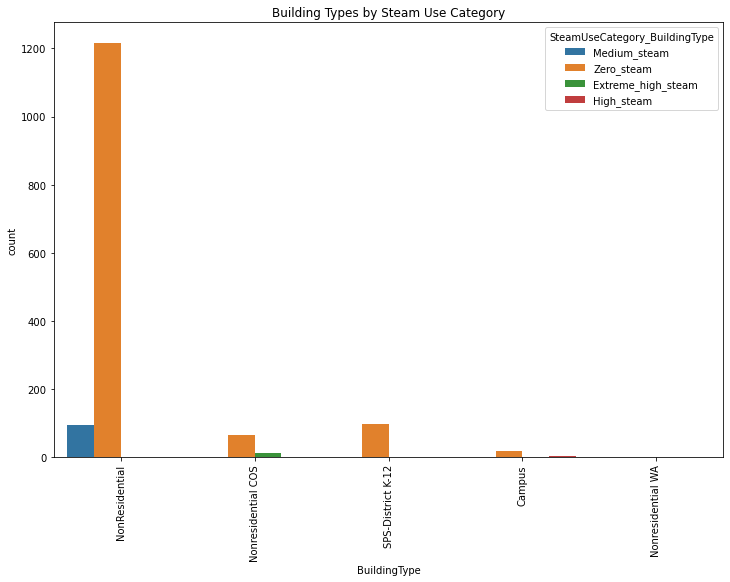

In [621]:
# Filtrer les valeurs nulles ou très faibles
df_filtered = df[(df['BuildingType'] != 'Nonresidential COS') & (df['SteamUse(kBtu)_log'] > 0)]

# Calculer la moyenne de 'SteamUse(kBtu)_log' pour chaque 'BuildingType'
average_steam = df_filtered.groupby('BuildingType')['SteamUse(kBtu)_log'].mean()

# Définir les seuils basés sur les quantiles de la distribution de 'SteamUse(kBtu)_log'
low_threshold = np.percentile(df_filtered['SteamUse(kBtu)_log'], 50)
high_threshold = np.percentile(df_filtered['SteamUse(kBtu)_log'], 80)

# Dictionnaires pour stocker les types de bâtiments par catégorie
category_properties = {'High_steam': [], 'Medium_steam': [], 'Low_steam': [], 'Zero_steam': []}

# Fonction pour catégoriser en fonction de la moyenne de 'SteamUse(kBtu)_log' par 'BuildingType'
def categorize_building_type_steam(row):
    if row['BuildingType'] == 'Nonresidential COS' and row['SteamUse(kBtu)_log'] != 0:
        return 'Extreme_high_steam'
    
    if row['BuildingType'] == 'Nonresidential COS' and row['SteamUse(kBtu)_log'] == 0:
        return 'Zero_steam'
    
    if row['SteamUse(kBtu)_log'] == 0:
        return 'Zero_steam'
    
    avg_steam = average_steam[row['BuildingType']]
    if avg_steam > high_threshold:
        category = 'High_steam'
    elif avg_steam < low_threshold:
        category = 'Low_steam'
    else:
        category = 'Medium_steam'
    
    # Ajouter le type de bâtiment à la catégorie correspondante
    if row['BuildingType'] not in category_properties[category]:
        category_properties[category].append(row['BuildingType'])

    return category

# Appliquer la fonction pour créer la nouvelle colonne
df['SteamUseCategory_BuildingType'] = df.apply(categorize_building_type_steam, axis=1)

# Vérification des nouvelles données
print(df[['BuildingType', 'SteamUse(kBtu)_log', 'SteamUseCategory_BuildingType']].head())

# Affichage des catégories de 'BuildingType' par groupe de consommation de vapeur
for category in category_properties:
    print(f"\n{category} Category:")
    for building_type in category_properties[category]:
        print(f"{building_type}")

# Visualisation de la nouvelle variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(x='SteamUseCategory_BuildingType', data=df)
plt.title('Distribution of Steam Use Categories')
plt.show()

# Visualiser la nouvelle variable en fonction des types de bâtiments
plt.figure(figsize=(12, 8))
sns.countplot(x='BuildingType', hue='SteamUseCategory_BuildingType', data=df)
plt.title('Building Types by Steam Use Category')
plt.xticks(rotation=90)
plt.show()


9. 2. 4. **Pour le graphique NaturalGas(kBtu)_log en fonction du BuildingType:**

In [622]:
df['NaturalGas(kBtu)_log'].value_counts().head(30)

0.000000     441
12.332031      2
14.059596      1
11.991083      1
13.496032      1
13.508684      1
13.567326      1
14.425410      1
14.594327      1
12.370213      1
12.615281      1
12.994955      1
13.934425      1
12.160416      1
13.759509      1
13.568415      1
13.773848      1
13.198480      1
15.008584      1
11.871117      1
12.156945      1
14.944076      1
14.003853      1
12.694459      1
13.718328      1
12.505136      1
14.239825      1
12.766959      1
14.910248      1
12.671287      1
Name: NaturalGas(kBtu)_log, dtype: int64

On affiche le histplot de la variable 'NaturalGas(kBtu)_log' :

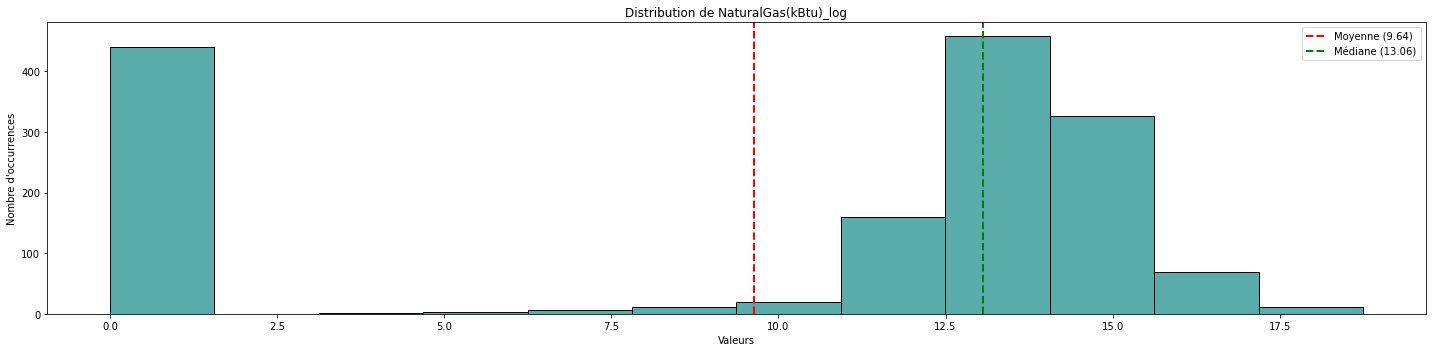

In [623]:
fct.distribution_histplot(df, cols='NaturalGas(kBtu)_log')

On remarque pas mal de valeurs 0 à prendre en compte lors de la création de la variable catégorielle.

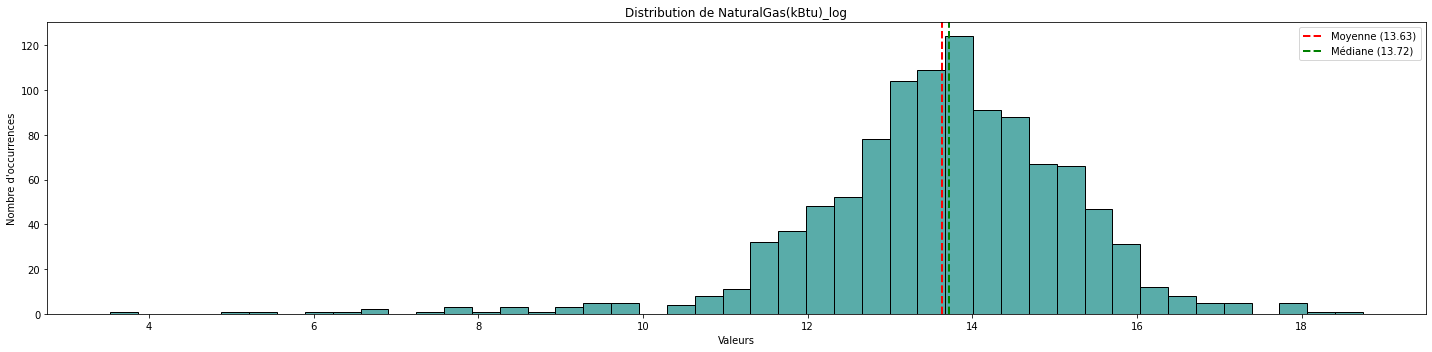

In [624]:
fct.distribution_histplot(df[df['NaturalGas(kBtu)_log'] > 0], cols='NaturalGas(kBtu)_log')

On affiche le boxplot de la variable 'NaturalGas(kBtu)_log' en fonction de chaque catégorie de la variable 'PrimaryPropertyType':

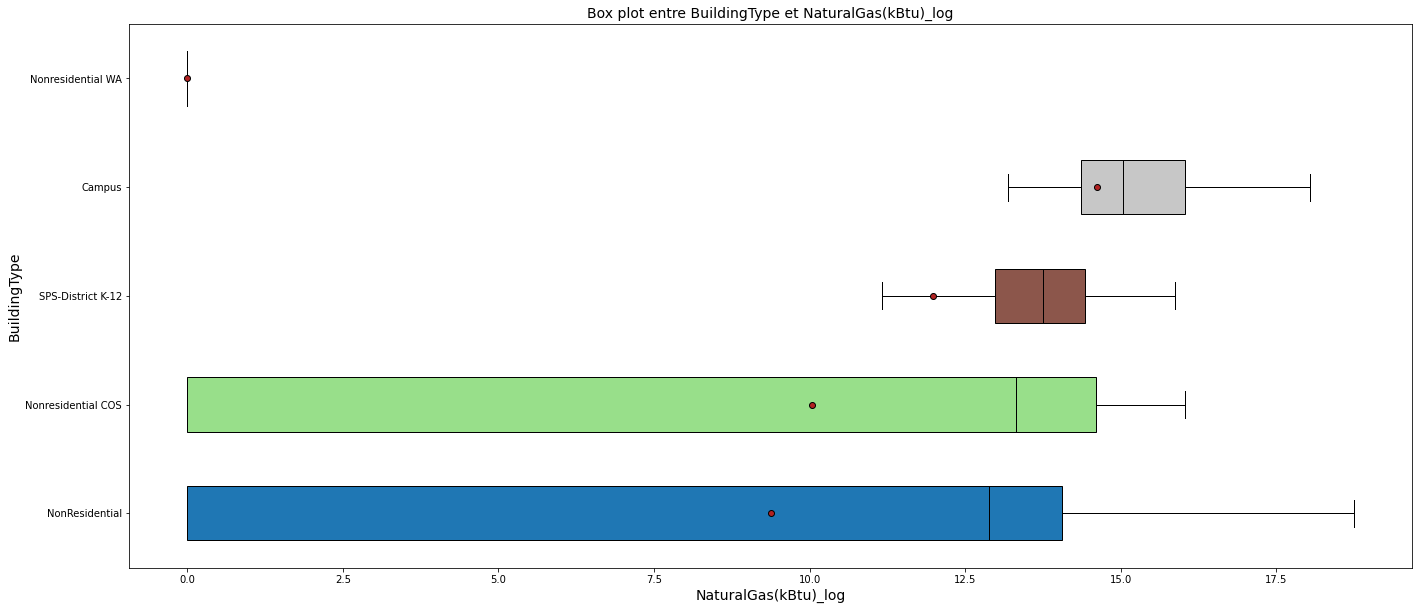

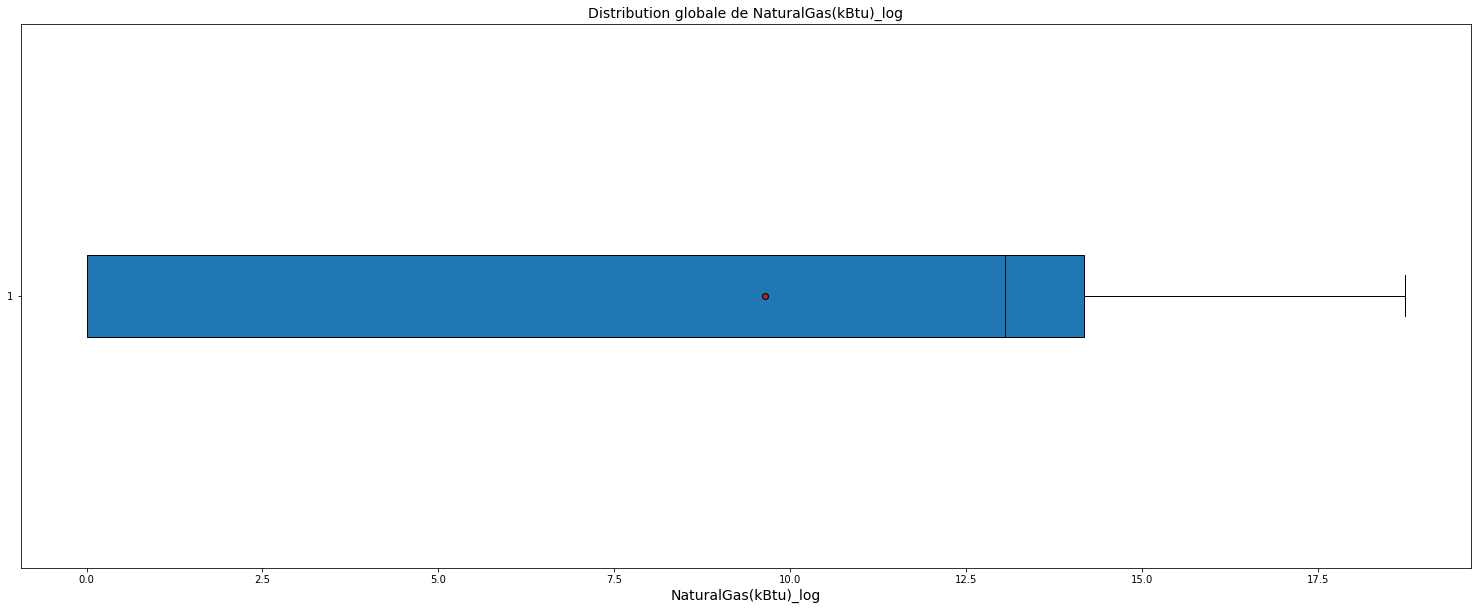

In [625]:
fct.boxplot(df, 'BuildingType' , 'NaturalGas(kBtu)_log')

On peut écarter les valeurs 0 de la distribution:

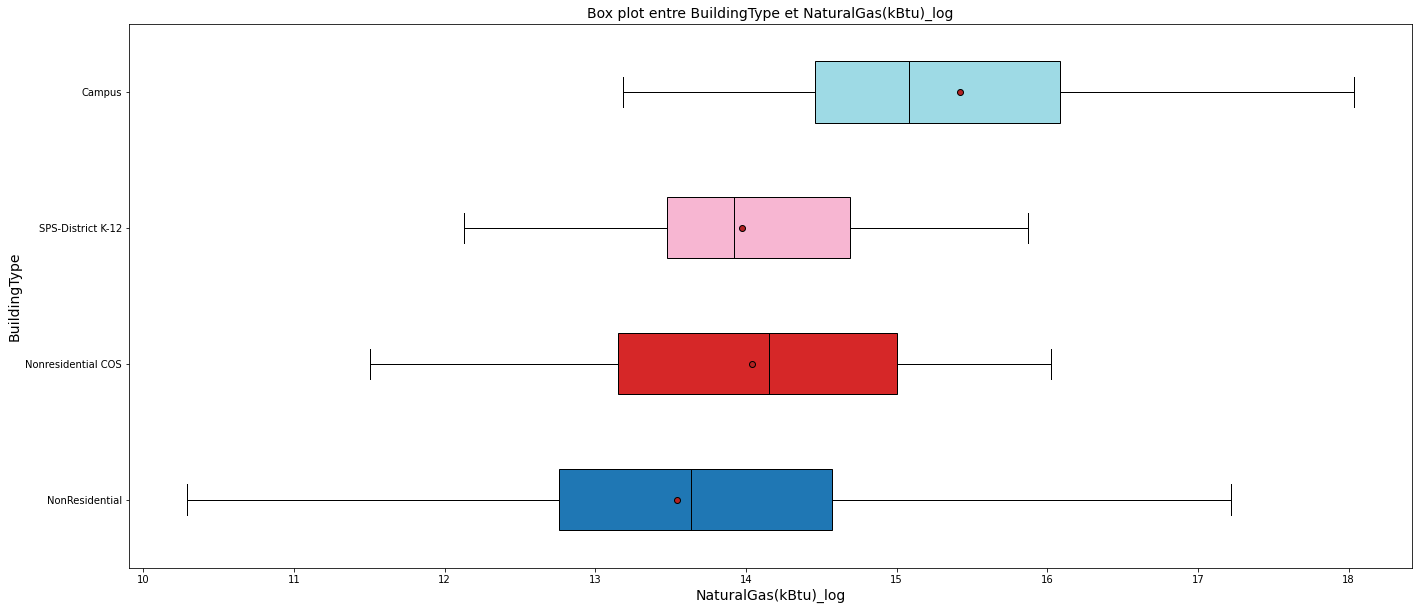

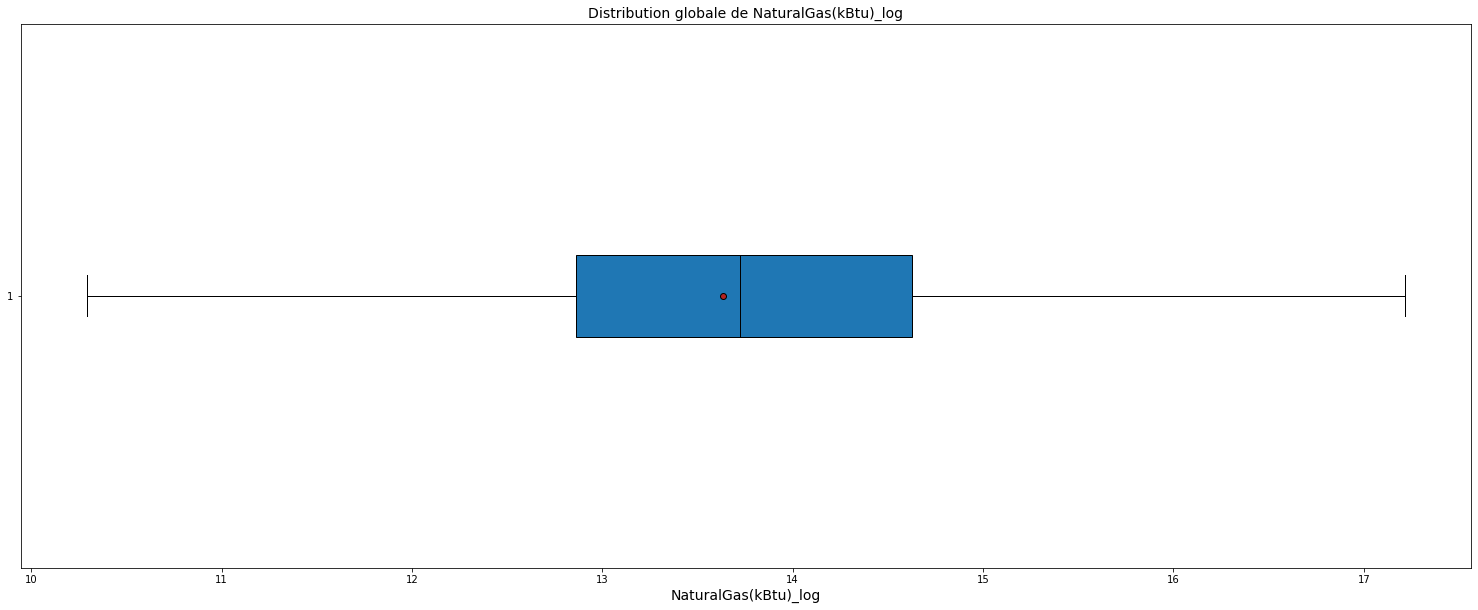

In [626]:
fct.boxplot(df[df['NaturalGas(kBtu)_log'] > 0], 'BuildingType', 'NaturalGas(kBtu)_log')


     BuildingType  NaturalGas(kBtu)_log NaturalGasUseCategory_BuildingType
0  NonResidential             14.059596                            Low_gas
1  NonResidential             15.453552                            Low_gas
2  NonResidential             14.216834                            Low_gas
3  NonResidential             14.409508                            Low_gas
4  NonResidential             15.990717                            Low_gas

High_gas Category:
Campus

Medium_gas Category:
Nonresidential COS
SPS-District K-12

Low_gas Category:
NonResidential

Zero_gas Category:


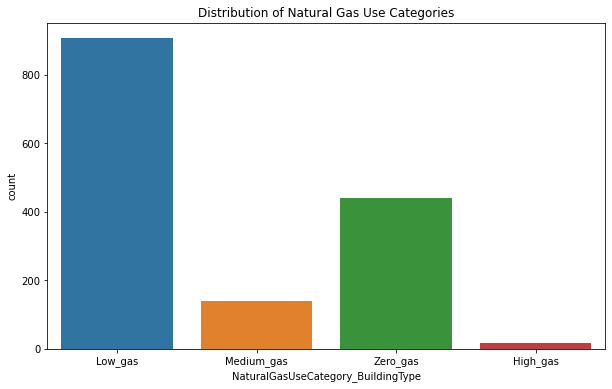

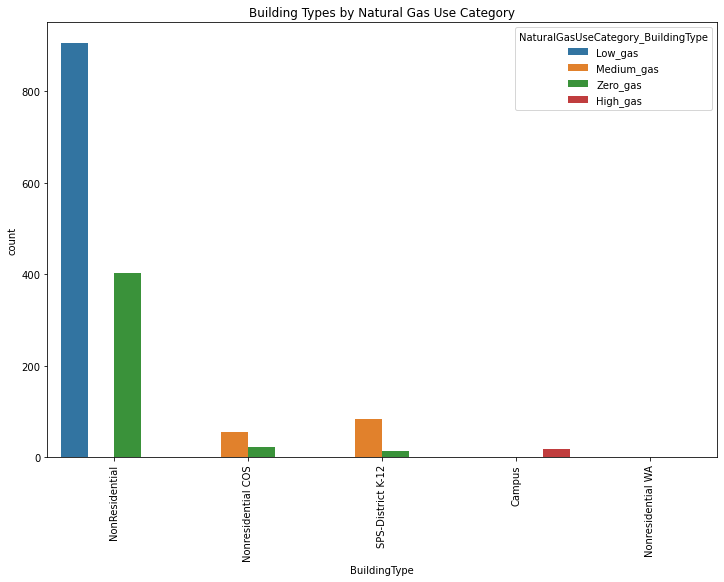

In [627]:
# Filtrer les valeurs nulles ou très faibles
df_filtered = df[df['NaturalGas(kBtu)_log'] > 0]

# Calculer la moyenne de 'NaturalGas(kBtu)_log' pour chaque 'BuildingType'
average_natural_gas = df_filtered.groupby('BuildingType')['NaturalGas(kBtu)_log'].mean()

# Définir les seuils basés sur les quantiles de la distribution de 'NaturalGas(kBtu)_log'
low_threshold = np.percentile(df_filtered['NaturalGas(kBtu)_log'], 45)
high_threshold = np.percentile(df_filtered['NaturalGas(kBtu)_log'], 80)

# Dictionnaires pour stocker les types de bâtiments par catégorie
category_properties = {'High_gas': [], 'Medium_gas': [], 'Low_gas': [], 'Zero_gas': []}

# Fonction pour catégoriser en fonction de la moyenne de 'NaturalGas(kBtu)_log' par 'BuildingType'
def categorize_building_type_natural_gas(row):
    
    if row['NaturalGas(kBtu)_log'] == 0:
        return 'Zero_gas'
    
    avg_natural_gas = average_natural_gas[row['BuildingType']]
    if avg_natural_gas > high_threshold:
        category = 'High_gas'
    elif avg_natural_gas < low_threshold:
        category = 'Low_gas'
    else:
        category = 'Medium_gas'
    
    
    # Ajouter le type de bâtiment à la catégorie correspondante
    if row['BuildingType'] not in category_properties[category]:
        category_properties[category].append(row['BuildingType'])

    return category

# Appliquer la fonction pour créer la nouvelle colonne
df['NaturalGasUseCategory_BuildingType'] = df.apply(categorize_building_type_natural_gas, axis=1)

# Vérification des nouvelles données
print(df[['BuildingType', 'NaturalGas(kBtu)_log', 'NaturalGasUseCategory_BuildingType']].head())

# Affichage des catégories de 'BuildingType' par groupe de consommation de gaz naturel
for category in category_properties:
    print(f"\n{category} Category:")
    for building_type in category_properties[category]:
        print(f"{building_type}")

# Visualisation de la nouvelle variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(x='NaturalGasUseCategory_BuildingType', data=df)
plt.title('Distribution of Natural Gas Use Categories')
plt.show()

# Visualiser la nouvelle variable en fonction des types de bâtiments
plt.figure(figsize=(12, 8))
sns.countplot(x='BuildingType', hue='NaturalGasUseCategory_BuildingType', data=df)
plt.title('Building Types by Natural Gas Use Category')
plt.xticks(rotation=90)
plt.show()




9. 3. 1. **l'effet de l'age du batiement sur la consomation d'énergie:**

Nous allons créer une nouvelle variable AgeGroup (que nous supprimerons plus tard) qui va nous aider à visualiser la distribution en boxplot de chaque variable énergétique pour chaque tranche de 10 ans:

In [628]:
# Définir les intervalles de 10 ans
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
                                         (50, 60), (60, 70), (70, 80), (80, 90), (90, 100), 
                                         (100, 110), (110, 120)])

# Catégoriser les données d'âge des bâtiments
df['AgeGroup'] = pd.cut(df['BuildingAge'], bins=bins)
list_to_drop_after_FE_EnergyUse.append('AgeGroup')
list_to_drop_after_FE_GHGEmissions.append('AgeGroup')
df['AgeGroup'] = df['AgeGroup'].astype('str')

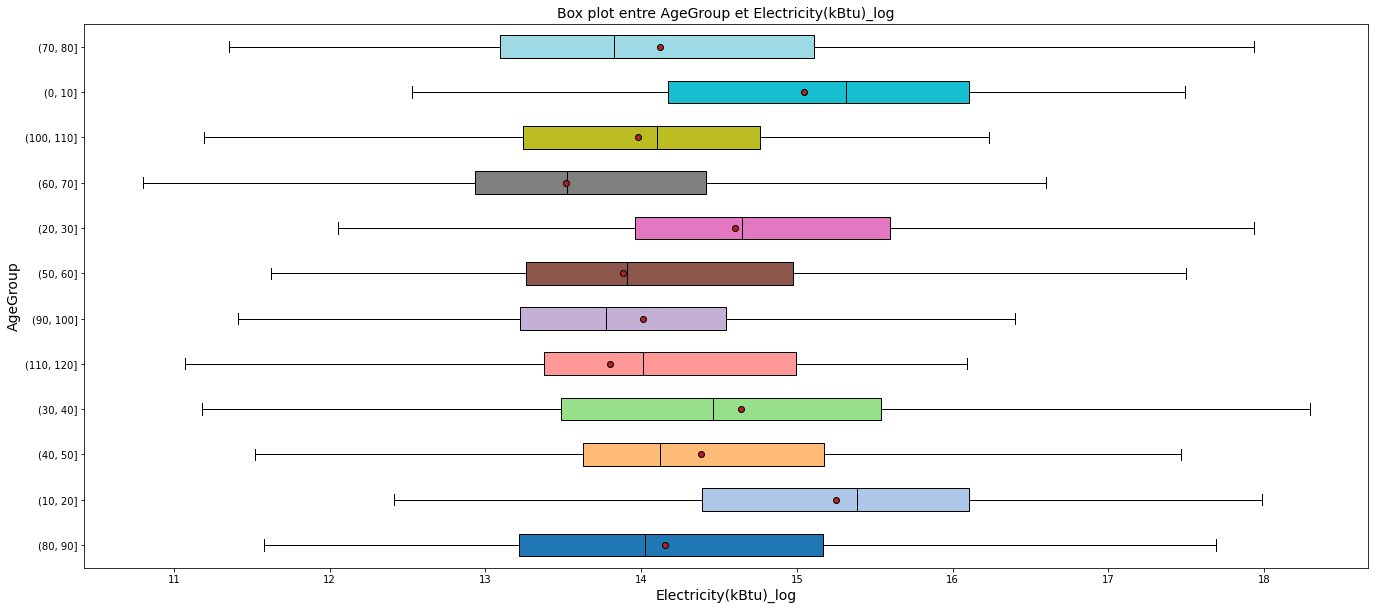

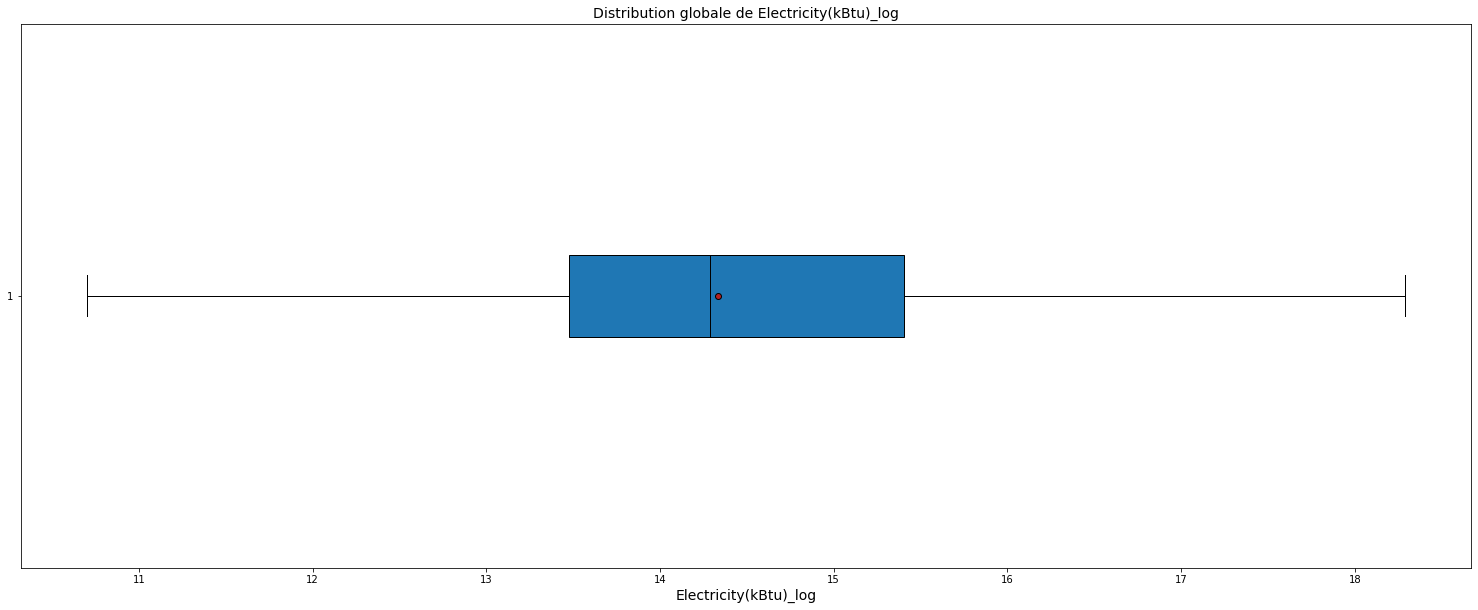

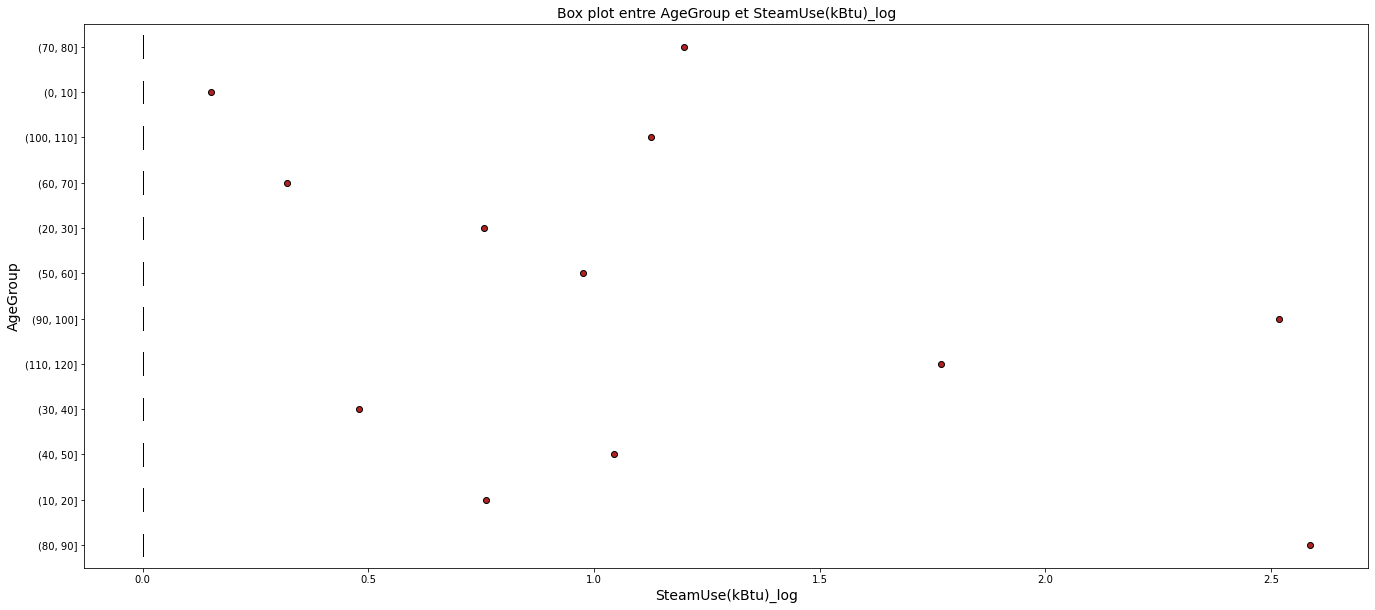

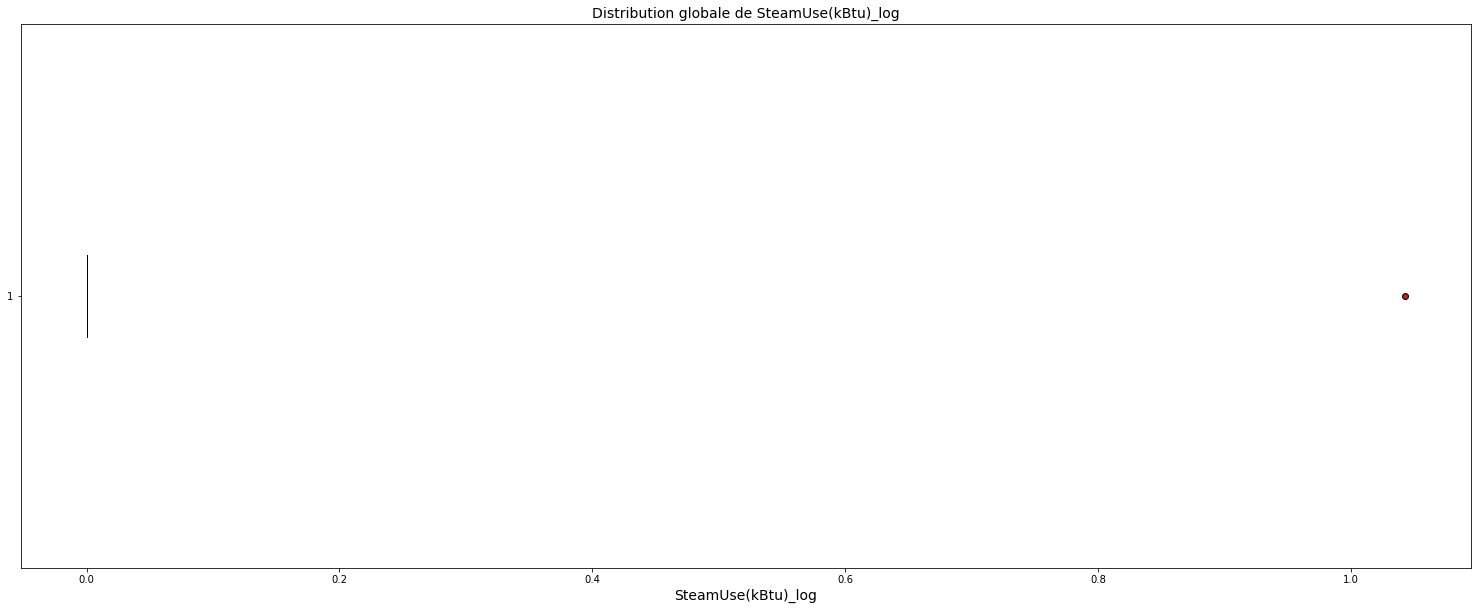

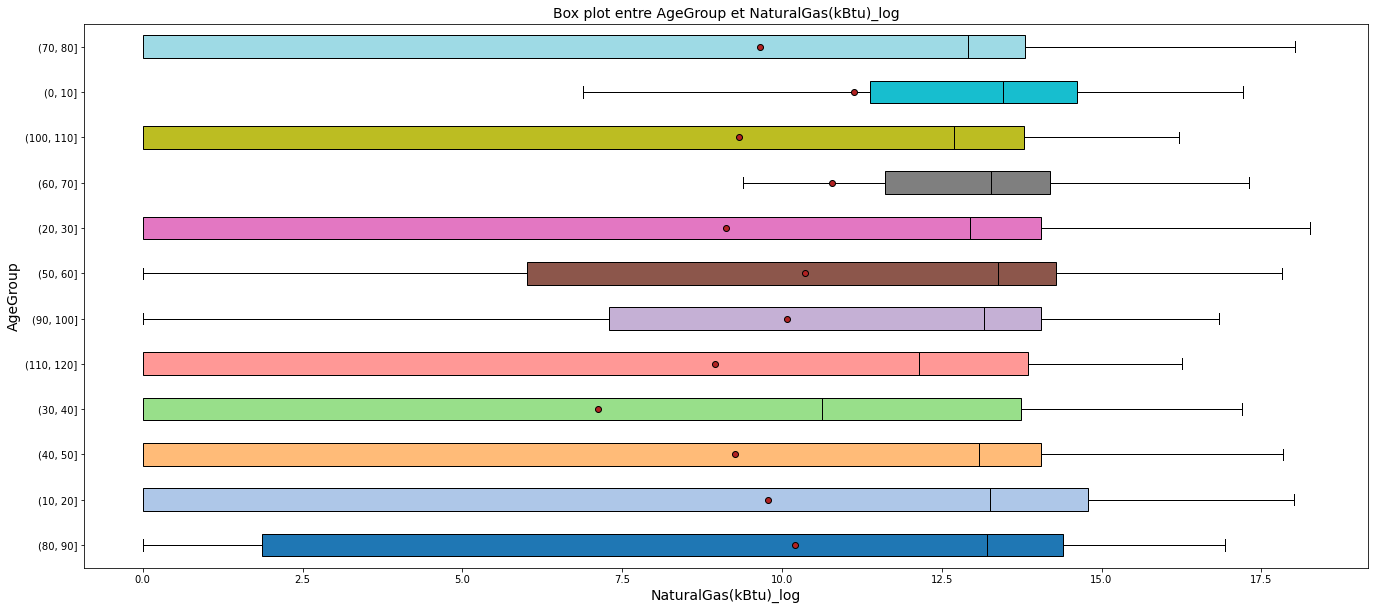

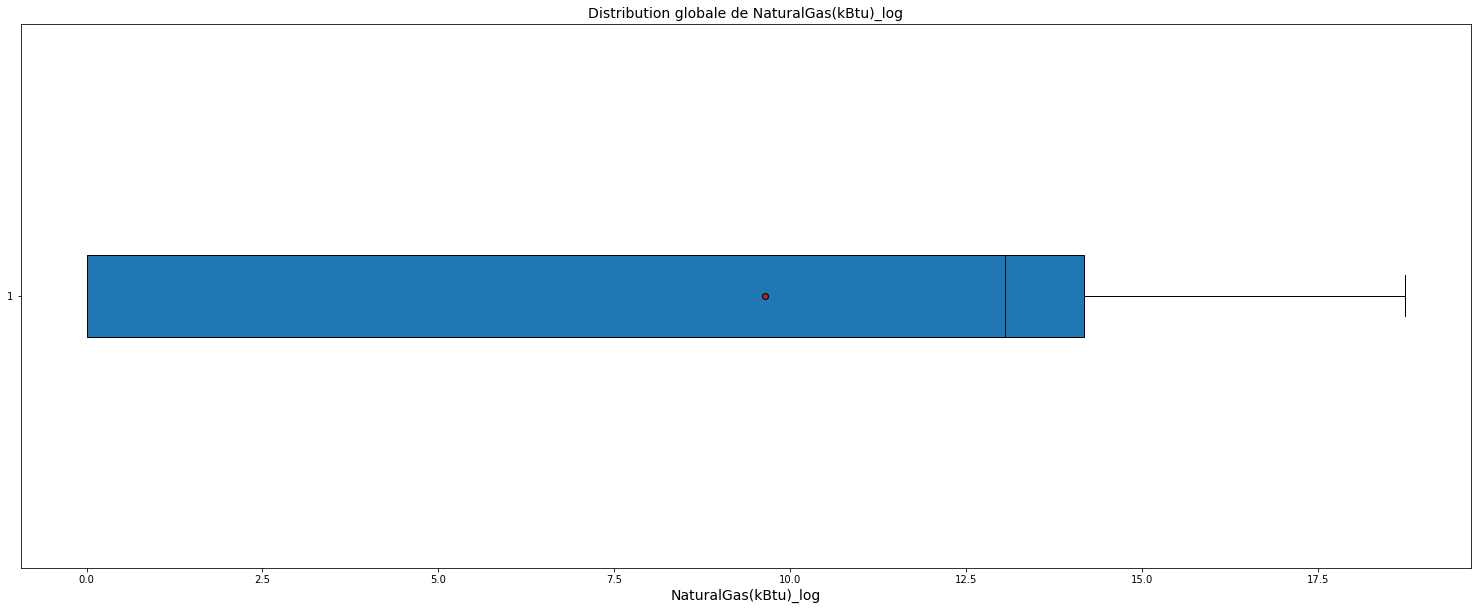

In [629]:
for col in list_energie_log:
    fct.boxplot(df, 'AgeGroup', col)

9. 3. 2. **Pour le graphique Electricity(kBtu)_log en fonction du 'AgeGroup':**

In [630]:
df['Electricity(kBtu)_log'].value_counts().head(30)

0.000000     11
13.611568     2
14.505901     1
14.739962     1
14.286816     1
14.110695     1
17.107437     1
12.903774     1
13.408253     1
13.868831     1
15.062128     1
14.240995     1
15.188220     1
13.410157     1
13.669450     1
14.243023     1
13.313228     1
13.317751     1
14.929518     1
13.733472     1
12.407371     1
11.182030     1
12.922888     1
13.617711     1
14.506139     1
15.147256     1
13.671787     1
13.879580     1
14.029147     1
14.346128     1
Name: Electricity(kBtu)_log, dtype: int64

On affiche le histplot de la variable 'Electricity(kBtu)_log' :

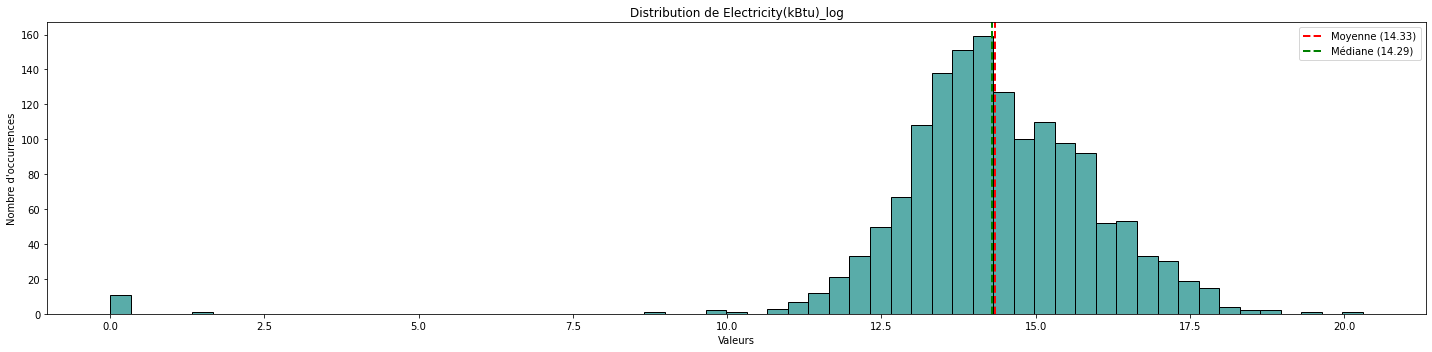

In [631]:
fct.distribution_histplot(df, cols='Electricity(kBtu)_log')

On remarque pas mal de valeurs 0 à prendre en compte lors de la création de la variable catégorielle.

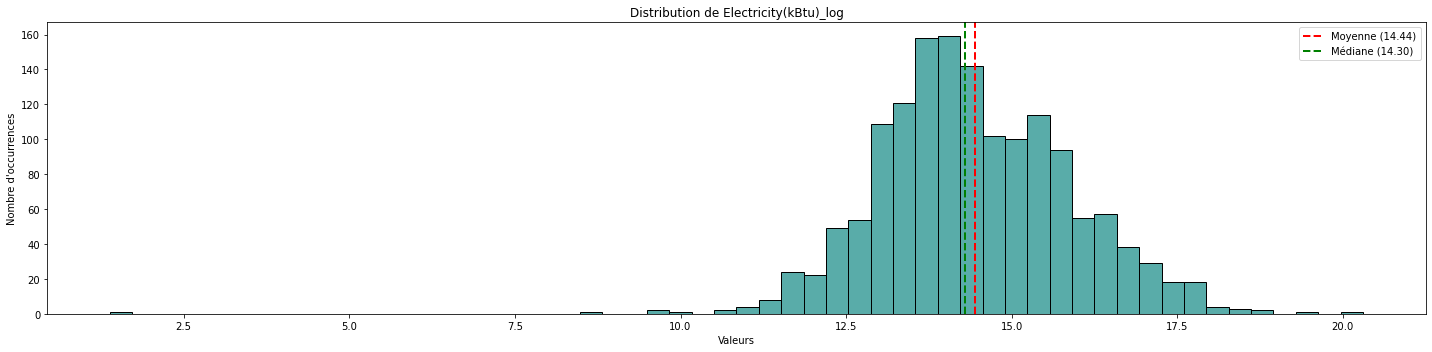

In [632]:
fct.distribution_histplot(df[df['Electricity(kBtu)_log'] > 0], cols='Electricity(kBtu)_log')

On affiche le boxplot de la variable 'Electricity(kBtu)_log' en fonction de chaque catégorie de la variable 'PrimaryPropertyType':

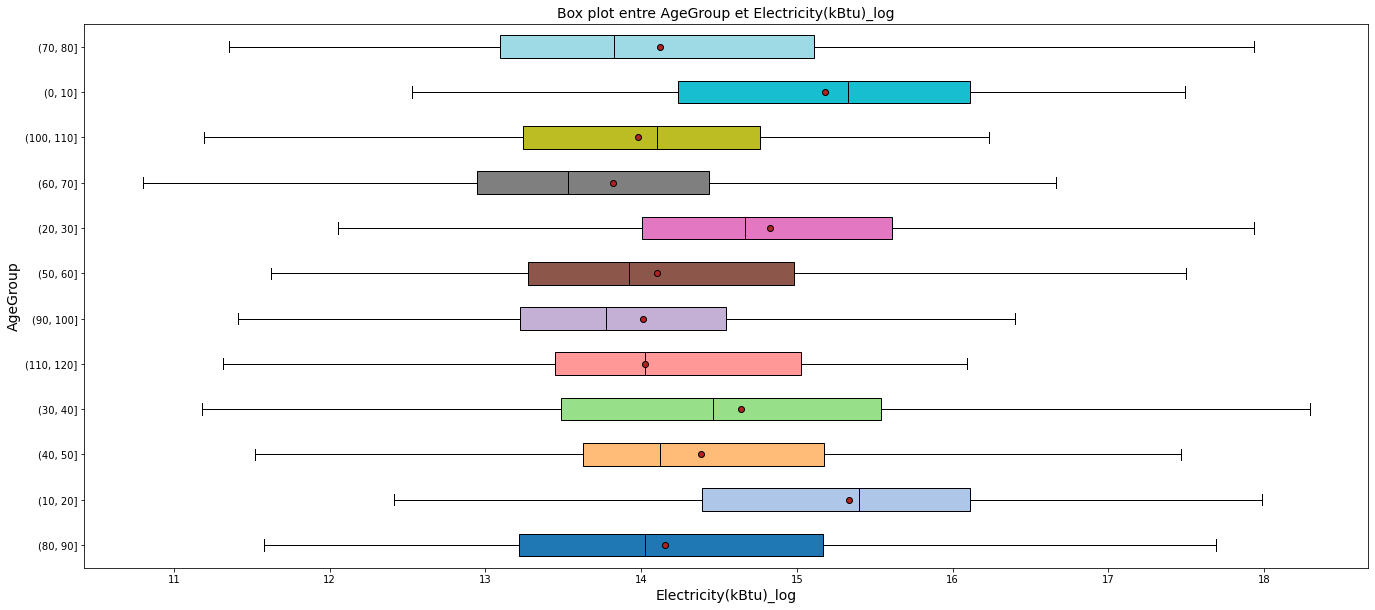

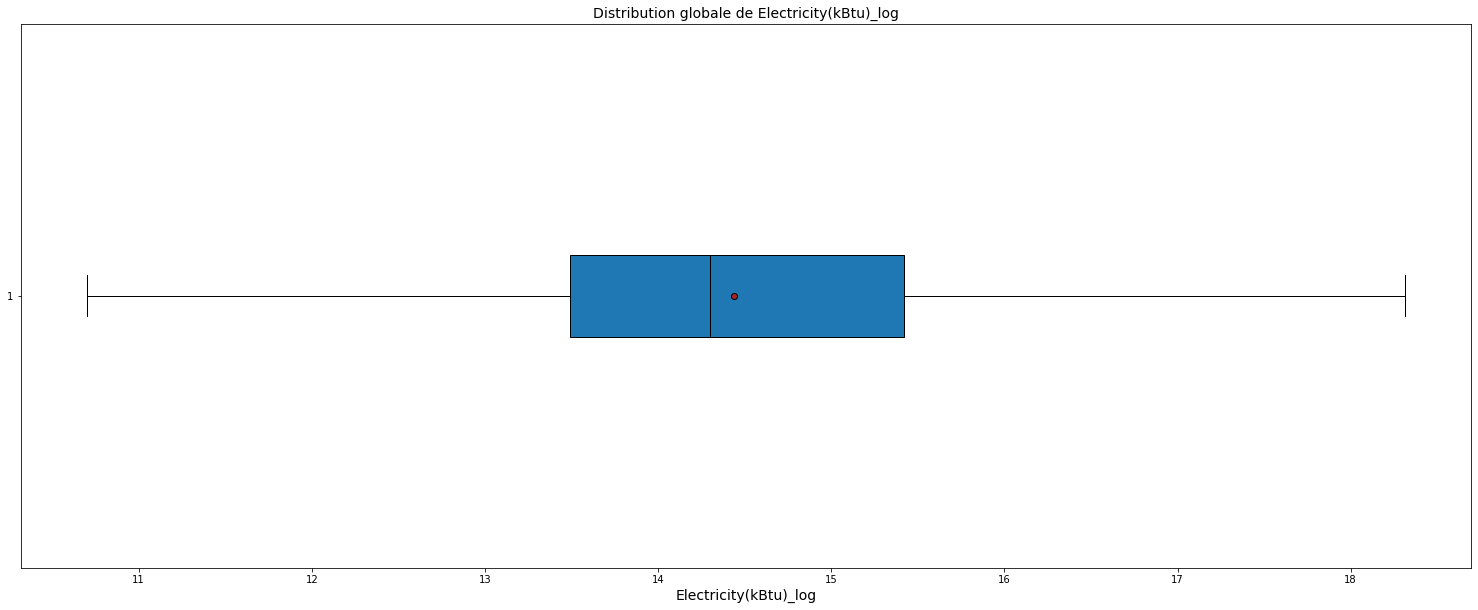

In [633]:
fct.boxplot(df[df['Electricity(kBtu)_log'] > 0], 'AgeGroup' , 'Electricity(kBtu)_log')

   AgeGroup  Electricity(kBtu)_log ElectricityUseCategory_AgeGroup
0  (80, 90]              15.188220                     Medium_elec
1  (10, 20]              14.991964                       High_elec
2  (40, 50]              17.718022                     Medium_elec
3  (80, 90]              14.833970                     Medium_elec
4  (30, 40]              15.496079                     Medium_elec

High_elec Category:
(10, 20]
(20, 30]
(0, 10]

Medium_elec Category:
(80, 90]
(40, 50]
(30, 40]
(110, 120]
(50, 60]
(70, 80]

Low_elec Category:
(90, 100]
(60, 70]
(100, 110]

Zero_elec Category:


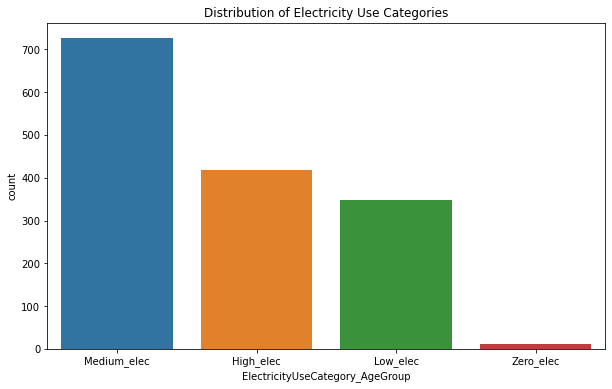

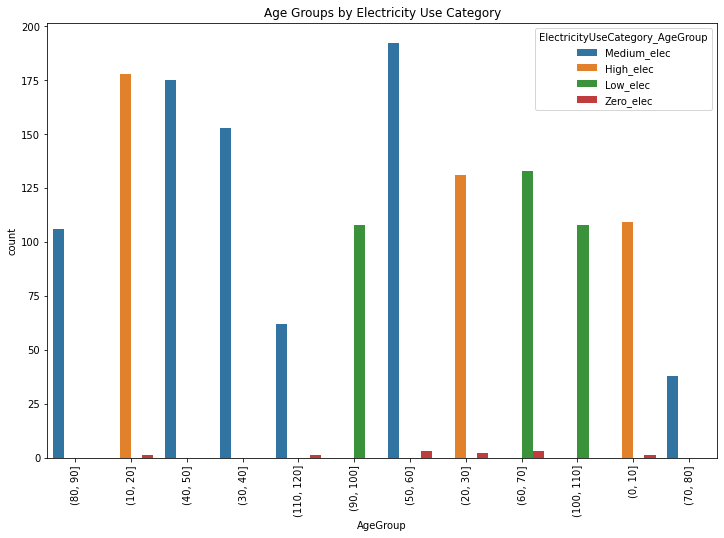

In [634]:
# Filtrer les valeurs nulles ou très faibles
df_filtered = df[df['Electricity(kBtu)_log'] > 0]

# Calculer la moyenne de 'Electricity(kBtu)_log' pour chaque 'AgeGroup'
average_electricity = df_filtered.groupby('AgeGroup')['Electricity(kBtu)_log'].mean()

# Définir les seuils basés sur les quantiles de la distribution de 'Electricity(kBtu)_log'
low_threshold = np.percentile(df_filtered['Electricity(kBtu)_log'], 40.5)
high_threshold = np.percentile(df_filtered['Electricity(kBtu)_log'], 60)

# Dictionnaires pour stocker les types de groupes d'âge par catégorie
category_properties = {'High_elec': [], 'Medium_elec': [], 'Low_elec': [], 'Zero_elec': []}

# Fonction pour catégoriser en fonction de la moyenne de 'Electricity(kBtu)_log' par 'AgeGroup'
def categorize_age_group_electricity(row):
        
    avg_electricity = average_electricity[row['AgeGroup']]
    if avg_electricity > high_threshold:
        category = 'High_elec'
    elif avg_electricity < low_threshold:
        category = 'Low_elec'
    else:
        category = 'Medium_elec'
        
    if row['Electricity(kBtu)_log'] == 0:
        return 'Zero_elec'
    
    # Ajouter le groupe d'âge à la catégorie correspondante
    if row['AgeGroup'] not in category_properties[category]:
        category_properties[category].append(row['AgeGroup'])

    return category

# Appliquer la fonction pour créer la nouvelle colonne
df['ElectricityUseCategory_AgeGroup'] = df.apply(categorize_age_group_electricity, axis=1)

# Vérification des nouvelles données
print(df[['AgeGroup', 'Electricity(kBtu)_log', 'ElectricityUseCategory_AgeGroup']].head())

# Affichage des catégories de 'AgeGroup' par groupe de consommation d'électricité
for category in category_properties:
    print(f"\n{category} Category:")
    for age_group in category_properties[category]:
        print(f"{age_group}")

# Visualisation de la nouvelle variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(x='ElectricityUseCategory_AgeGroup', data=df)
plt.title('Distribution of Electricity Use Categories')
plt.show()

# Visualiser la nouvelle variable en fonction des groupes d'âge
plt.figure(figsize=(12, 8))
sns.countplot(x='AgeGroup', hue='ElectricityUseCategory_AgeGroup', data=df)
plt.title('Age Groups by Electricity Use Category')
plt.xticks(rotation=90)
plt.show()





9. 3. 3. **Pour le graphique SteamUse(kBtu)_log en fonction du AgeGroup:**

In [635]:
df['SteamUse(kBtu)_log'].value_counts().head(30)

0.000000     1396
14.241224       1
14.369178       1
13.968521       1
13.962308       1
15.090468       1
13.690663       1
13.018165       1
11.929947       1
18.720366       1
15.213606       1
14.367469       1
15.818865       1
15.622190       1
14.309806       1
14.875925       1
12.492240       1
14.542415       1
15.094760       1
13.809649       1
13.801821       1
15.871640       1
12.757682       1
12.898067       1
13.555555       1
15.547227       1
12.350131       1
14.510597       1
13.074732       1
13.214570       1
Name: SteamUse(kBtu)_log, dtype: int64

On affiche le histplot de la variable 'SteamUse(kBtu)_log' :

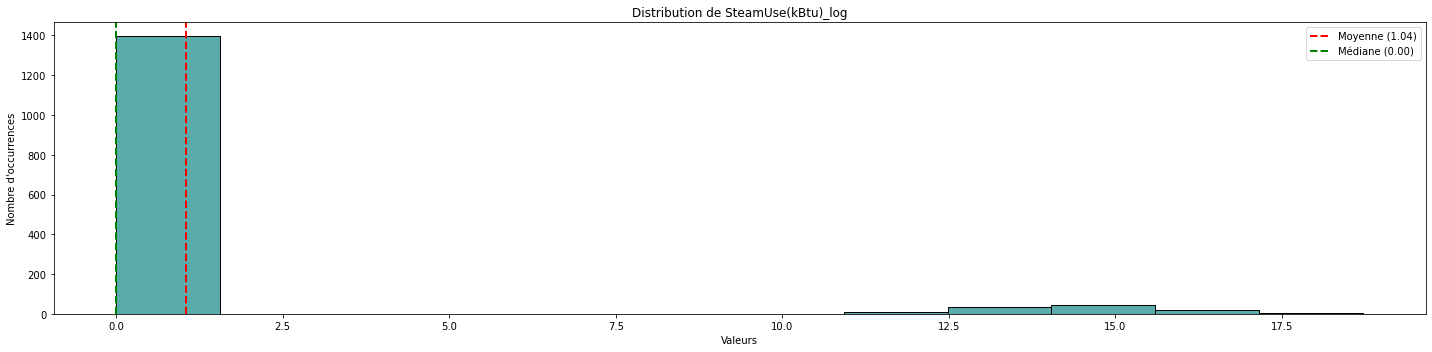

In [636]:
fct.distribution_histplot(df, cols='SteamUse(kBtu)_log')

On remarque pas mal de valeurs 0 à prendre en compte lors de la création de la variable catégorielle.

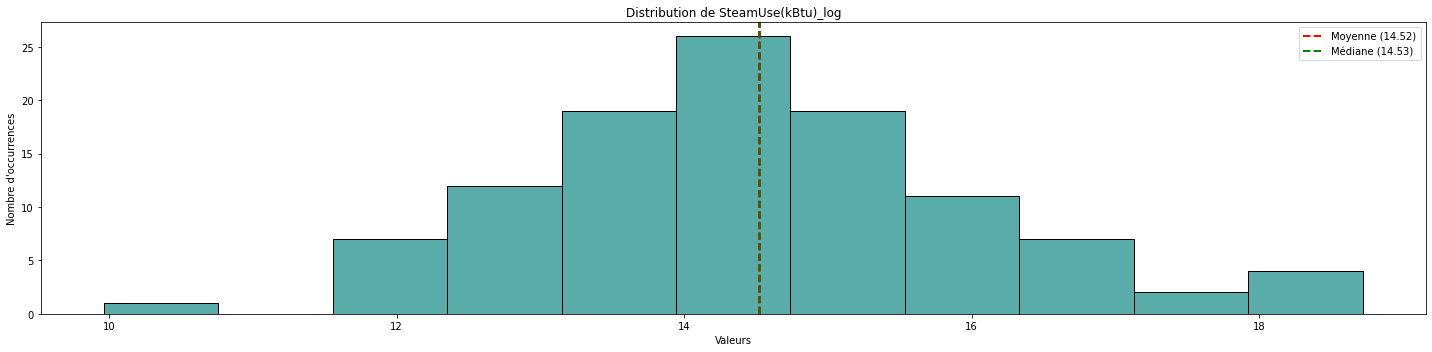

In [637]:
fct.distribution_histplot(df[df['SteamUse(kBtu)_log'] > 0], cols='SteamUse(kBtu)_log')

On affiche le boxplot de la variable 'SteamUse(kBtu)_log' en fonction de chaque catégorie de la variable 'PrimaryPropertyType':

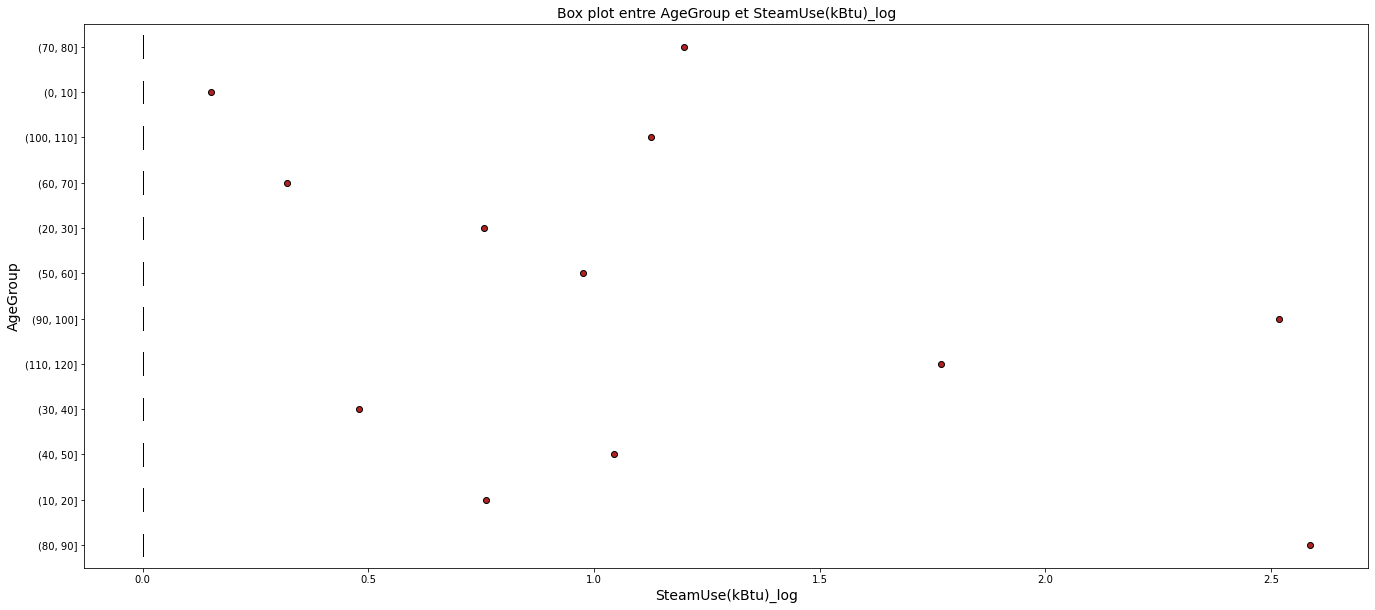

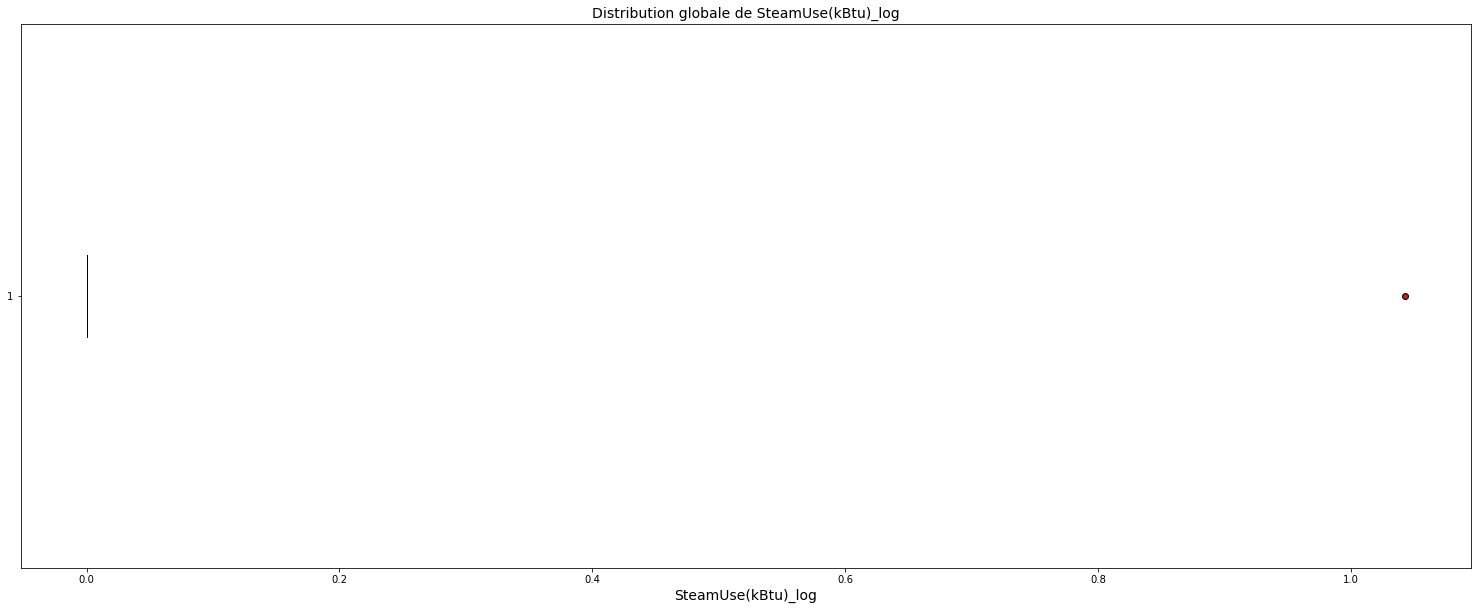

In [638]:
fct.boxplot(df, 'AgeGroup' , 'SteamUse(kBtu)_log')

On remarque que la consommation de vapeur très élevée observée dans les hôpitaux peut être due à leurs besoins en chauffage et en stérilisation. On peut également écarter cette catégorie de la distribution ainsi les valeurs 0:

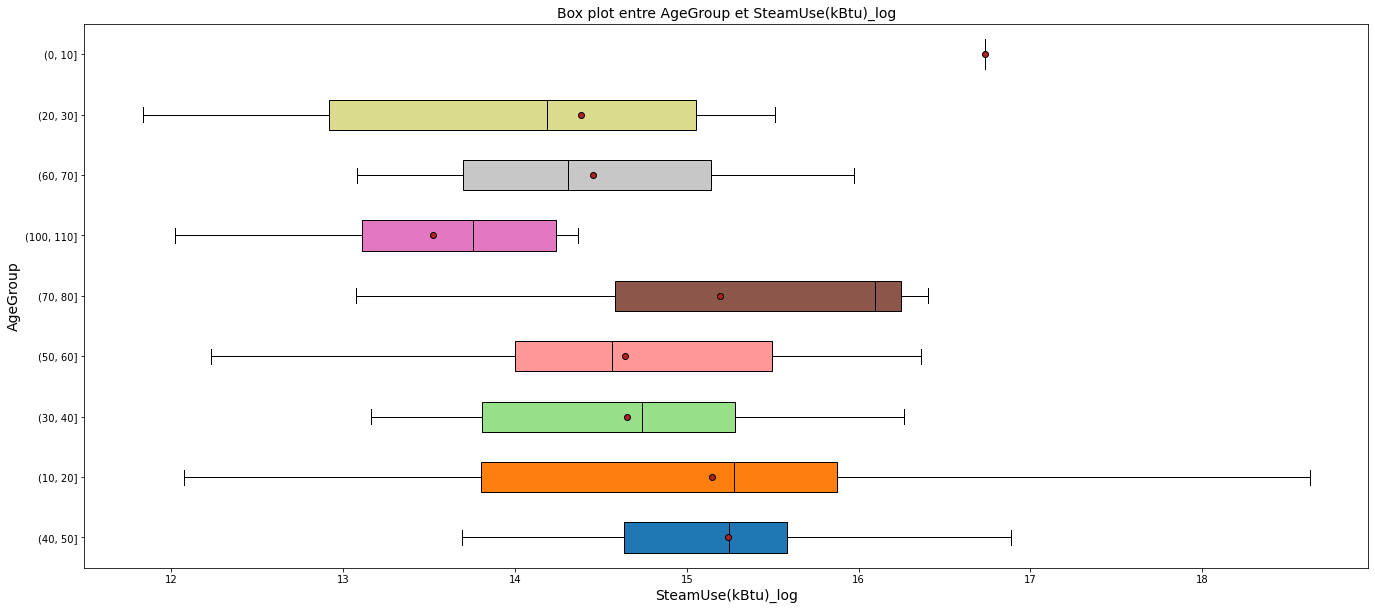

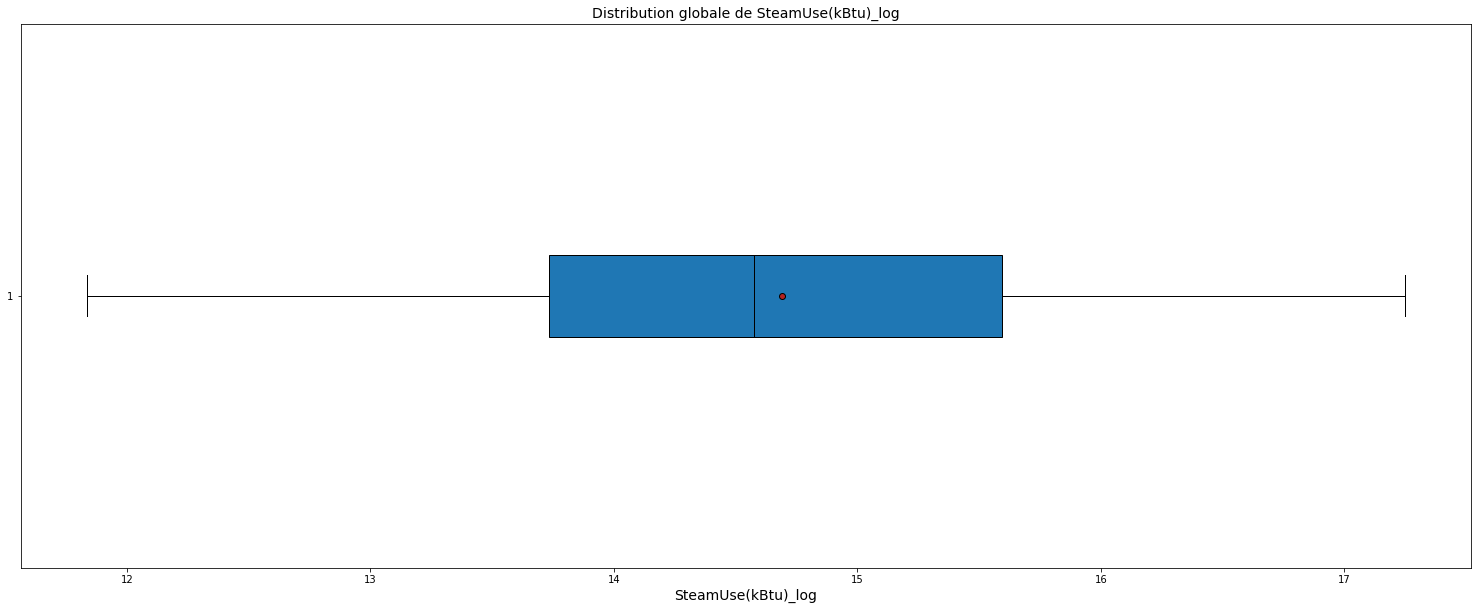

In [639]:
fct.boxplot(df[(df['AgeGroup'] != '(90, 100]') & (df['AgeGroup'] != '(80, 90]') & (df['AgeGroup'] != '(110, 120]') & (df['SteamUse(kBtu)_log'] > 0)], 'AgeGroup', 'SteamUse(kBtu)_log')

   AgeGroup  SteamUse(kBtu)_log SteamUseCategory_AgeGroup
0  (80, 90]           14.510597        Extreme_high_steam
1  (10, 20]            0.000000                Zero_steam
2  (40, 50]           16.886654                High_steam
3  (80, 90]           14.610513        Extreme_high_steam
4  (30, 40]            0.000000                Zero_steam

Extreme_high_steam Category:

High_steam Category:
(40, 50]
(70, 80]
(0, 10]

Medium_steam Category:
(10, 20]
(30, 40]
(50, 60]
(60, 70]

Low_steam Category:
(100, 110]
(20, 30]

Zero_steam Category:


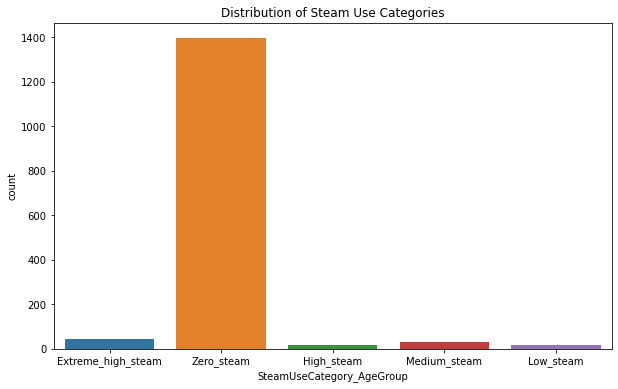

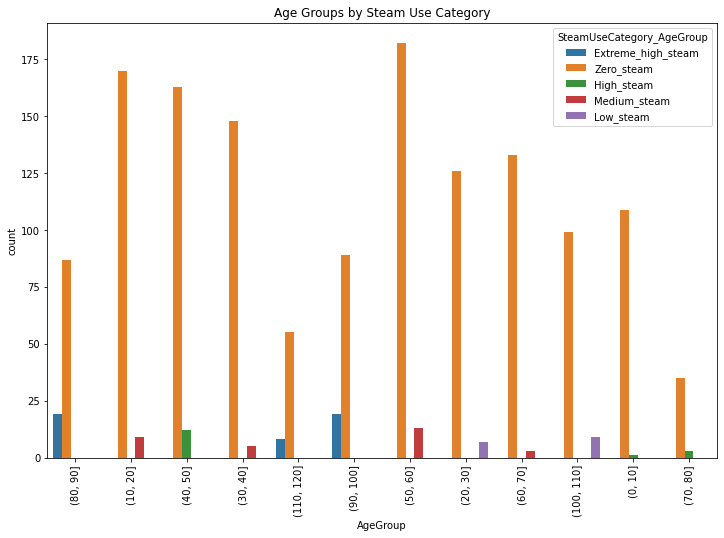

In [640]:
# Filtrer les valeurs nulles ou très faibles pour Steam
df_filtered_steam = df[(df['AgeGroup'] != '(90, 100]') & 
                       (df['AgeGroup'] != '(80, 90]') & 
                       (df['AgeGroup'] != '(110, 120]') & 
                       (df['SteamUse(kBtu)_log'] > 0)]

# Calculer la moyenne de 'SteamUse(kBtu)_log' pour chaque 'AgeGroup'
average_steam = df_filtered_steam.groupby('AgeGroup')['SteamUse(kBtu)_log'].mean()

# Définir les seuils basés sur les quantiles de la distribution de 'SteamUse(kBtu)_log'
low_threshold_steam = np.percentile(df_filtered_steam['SteamUse(kBtu)_log'], 46.5)
high_threshold_steam = np.percentile(df_filtered_steam['SteamUse(kBtu)_log'], 60)

# Dictionnaires pour stocker les groupes d'âge par catégorie
category_properties_steam = {'Extreme_high_steam': [], 'High_steam': [], 'Medium_steam': [], 'Low_steam': [], 'Zero_steam': []}

# Fonction pour catégoriser en fonction de la moyenne de 'SteamUse(kBtu)_log' par 'AgeGroup'
def categorize_age_group_steam(row):
    if row['SteamUse(kBtu)_log'] == 0:
        return 'Zero_steam'
    
    if (row['AgeGroup'] in ['(90, 100]', '(80, 90]', '(110, 120]']) & (row['SteamUse(kBtu)_log'] > 0):
        return 'Extreme_high_steam'
    
    if (row['AgeGroup'] in ['(90, 100]', '(80, 90]', '(110, 120]']) & (row['SteamUse(kBtu)_log'] == 0):
        return 'Zero_steam'
                  
    avg_steam = average_steam[row['AgeGroup']]
    if avg_steam > high_threshold_steam:
        category = 'High_steam'
    elif avg_steam < low_threshold_steam:
        category = 'Low_steam'
    else:
        category = 'Medium_steam'
    
    # Ajouter le groupe d'âge à la catégorie correspondante
    if row['AgeGroup'] not in category_properties_steam[category]:
        category_properties_steam[category].append(row['AgeGroup'])

    return category

# Appliquer la fonction pour créer la nouvelle colonne
df['SteamUseCategory_AgeGroup'] = df.apply(categorize_age_group_steam, axis=1)

# Vérification des nouvelles données
print(df[['AgeGroup', 'SteamUse(kBtu)_log', 'SteamUseCategory_AgeGroup']].head())

# Affichage des catégories de 'AgeGroup' par groupe de consommation de vapeur
for category in category_properties_steam:
    print(f"\n{category} Category:")
    for age_group in category_properties_steam[category]:
        print(f"{age_group}")

# Visualisation de la nouvelle variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(x='SteamUseCategory_AgeGroup', data=df)
plt.title('Distribution of Steam Use Categories')
plt.show()

# Visualiser la nouvelle variable en fonction des groupes d'âge
plt.figure(figsize=(12, 8))
sns.countplot(x='AgeGroup', hue='SteamUseCategory_AgeGroup', data=df)
plt.title('Age Groups by Steam Use Category')
plt.xticks(rotation=90)
plt.show()


9. 3. 4. **Pour le graphique NaturalGas(kBtu)_log en fonction du AgeGroup:**

In [641]:
df['NaturalGas(kBtu)_log'].value_counts().head(30)

0.000000     441
12.332031      2
14.059596      1
11.991083      1
13.496032      1
13.508684      1
13.567326      1
14.425410      1
14.594327      1
12.370213      1
12.615281      1
12.994955      1
13.934425      1
12.160416      1
13.759509      1
13.568415      1
13.773848      1
13.198480      1
15.008584      1
11.871117      1
12.156945      1
14.944076      1
14.003853      1
12.694459      1
13.718328      1
12.505136      1
14.239825      1
12.766959      1
14.910248      1
12.671287      1
Name: NaturalGas(kBtu)_log, dtype: int64

On affiche le histplot de la variable 'NaturalGas(kBtu)_log' :

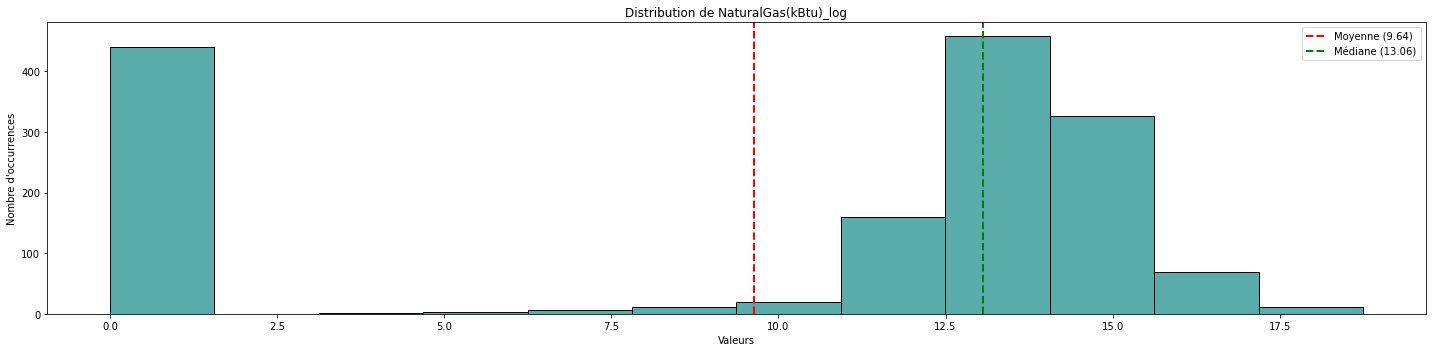

In [642]:
fct.distribution_histplot(df, cols='NaturalGas(kBtu)_log')

On remarque pas mal de valeurs 0 à prendre en compte lors de la création de la variable catégorielle.

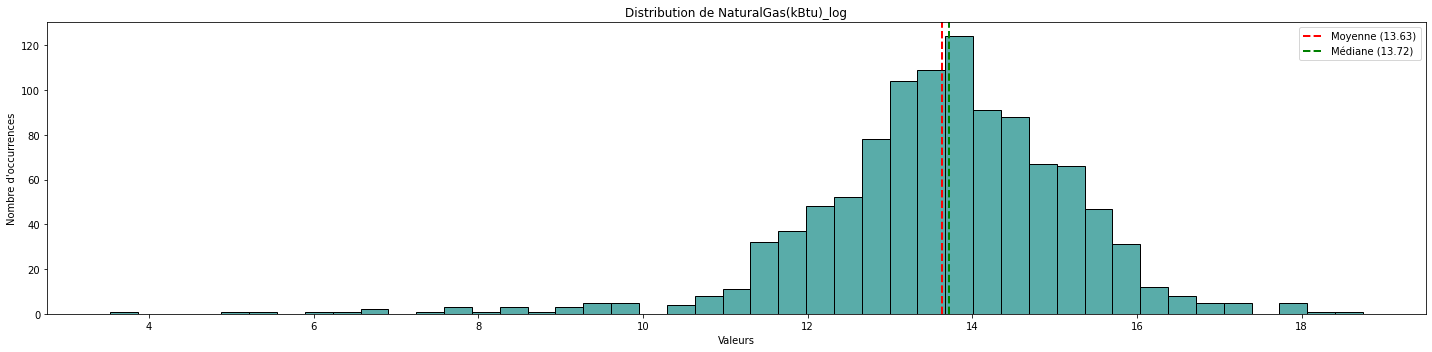

In [643]:
fct.distribution_histplot(df[df['NaturalGas(kBtu)_log'] > 0], cols='NaturalGas(kBtu)_log')

On affiche le boxplot de la variable 'NaturalGas(kBtu)_log' en fonction de chaque catégorie de la variable 'PrimaryPropertyType':

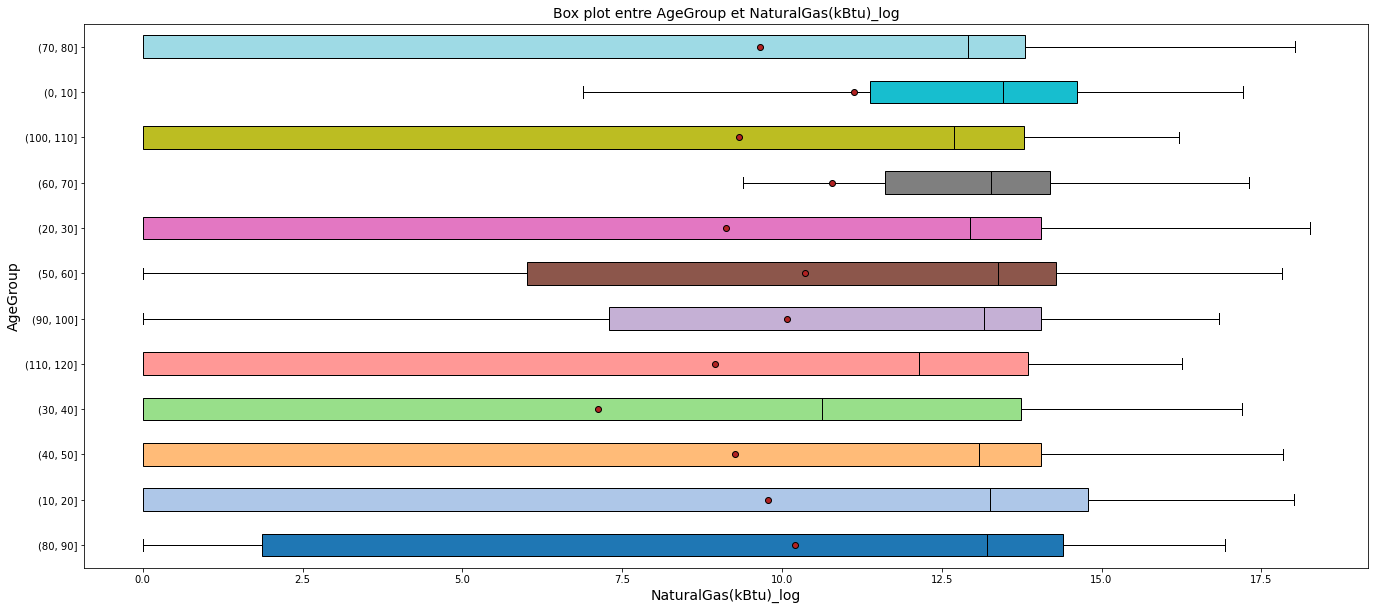

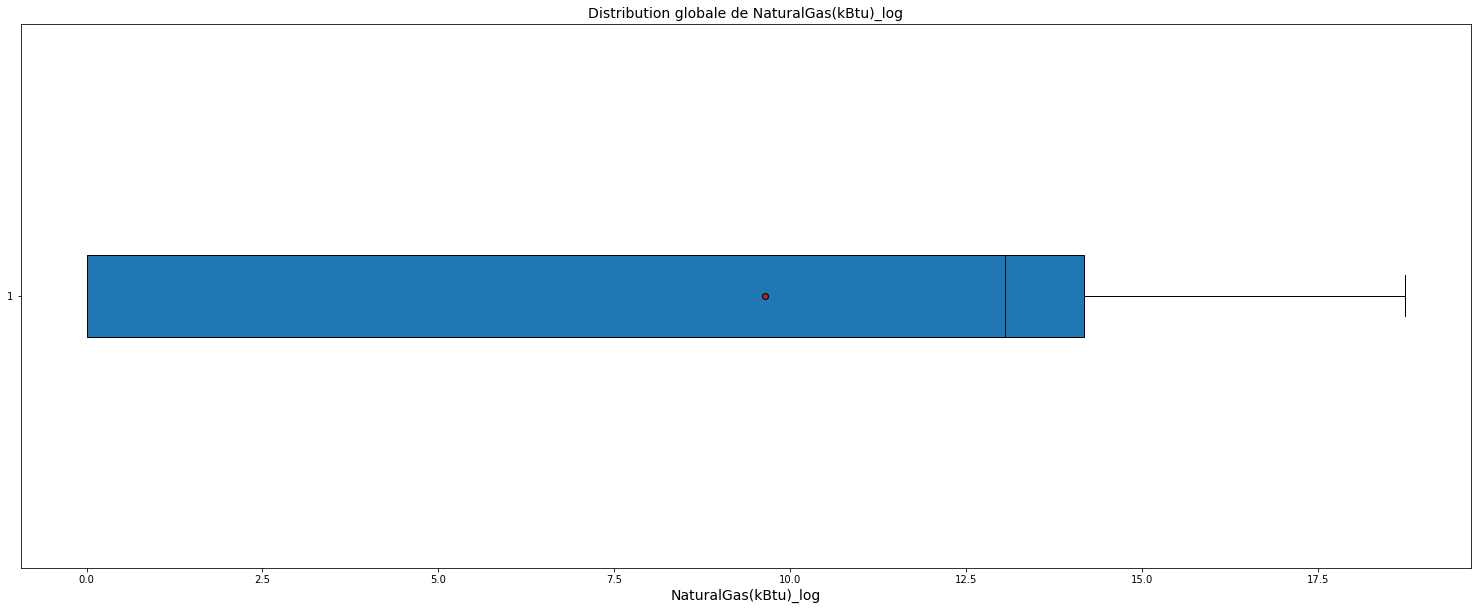

In [644]:
fct.boxplot(df, 'AgeGroup' , 'NaturalGas(kBtu)_log')

On peut écarter les valeurs 0 de la distribution:

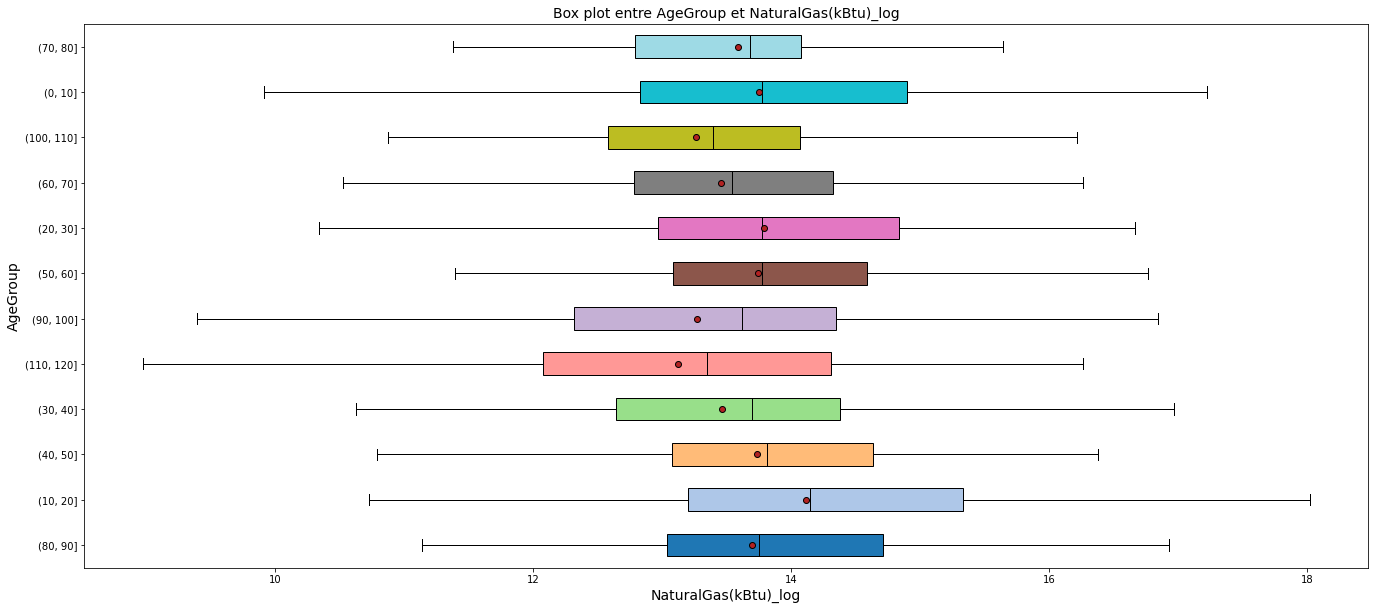

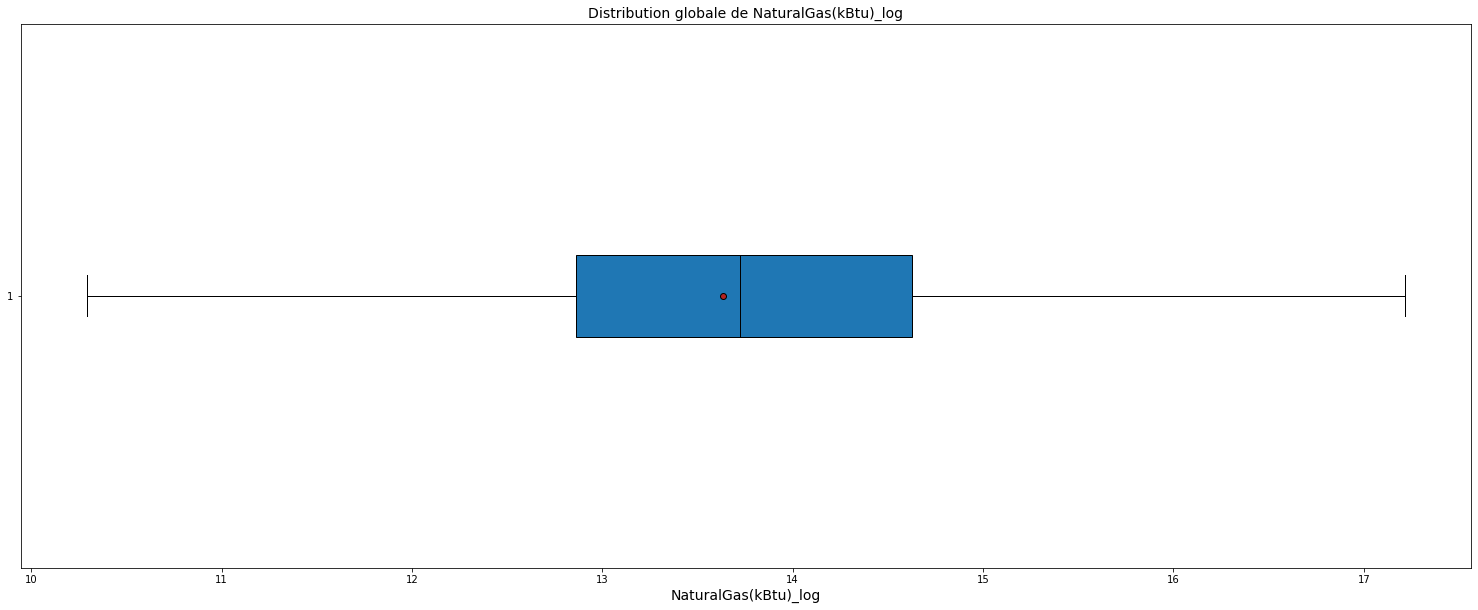

In [645]:
fct.boxplot(df[df['NaturalGas(kBtu)_log'] > 0], 'AgeGroup', 'NaturalGas(kBtu)_log')


   AgeGroup  NaturalGas(kBtu)_log NaturalGasUseCategory_AgeGroup
0  (80, 90]             14.059596                     Medium_gas
1  (10, 20]             15.453552                       High_gas
2  (40, 50]             14.216834                     Medium_gas
3  (80, 90]             14.409508                     Medium_gas
4  (30, 40]             15.990717                     Medium_gas

High_gas Category:
(10, 20]
(20, 30]
(0, 10]

Medium_gas Category:
(80, 90]
(40, 50]
(30, 40]
(50, 60]
(60, 70]
(70, 80]

Low_gas Category:
(110, 120]
(90, 100]
(100, 110]

Zero_gas Category:


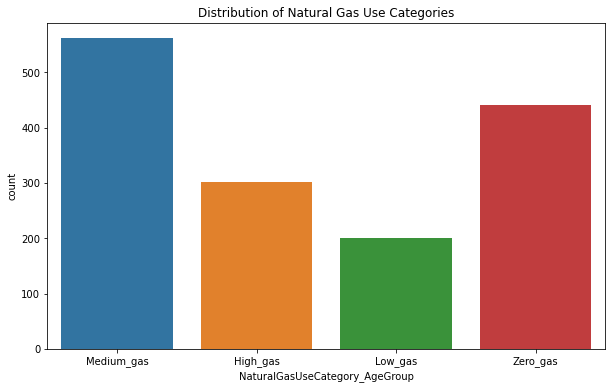

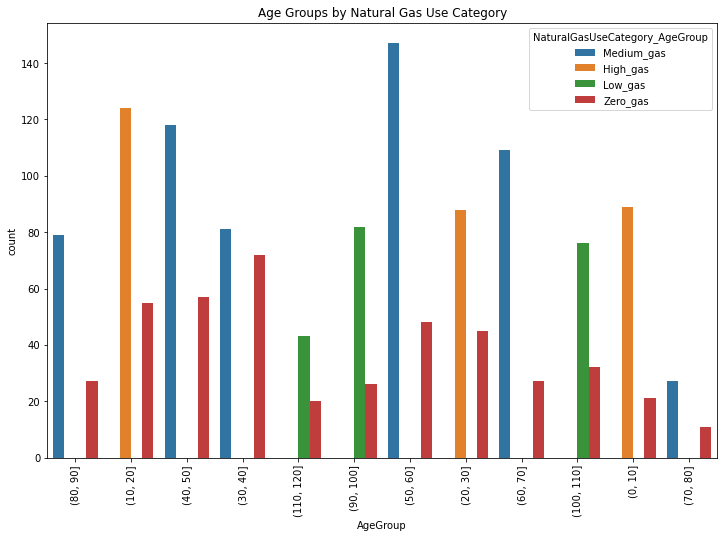

In [646]:
# Filtrer les valeurs nulles ou très faibles pour Natural Gas
df_filtered_gas = df[df['NaturalGas(kBtu)_log'] > 0]

# Calculer la moyenne de 'NaturalGas(kBtu)_log' pour chaque 'AgeGroup'
average_gas = df_filtered_gas.groupby('AgeGroup')['NaturalGas(kBtu)_log'].mean()

# Définir les seuils basés sur les quantiles de la distribution de 'NaturalGas(kBtu)_log'
low_threshold_gas = np.percentile(df_filtered_gas['NaturalGas(kBtu)_log'], 40)
high_threshold_gas = np.percentile(df_filtered_gas['NaturalGas(kBtu)_log'], 51.5)

# Dictionnaires pour stocker les groupes d'âge par catégorie
category_properties_gas = {'High_gas': [], 'Medium_gas': [], 'Low_gas': [], 'Zero_gas': []}

# Fonction pour catégoriser en fonction de la moyenne de 'NaturalGas(kBtu)_log' par 'AgeGroup'
def categorize_age_group_gas(row):
    if row['NaturalGas(kBtu)_log'] == 0:
        return 'Zero_gas'  
    
    avg_gas = average_gas[row['AgeGroup']]
    if avg_gas > high_threshold_gas:
        category = 'High_gas'
    elif avg_gas < low_threshold_gas:
        category = 'Low_gas'
    else:
        category = 'Medium_gas'
    
    # Ajouter le groupe d'âge à la catégorie correspondante
    if row['AgeGroup'] not in category_properties_gas[category]:
        category_properties_gas[category].append(row['AgeGroup'])

    return category

# Appliquer la fonction pour créer la nouvelle colonne
df['NaturalGasUseCategory_AgeGroup'] = df.apply(categorize_age_group_gas, axis=1)

# Vérification des nouvelles données
print(df[['AgeGroup', 'NaturalGas(kBtu)_log', 'NaturalGasUseCategory_AgeGroup']].head())

# Affichage des catégories de 'AgeGroup' par groupe de consommation de gaz naturel
for category in category_properties_gas:
    print(f"\n{category} Category:")
    for age_group in category_properties_gas[category]:
        print(f"{age_group}")

# Visualisation de la nouvelle variable catégorielle
plt.figure(figsize=(10, 6))
sns.countplot(x='NaturalGasUseCategory_AgeGroup', data=df)
plt.title('Distribution of Natural Gas Use Categories')
plt.show()

# Visualiser la nouvelle variable en fonction des groupes d'âge
plt.figure(figsize=(12, 8))
sns.countplot(x='AgeGroup', hue='NaturalGasUseCategory_AgeGroup', data=df)
plt.title('Age Groups by Natural Gas Use Category')
plt.xticks(rotation=90)
plt.show()


9. 4. **L'effet du voisinage sur la consomation d'énergie:**

In [647]:
df.Neighborhood.value_counts().index.tolist()

['GREATER DUWAMISH',
 'DOWNTOWN',
 'MAGNOLIA / QUEEN ANNE',
 'LAKE UNION',
 'NORTHEAST',
 'EAST',
 'NORTHWEST',
 'BALLARD',
 'NORTH',
 'CENTRAL',
 'DELRIDGE',
 'SOUTHEAST',
 'SOUTHWEST',
 'North',
 'Ballard',
 'Delridge',
 'Northwest',
 'Central',
 'DELRIDGE NEIGHBORHOODS']

In [648]:
import folium

# Coordonnées des voisinages
neighborhoods_coordinates = {
    'GREATER DUWAMISH': (47.5717, -122.3331),
    'DOWNTOWN': (47.6097, -122.3331),
    'MAGNOLIA / QUEEN ANNE': (47.6395, -122.3606),
    'LAKE UNION': (47.6475, -122.3331),
    'NORTHEAST': (47.6848, -122.2966),
    'EAST': (47.6174, -122.2863),
    'NORTHWEST': (47.6062, -122.3870),
    'BALLARD': (47.6762, -122.3860),
    'NORTH': (47.6584, -122.3501),
    'CENTRAL': (47.6062, -122.3321),
    'DELRIDGE': (47.5734, -122.3707),
    'SOUTHEAST': (47.5371, -122.2693),
    'SOUTHWEST': (47.5708, -122.3620),
    'North': (47.6062, -122.3321),
    'Ballard': (47.6762, -122.3860),
    'Delridge': (47.5734, -122.3707),
    'Northwest': (47.6062, -122.3321),
    'Central': (47.6062, -122.3321),
    'DELRIDGE NEIGHBORHOODS': (47.5734, -122.3707)
}

# Créer une carte centrée sur Seattle
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=11)

# Ajouter des marqueurs pour chaque voisinage
for neighborhood, coordinates in neighborhoods_coordinates.items():
    folium.Marker(location=coordinates, popup=neighborhood).add_to(seattle_map)

# Afficher la carte
seattle_map


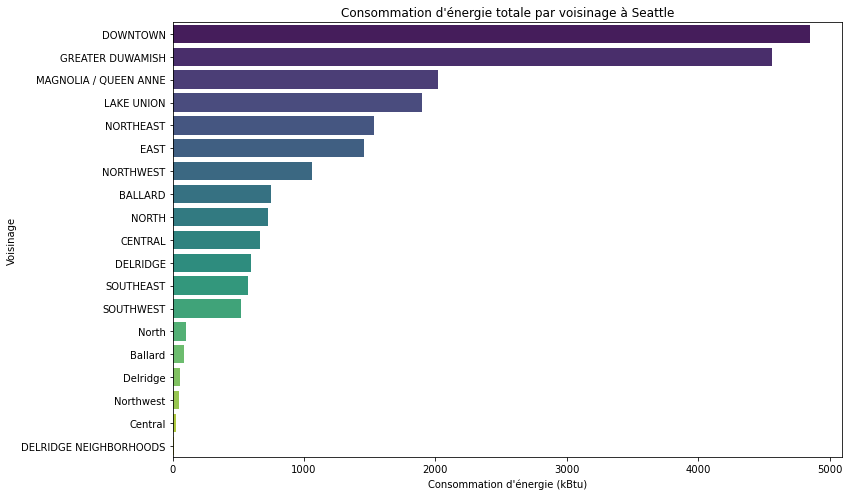

In [649]:
# Calculer la consommation d'énergie totale pour chaque catégorie de voisinage
neighborhood_energy_sum = df.groupby('Neighborhood')['Electricity(kBtu)_log'].sum().reset_index()

# Trier les résultats par consommation d'énergie totale décroissante
neighborhood_energy_sum = neighborhood_energy_sum.sort_values(by='Electricity(kBtu)_log', ascending=False)

# Visualiser les résultats avec un graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(data=neighborhood_energy_sum, x='Electricity(kBtu)_log', y='Neighborhood', palette='viridis')
plt.title('Consommation d\'énergie totale par voisinage à Seattle')
plt.xlabel('Consommation d\'énergie (kBtu)')
plt.ylabel('Voisinage')
plt.show()


In [650]:
import pandas as pd
import folium


# Définir les seuils pour la consommation d'énergie
energy_threshold_high = df['Electricity(kBtu)_log'].quantile(0.8)
energy_threshold_low = df['Electricity(kBtu)_log'].quantile(0.35)

# Créer une carte centrée sur Seattle
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=11)

# Ajouter des marqueurs pour chaque bâtiment avec la consommation d'énergie comme popup
for index, row in df.iterrows():
    # Déterminer la couleur en fonction de la consommation d'énergie
    if row['Electricity(kBtu)_log'] >= energy_threshold_high:
        color = 'red'  # Grande consommation d'énergie
    elif row['Electricity(kBtu)_log'] <= energy_threshold_low:
        color = 'green'  # Petite consommation d'énergie
    else:
        color = 'blue'  # Consommation d'énergie moyenne
    
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, 
                        color=color, fill=True, fill_color=color, fill_opacity=0.6,
                        popup=f"Site ID: {row['OSEBuildingID']}<br>Energy Consumption: {row['Electricity(kBtu)_log']} kBtu").add_to(seattle_map)

# Afficher la carte
seattle_map


D'après les graphes ci-dessus, on remarque que plus on se rapproche du centre-ville, plus la consommation en énergie est élevée, comme c'est le cas pour les quartiers DOWNTOWN et NORTHEAST. Afin d'éviter les corrélations fortes entre la latitude et la longitude, nous allons calculer la distance Haversine entre chaque point de coordonnées et le centre de Seattle.

La distance Haversine est une mesure de la distance entre deux points sur la surface de la Terre. Elle est calculée à partir de leurs coordonnées de latitude et de longitude. Voici comment nous pouvons ajouter cette fonctionnalité au DataFrame :

In [651]:
# Fonction pour calculer la distance Haversine
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Rayon de la Terre en kilomètres
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Coordonées approximatives du centre de Seattle
seattle_center_lat = 47.6062
seattle_center_lon = -122.3321

# Calcul de la distance Haversine pour chaque bâtiment
df['DistanceToCenter'] = df.apply(lambda row: haversine(seattle_center_lon, seattle_center_lat, row['Longitude'], row['Latitude']), axis=1)

# Vérification des nouvelles données
print(df[['Latitude', 'Longitude', 'DistanceToCenter']].head())


   Latitude  Longitude  DistanceToCenter
0  47.61220 -122.33799          0.800050
1  47.61317 -122.33393          0.787077
2  47.61393 -122.33810          0.970109
3  47.61412 -122.33664          0.944139
4  47.61375 -122.34047          1.048092


On pourrait rajouter les deux variables ['Latitude', 'Longitude'] à la liste 

In [652]:
list_to_drop_after_FE_EnergyUse.extend(['Latitude', 'Longitude']) 
list_to_drop_after_FE_GHGEmissions.extend(['Latitude', 'Longitude']) 
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)

['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFATotal_log', 'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log', 'SecondLargestPropertyUseTypeGFA_log', 'ThirdLargestPropertyUseTypeGFA_log', 'TotalGHGEmissions_log', 'SteamUse(kBtu)_log', 'Electricity(kBtu)_log', 'NaturalGas(kBtu)_log', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity', 'AgeGroup', 'Latitude', 'Longitude']
['DataYear', 'Cit

#### 9. 5. **Amélioration de la variable PropertyUseType en fusionnant des types d'utilisation de propriété importants :**

In [653]:
# Liste fusionnée des types d'utilisation de propriété importants, incluant 'non_manquante'
all_important_types = [
    'Office', 'Non-Refrigerated Warehouse', 'K-12 School', 'Retail Store', 'Other',
    'Hotel', 'Worship Facility', 'Distribution Center', 'Medical Office',
    'Supermarket/Grocery Store', 'Self-Storage Facility', 'Other - Recreation',
    'College/University', 'Other - Entertainment/Public Assembly', 'Parking',
    'Restaurant', 'Data Center', 'Fitness Center/Health Club/Gym', 'Other - Services',
    'Laboratory', 'Bank Branch', 'Swimming Pool', 'Food Service', 'Multifamily Housing',
    'Other - Restaurant/Bar', 'Pre-school/Daycare', 'Locksmith', 'Social/Meeting Hall',
    'Financial Office', 'Shoe', 'Refrigerated Warehouse', 'Hospital (General Medical & Surgical)',
    'Manufacturing/Industrial Plant', 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
    'Automobile Dealership', 'Strip Mall', 'Museum', 'Urgent Care/Clinic/Other Outpatient',
    'Library', 'Other/Specialty Hospital', 'Performing Arts', 'Prison/Incarceration',
    'Adult Education', 'Other - Public Services', 'Lifestyle Center', 'Other - Utility',
    'Courthouse', 'Movie Theater', 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
    'Residential Care Facility', 'Wholesale Club/Supercenter', 'Fire Station', 'Police Station',
    'Convention Center', 'non_manquante'
]

# Définir les catégories spécifiques pour le regroupement
def categorize_property_use_type(property_type):
    if property_type in ['Office', 'Medical Office', 'Financial Office', 'Bank Branch', 'Data Center']:
        return 'Commercial'
    elif property_type in ['Non-Refrigerated Warehouse', 'Refrigerated Warehouse', 'Distribution Center']:
        return 'Warehouse'
    elif property_type in ['K-12 School', 'College/University', 'Adult Education', 'Pre-school/Daycare', 'Other - Education']:
        return 'Education'
    elif property_type in ['Retail Store', 'Supermarket/Grocery Store', 'Strip Mall', 'Wholesale Club/Supercenter']:
        return 'Retail'
    elif property_type in ['Hotel', 'Other - Lodging/Residential', 'Residential Care Facility']:
        return 'Lodging'
    elif property_type in ['Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Bar/Nightclub']:
        return 'Food Service'
    elif property_type in ['Worship Facility', 'Social/Meeting Hall', 'Other - Recreation', 'Fitness Center/Health Club/Gym']:
        return 'Recreation'
    elif property_type == 'Parking':
        return 'Parking'
    elif property_type == 'non_manquante':
        return 'Missing'
    else:
        return 'Other'

# Appliquer le regroupement aux trois PropertyUseType
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].apply(categorize_property_use_type)
df['SecondLargestPropertyUseType'] = df['SecondLargestPropertyUseType'].apply(categorize_property_use_type)
df['ThirdLargestPropertyUseType'] = df['ThirdLargestPropertyUseType'].apply(categorize_property_use_type)

9. 7. **Dernières étapes de nettoyage:**

Nous avons la variable ComplianceStatus, qui représente le statut de conformité aux normes et réglementations en matière d’efficacité énergétique. Nous allons examiner le nombre de modalités présentes dans cette variable:

In [654]:
df.ComplianceStatus.value_counts()

Compliant                       1387
Error - Correct Default Data      88
Non-Compliant                     15
Missing Data                      14
Name: ComplianceStatus, dtype: int64

In [655]:
print("Nombre de lignes identifiées comme non conformes : {}.".format(df[df['ComplianceStatus'] != "Compliant"].shape[0]))

Nombre de lignes identifiées comme non conformes : 117.


Donc on va garder que les variables vavec le status 'Compliant':

In [656]:
df = df[df['ComplianceStatus'] == "Compliant"]

On peut maintenant supprimer la variable 'ComplianceStatus':

In [657]:
list_to_drop_after_FE_EnergyUse.extend(['ComplianceStatus']) 
list_to_drop_after_FE_GHGEmissions.extend(['ComplianceStatus']) 
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)

['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFATotal_log', 'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log', 'SecondLargestPropertyUseTypeGFA_log', 'ThirdLargestPropertyUseTypeGFA_log', 'TotalGHGEmissions_log', 'SteamUse(kBtu)_log', 'Electricity(kBtu)_log', 'NaturalGas(kBtu)_log', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity', 'AgeGroup', 'Latitude', 'Longitude', 'ComplianceStatus

9. 8. **La colonne 'PropertyName':**

In [658]:
df.PropertyName.nunique()

1383

Cette colonne contient 1383 valeurs uniques, ce qui la rend très difficile à encoder pour la modélisation. Par conséquent, il serait judicieux de la supprimer:

In [659]:
list_to_drop_after_FE_EnergyUse.extend(['PropertyName']) 
list_to_drop_after_FE_GHGEmissions.extend(['PropertyName']) 
print(list_to_drop_after_FE_EnergyUse)
print(list_to_drop_after_FE_GHGEmissions)

['DataYear', 'City', 'State', 'Address', 'ListOfAllPropertyUseTypes', 'YearBuilt', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'NumberofBuildings_log', 'LargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFATotal_log', 'PropertyGFABuilding(s)_log', 'LargestPropertyUseTypeGFA_log', 'SecondLargestPropertyUseTypeGFA_log', 'ThirdLargestPropertyUseTypeGFA_log', 'TotalGHGEmissions_log', 'SteamUse(kBtu)_log', 'Electricity(kBtu)_log', 'NaturalGas(kBtu)_log', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'NumberofBuildings', 'NumberofFloors', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity', 'AgeGroup', 'Latitude', 'Longitude', 'ComplianceStatus

9. 9. **Suppression de toutes les colonnes de la liste list_to_drop_after_FE:**

In [660]:
df_EnergyUse = df.drop(list_to_drop_after_FE_EnergyUse, axis = 1) 
df_EnergyUse.head()

OSEBuildingID    BuildingType PrimaryPropertyType  ZipCode  \
0             1  NonResidential               Hotel  98101.0   
1             2  NonResidential               Hotel  98101.0   
2             3  NonResidential               Hotel  98101.0   
3             5  NonResidential               Hotel  98101.0   
4             8  NonResidential               Hotel  98121.0   

  CouncilDistrictCode Neighborhood LargestPropertyUseType  \
0                   7     DOWNTOWN                Lodging   
1                   7     DOWNTOWN                Lodging   
2                   7     DOWNTOWN                Lodging   
3                   7     DOWNTOWN                Lodging   
4                   7     DOWNTOWN                Lodging   

  SecondLargestPropertyUseType ThirdLargestPropertyUseType  ENERGYSTARScore  \
0                      Missing                     Missing             60.0   
1                      Parking                Food Service             61.0   
2                      Missing                     Missing             43.0   
3                      Missing                     Missing             56.0   
4                      Parking                       Other             75.0   

   TotalUseTypeNumber  BuildingAge  SiteEnergyUse(kBtu)_log  \
0                   1           89                15.793246   
1                   3           20                15.942305   
2                   1           47                18.100297   
3                   1           90                15.731637   
4                   3           36                16.466822   

   Building(s)_Proportion  Parking_Proportion  LargestPropertyUse_Proportion  \
0                1.000000            0.000000                       1.000000   
1                0.854547            0.145453                       0.809918   
2                0.794252            0.205748                       0.791220   
3                1.000000            0.000000                       1.000000   
4                0.646885            0.353115                       0.703070   

   SecondLargestPropertyUse_Proportion  ThirdLargestPropertyUse_Proportion  \
0                             0.000000                            0.000000   
1                             0.145453                            0.044629   
2                             0.000000                            0.000000   
3                             0.000000                            0.000000   
4                             0.387339                            0.000000   

   GFAPerBuilding  GFAPerFloor ElectricityUseCategory_PrimaryPropertyType  \
0         88434.0     7369.500                                  High_elec   
1        103566.0     9415.091                                  High_elec   
2        956110.0    23319.756                                  High_elec   
3         61320.0     6132.000                                  High_elec   
4        175580.0     9754.444                                  High_elec   

  SteamUseCategory_PrimaryPropertyType  \
0                           High_steam   
1                           Zero_Steam   
2                           High_steam   
3                           High_steam   
4                           Zero_Steam   

  NaturalGasUseCategory_PrimaryPropertyType  \
0                                  High_gas   
1                                  High_gas   
2                                  High_gas   
3                                  High_gas   
4                                  High_gas   

  ElectricityUseCategory_BuildingType SteamUseCategory_BuildingType  \
0                         Medium_elec                  Medium_steam   
1                         Medium_elec                    Zero_steam   
2                         Medium_elec                  Medium_steam   
3                         Medium_elec                  Medium_steam   
4                         Medium_elec                    Zero_steam   

  NaturalGasUseCateg

In [661]:
df_GHGEmissions = df.drop(list_to_drop_after_FE_GHGEmissions, axis = 1) 
df_GHGEmissions.head()

OSEBuildingID    BuildingType PrimaryPropertyType  ZipCode  \
0             1  NonResidential               Hotel  98101.0   
1             2  NonResidential               Hotel  98101.0   
2             3  NonResidential               Hotel  98101.0   
3             5  NonResidential               Hotel  98101.0   
4             8  NonResidential               Hotel  98121.0   

  CouncilDistrictCode Neighborhood LargestPropertyUseType  \
0                   7     DOWNTOWN                Lodging   
1                   7     DOWNTOWN                Lodging   
2                   7     DOWNTOWN                Lodging   
3                   7     DOWNTOWN                Lodging   
4                   7     DOWNTOWN                Lodging   

  SecondLargestPropertyUseType ThirdLargestPropertyUseType  ENERGYSTARScore  \
0                      Missing                     Missing             60.0   
1                      Parking                Food Service             61.0   
2                      Missing                     Missing             43.0   
3                      Missing                     Missing             56.0   
4                      Parking                       Other             75.0   

   TotalUseTypeNumber  BuildingAge  LargestPropertyUseTypeGFA_log  \
0                   1           89                      11.390023   
1                   3           20                      11.337154   
2                   1           47                       13.53645   
3                   1           90                      11.023878   
4                   3           36                      11.723559   

   PropertyGFABuilding(s)_log  PropertyGFATotal_log  \
0                   11.390023             11.390023   
1                   11.390792             11.547974   
2                   13.540275             13.770629   
3                   11.023878             11.023878   
4                   11.640272             12.075856   

   ThirdLargestPropertyUseTypeGFA_log  TotalGHGEmissions_log  \
0                            0.000000               5.525373   
1                            8.438799               5.693261   
2                            0.000000               7.645053   
3                            0.000000               5.660979   
4                            0.000000               6.226556   

   SecondLargestPropertyUseTypeGFA_log  Building(s)_Proportion  \
0                             0.000000                1.000000   
1                             9.620129                0.854547   
2                             0.000000                0.794252   
3                             0.000000                1.000000   
4                            11.127410                0.646885   

   Parking_Proportion  LargestPropertyUse_Proportion  \
0            0.000000                       1.000000   
1            0.145453                       0.809918   
2            0.205748                       0.791220   
3            0.000000                       1.000000   
4            0.353115                       0.703070   

   SecondLargestPropertyUse_Proportion  ThirdLargestPropertyUse_Proportion  \
0                             0.000000                            0.000000   
1                             0.145453                            0.044629   
2                             0.000000                            0.000000   
3                             0.000000                            0.000000   
4                             0.387339                            0.000000   

   GFAPerBuilding  GFAPerFloor ElectricityUseCategory_PrimaryPropertyType  \
0         88434.0     7369.500                                  High_elec   
1        103566.0     9415.091                                  High_elec   
2        956110.0    23319.756                                  High_elec   
3         61320.0     6132.000                                  High_elec   
4        175580.0     9754.444                          

In [662]:
# mettre les deux colonnes target en dernier du dataframe
end_cols = ['SiteEnergyUse(kBtu)_log']
df_EnergyUse = fct.target_last(df_EnergyUse, end_cols)

In [663]:
# mettre les deux colonnes target en dernier du dataframe
end_cols = ['TotalGHGEmissions_log'	]
df_GHGEmissions = fct.target_last(df_GHGEmissions, end_cols)

9. 10. **Save data:**

In [664]:
# Enregistrer les dtypes dans un dictionnaire
dtypes_dict_EnergyUse = df_EnergyUse.dtypes.apply(lambda x: x.name).to_dict()
print(dtypes_dict_EnergyUse)

# Sauvegarder le dictionnaire dans un fichier JSON
with open("Data/dtypes_EnergyUse.json", "w") as f:
    json.dump(dtypes_dict_EnergyUse, f)

# Enregistrer le DataFrame en CSV sans inclure l'index
df_EnergyUse.to_csv("Data/building-EnergyUse-cleaned.csv", index=False)

{'OSEBuildingID': 'object', 'BuildingType': 'object', 'PrimaryPropertyType': 'object', 'ZipCode': 'object', 'CouncilDistrictCode': 'object', 'Neighborhood': 'object', 'LargestPropertyUseType': 'object', 'SecondLargestPropertyUseType': 'object', 'ThirdLargestPropertyUseType': 'object', 'ENERGYSTARScore': 'float64', 'TotalUseTypeNumber': 'int64', 'BuildingAge': 'int32', 'Building(s)_Proportion': 'float64', 'Parking_Proportion': 'float64', 'LargestPropertyUse_Proportion': 'float64', 'SecondLargestPropertyUse_Proportion': 'float64', 'ThirdLargestPropertyUse_Proportion': 'float64', 'GFAPerBuilding': 'float64', 'GFAPerFloor': 'float64', 'ElectricityUseCategory_PrimaryPropertyType': 'object', 'SteamUseCategory_PrimaryPropertyType': 'object', 'NaturalGasUseCategory_PrimaryPropertyType': 'object', 'ElectricityUseCategory_BuildingType': 'object', 'SteamUseCategory_BuildingType': 'object', 'NaturalGasUseCategory_BuildingType': 'object', 'ElectricityUseCategory_AgeGroup': 'object', 'SteamUseCatego

In [665]:
# Enregistrer les dtypes dans un dictionnaire
dtypes_dict_GHGEmissions = df_GHGEmissions.dtypes.apply(lambda x: x.name).to_dict()
print(dtypes_dict_GHGEmissions)

# Sauvegarder le dictionnaire dans un fichier JSON
with open("Data/dtypes-GHGEmissions.json", "w") as f:
    json.dump(dtypes_dict_GHGEmissions, f)

# Enregistrer le DataFrame en CSV sans inclure l'index
df_GHGEmissions.to_csv("Data/building-GHGEmissions-cleaned.csv", index=False)

{'OSEBuildingID': 'object', 'BuildingType': 'object', 'PrimaryPropertyType': 'object', 'ZipCode': 'object', 'CouncilDistrictCode': 'object', 'Neighborhood': 'object', 'LargestPropertyUseType': 'object', 'SecondLargestPropertyUseType': 'object', 'ThirdLargestPropertyUseType': 'object', 'ENERGYSTARScore': 'float64', 'TotalUseTypeNumber': 'int64', 'BuildingAge': 'int32', 'LargestPropertyUseTypeGFA_log': 'Float64', 'PropertyGFABuilding(s)_log': 'float64', 'PropertyGFATotal_log': 'float64', 'ThirdLargestPropertyUseTypeGFA_log': 'float64', 'SecondLargestPropertyUseTypeGFA_log': 'float64', 'Building(s)_Proportion': 'float64', 'Parking_Proportion': 'float64', 'LargestPropertyUse_Proportion': 'float64', 'SecondLargestPropertyUse_Proportion': 'float64', 'ThirdLargestPropertyUse_Proportion': 'float64', 'GFAPerBuilding': 'float64', 'GFAPerFloor': 'float64', 'ElectricityUseCategory_PrimaryPropertyType': 'object', 'SteamUseCategory_PrimaryPropertyType': 'object', 'NaturalGasUseCategory_PrimaryProper